In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost
from catboost import CatBoostRegressor
from catboost import Pool

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
building = pd.read_csv('../data/handmade_data/building.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']
over100m2 = pd.read_csv('../data/handmade_data/over100m2.csv')
bt75and100m2 = pd.read_csv('../data/handmade_data/bt75and100m2.csv')
bt50and75m2 = pd.read_csv('../data/handmade_data/bt50and75m2.csv')
sepa_bath_toilets = pd.read_csv('../data/handmade_data/sepa_bath_toilets.csv')
sepa_bath_toilets.columns = ['バス・トイレ別']
washlets = pd.read_csv('../data/handmade_data/washlets.csv')
area_per_rooms = pd.read_csv('../data/handmade_data/area_per_rooms.csv')
kitchen_points = pd.read_csv('../data/handmade_data/kitchen_points.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_contract_span2.columns = ['契約期間']
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_building = pd.read_csv('../data/test_data/test_building.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']
test_over100m2 = pd.read_csv('../data/test_data/test_over100m2.csv')
test_bt75and100m2 = pd.read_csv('../data/test_data/test_bt75and100m2.csv')
test_bt50and75m2 = pd.read_csv('../data/test_data/test_bt50and75m2.csv')
test_sepa_bath_toilets = pd.read_csv('../data/test_data/test_sepa_bath_toilets.csv')
test_sepa_bath_toilets.columns = ['バス・トイレ別']
test_washlets = pd.read_csv('../data/test_data/test_washlets.csv')
test_area_per_rooms = pd.read_csv('../data/test_data/test_area_per_rooms.csv')
test_kitchen_points = pd.read_csv('../data/test_data/test_kitchen_points.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations, minits, land_aveprice, addresses, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, bt50and75m2, area_per_rooms, kitchen_points], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size, test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations, test_minits, test_land_aveprice, test_addresses, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets, test_buildings, test_over100m2, test_bt75and100m2, test_bt50and75m2, test_area_per_rooms, test_kitchen_points], axis=1)
category_lists = ['定期借家','最寄り駅', '所在地', 'L', 'D', 'S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', '50m^2以上75m^2未満', 'ガスコンロ', 'コンロ2口', 'システムキッチン', '給湯', '独立キッチン', 'コンロ3口', 'IHコンロ', '電気コンロ']

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3004
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51485.4	valid_1's rmse: 52790
[20]	training's rmse: 37661.8	valid_1's rmse: 40950
[30]	training's rmse: 29983	valid_1's rmse: 34507
[40]	training's rmse: 26690.2	valid_1's rmse: 31924.5
[50]	training's rmse: 30176.7	valid_1's rmse: 34800.2
[60]	training's rmse: 34545.4	valid_1's rmse: 38668.2
[70]	training's rmse: 36502.4	valid_1's rmse: 40424.7
[80]	training's rmse: 31302.4	valid_1's rmse: 35889.9
[90]	training's rmse: 31235.2	valid_1's rmse: 35819.7
[100]	training's rmse: 33296.9	valid_1's rmse: 37691.2
[110]	training's rmse: 40275.6	valid_1's rmse: 43834.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3003
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51569.4	valid_1's rmse: 52366.1
[20]	training's rmse: 37991.9	valid_1's rmse: 39274.7
[30]	training's rmse: 30527.4	valid_1's rmse: 32328
[40]	training's rmse: 27487	valid_1's rmse: 29750.7
[50]	training's rmse: 30914.4	valid_1's rmse: 32927.8
[60]	training's rmse: 35191.4	valid_1's rmse: 37074.2
[70]	training's rmse: 37073.4	valid_1's rmse: 38969.6
[80]	training's rmse: 32076.6	valid_1's rmse: 34398.8
[90]	training's rmse: 31952.7	valid_1's rmse: 34274.5
[100]	training's rmse: 33981.5	valid_1's rmse: 36162.6
[110]	training's rmse: 40782.4	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3006
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51481.7	valid_1's rmse: 51445.3
[20]	training's rmse: 37968.9	valid_1's rmse: 37499.9
[30]	training's rmse: 30627.2	valid_1's rmse: 30484.4
[40]	training's rmse: 27534.4	valid_1's rmse: 27763
[50]	training's rmse: 30950.8	valid_1's rmse: 31438.5
[60]	training's rmse: 35146	valid_1's rmse: 35783.7
[70]	training's rmse: 37023.7	valid_1's rmse: 37658
[80]	training's rmse: 32060.4	valid_1's rmse: 32782.4
[90]	training's rmse: 31967.2	valid_1's rmse: 32678.5
[100]	training's rmse: 33969	valid_1's rmse: 34745.8
[110]	training's rmse: 40725.6	valid_1's rmse: 41423.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3005
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51948.4	valid_1's rmse: 50428.4
[20]	training's rmse: 38122.9	valid_1's rmse: 38141
[30]	training's rmse: 30456.3	valid_1's rmse: 31521.1
[40]	training's rmse: 27185.4	valid_1's rmse: 28878.6
[50]	training's rmse: 30742.7	valid_1's rmse: 32219.1
[60]	training's rmse: 34989.1	valid_1's rmse: 36533.7
[70]	training's rmse: 36862.3	valid_1's rmse: 38426.3
[80]	training's rmse: 31864.9	valid_1's rmse: 33786.2
[90]	training's rmse: 31750.2	valid_1's rmse: 33507.6
[100]	training's rmse: 33774.5	valid_1's rmse: 35662.7
[110]	training's rmse: 40635.9	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3004
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51267.3	valid_1's rmse: 53606.1
[20]	training's rmse: 37979.1	valid_1's rmse: 39994.5
[30]	training's rmse: 30898.6	valid_1's rmse: 32789.7
[40]	training's rmse: 27812.9	valid_1's rmse: 29708.5
[50]	training's rmse: 31204.9	valid_1's rmse: 33121.6
[60]	training's rmse: 35427.9	valid_1's rmse: 37116.4
[70]	training's rmse: 37313.9	valid_1's rmse: 38838.5
[80]	training's rmse: 32330.7	valid_1's rmse: 33921.9
[90]	training's rmse: 32192	valid_1's rmse: 33886.8
[100]	training's rmse: 34186.1	valid_1's rmse: 35682.4
[110]	training's rmse: 40932.4	valid_1's rmse: 

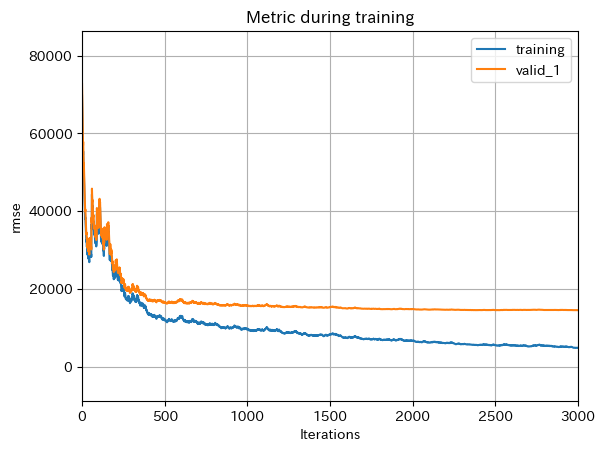

importance
面積               1.479868e+15
L                1.422558e+15
平均地価             8.146369e+14
築年数              2.887709e+14
最寄り駅             1.430550e+14
全体の階数            1.014051e+14
一部屋あたりの面積        8.545936e+13
所在地              8.060558e+13
契約期間             5.345270e+13
所在階              2.907717e+13
所要時間             2.783825e+13
システムキッチン         1.618048e+13
バス・トイレ別          5.632631e+12
建物構造             5.210684e+12
定期借家             5.108624e+12
IHコンロ            4.567169e+12
コンロ2口            4.438826e+12
コンロ3口            3.985751e+12
ガスコンロ            2.720486e+12
D                1.963939e+12
部屋数              1.909600e+12
75m^2以上100m^2未満  1.131309e+12
独立キッチン           9.286052e+11
100m^2以上         6.672944e+11
S                6.415303e+11
給湯               5.641089e+11
50m^2以上75m^2未満   1.311946e+11
電気コンロ            4.837087e+10

In [16]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)
valid_rmses_list = []
valid_GOSS = np.zeros(X_train.shape[0])
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]

    evals_result = {} 
    lgb_train = lgb.Dataset(X_tr, y_tr)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

    params = {
        'objective':'regression',
        'boosting_type':'dart',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 2.4973286104060585e-05,
        'max_bin': 414,
        'num_leaves':111
    }

    model = lgb.train(
                        params,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=3000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists,
                        evals_result=evals_result,
                        )

    pred_y_val = model.predict(X_val)
    rmse = mean_squared_error(y_val, pred_y_val, squared=False)
    valid_rmses_list.append(rmse)

valid_rmse = np.mean(valid_rmses_list)
print("whole valid rmse:", valid_rmse)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

print('Start predicting...')
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
print('Plot metrics during training...')
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()
# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(importance_type = "gain"), index=X_train.columns, columns=['importance'])
df_importance = pd.DataFrame(importance)
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)


# 現状最高のスコア16705!

この特徴量群を基にチューニングを行う！

In [4]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)
rmse_scores = []
X_train['KFold'] = -1
#foldはvalidの対象となる値で０から４
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_train.loc[valid_index,'KFold'] = fold_id
    y_train.loc[valid_index,'KFold'] = fold_id

def objective(trial):
    #foldはvalidの対象となる値で０から４
    for fold in range(5):
        X_tr = X_train[X_train['KFold']!=fold].drop('KFold',axis=1)
        X_val = X_train[X_train['KFold']==fold].drop('KFold',axis=1)
        y_tr = y_train[y_train['KFold']!=fold].drop('KFold',axis=1)
        y_val = y_train[y_train['KFold']==fold].drop('KFold',axis=1)

        lgb_train = lgb.Dataset(X_tr, y_tr)
        lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
        params = {
            'objective':'regression',
            'boosting_type':'dart',
            'metrics':'rmse',
            'learning_rate':0.05,
            'reg_lambda': trial.suggest_float('reg_lambda', 0.0000001, 0.0001, log=True),
            'max_bin': trial.suggest_int('max_bin', 255, 600),
            'num_leaves': trial.suggest_int('num_leaves', 50, 128),
        }

        model = lgb.train(
                            params,
                            lgb_train, 
                            valid_sets=[lgb_train, lgb_eval], 
                            verbose_eval=10, 
                            num_boost_round=3000, 
                            early_stopping_rounds=10,
                            categorical_feature = category_lists
                            )

        y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)
        rmse_score = mean_squared_error(y_val, y_pred_val, squared=False)
    loss = np.mean(rmse_score)
    return loss

In [5]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=100)

[I 2022-10-02 00:58:20,772] A new study created in memory with name: no-name-5f2fea47-7945-42a3-913f-4183d5c6c6a9
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/pyt

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51553	valid_1's rmse: 52567.6
[20]	training's rmse: 37749	valid_1's rmse: 40638.8
[30]	training's rmse: 30177.3	valid_1's rmse: 34317.1
[40]	training's rmse: 26916.8	valid_1's rmse: 31724.7
[50]	training's rmse: 30346.3	valid_1's rmse: 34640.5
[60]	training's rmse: 34614.4	valid_1's rmse: 38502.1
[70]	training's rmse: 36502.5	valid_1's rmse: 40243.2
[80]	training's rmse: 31361	valid_1's rmse: 35740.8
[90]	training's rmse: 31247.8	valid_1's rmse: 35556.6
[100]	training's rmse: 33358.7	valid_1's rmse: 37435.8
[110]	training's rmse: 40315.4	valid_1's rmse: 4361

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51671.6	valid_1's rmse: 52238.6
[20]	training's rmse: 38211.4	valid_1's rmse: 39189.3
[30]	training's rmse: 30840	valid_1's rmse: 32304.9
[40]	training's rmse: 27925.3	valid_1's rmse: 29791.5
[50]	training's rmse: 31365	valid_1's rmse: 32958.1
[60]	training's rmse: 35590.8	valid_1's rmse: 37073.3
[70]	training's rmse: 37422.5	valid_1's rmse: 38880.5
[80]	training's rmse: 32445.2	valid_1's rmse: 34179.5
[90]	training's rmse: 32298.4	valid_1's rmse: 34051.4
[100]	training's rmse: 34301.8	valid_1's rmse: 35951.7
[110]	training's rmse: 41059.2	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51733.6	valid_1's rmse: 51227.1
[20]	training's rmse: 38478.4	valid_1's rmse: 37097.5
[30]	training's rmse: 31411.4	valid_1's rmse: 29809.6
[40]	training's rmse: 28299.3	valid_1's rmse: 27054.8
[50]	training's rmse: 31607.3	valid_1's rmse: 30792.2
[60]	training's rmse: 35795.2	valid_1's rmse: 35284.5
[70]	training's rmse: 37607.4	valid_1's rmse: 37144.3
[80]	training's rmse: 32662.3	valid_1's rmse: 32345.1
[90]	training's rmse: 32557.2	valid_1's rmse: 32250.6
[100]	training's rmse: 34544.5	valid_1's rmse: 34201.3
[110]	training's rmse: 41175.8	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51959.9	valid_1's rmse: 50652.4
[20]	training's rmse: 38245.7	valid_1's rmse: 38057.3
[30]	training's rmse: 30939.5	valid_1's rmse: 31575.2
[40]	training's rmse: 27701.6	valid_1's rmse: 29058.8
[50]	training's rmse: 31163.9	valid_1's rmse: 32449.8
[60]	training's rmse: 35368.6	valid_1's rmse: 36745
[70]	training's rmse: 37331.2	valid_1's rmse: 38688.1
[80]	training's rmse: 32318.9	valid_1's rmse: 34041.1
[90]	training's rmse: 32060.5	valid_1's rmse: 33765.1
[100]	training's rmse: 34093.8	valid_1's rmse: 35780.5
[110]	training's rmse: 40848.4	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51358.7	valid_1's rmse: 53784.8
[20]	training's rmse: 38057.2	valid_1's rmse: 40247.5
[30]	training's rmse: 30774.1	valid_1's rmse: 32880
[40]	training's rmse: 27791.4	valid_1's rmse: 29780.7
[50]	training's rmse: 31228.8	valid_1's rmse: 33183
[60]	training's rmse: 35460.9	valid_1's rmse: 37138.5
[70]	training's rmse: 37350.8	valid_1's rmse: 38895.5
[80]	training's rmse: 32453.5	valid_1's rmse: 34105.5
[90]	training's rmse: 32317.3	valid_1's rmse: 34040.8
[100]	training's rmse: 34343.8	valid_1's rmse: 35948.9
[110]	training's rmse: 41045.7	valid_1's rmse: 42

[I 2022-10-02 01:01:00,125] Trial 0 finished with value: 16481.315763259907 and parameters: {'reg_lambda': 4.430375245218262e-06, 'max_bin': 502, 'num_leaves': 97}. Best is trial 0 with value: 16481.315763259907.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categ

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2941
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51484	valid_1's rmse: 52466.6
[20]	training's rmse: 37626.9	valid_1's rmse: 40541.9
[30]	training's rmse: 30001.5	valid_1's rmse: 34151.8
[40]	training's rmse: 26825.4	valid_1's rmse: 31630.6
[50]	training's rmse: 30289.4	valid_1's rmse: 34451.2
[60]	training's rmse: 34590	valid_1's rmse: 38362.7
[70]	training's rmse: 36516	valid_1's rmse: 40142.9
[80]	training's rmse: 31375.9	valid_1's rmse: 35639.4
[90]	training's rmse: 31278.8	valid_1's rmse: 35481
[100]	training's rmse: 33344.6	valid_1's rmse: 37352.1
[110]	training's rmse: 40313.7	valid_1's rmse: 43533.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2938
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51644.9	valid_1's rmse: 52398.9
[20]	training's rmse: 38146.8	valid_1's rmse: 39535.6
[30]	training's rmse: 30668.4	valid_1's rmse: 32768
[40]	training's rmse: 27609.6	valid_1's rmse: 30100.6
[50]	training's rmse: 31018.3	valid_1's rmse: 33247.6
[60]	training's rmse: 35252.2	valid_1's rmse: 37369.4
[70]	training's rmse: 37102	valid_1's rmse: 39161.4
[80]	training's rmse: 32158.8	valid_1's rmse: 34632.8
[90]	training's rmse: 31996.3	valid_1's rmse: 34494.7
[100]	training's rmse: 34010.8	valid_1's rmse: 36353.9
[110]	training's rmse: 40807.2	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2939
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51556.1	valid_1's rmse: 51473.2
[20]	training's rmse: 38077.4	valid_1's rmse: 37605.4
[30]	training's rmse: 30733.1	valid_1's rmse: 30423.8
[40]	training's rmse: 27695.3	valid_1's rmse: 27622.1
[50]	training's rmse: 31095.2	valid_1's rmse: 31387.1
[60]	training's rmse: 35318.6	valid_1's rmse: 35819.6
[70]	training's rmse: 37135.6	valid_1's rmse: 37657.5
[80]	training's rmse: 32130.8	valid_1's rmse: 32824.4
[90]	training's rmse: 32019.9	valid_1's rmse: 32659.1
[100]	training's rmse: 34018.1	valid_1's rmse: 34640.3
[110]	training's rmse: 40774.2	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2941
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51951.8	valid_1's rmse: 50580.5
[20]	training's rmse: 38135.3	valid_1's rmse: 38246.1
[30]	training's rmse: 30490	valid_1's rmse: 31695.8
[40]	training's rmse: 27288.4	valid_1's rmse: 29123.9
[50]	training's rmse: 30792.5	valid_1's rmse: 32412.1
[60]	training's rmse: 35038.6	valid_1's rmse: 36720.6
[70]	training's rmse: 36913.6	valid_1's rmse: 38658.3
[80]	training's rmse: 31851.6	valid_1's rmse: 33956.7
[90]	training's rmse: 31723.5	valid_1's rmse: 33710.9
[100]	training's rmse: 33745.9	valid_1's rmse: 35788.1
[110]	training's rmse: 40588.8	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2939
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51329.2	valid_1's rmse: 53677.9
[20]	training's rmse: 38075.4	valid_1's rmse: 40129.5
[30]	training's rmse: 30803.7	valid_1's rmse: 32707
[40]	training's rmse: 27637.1	valid_1's rmse: 29358
[50]	training's rmse: 31048.8	valid_1's rmse: 32776.2
[60]	training's rmse: 35304.3	valid_1's rmse: 36878.9
[70]	training's rmse: 37155.6	valid_1's rmse: 38619.4
[80]	training's rmse: 32241.2	valid_1's rmse: 33705.4
[90]	training's rmse: 32095.5	valid_1's rmse: 33675.3
[100]	training's rmse: 34127.2	valid_1's rmse: 35608.6
[110]	training's rmse: 40881.8	valid_1's rmse: 42

[I 2022-10-02 01:03:18,169] Trial 1 finished with value: 15881.802528301812 and parameters: {'reg_lambda': 4.311710058685494e-06, 'max_bin': 401, 'num_leaves': 101}. Best is trial 1 with value: 15881.802528301812.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3586
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51177.2	valid_1's rmse: 52372.9
[20]	training's rmse: 37206.9	valid_1's rmse: 40384.3
[30]	training's rmse: 29578.1	valid_1's rmse: 34122.4
[40]	training's rmse: 26363.9	valid_1's rmse: 31560.6
[50]	training's rmse: 30028.6	valid_1's rmse: 34569.3
[60]	training's rmse: 34463.9	valid_1's rmse: 38541
[70]	training's rmse: 36382.8	valid_1's rmse: 40310
[80]	training's rmse: 31196.7	valid_1's rmse: 35771.9
[90]	training's rmse: 31061.8	valid_1's rmse: 35628.9
[100]	training's rmse: 33126.3	valid_1's rmse: 37482
[110]	training's rmse: 40119.1	valid_1's rmse: 4367

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3590
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51471.2	valid_1's rmse: 52322.2
[20]	training's rmse: 37782.3	valid_1's rmse: 39025.9
[30]	training's rmse: 30475	valid_1's rmse: 32363.1
[40]	training's rmse: 27568.3	valid_1's rmse: 29882
[50]	training's rmse: 31038.4	valid_1's rmse: 33047.3
[60]	training's rmse: 35335.3	valid_1's rmse: 37189.9
[70]	training's rmse: 37209	valid_1's rmse: 39087.2
[80]	training's rmse: 32215.2	valid_1's rmse: 34311.5
[90]	training's rmse: 32102.8	valid_1's rmse: 34277.1
[100]	training's rmse: 34122.9	valid_1's rmse: 36120.2
[110]	training's rmse: 40889.2	valid_1's rmse: 4252

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3587
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51464.4	valid_1's rmse: 51146.7
[20]	training's rmse: 37941.6	valid_1's rmse: 37029.8
[30]	training's rmse: 30624.3	valid_1's rmse: 29645.8
[40]	training's rmse: 27536.7	valid_1's rmse: 26999.8
[50]	training's rmse: 31018.7	valid_1's rmse: 30800.5
[60]	training's rmse: 35159.1	valid_1's rmse: 35146.7
[70]	training's rmse: 37039.2	valid_1's rmse: 37055.6
[80]	training's rmse: 32063.5	valid_1's rmse: 32177.2
[90]	training's rmse: 31931.1	valid_1's rmse: 31999.5
[100]	training's rmse: 33886.4	valid_1's rmse: 34106
[110]	training's rmse: 40666.5	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3590
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51600.6	valid_1's rmse: 50502.6
[20]	training's rmse: 37659.6	valid_1's rmse: 38170.6
[30]	training's rmse: 30172.9	valid_1's rmse: 31796.8
[40]	training's rmse: 27058	valid_1's rmse: 29159.3
[50]	training's rmse: 30569.9	valid_1's rmse: 32449.6
[60]	training's rmse: 34847.5	valid_1's rmse: 36746.7
[70]	training's rmse: 36755.7	valid_1's rmse: 38696.9
[80]	training's rmse: 31684.3	valid_1's rmse: 34043.8
[90]	training's rmse: 31564.4	valid_1's rmse: 33736.3
[100]	training's rmse: 33611.2	valid_1's rmse: 35850.9
[110]	training's rmse: 40497.5	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3589
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 50981.6	valid_1's rmse: 53489.3
[20]	training's rmse: 37553.8	valid_1's rmse: 39942
[30]	training's rmse: 30289.7	valid_1's rmse: 32655.9
[40]	training's rmse: 27313.7	valid_1's rmse: 29657
[50]	training's rmse: 30823.1	valid_1's rmse: 33068.1
[60]	training's rmse: 35096.6	valid_1's rmse: 37062
[70]	training's rmse: 37026.1	valid_1's rmse: 38848.7
[80]	training's rmse: 32093.4	valid_1's rmse: 33955.7
[90]	training's rmse: 31983.3	valid_1's rmse: 33942.8
[100]	training's rmse: 34046.5	valid_1's rmse: 35876.9
[110]	training's rmse: 40771.8	valid_1's rmse: 4240

[I 2022-10-02 01:05:56,323] Trial 2 finished with value: 16939.32142918963 and parameters: {'reg_lambda': 2.054762512591133e-06, 'max_bin': 563, 'num_leaves': 126}. Best is trial 1 with value: 15881.802528301812.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categ

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3462
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51519.8	valid_1's rmse: 52624.5
[20]	training's rmse: 37678.2	valid_1's rmse: 40664
[30]	training's rmse: 30240	valid_1's rmse: 34473.4
[40]	training's rmse: 27067.5	valid_1's rmse: 31875.5
[50]	training's rmse: 30485	valid_1's rmse: 34732.4
[60]	training's rmse: 34755	valid_1's rmse: 38631.9
[70]	training's rmse: 36661.2	valid_1's rmse: 40406.4
[80]	training's rmse: 31471	valid_1's rmse: 35881.1
[90]	training's rmse: 31343.9	valid_1's rmse: 35699
[100]	training's rmse: 33406.3	valid_1's rmse: 37568.6
[110]	training's rmse: 40353	valid_1's rmse: 43718.3
[120

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3462
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51609.2	valid_1's rmse: 52258.4
[20]	training's rmse: 38074.9	valid_1's rmse: 39503.9
[30]	training's rmse: 30802.9	valid_1's rmse: 32762.8
[40]	training's rmse: 27837.6	valid_1's rmse: 30116.2
[50]	training's rmse: 31254.3	valid_1's rmse: 33314.1
[60]	training's rmse: 35510.7	valid_1's rmse: 37419.2
[70]	training's rmse: 37391.2	valid_1's rmse: 39281.9
[80]	training's rmse: 32426.1	valid_1's rmse: 34554.3
[90]	training's rmse: 32279.9	valid_1's rmse: 34472.8
[100]	training's rmse: 34326.8	valid_1's rmse: 36431.4
[110]	training's rmse: 41061	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3459
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51742.5	valid_1's rmse: 51498.4
[20]	training's rmse: 38385	valid_1's rmse: 37342.1
[30]	training's rmse: 31169.2	valid_1's rmse: 29955.9
[40]	training's rmse: 28032.9	valid_1's rmse: 27160.9
[50]	training's rmse: 31383	valid_1's rmse: 30941.2
[60]	training's rmse: 35537.4	valid_1's rmse: 35371.4
[70]	training's rmse: 37361.6	valid_1's rmse: 37162
[80]	training's rmse: 32413.9	valid_1's rmse: 32330.6
[90]	training's rmse: 32251.5	valid_1's rmse: 32201.8
[100]	training's rmse: 34275.3	valid_1's rmse: 34231.6
[110]	training's rmse: 40963.9	valid_1's rmse: 4094

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3464
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51990.7	valid_1's rmse: 50691.3
[20]	training's rmse: 38264.5	valid_1's rmse: 38363.7
[30]	training's rmse: 30769.4	valid_1's rmse: 31792.6
[40]	training's rmse: 27551.5	valid_1's rmse: 29213.3
[50]	training's rmse: 31051.7	valid_1's rmse: 32548.4
[60]	training's rmse: 35249	valid_1's rmse: 36811.9
[70]	training's rmse: 37126	valid_1's rmse: 38731.9
[80]	training's rmse: 32118.9	valid_1's rmse: 33985
[90]	training's rmse: 31992.3	valid_1's rmse: 33808.9
[100]	training's rmse: 33996.8	valid_1's rmse: 35848.7
[110]	training's rmse: 40794.7	valid_1's rmse: 4228

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3459
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51443.5	valid_1's rmse: 53829.1
[20]	training's rmse: 38127.3	valid_1's rmse: 40328.2
[30]	training's rmse: 30946.4	valid_1's rmse: 33093.3
[40]	training's rmse: 27909.9	valid_1's rmse: 29978.8
[50]	training's rmse: 31335	valid_1's rmse: 33403.4
[60]	training's rmse: 35460	valid_1's rmse: 37212.7
[70]	training's rmse: 37344.5	valid_1's rmse: 39082.9
[80]	training's rmse: 32451.5	valid_1's rmse: 34304
[90]	training's rmse: 32348.2	valid_1's rmse: 34337.3
[100]	training's rmse: 34312.7	valid_1's rmse: 36067.3
[110]	training's rmse: 41018.7	valid_1's rmse: 4264

[I 2022-10-02 01:08:15,438] Trial 3 finished with value: 16934.69472208069 and parameters: {'reg_lambda': 1.4135935551752292e-06, 'max_bin': 528, 'num_leaves': 91}. Best is trial 1 with value: 15881.802528301812.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categ

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51978.4	valid_1's rmse: 53118.5
[20]	training's rmse: 38426.3	valid_1's rmse: 41278.2
[30]	training's rmse: 30923.5	valid_1's rmse: 35088
[40]	training's rmse: 27794.3	valid_1's rmse: 32612
[50]	training's rmse: 31131.3	valid_1's rmse: 35344
[60]	training's rmse: 35325.3	valid_1's rmse: 39179.5
[70]	training's rmse: 37160.7	valid_1's rmse: 40867.5
[80]	training's rmse: 32106.7	valid_1's rmse: 36347.6
[90]	training's rmse: 31943.3	valid_1's rmse: 36146.4
[100]	training's rmse: 33952.5	valid_1's rmse: 37974
[110]	training's rmse: 40808.1	valid_1's rmse: 44120.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 52150.1	valid_1's rmse: 52715.7
[20]	training's rmse: 38833	valid_1's rmse: 39705.6
[30]	training's rmse: 31527.2	valid_1's rmse: 32869.9
[40]	training's rmse: 28611.1	valid_1's rmse: 30303.9
[50]	training's rmse: 31947.7	valid_1's rmse: 33455.1
[60]	training's rmse: 36075	valid_1's rmse: 37465.4
[70]	training's rmse: 37899.1	valid_1's rmse: 39251.8
[80]	training's rmse: 32961.5	valid_1's rmse: 34523
[90]	training's rmse: 32821.2	valid_1's rmse: 34421.7
[100]	training's rmse: 34810.1	valid_1's rmse: 36338.6
[110]	training's rmse: 41464.8	valid_1's rmse: 4271

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3630
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 52127.3	valid_1's rmse: 51783.5
[20]	training's rmse: 39018.9	valid_1's rmse: 38228.3
[30]	training's rmse: 31683.2	valid_1's rmse: 30794.4
[40]	training's rmse: 28657.4	valid_1's rmse: 28005.9
[50]	training's rmse: 31942.4	valid_1's rmse: 31695.4
[60]	training's rmse: 35977.8	valid_1's rmse: 36010.8
[70]	training's rmse: 37779.5	valid_1's rmse: 37703.7
[80]	training's rmse: 32903.8	valid_1's rmse: 32828.3
[90]	training's rmse: 32806.5	valid_1's rmse: 32706.7
[100]	training's rmse: 34732.9	valid_1's rmse: 34632.4
[110]	training's rmse: 41366.7	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3640
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52228.1	valid_1's rmse: 51086.6
[20]	training's rmse: 38691.5	valid_1's rmse: 39228.3
[30]	training's rmse: 31273.3	valid_1's rmse: 32781.9
[40]	training's rmse: 28201.7	valid_1's rmse: 30238.7
[50]	training's rmse: 31595.4	valid_1's rmse: 33386.5
[60]	training's rmse: 35681.8	valid_1's rmse: 37450.3
[70]	training's rmse: 37536.3	valid_1's rmse: 39251.5
[80]	training's rmse: 32596.8	valid_1's rmse: 34682.5
[90]	training's rmse: 32500.5	valid_1's rmse: 34417.3
[100]	training's rmse: 34456.6	valid_1's rmse: 36492.7
[110]	training's rmse: 41176.2	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3634
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51759.2	valid_1's rmse: 54289.7
[20]	training's rmse: 38778.7	valid_1's rmse: 40959.7
[30]	training's rmse: 31617.6	valid_1's rmse: 33436.2
[40]	training's rmse: 28680.9	valid_1's rmse: 30349.9
[50]	training's rmse: 31906.7	valid_1's rmse: 33562.1
[60]	training's rmse: 35982.4	valid_1's rmse: 37429.7
[70]	training's rmse: 37790.5	valid_1's rmse: 39117.9
[80]	training's rmse: 32884.7	valid_1's rmse: 34205.8
[90]	training's rmse: 32735.3	valid_1's rmse: 34191.1
[100]	training's rmse: 34725.8	valid_1's rmse: 36029
[110]	training's rmse: 41376.9	valid_1's rmse: 

[I 2022-10-02 01:10:11,486] Trial 4 finished with value: 16473.750274926017 and parameters: {'reg_lambda': 5.059803874660429e-06, 'max_bin': 575, 'num_leaves': 55}. Best is trial 1 with value: 15881.802528301812.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categ

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51440.5	valid_1's rmse: 52683.7
[20]	training's rmse: 37701.3	valid_1's rmse: 40974.7
[30]	training's rmse: 30127.6	valid_1's rmse: 34745.2
[40]	training's rmse: 26954.6	valid_1's rmse: 32204.9
[50]	training's rmse: 30473.3	valid_1's rmse: 35099.1
[60]	training's rmse: 34781.5	valid_1's rmse: 38997.1
[70]	training's rmse: 36673.2	valid_1's rmse: 40675.7
[80]	training's rmse: 31586.8	valid_1's rmse: 36226.7
[90]	training's rmse: 31522.3	valid_1's rmse: 36095.9
[100]	training's rmse: 33558	valid_1's rmse: 37914.5
[110]	training's rmse: 40469.9	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2379
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51503.4	valid_1's rmse: 52013.3
[20]	training's rmse: 38018.8	valid_1's rmse: 39020.5
[30]	training's rmse: 30594.9	valid_1's rmse: 32140.6
[40]	training's rmse: 27649.9	valid_1's rmse: 29616.3
[50]	training's rmse: 31136	valid_1's rmse: 32803
[60]	training's rmse: 35413.7	valid_1's rmse: 36891.3
[70]	training's rmse: 37271.3	valid_1's rmse: 38742.9
[80]	training's rmse: 32322.6	valid_1's rmse: 34130
[90]	training's rmse: 32175.8	valid_1's rmse: 33957.4
[100]	training's rmse: 34183.6	valid_1's rmse: 35832
[110]	training's rmse: 40957.8	valid_1's rmse: 42282.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2379
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51634.2	valid_1's rmse: 51578.3
[20]	training's rmse: 38189.6	valid_1's rmse: 37826.4
[30]	training's rmse: 30810.6	valid_1's rmse: 30844.7
[40]	training's rmse: 27761.4	valid_1's rmse: 28074.3
[50]	training's rmse: 31204.9	valid_1's rmse: 31743
[60]	training's rmse: 35462.8	valid_1's rmse: 36112.5
[70]	training's rmse: 37300.2	valid_1's rmse: 37906.6
[80]	training's rmse: 32396.8	valid_1's rmse: 33082.4
[90]	training's rmse: 32258.5	valid_1's rmse: 32940.2
[100]	training's rmse: 34286.4	valid_1's rmse: 34936.5
[110]	training's rmse: 40988.3	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51865.2	valid_1's rmse: 50329.8
[20]	training's rmse: 38087.5	valid_1's rmse: 37866.2
[30]	training's rmse: 30489.4	valid_1's rmse: 31539.7
[40]	training's rmse: 27488.2	valid_1's rmse: 29098.8
[50]	training's rmse: 30938.6	valid_1's rmse: 32389.6
[60]	training's rmse: 35130.6	valid_1's rmse: 36634.6
[70]	training's rmse: 37026.7	valid_1's rmse: 38580.6
[80]	training's rmse: 32026.3	valid_1's rmse: 33911.8
[90]	training's rmse: 31900.1	valid_1's rmse: 33654.1
[100]	training's rmse: 33940	valid_1's rmse: 35787.7
[110]	training's rmse: 40780.9	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2378
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51155.5	valid_1's rmse: 53660.2
[20]	training's rmse: 37865.2	valid_1's rmse: 40047.5
[30]	training's rmse: 30608.6	valid_1's rmse: 32743.1
[40]	training's rmse: 27572.4	valid_1's rmse: 29618.9
[50]	training's rmse: 31070.9	valid_1's rmse: 32993.1
[60]	training's rmse: 35393.2	valid_1's rmse: 37075.8
[70]	training's rmse: 37254.1	valid_1's rmse: 38793.9
[80]	training's rmse: 32367.8	valid_1's rmse: 34032.9
[90]	training's rmse: 32260.2	valid_1's rmse: 34031.3
[100]	training's rmse: 34272	valid_1's rmse: 35922
[110]	training's rmse: 40970	valid_1's rmse: 4256

[I 2022-10-02 01:12:45,839] Trial 5 finished with value: 16493.367254683653 and parameters: {'reg_lambda': 1.8255254802398994e-07, 'max_bin': 261, 'num_leaves': 115}. Best is trial 1 with value: 15881.802528301812.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3562
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51175.9	valid_1's rmse: 52433.6
[20]	training's rmse: 37215.2	valid_1's rmse: 40407
[30]	training's rmse: 29620.8	valid_1's rmse: 34102.3
[40]	training's rmse: 26491.2	valid_1's rmse: 31620.9
[50]	training's rmse: 30061.5	valid_1's rmse: 34580
[60]	training's rmse: 34434	valid_1's rmse: 38483.5
[70]	training's rmse: 36357.6	valid_1's rmse: 40218.9
[80]	training's rmse: 31206.2	valid_1's rmse: 35713.8
[90]	training's rmse: 31052.1	valid_1's rmse: 35495
[100]	training's rmse: 33128.4	valid_1's rmse: 37364.6
[110]	training's rmse: 40111.7	valid_1's rmse: 43546.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3565
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51466.5	valid_1's rmse: 52308
[20]	training's rmse: 37778.4	valid_1's rmse: 39005.5
[30]	training's rmse: 30500.7	valid_1's rmse: 32387.1
[40]	training's rmse: 27531.3	valid_1's rmse: 29704.1
[50]	training's rmse: 31030.1	valid_1's rmse: 33011.8
[60]	training's rmse: 35323.3	valid_1's rmse: 37174.1
[70]	training's rmse: 37214	valid_1's rmse: 39076.3
[80]	training's rmse: 32236.6	valid_1's rmse: 34398.1
[90]	training's rmse: 32083.8	valid_1's rmse: 34262.1
[100]	training's rmse: 34110.3	valid_1's rmse: 36172
[110]	training's rmse: 40879.2	valid_1's rmse: 4257

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3563
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51451.3	valid_1's rmse: 51124.9
[20]	training's rmse: 37889.5	valid_1's rmse: 37003
[30]	training's rmse: 30686.4	valid_1's rmse: 29561.6
[40]	training's rmse: 27466.7	valid_1's rmse: 26926.2
[50]	training's rmse: 30936.2	valid_1's rmse: 30736.6
[60]	training's rmse: 35133.8	valid_1's rmse: 35109.3
[70]	training's rmse: 36991.7	valid_1's rmse: 37012.7
[80]	training's rmse: 32008	valid_1's rmse: 32093.7
[90]	training's rmse: 31907.3	valid_1's rmse: 31879.9
[100]	training's rmse: 33914.7	valid_1's rmse: 33984.8
[110]	training's rmse: 40702.6	valid_1's rmse: 40

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3564
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51579.2	valid_1's rmse: 50381.8
[20]	training's rmse: 37640.8	valid_1's rmse: 38128.8
[30]	training's rmse: 30036.7	valid_1's rmse: 31672.2
[40]	training's rmse: 26959.1	valid_1's rmse: 29034
[50]	training's rmse: 30529	valid_1's rmse: 32417.9
[60]	training's rmse: 34797.4	valid_1's rmse: 36732.8
[70]	training's rmse: 36697.9	valid_1's rmse: 38620.4
[80]	training's rmse: 31687	valid_1's rmse: 33941.7
[90]	training's rmse: 31521.7	valid_1's rmse: 33694.1
[100]	training's rmse: 33586	valid_1's rmse: 35769.6
[110]	training's rmse: 40469.7	valid_1's rmse: 42160


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3565
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 50973.6	valid_1's rmse: 53486.7
[20]	training's rmse: 37514.7	valid_1's rmse: 39923.7
[30]	training's rmse: 30261.3	valid_1's rmse: 32608.6
[40]	training's rmse: 27280	valid_1's rmse: 29526.1
[50]	training's rmse: 30812	valid_1's rmse: 33024.4
[60]	training's rmse: 35126	valid_1's rmse: 37122.3
[70]	training's rmse: 37041.8	valid_1's rmse: 38833.8
[80]	training's rmse: 32099.9	valid_1's rmse: 34019.3
[90]	training's rmse: 31954.2	valid_1's rmse: 33972.3
[100]	training's rmse: 33974.1	valid_1's rmse: 35894.2
[110]	training's rmse: 40725.1	valid_1's rmse: 4244

[I 2022-10-02 01:15:31,312] Trial 6 finished with value: 16939.797206765586 and parameters: {'reg_lambda': 2.1600820741402023e-05, 'max_bin': 556, 'num_leaves': 127}. Best is trial 1 with value: 15881.802528301812.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3004
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51485.4	valid_1's rmse: 52790
[20]	training's rmse: 37661.8	valid_1's rmse: 40950
[30]	training's rmse: 29983	valid_1's rmse: 34507
[40]	training's rmse: 26690.2	valid_1's rmse: 31924.5
[50]	training's rmse: 30176.7	valid_1's rmse: 34800.2
[60]	training's rmse: 34545.4	valid_1's rmse: 38668.2
[70]	training's rmse: 36502.4	valid_1's rmse: 40424.7
[80]	training's rmse: 31302.4	valid_1's rmse: 35889.9
[90]	training's rmse: 31235.2	valid_1's rmse: 35819.7
[100]	training's rmse: 33296.9	valid_1's rmse: 37691.2
[110]	training's rmse: 40275.6	valid_1's rmse: 43834.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3003
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51569.4	valid_1's rmse: 52366.1
[20]	training's rmse: 37991.9	valid_1's rmse: 39274.7
[30]	training's rmse: 30527.4	valid_1's rmse: 32328
[40]	training's rmse: 27487	valid_1's rmse: 29750.7
[50]	training's rmse: 30914.4	valid_1's rmse: 32927.8
[60]	training's rmse: 35191.4	valid_1's rmse: 37074.2
[70]	training's rmse: 37073.4	valid_1's rmse: 38969.6
[80]	training's rmse: 32076.6	valid_1's rmse: 34398.8
[90]	training's rmse: 31952.7	valid_1's rmse: 34274.5
[100]	training's rmse: 33981.5	valid_1's rmse: 36162.6
[110]	training's rmse: 40782.4	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3006
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51481.7	valid_1's rmse: 51445.3
[20]	training's rmse: 37968.9	valid_1's rmse: 37499.9
[30]	training's rmse: 30627.2	valid_1's rmse: 30484.4
[40]	training's rmse: 27534.4	valid_1's rmse: 27763
[50]	training's rmse: 30950.8	valid_1's rmse: 31438.5
[60]	training's rmse: 35146	valid_1's rmse: 35783.7
[70]	training's rmse: 37023.7	valid_1's rmse: 37658
[80]	training's rmse: 32060.4	valid_1's rmse: 32782.4
[90]	training's rmse: 31967.2	valid_1's rmse: 32678.5
[100]	training's rmse: 33969	valid_1's rmse: 34745.8
[110]	training's rmse: 40725.6	valid_1's rmse: 41423.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3005
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51948.4	valid_1's rmse: 50428.4
[20]	training's rmse: 38122.9	valid_1's rmse: 38141
[30]	training's rmse: 30456.3	valid_1's rmse: 31521.1
[40]	training's rmse: 27185.4	valid_1's rmse: 28878.6
[50]	training's rmse: 30742.7	valid_1's rmse: 32219.1
[60]	training's rmse: 34989.1	valid_1's rmse: 36533.7
[70]	training's rmse: 36862.3	valid_1's rmse: 38426.3
[80]	training's rmse: 31864.9	valid_1's rmse: 33786.2
[90]	training's rmse: 31750.2	valid_1's rmse: 33507.6
[100]	training's rmse: 33774.5	valid_1's rmse: 35662.7
[110]	training's rmse: 40635.9	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3004
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51267.3	valid_1's rmse: 53606.1
[20]	training's rmse: 37979.1	valid_1's rmse: 39994.5
[30]	training's rmse: 30898.6	valid_1's rmse: 32789.7
[40]	training's rmse: 27812.9	valid_1's rmse: 29708.5
[50]	training's rmse: 31204.9	valid_1's rmse: 33121.6
[60]	training's rmse: 35427.9	valid_1's rmse: 37116.4
[70]	training's rmse: 37313.9	valid_1's rmse: 38838.5
[80]	training's rmse: 32330.7	valid_1's rmse: 33921.9
[90]	training's rmse: 32192	valid_1's rmse: 33886.8
[100]	training's rmse: 34186.1	valid_1's rmse: 35682.4
[110]	training's rmse: 40932.4	valid_1's rmse: 

[I 2022-10-02 01:18:10,140] Trial 7 finished with value: 15715.295738748559 and parameters: {'reg_lambda': 2.4973286104060585e-05, 'max_bin': 414, 'num_leaves': 111}. Best is trial 7 with value: 15715.295738748559.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3263
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51896.5	valid_1's rmse: 52921.7
[20]	training's rmse: 38312.4	valid_1's rmse: 41089.1
[30]	training's rmse: 30970.5	valid_1's rmse: 34974
[40]	training's rmse: 27881.6	valid_1's rmse: 32463
[50]	training's rmse: 31231.3	valid_1's rmse: 35318.3
[60]	training's rmse: 35355.7	valid_1's rmse: 38972.3
[70]	training's rmse: 37188.4	valid_1's rmse: 40649.5
[80]	training's rmse: 32137.9	valid_1's rmse: 36163.1
[90]	training's rmse: 32026	valid_1's rmse: 35979.8
[100]	training's rmse: 34021	valid_1's rmse: 37802.8
[110]	training's rmse: 40836.2	valid_1's rmse: 43894.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3265
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51996.2	valid_1's rmse: 52630.8
[20]	training's rmse: 38732.4	valid_1's rmse: 39824.9
[30]	training's rmse: 31468.5	valid_1's rmse: 32889.7
[40]	training's rmse: 28509.4	valid_1's rmse: 30174.3
[50]	training's rmse: 31913.2	valid_1's rmse: 33385.7
[60]	training's rmse: 36062.3	valid_1's rmse: 37431.8
[70]	training's rmse: 37874	valid_1's rmse: 39288.8
[80]	training's rmse: 32956.1	valid_1's rmse: 34619.6
[90]	training's rmse: 32799.4	valid_1's rmse: 34485.7
[100]	training's rmse: 34769.8	valid_1's rmse: 36373.9
[110]	training's rmse: 41443.5	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3264
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 52124.6	valid_1's rmse: 51827.7
[20]	training's rmse: 39070.7	valid_1's rmse: 37878.1
[30]	training's rmse: 31783	valid_1's rmse: 30592.3
[40]	training's rmse: 28669.7	valid_1's rmse: 27739.9
[50]	training's rmse: 32038.6	valid_1's rmse: 31425.1
[60]	training's rmse: 36104.8	valid_1's rmse: 35787.4
[70]	training's rmse: 37936.4	valid_1's rmse: 37591.9
[80]	training's rmse: 33068.6	valid_1's rmse: 32766.1
[90]	training's rmse: 32911.8	valid_1's rmse: 32674.8
[100]	training's rmse: 34831.5	valid_1's rmse: 34711.1
[110]	training's rmse: 41433.7	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3263
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52335.7	valid_1's rmse: 51068.3
[20]	training's rmse: 38785.4	valid_1's rmse: 38979.9
[30]	training's rmse: 31362.2	valid_1's rmse: 32498.1
[40]	training's rmse: 28387.4	valid_1's rmse: 30001.2
[50]	training's rmse: 31647.3	valid_1's rmse: 33173.4
[60]	training's rmse: 35752.4	valid_1's rmse: 37347.5
[70]	training's rmse: 37604.9	valid_1's rmse: 39196
[80]	training's rmse: 32708.7	valid_1's rmse: 34575.8
[90]	training's rmse: 32610.8	valid_1's rmse: 34325.3
[100]	training's rmse: 34459.2	valid_1's rmse: 36293.7
[110]	training's rmse: 41176.7	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3263
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51804.8	valid_1's rmse: 54237.1
[20]	training's rmse: 38856.4	valid_1's rmse: 40850.1
[30]	training's rmse: 31742	valid_1's rmse: 33435.2
[40]	training's rmse: 28843	valid_1's rmse: 30360.6
[50]	training's rmse: 32013.9	valid_1's rmse: 33663.8
[60]	training's rmse: 36059.9	valid_1's rmse: 37594.7
[70]	training's rmse: 37907.2	valid_1's rmse: 39345
[80]	training's rmse: 33046.9	valid_1's rmse: 34549.3
[90]	training's rmse: 32866	valid_1's rmse: 34497.7
[100]	training's rmse: 34829.1	valid_1's rmse: 36307.4
[110]	training's rmse: 41443.4	valid_1's rmse: 42858.

[I 2022-10-02 01:20:20,749] Trial 8 finished with value: 16699.35931240716 and parameters: {'reg_lambda': 2.263722969739546e-07, 'max_bin': 476, 'num_leaves': 61}. Best is trial 7 with value: 15715.295738748559.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('catego

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3103
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51683.3	valid_1's rmse: 52886.7
[20]	training's rmse: 37960.3	valid_1's rmse: 41060.7
[30]	training's rmse: 30344.9	valid_1's rmse: 34699.7
[40]	training's rmse: 27126.4	valid_1's rmse: 32130.8
[50]	training's rmse: 30529.4	valid_1's rmse: 34918.4
[60]	training's rmse: 34853.6	valid_1's rmse: 38790.7
[70]	training's rmse: 36754.5	valid_1's rmse: 40564.3
[80]	training's rmse: 31625.9	valid_1's rmse: 36039.7
[90]	training's rmse: 31495.7	valid_1's rmse: 35870.8
[100]	training's rmse: 33576	valid_1's rmse: 37771.5
[110]	training's rmse: 40500.5	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3106
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51766.3	valid_1's rmse: 52262.1
[20]	training's rmse: 38252.2	valid_1's rmse: 39375.2
[30]	training's rmse: 30880.8	valid_1's rmse: 32427
[40]	training's rmse: 27843.3	valid_1's rmse: 29778.2
[50]	training's rmse: 31241.5	valid_1's rmse: 33064.5
[60]	training's rmse: 35425.9	valid_1's rmse: 37172
[70]	training's rmse: 37260.5	valid_1's rmse: 39005
[80]	training's rmse: 32298.3	valid_1's rmse: 34414.2
[90]	training's rmse: 32142.9	valid_1's rmse: 34210.7
[100]	training's rmse: 34165.9	valid_1's rmse: 36172.7
[110]	training's rmse: 40928.7	valid_1's rmse: 4257

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3103
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51816.2	valid_1's rmse: 51565
[20]	training's rmse: 38530.2	valid_1's rmse: 37623.5
[30]	training's rmse: 31362.1	valid_1's rmse: 30412.9
[40]	training's rmse: 28265.7	valid_1's rmse: 27654.3
[50]	training's rmse: 31638.3	valid_1's rmse: 31339
[60]	training's rmse: 35783.1	valid_1's rmse: 35704.8
[70]	training's rmse: 37628.9	valid_1's rmse: 37481
[80]	training's rmse: 32759.5	valid_1's rmse: 32651.7
[90]	training's rmse: 32619.6	valid_1's rmse: 32541.2
[100]	training's rmse: 34603.7	valid_1's rmse: 34562.7
[110]	training's rmse: 41254.8	valid_1's rmse: 4126

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3108
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52146.4	valid_1's rmse: 50641.7
[20]	training's rmse: 38433.9	valid_1's rmse: 38295.3
[30]	training's rmse: 30787.9	valid_1's rmse: 31707.8
[40]	training's rmse: 27596.7	valid_1's rmse: 29092.2
[50]	training's rmse: 31070.2	valid_1's rmse: 32451.3
[60]	training's rmse: 35236.7	valid_1's rmse: 36695.3
[70]	training's rmse: 37077.8	valid_1's rmse: 38611.3
[80]	training's rmse: 32070.7	valid_1's rmse: 33961.4
[90]	training's rmse: 31956.1	valid_1's rmse: 33700.8
[100]	training's rmse: 33978.4	valid_1's rmse: 35806.3
[110]	training's rmse: 40790.6	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3105
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51452.7	valid_1's rmse: 53663.9
[20]	training's rmse: 38280.6	valid_1's rmse: 40061.7
[30]	training's rmse: 31121.9	valid_1's rmse: 32671.2
[40]	training's rmse: 28122.5	valid_1's rmse: 29657.2
[50]	training's rmse: 31424.7	valid_1's rmse: 32840.8
[60]	training's rmse: 35568.2	valid_1's rmse: 36764.5
[70]	training's rmse: 37384.2	valid_1's rmse: 38444.6
[80]	training's rmse: 32427.8	valid_1's rmse: 33549.8
[90]	training's rmse: 32281.5	valid_1's rmse: 33546.4
[100]	training's rmse: 34298.3	valid_1's rmse: 35435.9
[110]	training's rmse: 41033.6	valid_1's rmse

[I 2022-10-02 01:22:46,856] Trial 9 finished with value: 15668.2462926632 and parameters: {'reg_lambda': 6.823493012435797e-05, 'max_bin': 435, 'num_leaves': 82}. Best is trial 9 with value: 15668.2462926632.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categoric

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3439
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51568.9	valid_1's rmse: 52624.8
[20]	training's rmse: 37746.6	valid_1's rmse: 40754
[30]	training's rmse: 30308.5	valid_1's rmse: 34479.2
[40]	training's rmse: 27133.9	valid_1's rmse: 31944.6
[50]	training's rmse: 30549.4	valid_1's rmse: 34829.4
[60]	training's rmse: 34787.6	valid_1's rmse: 38634.8
[70]	training's rmse: 36685.3	valid_1's rmse: 40447
[80]	training's rmse: 31554.6	valid_1's rmse: 35951.6
[90]	training's rmse: 31447.4	valid_1's rmse: 35769.7
[100]	training's rmse: 33506.2	valid_1's rmse: 37637.3
[110]	training's rmse: 40428.3	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3440
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51659	valid_1's rmse: 52305.5
[20]	training's rmse: 38131.4	valid_1's rmse: 39535.4
[30]	training's rmse: 30837.4	valid_1's rmse: 32794.7
[40]	training's rmse: 27934.9	valid_1's rmse: 30160.9
[50]	training's rmse: 31349.4	valid_1's rmse: 33269.6
[60]	training's rmse: 35532	valid_1's rmse: 37329.9
[70]	training's rmse: 37431	valid_1's rmse: 39258.9
[80]	training's rmse: 32485.5	valid_1's rmse: 34611.1
[90]	training's rmse: 32353.1	valid_1's rmse: 34489.6
[100]	training's rmse: 34345.5	valid_1's rmse: 36344.8
[110]	training's rmse: 41081.8	valid_1's rmse: 4273

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3437
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51770.3	valid_1's rmse: 51543.2
[20]	training's rmse: 38406.5	valid_1's rmse: 37483.8
[30]	training's rmse: 31167.8	valid_1's rmse: 30190.6
[40]	training's rmse: 28096.2	valid_1's rmse: 27348.8
[50]	training's rmse: 31516.1	valid_1's rmse: 31083.7
[60]	training's rmse: 35615.8	valid_1's rmse: 35460.7
[70]	training's rmse: 37414.7	valid_1's rmse: 37269.3
[80]	training's rmse: 32444.5	valid_1's rmse: 32353.7
[90]	training's rmse: 32368.3	valid_1's rmse: 32213.1
[100]	training's rmse: 34341.1	valid_1's rmse: 34235.4
[110]	training's rmse: 41024.3	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3439
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52040.7	valid_1's rmse: 50706.1
[20]	training's rmse: 38338.4	valid_1's rmse: 38420
[30]	training's rmse: 30821.2	valid_1's rmse: 31801.6
[40]	training's rmse: 27672.2	valid_1's rmse: 29316.3
[50]	training's rmse: 31194.2	valid_1's rmse: 32610.2
[60]	training's rmse: 35356.7	valid_1's rmse: 36843
[70]	training's rmse: 37191.2	valid_1's rmse: 38723.3
[80]	training's rmse: 32166	valid_1's rmse: 34024.5
[90]	training's rmse: 32079.7	valid_1's rmse: 33863
[100]	training's rmse: 34088.4	valid_1's rmse: 35993.7
[110]	training's rmse: 40908.2	valid_1's rmse: 42435.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3438
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51447.8	valid_1's rmse: 53821.3
[20]	training's rmse: 38215.2	valid_1's rmse: 40412.1
[30]	training's rmse: 31051	valid_1's rmse: 32992.5
[40]	training's rmse: 28001.7	valid_1's rmse: 29922.6
[50]	training's rmse: 31413.3	valid_1's rmse: 33328.7
[60]	training's rmse: 35552.9	valid_1's rmse: 37221
[70]	training's rmse: 37441.3	valid_1's rmse: 39096.2
[80]	training's rmse: 32564.5	valid_1's rmse: 34349.6
[90]	training's rmse: 32363.4	valid_1's rmse: 34206.7
[100]	training's rmse: 34396	valid_1's rmse: 36138.1
[110]	training's rmse: 41084.4	valid_1's rmse: 4268

[I 2022-10-02 01:25:06,930] Trial 10 finished with value: 17104.63773828812 and parameters: {'reg_lambda': 6.218230782016849e-07, 'max_bin': 522, 'num_leaves': 86}. Best is trial 9 with value: 15668.2462926632.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categor

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51560.9	valid_1's rmse: 52761.2
[20]	training's rmse: 37876.1	valid_1's rmse: 40995.4
[30]	training's rmse: 30436.9	valid_1's rmse: 34863.1
[40]	training's rmse: 27182.6	valid_1's rmse: 32267.6
[50]	training's rmse: 30581.5	valid_1's rmse: 35079.6
[60]	training's rmse: 34859.9	valid_1's rmse: 38849
[70]	training's rmse: 36798.3	valid_1's rmse: 40623.3
[80]	training's rmse: 31732.9	valid_1's rmse: 36220.4
[90]	training's rmse: 31613.5	valid_1's rmse: 36053.1
[100]	training's rmse: 33635.8	valid_1's rmse: 37835.9
[110]	training's rmse: 40544.8	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2379
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51621.6	valid_1's rmse: 52116.2
[20]	training's rmse: 38190.4	valid_1's rmse: 39194.7
[30]	training's rmse: 30827.5	valid_1's rmse: 32312.6
[40]	training's rmse: 27799.7	valid_1's rmse: 29517.5
[50]	training's rmse: 31206.8	valid_1's rmse: 32759.1
[60]	training's rmse: 35471.1	valid_1's rmse: 36858.8
[70]	training's rmse: 37359.9	valid_1's rmse: 38732.5
[80]	training's rmse: 32418	valid_1's rmse: 34082.5
[90]	training's rmse: 32281.9	valid_1's rmse: 33965.1
[100]	training's rmse: 34316.1	valid_1's rmse: 35834.6
[110]	training's rmse: 41072.1	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2379
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51739.4	valid_1's rmse: 51679.4
[20]	training's rmse: 38384.2	valid_1's rmse: 37935.5
[30]	training's rmse: 31075.9	valid_1's rmse: 30950.4
[40]	training's rmse: 28038.4	valid_1's rmse: 28229.7
[50]	training's rmse: 31437.6	valid_1's rmse: 31792.5
[60]	training's rmse: 35571.3	valid_1's rmse: 36138
[70]	training's rmse: 37370	valid_1's rmse: 37947.5
[80]	training's rmse: 32460.2	valid_1's rmse: 33089.4
[90]	training's rmse: 32350.5	valid_1's rmse: 32935.9
[100]	training's rmse: 34286.5	valid_1's rmse: 34998.7
[110]	training's rmse: 41008.6	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51957.8	valid_1's rmse: 50440.6
[20]	training's rmse: 38219	valid_1's rmse: 38025.1
[30]	training's rmse: 30644.1	valid_1's rmse: 31725.3
[40]	training's rmse: 27549.7	valid_1's rmse: 29149
[50]	training's rmse: 31072.8	valid_1's rmse: 32567
[60]	training's rmse: 35339.8	valid_1's rmse: 36774.3
[70]	training's rmse: 37167.6	valid_1's rmse: 38708.9
[80]	training's rmse: 32149.5	valid_1's rmse: 33983.1
[90]	training's rmse: 31985.8	valid_1's rmse: 33728.2
[100]	training's rmse: 34004.8	valid_1's rmse: 35866.2
[110]	training's rmse: 40852.6	valid_1's rmse: 4226

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2378
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51276.3	valid_1's rmse: 53761.7
[20]	training's rmse: 38033.4	valid_1's rmse: 40141.5
[30]	training's rmse: 30796.6	valid_1's rmse: 32725.7
[40]	training's rmse: 27732.2	valid_1's rmse: 29606.1
[50]	training's rmse: 31181.7	valid_1's rmse: 33101.2
[60]	training's rmse: 35433.8	valid_1's rmse: 37127.2
[70]	training's rmse: 37349.1	valid_1's rmse: 38879.7
[80]	training's rmse: 32436.7	valid_1's rmse: 34026.5
[90]	training's rmse: 32286.8	valid_1's rmse: 33998.4
[100]	training's rmse: 34308.3	valid_1's rmse: 35871.6
[110]	training's rmse: 41016.3	valid_1's rmse

[I 2022-10-02 01:27:31,591] Trial 11 finished with value: 16773.73455149447 and parameters: {'reg_lambda': 5.073432032394335e-06, 'max_bin': 261, 'num_leaves': 98}. Best is trial 9 with value: 15668.2462926632.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categor

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3234
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51321.7	valid_1's rmse: 52426.2
[20]	training's rmse: 37369	valid_1's rmse: 40332.2
[30]	training's rmse: 30015.6	valid_1's rmse: 34247.6
[40]	training's rmse: 26916.5	valid_1's rmse: 31789.7
[50]	training's rmse: 30318.1	valid_1's rmse: 34605.5
[60]	training's rmse: 34637.7	valid_1's rmse: 38478.9
[70]	training's rmse: 36587.4	valid_1's rmse: 40309
[80]	training's rmse: 31472.4	valid_1's rmse: 35794.8
[90]	training's rmse: 31380.7	valid_1's rmse: 35637.9
[100]	training's rmse: 33465.1	valid_1's rmse: 37542.4
[110]	training's rmse: 40358.1	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3233
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51461.8	valid_1's rmse: 52184.3
[20]	training's rmse: 37930.5	valid_1's rmse: 39160.9
[30]	training's rmse: 30699.2	valid_1's rmse: 32501.2
[40]	training's rmse: 27749.3	valid_1's rmse: 29818.6
[50]	training's rmse: 31243.8	valid_1's rmse: 33170.1
[60]	training's rmse: 35539.9	valid_1's rmse: 37372.3
[70]	training's rmse: 37358	valid_1's rmse: 39151.9
[80]	training's rmse: 32450.4	valid_1's rmse: 34583.2
[90]	training's rmse: 32323	valid_1's rmse: 34470.6
[100]	training's rmse: 34295.7	valid_1's rmse: 36323.2
[110]	training's rmse: 41029.1	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3230
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51515	valid_1's rmse: 51195.3
[20]	training's rmse: 38148.5	valid_1's rmse: 37074.3
[30]	training's rmse: 31024.9	valid_1's rmse: 29954.2
[40]	training's rmse: 28077.4	valid_1's rmse: 27338.8
[50]	training's rmse: 31425	valid_1's rmse: 31049.7
[60]	training's rmse: 35611.4	valid_1's rmse: 35429.2
[70]	training's rmse: 37451.5	valid_1's rmse: 37266.2
[80]	training's rmse: 32554.5	valid_1's rmse: 32398.3
[90]	training's rmse: 32426.1	valid_1's rmse: 32278.4
[100]	training's rmse: 34416.3	valid_1's rmse: 34324.3
[110]	training's rmse: 41074	valid_1's rmse: 4099

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3234
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51806.1	valid_1's rmse: 50205.3
[20]	training's rmse: 38066.3	valid_1's rmse: 37744.7
[30]	training's rmse: 30653.8	valid_1's rmse: 31168.9
[40]	training's rmse: 27453.9	valid_1's rmse: 28571.9
[50]	training's rmse: 30915.1	valid_1's rmse: 31991.8
[60]	training's rmse: 35111.9	valid_1's rmse: 36323.9
[70]	training's rmse: 37020.3	valid_1's rmse: 38280.6
[80]	training's rmse: 31980.2	valid_1's rmse: 33590.5
[90]	training's rmse: 31813	valid_1's rmse: 33357.5
[100]	training's rmse: 33883	valid_1's rmse: 35442.2
[110]	training's rmse: 40729.3	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3232
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51151.8	valid_1's rmse: 53766.4
[20]	training's rmse: 37753.1	valid_1's rmse: 39855.5
[30]	training's rmse: 30533.2	valid_1's rmse: 32652.9
[40]	training's rmse: 27596.2	valid_1's rmse: 29721.2
[50]	training's rmse: 31046.1	valid_1's rmse: 33166.7
[60]	training's rmse: 35353.5	valid_1's rmse: 37173.5
[70]	training's rmse: 37253	valid_1's rmse: 38921.6
[80]	training's rmse: 32355.7	valid_1's rmse: 34088.9
[90]	training's rmse: 32236.9	valid_1's rmse: 34071.3
[100]	training's rmse: 34235.3	valid_1's rmse: 35887.9
[110]	training's rmse: 40936.4	valid_1's rmse: 

[I 2022-10-02 01:30:17,051] Trial 12 finished with value: 16723.387973647816 and parameters: {'reg_lambda': 6.8594164113286965e-06, 'max_bin': 468, 'num_leaves': 124}. Best is trial 9 with value: 15668.2462926632.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2849
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51621.9	valid_1's rmse: 52679
[20]	training's rmse: 37826.7	valid_1's rmse: 40814.3
[30]	training's rmse: 30311	valid_1's rmse: 34597
[40]	training's rmse: 27104.9	valid_1's rmse: 32033.9
[50]	training's rmse: 30532.8	valid_1's rmse: 34916.1
[60]	training's rmse: 34852.9	valid_1's rmse: 38784.1
[70]	training's rmse: 36751.4	valid_1's rmse: 40505.5
[80]	training's rmse: 31597.6	valid_1's rmse: 35926.8
[90]	training's rmse: 31470.3	valid_1's rmse: 35792.4
[100]	training's rmse: 33528.6	valid_1's rmse: 37615.9
[110]	training's rmse: 40464.3	valid_1's rmse: 4379

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2846
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51782	valid_1's rmse: 52232.1
[20]	training's rmse: 38347.7	valid_1's rmse: 39210.8
[30]	training's rmse: 31060.8	valid_1's rmse: 32487.4
[40]	training's rmse: 27994.1	valid_1's rmse: 29760.2
[50]	training's rmse: 31331.1	valid_1's rmse: 32893.7
[60]	training's rmse: 35520.1	valid_1's rmse: 37018.1
[70]	training's rmse: 37349.6	valid_1's rmse: 38777.7
[80]	training's rmse: 32342.3	valid_1's rmse: 34148.3
[90]	training's rmse: 32216.6	valid_1's rmse: 34028.7
[100]	training's rmse: 34224.3	valid_1's rmse: 35891.7
[110]	training's rmse: 41004.6	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2849
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51736.1	valid_1's rmse: 51520.2
[20]	training's rmse: 38386.7	valid_1's rmse: 37641.1
[30]	training's rmse: 31050.4	valid_1's rmse: 30428.6
[40]	training's rmse: 27962.1	valid_1's rmse: 27556.5
[50]	training's rmse: 31326.9	valid_1's rmse: 31224.4
[60]	training's rmse: 35428.9	valid_1's rmse: 35609.5
[70]	training's rmse: 37256.8	valid_1's rmse: 37447.2
[80]	training's rmse: 32343.2	valid_1's rmse: 32639.3
[90]	training's rmse: 32194.1	valid_1's rmse: 32500
[100]	training's rmse: 34171.2	valid_1's rmse: 34545.2
[110]	training's rmse: 40897.4	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2845
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52061.5	valid_1's rmse: 50812
[20]	training's rmse: 38410.9	valid_1's rmse: 38593.5
[30]	training's rmse: 30714.9	valid_1's rmse: 32001.3
[40]	training's rmse: 27622.9	valid_1's rmse: 29310.7
[50]	training's rmse: 31038.6	valid_1's rmse: 32653.4
[60]	training's rmse: 35241.1	valid_1's rmse: 36871.8
[70]	training's rmse: 37095.8	valid_1's rmse: 38788.8
[80]	training's rmse: 32104.5	valid_1's rmse: 34090.7
[90]	training's rmse: 31946.2	valid_1's rmse: 33849.2
[100]	training's rmse: 33954.3	valid_1's rmse: 35907.3
[110]	training's rmse: 40805.1	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2848
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51525.5	valid_1's rmse: 53922.7
[20]	training's rmse: 38402.2	valid_1's rmse: 40407.8
[30]	training's rmse: 31195.2	valid_1's rmse: 33001.7
[40]	training's rmse: 28122.7	valid_1's rmse: 29741.6
[50]	training's rmse: 31461.6	valid_1's rmse: 33057.4
[60]	training's rmse: 35599	valid_1's rmse: 37013.6
[70]	training's rmse: 37418.1	valid_1's rmse: 38721.2
[80]	training's rmse: 32490.4	valid_1's rmse: 33869.5
[90]	training's rmse: 32305.7	valid_1's rmse: 33822
[100]	training's rmse: 34375.6	valid_1's rmse: 35768.2
[110]	training's rmse: 41062.4	valid_1's rmse: 42

[I 2022-10-02 01:32:30,513] Trial 13 finished with value: 15703.286584162972 and parameters: {'reg_lambda': 1.1103525577197591e-05, 'max_bin': 379, 'num_leaves': 84}. Best is trial 9 with value: 15668.2462926632.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categ

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2434
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51472	valid_1's rmse: 52610.2
[20]	training's rmse: 37718.5	valid_1's rmse: 40720.5
[30]	training's rmse: 30077.3	valid_1's rmse: 34378.5
[40]	training's rmse: 26915	valid_1's rmse: 31834.9
[50]	training's rmse: 30429.2	valid_1's rmse: 34764.6
[60]	training's rmse: 34746.9	valid_1's rmse: 38598.9
[70]	training's rmse: 36677.9	valid_1's rmse: 40376.1
[80]	training's rmse: 31560.8	valid_1's rmse: 35887.3
[90]	training's rmse: 31426.3	valid_1's rmse: 35709.2
[100]	training's rmse: 33489.5	valid_1's rmse: 37607.1
[110]	training's rmse: 40422.3	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2432
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51529.7	valid_1's rmse: 51987
[20]	training's rmse: 37954	valid_1's rmse: 38703.2
[30]	training's rmse: 30518	valid_1's rmse: 31788.6
[40]	training's rmse: 27476.9	valid_1's rmse: 29149.9
[50]	training's rmse: 31034.3	valid_1's rmse: 32502.1
[60]	training's rmse: 35365.9	valid_1's rmse: 36658.7
[70]	training's rmse: 37281.3	valid_1's rmse: 38484.4
[80]	training's rmse: 32366.9	valid_1's rmse: 33914
[90]	training's rmse: 32201.5	valid_1's rmse: 33747.8
[100]	training's rmse: 34233.2	valid_1's rmse: 35658.1
[110]	training's rmse: 41009.6	valid_1's rmse: 42115.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2435
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51674.7	valid_1's rmse: 51340
[20]	training's rmse: 38362.9	valid_1's rmse: 37529.9
[30]	training's rmse: 31030.9	valid_1's rmse: 30565.8
[40]	training's rmse: 27975.5	valid_1's rmse: 27765.4
[50]	training's rmse: 31345.6	valid_1's rmse: 31377.1
[60]	training's rmse: 35503.3	valid_1's rmse: 35670.8
[70]	training's rmse: 37331.3	valid_1's rmse: 37465
[80]	training's rmse: 32423.1	valid_1's rmse: 32504.9
[90]	training's rmse: 32284.5	valid_1's rmse: 32388.5
[100]	training's rmse: 34289.1	valid_1's rmse: 34435.5
[110]	training's rmse: 40999.6	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2432
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51963.1	valid_1's rmse: 50648.6
[20]	training's rmse: 38223.9	valid_1's rmse: 38475.8
[30]	training's rmse: 30663.5	valid_1's rmse: 32211.9
[40]	training's rmse: 27537.9	valid_1's rmse: 29673.3
[50]	training's rmse: 31084.2	valid_1's rmse: 33043.3
[60]	training's rmse: 35263.5	valid_1's rmse: 37063.7
[70]	training's rmse: 37145.7	valid_1's rmse: 38974.6
[80]	training's rmse: 32119.5	valid_1's rmse: 34285.3
[90]	training's rmse: 32040.1	valid_1's rmse: 34075.2
[100]	training's rmse: 34056.3	valid_1's rmse: 36187
[110]	training's rmse: 40874.1	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2434
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51221.4	valid_1's rmse: 53874.3
[20]	training's rmse: 37972.9	valid_1's rmse: 40353
[30]	training's rmse: 30701.4	valid_1's rmse: 33041.3
[40]	training's rmse: 27745.2	valid_1's rmse: 29900.7
[50]	training's rmse: 31180.9	valid_1's rmse: 33358.5
[60]	training's rmse: 35460.2	valid_1's rmse: 37327.6
[70]	training's rmse: 37360.7	valid_1's rmse: 39030.2
[80]	training's rmse: 32422.1	valid_1's rmse: 34204.1
[90]	training's rmse: 32268	valid_1's rmse: 34161.9
[100]	training's rmse: 34328	valid_1's rmse: 36061.5
[110]	training's rmse: 41020.5	valid_1's rmse: 4266

[I 2022-10-02 01:34:54,823] Trial 14 finished with value: 16825.362395626104 and parameters: {'reg_lambda': 1.2384930898256412e-05, 'max_bin': 275, 'num_leaves': 102}. Best is trial 9 with value: 15668.2462926632.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2644
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51861.3	valid_1's rmse: 52912.9
[20]	training's rmse: 38289.8	valid_1's rmse: 41009.9
[30]	training's rmse: 30876.4	valid_1's rmse: 34702.2
[40]	training's rmse: 27687.7	valid_1's rmse: 32132
[50]	training's rmse: 31094.5	valid_1's rmse: 35090.2
[60]	training's rmse: 35259.4	valid_1's rmse: 38847.3
[70]	training's rmse: 37123.3	valid_1's rmse: 40580.4
[80]	training's rmse: 32063	valid_1's rmse: 36070.7
[90]	training's rmse: 31951	valid_1's rmse: 35936.6
[100]	training's rmse: 33927.7	valid_1's rmse: 37743.2
[110]	training's rmse: 40779.2	valid_1's rmse: 4391

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2642
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 52034.3	valid_1's rmse: 52429.4
[20]	training's rmse: 38654.1	valid_1's rmse: 39507.1
[30]	training's rmse: 31327.3	valid_1's rmse: 32658.4
[40]	training's rmse: 28406.4	valid_1's rmse: 29942.6
[50]	training's rmse: 31723.7	valid_1's rmse: 32980.4
[60]	training's rmse: 35840.1	valid_1's rmse: 37017
[70]	training's rmse: 37661.3	valid_1's rmse: 38788.4
[80]	training's rmse: 32744.1	valid_1's rmse: 34187
[90]	training's rmse: 32591.4	valid_1's rmse: 34029.8
[100]	training's rmse: 34574	valid_1's rmse: 35923.8
[110]	training's rmse: 41287.3	valid_1's rmse: 4234

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2641
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 52082.1	valid_1's rmse: 51790.9
[20]	training's rmse: 38912	valid_1's rmse: 38176.3
[30]	training's rmse: 31557.8	valid_1's rmse: 30862.2
[40]	training's rmse: 28544.1	valid_1's rmse: 28215.8
[50]	training's rmse: 31835.3	valid_1's rmse: 31803.1
[60]	training's rmse: 35858.5	valid_1's rmse: 36099.6
[70]	training's rmse: 37649	valid_1's rmse: 37785.8
[80]	training's rmse: 32792.6	valid_1's rmse: 32931.5
[90]	training's rmse: 32665.7	valid_1's rmse: 32827
[100]	training's rmse: 34619	valid_1's rmse: 34814.6
[110]	training's rmse: 41284	valid_1's rmse: 41446.6


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2642
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52112.2	valid_1's rmse: 50794.7
[20]	training's rmse: 38391.6	valid_1's rmse: 38753.1
[30]	training's rmse: 30936.5	valid_1's rmse: 32602.8
[40]	training's rmse: 27886	valid_1's rmse: 30083.6
[50]	training's rmse: 31346.1	valid_1's rmse: 33289.8
[60]	training's rmse: 35573.6	valid_1's rmse: 37540.5
[70]	training's rmse: 37416.6	valid_1's rmse: 39484.6
[80]	training's rmse: 32478.3	valid_1's rmse: 34969.2
[90]	training's rmse: 32427.9	valid_1's rmse: 34760.2
[100]	training's rmse: 34369.4	valid_1's rmse: 36736.1
[110]	training's rmse: 41105	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2640
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51612.9	valid_1's rmse: 54314
[20]	training's rmse: 38623.9	valid_1's rmse: 40826.4
[30]	training's rmse: 31505.1	valid_1's rmse: 33371
[40]	training's rmse: 28583.8	valid_1's rmse: 30182.2
[50]	training's rmse: 31881.7	valid_1's rmse: 33555.7
[60]	training's rmse: 35996	valid_1's rmse: 37492.2
[70]	training's rmse: 37819.8	valid_1's rmse: 39209.1
[80]	training's rmse: 32901.1	valid_1's rmse: 34327.3
[90]	training's rmse: 32743.4	valid_1's rmse: 34344.6
[100]	training's rmse: 34724	valid_1's rmse: 36195.3
[110]	training's rmse: 41358.8	valid_1's rmse: 42765.

[I 2022-10-02 01:36:50,269] Trial 15 finished with value: 16574.000162536337 and parameters: {'reg_lambda': 1.0278118224157019e-05, 'max_bin': 327, 'num_leaves': 60}. Best is trial 9 with value: 15668.2462926632.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categ

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2853
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51535.8	valid_1's rmse: 52573.3
[20]	training's rmse: 37710.3	valid_1's rmse: 40607.8
[30]	training's rmse: 30111.5	valid_1's rmse: 34355.6
[40]	training's rmse: 26923.1	valid_1's rmse: 31846.5
[50]	training's rmse: 30330.5	valid_1's rmse: 34668.3
[60]	training's rmse: 34687.7	valid_1's rmse: 38604
[70]	training's rmse: 36568.3	valid_1's rmse: 40286
[80]	training's rmse: 31467.4	valid_1's rmse: 35805.6
[90]	training's rmse: 31362.1	valid_1's rmse: 35676.4
[100]	training's rmse: 33429.6	valid_1's rmse: 37534.3
[110]	training's rmse: 40373.1	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2850
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51685.5	valid_1's rmse: 52144.2
[20]	training's rmse: 38229.8	valid_1's rmse: 39214.1
[30]	training's rmse: 30857.2	valid_1's rmse: 32498
[40]	training's rmse: 27738.8	valid_1's rmse: 29784.3
[50]	training's rmse: 31143.8	valid_1's rmse: 32926.4
[60]	training's rmse: 35314.7	valid_1's rmse: 36944.1
[70]	training's rmse: 37188.2	valid_1's rmse: 38831.1
[80]	training's rmse: 32192.6	valid_1's rmse: 34132.8
[90]	training's rmse: 32044.3	valid_1's rmse: 34004
[100]	training's rmse: 34071.6	valid_1's rmse: 35897.5
[110]	training's rmse: 40866.6	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2852
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51629.6	valid_1's rmse: 51485.1
[20]	training's rmse: 38190.8	valid_1's rmse: 37443.5
[30]	training's rmse: 30908.1	valid_1's rmse: 30304.1
[40]	training's rmse: 27823.9	valid_1's rmse: 27448.5
[50]	training's rmse: 31217.2	valid_1's rmse: 31072.8
[60]	training's rmse: 35347.8	valid_1's rmse: 35484.3
[70]	training's rmse: 37166.9	valid_1's rmse: 37360.3
[80]	training's rmse: 32190.2	valid_1's rmse: 32545.4
[90]	training's rmse: 32098.4	valid_1's rmse: 32415.6
[100]	training's rmse: 34068.1	valid_1's rmse: 34432.2
[110]	training's rmse: 40810.3	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2848
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51978.6	valid_1's rmse: 50739.9
[20]	training's rmse: 38209.6	valid_1's rmse: 38410.5
[30]	training's rmse: 30586.2	valid_1's rmse: 31860.3
[40]	training's rmse: 27418	valid_1's rmse: 29176.5
[50]	training's rmse: 30928.4	valid_1's rmse: 32512.1
[60]	training's rmse: 35093.7	valid_1's rmse: 36764.4
[70]	training's rmse: 36986.1	valid_1's rmse: 38686.3
[80]	training's rmse: 31915.8	valid_1's rmse: 33995.6
[90]	training's rmse: 31804.2	valid_1's rmse: 33720.8
[100]	training's rmse: 33832	valid_1's rmse: 35831.9
[110]	training's rmse: 40692.7	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2852
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51389.8	valid_1's rmse: 53809.4
[20]	training's rmse: 38203.1	valid_1's rmse: 40315
[30]	training's rmse: 31062.6	valid_1's rmse: 32839.4
[40]	training's rmse: 27897.4	valid_1's rmse: 29641
[50]	training's rmse: 31297.5	valid_1's rmse: 33011.6
[60]	training's rmse: 35458.9	valid_1's rmse: 37015.3
[70]	training's rmse: 37311.4	valid_1's rmse: 38762.7
[80]	training's rmse: 32390.5	valid_1's rmse: 33921.9
[90]	training's rmse: 32215.7	valid_1's rmse: 33851.2
[100]	training's rmse: 34244.8	valid_1's rmse: 35693
[110]	training's rmse: 40964.9	valid_1's rmse: 4234

[I 2022-10-02 01:39:11,149] Trial 16 finished with value: 16037.673883265119 and parameters: {'reg_lambda': 8.836597074694347e-07, 'max_bin': 380, 'num_leaves': 95}. Best is trial 9 with value: 15668.2462926632.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('catego

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3707
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51932.4	valid_1's rmse: 53003.2
[20]	training's rmse: 38353.7	valid_1's rmse: 41174.9
[30]	training's rmse: 30866.6	valid_1's rmse: 34984.3
[40]	training's rmse: 27712.6	valid_1's rmse: 32507.6
[50]	training's rmse: 31050	valid_1's rmse: 35343.7
[60]	training's rmse: 35190.8	valid_1's rmse: 39032
[70]	training's rmse: 37023.8	valid_1's rmse: 40751.4
[80]	training's rmse: 31987.3	valid_1's rmse: 36296.3
[90]	training's rmse: 31881.6	valid_1's rmse: 36134
[100]	training's rmse: 33830.9	valid_1's rmse: 37828.1
[110]	training's rmse: 40707.6	valid_1's rmse: 4399

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3708
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 52052.7	valid_1's rmse: 52647.1
[20]	training's rmse: 38738.7	valid_1's rmse: 39895.2
[30]	training's rmse: 31429.3	valid_1's rmse: 33072.6
[40]	training's rmse: 28445.8	valid_1's rmse: 30275.2
[50]	training's rmse: 31796.4	valid_1's rmse: 33338.4
[60]	training's rmse: 35899.8	valid_1's rmse: 37295.7
[70]	training's rmse: 37771.9	valid_1's rmse: 39189.1
[80]	training's rmse: 32827.3	valid_1's rmse: 34501.4
[90]	training's rmse: 32674.8	valid_1's rmse: 34281.4
[100]	training's rmse: 34679.2	valid_1's rmse: 36276.5
[110]	training's rmse: 41344	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3707
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51919.9	valid_1's rmse: 52057.3
[20]	training's rmse: 38702.5	valid_1's rmse: 38352.1
[30]	training's rmse: 31359.7	valid_1's rmse: 30929
[40]	training's rmse: 28264.4	valid_1's rmse: 28127.4
[50]	training's rmse: 31624.2	valid_1's rmse: 31786.2
[60]	training's rmse: 35725	valid_1's rmse: 36074.9
[70]	training's rmse: 37536.5	valid_1's rmse: 37778
[80]	training's rmse: 32670.6	valid_1's rmse: 32906.3
[90]	training's rmse: 32562.8	valid_1's rmse: 32826.4
[100]	training's rmse: 34517.3	valid_1's rmse: 34820.8
[110]	training's rmse: 41191.6	valid_1's rmse: 4150

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3716
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52075.3	valid_1's rmse: 50815.8
[20]	training's rmse: 38418.2	valid_1's rmse: 38945.2
[30]	training's rmse: 30955.7	valid_1's rmse: 32588.2
[40]	training's rmse: 27873.1	valid_1's rmse: 30010
[50]	training's rmse: 31364.4	valid_1's rmse: 33147.8
[60]	training's rmse: 35531.4	valid_1's rmse: 37353.2
[70]	training's rmse: 37380.9	valid_1's rmse: 39150
[80]	training's rmse: 32408.4	valid_1's rmse: 34527.4
[90]	training's rmse: 32294.2	valid_1's rmse: 34259.7
[100]	training's rmse: 34285.5	valid_1's rmse: 36332.7
[110]	training's rmse: 41031.8	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3711
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51735.9	valid_1's rmse: 54138.5
[20]	training's rmse: 38636.8	valid_1's rmse: 40852.8
[30]	training's rmse: 31453.5	valid_1's rmse: 33357.7
[40]	training's rmse: 28517.2	valid_1's rmse: 30287.2
[50]	training's rmse: 31767.4	valid_1's rmse: 33502.6
[60]	training's rmse: 35863.9	valid_1's rmse: 37403.8
[70]	training's rmse: 37728.3	valid_1's rmse: 39155.4
[80]	training's rmse: 32802.9	valid_1's rmse: 34299.4
[90]	training's rmse: 32653.6	valid_1's rmse: 34249.2
[100]	training's rmse: 34674.4	valid_1's rmse: 36165.9
[110]	training's rmse: 41307.3	valid_1's rmse

[I 2022-10-02 01:41:07,650] Trial 17 finished with value: 16559.34326375068 and parameters: {'reg_lambda': 2.0692098656538333e-06, 'max_bin': 596, 'num_leaves': 58}. Best is trial 9 with value: 15668.2462926632.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('catego

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2575
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51484.5	valid_1's rmse: 52609.3
[20]	training's rmse: 37763.3	valid_1's rmse: 40710.8
[30]	training's rmse: 30162.9	valid_1's rmse: 34233
[40]	training's rmse: 26923.7	valid_1's rmse: 31594.2
[50]	training's rmse: 30465.1	valid_1's rmse: 34633.5
[60]	training's rmse: 34814.9	valid_1's rmse: 38600.6
[70]	training's rmse: 36685.9	valid_1's rmse: 40361.8
[80]	training's rmse: 31550	valid_1's rmse: 35791.7
[90]	training's rmse: 31427.8	valid_1's rmse: 35659.4
[100]	training's rmse: 33523.7	valid_1's rmse: 37560.1
[110]	training's rmse: 40443.7	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2575
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51495.9	valid_1's rmse: 51891.1
[20]	training's rmse: 37974.3	valid_1's rmse: 38989.7
[30]	training's rmse: 30663.5	valid_1's rmse: 32268.2
[40]	training's rmse: 27602.1	valid_1's rmse: 29555.1
[50]	training's rmse: 31066.9	valid_1's rmse: 32750
[60]	training's rmse: 35242.6	valid_1's rmse: 36666.9
[70]	training's rmse: 37093.3	valid_1's rmse: 38444.8
[80]	training's rmse: 32151.8	valid_1's rmse: 33813
[90]	training's rmse: 32057.5	valid_1's rmse: 33790.7
[100]	training's rmse: 34096.1	valid_1's rmse: 35690.9
[110]	training's rmse: 40886.6	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2573
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51667.7	valid_1's rmse: 51352.4
[20]	training's rmse: 38310.2	valid_1's rmse: 37500.3
[30]	training's rmse: 31076.8	valid_1's rmse: 30307.1
[40]	training's rmse: 27983.5	valid_1's rmse: 27659.2
[50]	training's rmse: 31369.2	valid_1's rmse: 31413.2
[60]	training's rmse: 35553.5	valid_1's rmse: 35686.6
[70]	training's rmse: 37363.5	valid_1's rmse: 37546.9
[80]	training's rmse: 32448.3	valid_1's rmse: 32701.1
[90]	training's rmse: 32322.9	valid_1's rmse: 32508
[100]	training's rmse: 34300.5	valid_1's rmse: 34565.1
[110]	training's rmse: 40989.9	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2574
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51893.7	valid_1's rmse: 50587.6
[20]	training's rmse: 38077.7	valid_1's rmse: 38330.6
[30]	training's rmse: 30472.7	valid_1's rmse: 32043.8
[40]	training's rmse: 27357.3	valid_1's rmse: 29434.9
[50]	training's rmse: 30887.3	valid_1's rmse: 32709.7
[60]	training's rmse: 35097.1	valid_1's rmse: 36935.5
[70]	training's rmse: 37007	valid_1's rmse: 38868.5
[80]	training's rmse: 31988.1	valid_1's rmse: 34204.4
[90]	training's rmse: 31855.7	valid_1's rmse: 33949.9
[100]	training's rmse: 33850.4	valid_1's rmse: 36028.3
[110]	training's rmse: 40718.9	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2573
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51242.9	valid_1's rmse: 53775.1
[20]	training's rmse: 37957.8	valid_1's rmse: 40026.5
[30]	training's rmse: 30833.7	valid_1's rmse: 32802.1
[40]	training's rmse: 27836.2	valid_1's rmse: 29892.2
[50]	training's rmse: 31250.3	valid_1's rmse: 33314.9
[60]	training's rmse: 35470.7	valid_1's rmse: 37284.7
[70]	training's rmse: 37359.1	valid_1's rmse: 39011
[80]	training's rmse: 32407.5	valid_1's rmse: 34225
[90]	training's rmse: 32258.7	valid_1's rmse: 34179.2
[100]	training's rmse: 34315.2	valid_1's rmse: 36068.1
[110]	training's rmse: 41013.6	valid_1's rmse: 42

[I 2022-10-02 01:43:31,343] Trial 18 finished with value: 17129.53172118301 and parameters: {'reg_lambda': 4.232824558620119e-07, 'max_bin': 310, 'num_leaves': 101}. Best is trial 9 with value: 15668.2462926632.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('catego

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3013
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51875.4	valid_1's rmse: 53072.2
[20]	training's rmse: 38180.2	valid_1's rmse: 41210.5
[30]	training's rmse: 30647	valid_1's rmse: 34939.7
[40]	training's rmse: 27512.1	valid_1's rmse: 32450.4
[50]	training's rmse: 30845.3	valid_1's rmse: 35269.6
[60]	training's rmse: 35041.7	valid_1's rmse: 39030.4
[70]	training's rmse: 36910.8	valid_1's rmse: 40727.7
[80]	training's rmse: 31858.7	valid_1's rmse: 36293.7
[90]	training's rmse: 31698.6	valid_1's rmse: 36080.8
[100]	training's rmse: 33706.4	valid_1's rmse: 37893.5
[110]	training's rmse: 40613.8	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3012
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51943.9	valid_1's rmse: 52678.8
[20]	training's rmse: 38714.9	valid_1's rmse: 40011.7
[30]	training's rmse: 31258.5	valid_1's rmse: 32995.1
[40]	training's rmse: 28212.4	valid_1's rmse: 30306.8
[50]	training's rmse: 31541.2	valid_1's rmse: 33379.3
[60]	training's rmse: 35648.9	valid_1's rmse: 37324.9
[70]	training's rmse: 37480.3	valid_1's rmse: 39189
[80]	training's rmse: 32534.6	valid_1's rmse: 34600.4
[90]	training's rmse: 32366.2	valid_1's rmse: 34444.8
[100]	training's rmse: 34347.4	valid_1's rmse: 36377.4
[110]	training's rmse: 41098.7	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3015
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51845	valid_1's rmse: 51719.5
[20]	training's rmse: 38550	valid_1's rmse: 38075.4
[30]	training's rmse: 31155.9	valid_1's rmse: 30771.7
[40]	training's rmse: 28153.8	valid_1's rmse: 28023.7
[50]	training's rmse: 31491.4	valid_1's rmse: 31659.7
[60]	training's rmse: 35613.2	valid_1's rmse: 35941.7
[70]	training's rmse: 37415.7	valid_1's rmse: 37782.6
[80]	training's rmse: 32486.8	valid_1's rmse: 32940.5
[90]	training's rmse: 32350.6	valid_1's rmse: 32779.7
[100]	training's rmse: 34312.1	valid_1's rmse: 34777.3
[110]	training's rmse: 41018.6	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3015
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52307	valid_1's rmse: 50820.1
[20]	training's rmse: 38647.4	valid_1's rmse: 38596.2
[30]	training's rmse: 31034.4	valid_1's rmse: 31985.6
[40]	training's rmse: 27911.1	valid_1's rmse: 29234.6
[50]	training's rmse: 31323.9	valid_1's rmse: 32561.3
[60]	training's rmse: 35448.4	valid_1's rmse: 36785.9
[70]	training's rmse: 37250.4	valid_1's rmse: 38667.7
[80]	training's rmse: 32224.5	valid_1's rmse: 33984.8
[90]	training's rmse: 32113.8	valid_1's rmse: 33686.7
[100]	training's rmse: 34108.4	valid_1's rmse: 35771.5
[110]	training's rmse: 40932.8	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3014
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51610.7	valid_1's rmse: 53980.9
[20]	training's rmse: 38673.2	valid_1's rmse: 40582.9
[30]	training's rmse: 31503.4	valid_1's rmse: 33066.7
[40]	training's rmse: 28492	valid_1's rmse: 29960.8
[50]	training's rmse: 31767.6	valid_1's rmse: 33239.7
[60]	training's rmse: 35823.3	valid_1's rmse: 37139.1
[70]	training's rmse: 37689.9	valid_1's rmse: 38871.1
[80]	training's rmse: 32782.3	valid_1's rmse: 34037
[90]	training's rmse: 32596.3	valid_1's rmse: 33997.9
[100]	training's rmse: 34627	valid_1's rmse: 35886.6
[110]	training's rmse: 41277.4	valid_1's rmse: 4257

[I 2022-10-02 01:45:35,047] Trial 19 finished with value: 15652.893912823174 and parameters: {'reg_lambda': 5.752740814116687e-07, 'max_bin': 416, 'num_leaves': 69}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2506
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51481.4	valid_1's rmse: 52676.9
[20]	training's rmse: 37734.2	valid_1's rmse: 40868.2
[30]	training's rmse: 30067.2	valid_1's rmse: 34552.3
[40]	training's rmse: 26825.2	valid_1's rmse: 31992
[50]	training's rmse: 30325.4	valid_1's rmse: 34929.3
[60]	training's rmse: 34630.4	valid_1's rmse: 38776.9
[70]	training's rmse: 36572.6	valid_1's rmse: 40544.4
[80]	training's rmse: 31511.4	valid_1's rmse: 36081.1
[90]	training's rmse: 31319.2	valid_1's rmse: 35873.9
[100]	training's rmse: 33436.5	valid_1's rmse: 37759.7
[110]	training's rmse: 40361	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2506
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51536.3	valid_1's rmse: 51985.8
[20]	training's rmse: 38017.6	valid_1's rmse: 39103.1
[30]	training's rmse: 30704.5	valid_1's rmse: 32363.1
[40]	training's rmse: 27664.2	valid_1's rmse: 29567.5
[50]	training's rmse: 31113.2	valid_1's rmse: 32723.5
[60]	training's rmse: 35328.6	valid_1's rmse: 36657.9
[70]	training's rmse: 37190.2	valid_1's rmse: 38512.2
[80]	training's rmse: 32246	valid_1's rmse: 33884.6
[90]	training's rmse: 32134.2	valid_1's rmse: 33817.6
[100]	training's rmse: 34194.7	valid_1's rmse: 35770.8
[110]	training's rmse: 40967.8	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2506
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51660.6	valid_1's rmse: 51388.3
[20]	training's rmse: 38252	valid_1's rmse: 37374.9
[30]	training's rmse: 30940.4	valid_1's rmse: 30127.4
[40]	training's rmse: 27852.4	valid_1's rmse: 27389.5
[50]	training's rmse: 31270.3	valid_1's rmse: 31135.4
[60]	training's rmse: 35462.1	valid_1's rmse: 35435.4
[70]	training's rmse: 37288.4	valid_1's rmse: 37368.4
[80]	training's rmse: 32372.1	valid_1's rmse: 32512.3
[90]	training's rmse: 32226.3	valid_1's rmse: 32396.6
[100]	training's rmse: 34215.7	valid_1's rmse: 34452.8
[110]	training's rmse: 40933.7	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2505
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51921.4	valid_1's rmse: 50465.3
[20]	training's rmse: 38211.6	valid_1's rmse: 38353.5
[30]	training's rmse: 30706.3	valid_1's rmse: 32114.8
[40]	training's rmse: 27517.5	valid_1's rmse: 29393.2
[50]	training's rmse: 31025.6	valid_1's rmse: 32699.9
[60]	training's rmse: 35278.9	valid_1's rmse: 36941.8
[70]	training's rmse: 37137.8	valid_1's rmse: 38785.9
[80]	training's rmse: 32178.4	valid_1's rmse: 34066.1
[90]	training's rmse: 32059.6	valid_1's rmse: 33852.1
[100]	training's rmse: 34074.7	valid_1's rmse: 35956.4
[110]	training's rmse: 40864.8	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2506
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51292.7	valid_1's rmse: 53825.4
[20]	training's rmse: 38037.1	valid_1's rmse: 40308.4
[30]	training's rmse: 30902.3	valid_1's rmse: 33072.3
[40]	training's rmse: 27891.4	valid_1's rmse: 30041.1
[50]	training's rmse: 31273.5	valid_1's rmse: 33427.3
[60]	training's rmse: 35517.8	valid_1's rmse: 37403.5
[70]	training's rmse: 37406	valid_1's rmse: 39075.8
[80]	training's rmse: 32487.4	valid_1's rmse: 34177.5
[90]	training's rmse: 32357.3	valid_1's rmse: 34177.9
[100]	training's rmse: 34394.5	valid_1's rmse: 36024.8
[110]	training's rmse: 41079.9	valid_1's rmse: 

[I 2022-10-02 01:47:57,344] Trial 20 finished with value: 16626.219798035174 and parameters: {'reg_lambda': 2.9985324349454393e-07, 'max_bin': 293, 'num_leaves': 101}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('c

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2628
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51671.2	valid_1's rmse: 52821.6
[20]	training's rmse: 37989.3	valid_1's rmse: 40831.8
[30]	training's rmse: 30625.7	valid_1's rmse: 34526.2
[40]	training's rmse: 27387.1	valid_1's rmse: 31891.4
[50]	training's rmse: 30831	valid_1's rmse: 34955.5
[60]	training's rmse: 35059.5	valid_1's rmse: 38793.8
[70]	training's rmse: 36937.5	valid_1's rmse: 40526.6
[80]	training's rmse: 31841.8	valid_1's rmse: 36026.4
[90]	training's rmse: 31714	valid_1's rmse: 35866.8
[100]	training's rmse: 33764	valid_1's rmse: 37716.9
[110]	training's rmse: 40647.1	valid_1's rmse: 4391

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2626
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51847.7	valid_1's rmse: 52320.7
[20]	training's rmse: 38417.9	valid_1's rmse: 39251.4
[30]	training's rmse: 31076.1	valid_1's rmse: 32338.8
[40]	training's rmse: 28095.3	valid_1's rmse: 29517.2
[50]	training's rmse: 31495.7	valid_1's rmse: 32693.3
[60]	training's rmse: 35628.7	valid_1's rmse: 36651.2
[70]	training's rmse: 37483.9	valid_1's rmse: 38485.7
[80]	training's rmse: 32563.9	valid_1's rmse: 33809.6
[90]	training's rmse: 32442.4	valid_1's rmse: 33663.7
[100]	training's rmse: 34407.5	valid_1's rmse: 35570.3
[110]	training's rmse: 41152.8	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2624
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51856.8	valid_1's rmse: 51404.8
[20]	training's rmse: 38606.3	valid_1's rmse: 37728.3
[30]	training's rmse: 31250.6	valid_1's rmse: 30620.7
[40]	training's rmse: 28192.5	valid_1's rmse: 27897
[50]	training's rmse: 31546.7	valid_1's rmse: 31466.1
[60]	training's rmse: 35674.9	valid_1's rmse: 35766.1
[70]	training's rmse: 37466.1	valid_1's rmse: 37543.9
[80]	training's rmse: 32585.7	valid_1's rmse: 32680.4
[90]	training's rmse: 32438.6	valid_1's rmse: 32540.8
[100]	training's rmse: 34413.7	valid_1's rmse: 34636.1
[110]	training's rmse: 41103.3	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2626
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52033.6	valid_1's rmse: 50749
[20]	training's rmse: 38361.6	valid_1's rmse: 38696.5
[30]	training's rmse: 30867.8	valid_1's rmse: 32491.6
[40]	training's rmse: 27748.3	valid_1's rmse: 29966.7
[50]	training's rmse: 31181	valid_1's rmse: 33136.7
[60]	training's rmse: 35434.6	valid_1's rmse: 37408.2
[70]	training's rmse: 37262.7	valid_1's rmse: 39206
[80]	training's rmse: 32317.7	valid_1's rmse: 34640.5
[90]	training's rmse: 32169.2	valid_1's rmse: 34363.2
[100]	training's rmse: 34155.7	valid_1's rmse: 36326.5
[110]	training's rmse: 40953.6	valid_1's rmse: 4266

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2625
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51432.5	valid_1's rmse: 53886.9
[20]	training's rmse: 38322.5	valid_1's rmse: 40458.3
[30]	training's rmse: 31137	valid_1's rmse: 33009.5
[40]	training's rmse: 28195.6	valid_1's rmse: 30036.3
[50]	training's rmse: 31498.1	valid_1's rmse: 33362
[60]	training's rmse: 35643.7	valid_1's rmse: 37291.6
[70]	training's rmse: 37501.6	valid_1's rmse: 39043.1
[80]	training's rmse: 32597.6	valid_1's rmse: 34276
[90]	training's rmse: 32499.3	valid_1's rmse: 34269.3
[100]	training's rmse: 34515.5	valid_1's rmse: 36077.4
[110]	training's rmse: 41193.2	valid_1's rmse: 4270

[I 2022-10-02 01:50:07,632] Trial 21 finished with value: 16948.047874055363 and parameters: {'reg_lambda': 2.5974599147866054e-07, 'max_bin': 323, 'num_leaves': 79}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2486
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51390.5	valid_1's rmse: 52633.1
[20]	training's rmse: 37550.4	valid_1's rmse: 40781.6
[30]	training's rmse: 29950.7	valid_1's rmse: 34521.1
[40]	training's rmse: 26717.3	valid_1's rmse: 31897.5
[50]	training's rmse: 30268	valid_1's rmse: 34888.4
[60]	training's rmse: 34652.9	valid_1's rmse: 38830.7
[70]	training's rmse: 36562.4	valid_1's rmse: 40597.9
[80]	training's rmse: 31448.1	valid_1's rmse: 36098.6
[90]	training's rmse: 31342	valid_1's rmse: 35967.5
[100]	training's rmse: 33415.3	valid_1's rmse: 37841.2
[110]	training's rmse: 40365.8	valid_1's rmse: 44

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2486
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51408.4	valid_1's rmse: 51936.9
[20]	training's rmse: 37934.5	valid_1's rmse: 38904.6
[30]	training's rmse: 30522.9	valid_1's rmse: 32297.3
[40]	training's rmse: 27559.8	valid_1's rmse: 29684.8
[50]	training's rmse: 31049.5	valid_1's rmse: 32830
[60]	training's rmse: 35329.1	valid_1's rmse: 36873.7
[70]	training's rmse: 37179.3	valid_1's rmse: 38633.7
[80]	training's rmse: 32221.9	valid_1's rmse: 33958.2
[90]	training's rmse: 32103.8	valid_1's rmse: 33894.5
[100]	training's rmse: 34143.8	valid_1's rmse: 35848.6
[110]	training's rmse: 40921.5	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2486
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51586	valid_1's rmse: 51286.1
[20]	training's rmse: 38128.6	valid_1's rmse: 37163.5
[30]	training's rmse: 30854.9	valid_1's rmse: 30038.5
[40]	training's rmse: 27812.5	valid_1's rmse: 27436.7
[50]	training's rmse: 31225.4	valid_1's rmse: 31125.5
[60]	training's rmse: 35462.7	valid_1's rmse: 35485.2
[70]	training's rmse: 37317.2	valid_1's rmse: 37343.1
[80]	training's rmse: 32434.6	valid_1's rmse: 32436.2
[90]	training's rmse: 32324	valid_1's rmse: 32304.4
[100]	training's rmse: 34285.7	valid_1's rmse: 34299.2
[110]	training's rmse: 40988	valid_1's rmse: 4103

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2484
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51829.2	valid_1's rmse: 50515
[20]	training's rmse: 37962.6	valid_1's rmse: 38262.4
[30]	training's rmse: 30308.7	valid_1's rmse: 31892.1
[40]	training's rmse: 27185.9	valid_1's rmse: 29258.8
[50]	training's rmse: 30752.9	valid_1's rmse: 32663
[60]	training's rmse: 35065.6	valid_1's rmse: 36955.9
[70]	training's rmse: 36939.4	valid_1's rmse: 38814.2
[80]	training's rmse: 31896.2	valid_1's rmse: 34096.5
[90]	training's rmse: 31823.9	valid_1's rmse: 33902
[100]	training's rmse: 33834.3	valid_1's rmse: 36012.2
[110]	training's rmse: 40678.7	valid_1's rmse: 4237

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2486
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51172.2	valid_1's rmse: 53835.4
[20]	training's rmse: 37857.2	valid_1's rmse: 40166.2
[30]	training's rmse: 30611.8	valid_1's rmse: 32797.5
[40]	training's rmse: 27632.8	valid_1's rmse: 29748.2
[50]	training's rmse: 31065	valid_1's rmse: 33216.6
[60]	training's rmse: 35394.6	valid_1's rmse: 37295.9
[70]	training's rmse: 37294.1	valid_1's rmse: 39028.3
[80]	training's rmse: 32338.1	valid_1's rmse: 34190.3
[90]	training's rmse: 32211.3	valid_1's rmse: 34174.1
[100]	training's rmse: 34248.1	valid_1's rmse: 36031
[110]	training's rmse: 40956.5	valid_1's rmse: 42

[I 2022-10-02 01:52:39,262] Trial 22 finished with value: 16524.206873158975 and parameters: {'reg_lambda': 2.903886846508796e-05, 'max_bin': 288, 'num_leaves': 116}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3693
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51576.3	valid_1's rmse: 52775.5
[20]	training's rmse: 37824.1	valid_1's rmse: 40890.4
[30]	training's rmse: 30387.2	valid_1's rmse: 34615
[40]	training's rmse: 27080.7	valid_1's rmse: 32041.6
[50]	training's rmse: 30516.5	valid_1's rmse: 34917.3
[60]	training's rmse: 34738.5	valid_1's rmse: 38721.7
[70]	training's rmse: 36653.2	valid_1's rmse: 40489.3
[80]	training's rmse: 31517.5	valid_1's rmse: 36011
[90]	training's rmse: 31368.6	valid_1's rmse: 35816.9
[100]	training's rmse: 33454.5	valid_1's rmse: 37697.7
[110]	training's rmse: 40401.5	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3693
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51715.8	valid_1's rmse: 52382.1
[20]	training's rmse: 38282.4	valid_1's rmse: 39577.6
[30]	training's rmse: 30856.7	valid_1's rmse: 32598.7
[40]	training's rmse: 27880.8	valid_1's rmse: 29854.9
[50]	training's rmse: 31313.4	valid_1's rmse: 33058.6
[60]	training's rmse: 35583.2	valid_1's rmse: 37243.5
[70]	training's rmse: 37456	valid_1's rmse: 39079.2
[80]	training's rmse: 32485.1	valid_1's rmse: 34414.8
[90]	training's rmse: 32350	valid_1's rmse: 34305.3
[100]	training's rmse: 34393.7	valid_1's rmse: 36271.3
[110]	training's rmse: 41110.8	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3691
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51573.9	valid_1's rmse: 51683.5
[20]	training's rmse: 38137.8	valid_1's rmse: 37756.5
[30]	training's rmse: 30747.7	valid_1's rmse: 30517.3
[40]	training's rmse: 27702.8	valid_1's rmse: 27663.3
[50]	training's rmse: 31115.8	valid_1's rmse: 31418.7
[60]	training's rmse: 35343.4	valid_1's rmse: 35781.5
[70]	training's rmse: 37137.3	valid_1's rmse: 37495.7
[80]	training's rmse: 32151.9	valid_1's rmse: 32643.2
[90]	training's rmse: 31993.7	valid_1's rmse: 32603.8
[100]	training's rmse: 34011	valid_1's rmse: 34573.4
[110]	training's rmse: 40774.5	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3702
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51725.3	valid_1's rmse: 50567.9
[20]	training's rmse: 37933.1	valid_1's rmse: 38520.8
[30]	training's rmse: 30445.8	valid_1's rmse: 32253.9
[40]	training's rmse: 27457.6	valid_1's rmse: 29727.3
[50]	training's rmse: 30897.9	valid_1's rmse: 32903.2
[60]	training's rmse: 35157.1	valid_1's rmse: 37095.8
[70]	training's rmse: 37010.2	valid_1's rmse: 39038
[80]	training's rmse: 31988.1	valid_1's rmse: 34314.9
[90]	training's rmse: 31876.9	valid_1's rmse: 34095.7
[100]	training's rmse: 33890.2	valid_1's rmse: 36184.6
[110]	training's rmse: 40722	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3696
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51277.3	valid_1's rmse: 53579.4
[20]	training's rmse: 38030.6	valid_1's rmse: 40124.7
[30]	training's rmse: 30811.4	valid_1's rmse: 32839.5
[40]	training's rmse: 27873	valid_1's rmse: 29838
[50]	training's rmse: 31236.5	valid_1's rmse: 33134.7
[60]	training's rmse: 35412.8	valid_1's rmse: 37071.4
[70]	training's rmse: 37267.2	valid_1's rmse: 38831.7
[80]	training's rmse: 32331.1	valid_1's rmse: 34049.4
[90]	training's rmse: 32182.2	valid_1's rmse: 33950.4
[100]	training's rmse: 34176.8	valid_1's rmse: 35760.9
[110]	training's rmse: 40911	valid_1's rmse: 4238

[I 2022-10-02 01:54:58,361] Trial 23 finished with value: 16419.652446470394 and parameters: {'reg_lambda': 1.94220569697269e-07, 'max_bin': 592, 'num_leaves': 87}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3217
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51434.9	valid_1's rmse: 52531.5
[20]	training's rmse: 37547.3	valid_1's rmse: 40472.9
[30]	training's rmse: 30185.8	valid_1's rmse: 34357
[40]	training's rmse: 26898.5	valid_1's rmse: 31725.5
[50]	training's rmse: 30415.4	valid_1's rmse: 34621.2
[60]	training's rmse: 34701.3	valid_1's rmse: 38488.4
[70]	training's rmse: 36635.2	valid_1's rmse: 40276.9
[80]	training's rmse: 31679.3	valid_1's rmse: 35933.3
[90]	training's rmse: 31513.3	valid_1's rmse: 35729.4
[100]	training's rmse: 33570.9	valid_1's rmse: 37613.3
[110]	training's rmse: 40487.7	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3219
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51563.3	valid_1's rmse: 52281.1
[20]	training's rmse: 38062.6	valid_1's rmse: 39284.3
[30]	training's rmse: 30867.3	valid_1's rmse: 32618
[40]	training's rmse: 27865.5	valid_1's rmse: 29823.9
[50]	training's rmse: 31351.3	valid_1's rmse: 33186.7
[60]	training's rmse: 35563.3	valid_1's rmse: 37240.8
[70]	training's rmse: 37419.6	valid_1's rmse: 39119.4
[80]	training's rmse: 32527.8	valid_1's rmse: 34574.7
[90]	training's rmse: 32416.6	valid_1's rmse: 34463.8
[100]	training's rmse: 34428	valid_1's rmse: 36425.4
[110]	training's rmse: 41095.7	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3215
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51627.5	valid_1's rmse: 51228.9
[20]	training's rmse: 38325.5	valid_1's rmse: 37188.8
[30]	training's rmse: 31326.2	valid_1's rmse: 30092.3
[40]	training's rmse: 28397	valid_1's rmse: 27481.7
[50]	training's rmse: 31579.4	valid_1's rmse: 31053.6
[60]	training's rmse: 35800.3	valid_1's rmse: 35491.6
[70]	training's rmse: 37572.2	valid_1's rmse: 37339.7
[80]	training's rmse: 32694.3	valid_1's rmse: 32472.3
[90]	training's rmse: 32487.8	valid_1's rmse: 32323.2
[100]	training's rmse: 34454.9	valid_1's rmse: 34389
[110]	training's rmse: 41111.4	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3218
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51908.3	valid_1's rmse: 50275.4
[20]	training's rmse: 38208.7	valid_1's rmse: 37818.1
[30]	training's rmse: 30786	valid_1's rmse: 31290.7
[40]	training's rmse: 27587.1	valid_1's rmse: 28660.1
[50]	training's rmse: 31004.1	valid_1's rmse: 32062.8
[60]	training's rmse: 35248	valid_1's rmse: 36371.1
[70]	training's rmse: 37167.5	valid_1's rmse: 38295.8
[80]	training's rmse: 32075.2	valid_1's rmse: 33537.2
[90]	training's rmse: 31997.2	valid_1's rmse: 33303.1
[100]	training's rmse: 34003.3	valid_1's rmse: 35380.5
[110]	training's rmse: 40786.6	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3216
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51324.9	valid_1's rmse: 53887.3
[20]	training's rmse: 38003.9	valid_1's rmse: 40240.4
[30]	training's rmse: 30850.8	valid_1's rmse: 33030.1
[40]	training's rmse: 27867.3	valid_1's rmse: 30003
[50]	training's rmse: 31319.4	valid_1's rmse: 33452.1
[60]	training's rmse: 35518	valid_1's rmse: 37424.8
[70]	training's rmse: 37379.4	valid_1's rmse: 39092.8
[80]	training's rmse: 32513.6	valid_1's rmse: 34289.6
[90]	training's rmse: 32343.3	valid_1's rmse: 34240
[100]	training's rmse: 34381.4	valid_1's rmse: 36097.2
[110]	training's rmse: 41053.3	valid_1's rmse: 4266

[I 2022-10-02 01:57:29,591] Trial 24 finished with value: 16696.0643327142 and parameters: {'reg_lambda': 8.516933662232e-05, 'max_bin': 464, 'num_leaves': 108}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categor

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2741
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51944.7	valid_1's rmse: 52863.5
[20]	training's rmse: 38393.2	valid_1's rmse: 41055.4
[30]	training's rmse: 30875.3	valid_1's rmse: 34805
[40]	training's rmse: 27726.1	valid_1's rmse: 32303.4
[50]	training's rmse: 31050.5	valid_1's rmse: 35077.4
[60]	training's rmse: 35218.9	valid_1's rmse: 38802.5
[70]	training's rmse: 37076	valid_1's rmse: 40571.3
[80]	training's rmse: 31988.7	valid_1's rmse: 36035.1
[90]	training's rmse: 31907.2	valid_1's rmse: 35907.4
[100]	training's rmse: 33920.8	valid_1's rmse: 37722.6
[110]	training's rmse: 40774.8	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2738
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 52007.4	valid_1's rmse: 52369.8
[20]	training's rmse: 38682.1	valid_1's rmse: 39242.8
[30]	training's rmse: 31400.9	valid_1's rmse: 32376.7
[40]	training's rmse: 28402	valid_1's rmse: 29655.4
[50]	training's rmse: 31737.6	valid_1's rmse: 32799.7
[60]	training's rmse: 35868.5	valid_1's rmse: 36928.4
[70]	training's rmse: 37678.6	valid_1's rmse: 38630.2
[80]	training's rmse: 32751.2	valid_1's rmse: 33936.5
[90]	training's rmse: 32625.6	valid_1's rmse: 33823.7
[100]	training's rmse: 34656.3	valid_1's rmse: 35809.2
[110]	training's rmse: 41347.5	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2739
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51932.8	valid_1's rmse: 52026.7
[20]	training's rmse: 38625.8	valid_1's rmse: 38391.5
[30]	training's rmse: 31362.9	valid_1's rmse: 31086
[40]	training's rmse: 28359.3	valid_1's rmse: 28499.3
[50]	training's rmse: 31601.4	valid_1's rmse: 32029.4
[60]	training's rmse: 35662.4	valid_1's rmse: 36242.7
[70]	training's rmse: 37423.2	valid_1's rmse: 38003.7
[80]	training's rmse: 32506.7	valid_1's rmse: 33131.5
[90]	training's rmse: 32395.6	valid_1's rmse: 33048
[100]	training's rmse: 34356.4	valid_1's rmse: 35050.1
[110]	training's rmse: 41052.8	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2739
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52228	valid_1's rmse: 50883.5
[20]	training's rmse: 38643.7	valid_1's rmse: 38934.6
[30]	training's rmse: 31155.4	valid_1's rmse: 32728.5
[40]	training's rmse: 28031.3	valid_1's rmse: 30069
[50]	training's rmse: 31419.7	valid_1's rmse: 33316.1
[60]	training's rmse: 35509.3	valid_1's rmse: 37474.2
[70]	training's rmse: 37317.1	valid_1's rmse: 39331.3
[80]	training's rmse: 32350.1	valid_1's rmse: 34809.7
[90]	training's rmse: 32255.8	valid_1's rmse: 34486.7
[100]	training's rmse: 34247.1	valid_1's rmse: 36581
[110]	training's rmse: 41052.6	valid_1's rmse: 4283

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2740
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51784	valid_1's rmse: 54312.5
[20]	training's rmse: 38752.1	valid_1's rmse: 40736.7
[30]	training's rmse: 31589.4	valid_1's rmse: 33222.3
[40]	training's rmse: 28642.9	valid_1's rmse: 30220.9
[50]	training's rmse: 31867	valid_1's rmse: 33456.7
[60]	training's rmse: 35978	valid_1's rmse: 37405.5
[70]	training's rmse: 37719.2	valid_1's rmse: 39038.1
[80]	training's rmse: 32861.6	valid_1's rmse: 34073.6
[90]	training's rmse: 32701.1	valid_1's rmse: 34053.7
[100]	training's rmse: 34692.5	valid_1's rmse: 35899.2
[110]	training's rmse: 41363.7	valid_1's rmse: 4258

[I 2022-10-02 01:59:29,104] Trial 25 finished with value: 15781.371908715575 and parameters: {'reg_lambda': 1.3108813258313487e-07, 'max_bin': 352, 'num_leaves': 59}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2518
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51717.2	valid_1's rmse: 52825.7
[20]	training's rmse: 38050.9	valid_1's rmse: 41052.4
[30]	training's rmse: 30556.2	valid_1's rmse: 34767
[40]	training's rmse: 27339.5	valid_1's rmse: 32167.5
[50]	training's rmse: 30764.7	valid_1's rmse: 35073.1
[60]	training's rmse: 35014.1	valid_1's rmse: 38910.5
[70]	training's rmse: 36908.6	valid_1's rmse: 40621
[80]	training's rmse: 31781.1	valid_1's rmse: 36084.5
[90]	training's rmse: 31681.8	valid_1's rmse: 35968
[100]	training's rmse: 33714.9	valid_1's rmse: 37803.9
[110]	training's rmse: 40595.3	valid_1's rmse: 4396

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2520
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51766.4	valid_1's rmse: 52201
[20]	training's rmse: 38414.9	valid_1's rmse: 39415
[30]	training's rmse: 31073.5	valid_1's rmse: 32517.7
[40]	training's rmse: 28068	valid_1's rmse: 29761.4
[50]	training's rmse: 31452.3	valid_1's rmse: 32839
[60]	training's rmse: 35629.4	valid_1's rmse: 36747.7
[70]	training's rmse: 37481.2	valid_1's rmse: 38532.5
[80]	training's rmse: 32513.3	valid_1's rmse: 33793.2
[90]	training's rmse: 32404.1	valid_1's rmse: 33721.6
[100]	training's rmse: 34432.2	valid_1's rmse: 35676.5
[110]	training's rmse: 41171.9	valid_1's rmse: 42130.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2518
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51916.5	valid_1's rmse: 51715.7
[20]	training's rmse: 38597.4	valid_1's rmse: 37674.7
[30]	training's rmse: 31234.1	valid_1's rmse: 30527.4
[40]	training's rmse: 28183.4	valid_1's rmse: 27814.9
[50]	training's rmse: 31565.5	valid_1's rmse: 31428.9
[60]	training's rmse: 35697.2	valid_1's rmse: 35807
[70]	training's rmse: 37502.7	valid_1's rmse: 37575.1
[80]	training's rmse: 32599.6	valid_1's rmse: 32742.2
[90]	training's rmse: 32463.9	valid_1's rmse: 32544
[100]	training's rmse: 34435.9	valid_1's rmse: 34603
[110]	training's rmse: 41118.8	valid_1's rmse: 4123

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2519
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52111.6	valid_1's rmse: 50664.6
[20]	training's rmse: 38472	valid_1's rmse: 38578.5
[30]	training's rmse: 31080.2	valid_1's rmse: 32286.5
[40]	training's rmse: 27870.1	valid_1's rmse: 29672.1
[50]	training's rmse: 31304	valid_1's rmse: 32855.3
[60]	training's rmse: 35478	valid_1's rmse: 37052.6
[70]	training's rmse: 37334.7	valid_1's rmse: 38989.5
[80]	training's rmse: 32348.7	valid_1's rmse: 34302.4
[90]	training's rmse: 32263.1	valid_1's rmse: 34062
[100]	training's rmse: 34262.8	valid_1's rmse: 36098.8
[110]	training's rmse: 41051.9	valid_1's rmse: 42467.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2519
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51569.4	valid_1's rmse: 53867.9
[20]	training's rmse: 38374.8	valid_1's rmse: 40369.7
[30]	training's rmse: 31222.3	valid_1's rmse: 33036.2
[40]	training's rmse: 28214.7	valid_1's rmse: 29946.3
[50]	training's rmse: 31507.9	valid_1's rmse: 33263.7
[60]	training's rmse: 35687.3	valid_1's rmse: 37275.3
[70]	training's rmse: 37529.1	valid_1's rmse: 38952.5
[80]	training's rmse: 32654.2	valid_1's rmse: 34155.6
[90]	training's rmse: 32546.8	valid_1's rmse: 34124.7
[100]	training's rmse: 34543.5	valid_1's rmse: 35920.3
[110]	training's rmse: 41222.4	valid_1's rmse

[I 2022-10-02 02:01:36,793] Trial 26 finished with value: 16675.369382641966 and parameters: {'reg_lambda': 7.73429250206464e-07, 'max_bin': 296, 'num_leaves': 75}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2442
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51463.6	valid_1's rmse: 52645.2
[20]	training's rmse: 37667.1	valid_1's rmse: 40709.7
[30]	training's rmse: 30120.8	valid_1's rmse: 34431.2
[40]	training's rmse: 26903.2	valid_1's rmse: 31854.1
[50]	training's rmse: 30373.5	valid_1's rmse: 34826.4
[60]	training's rmse: 34699.8	valid_1's rmse: 38669.8
[70]	training's rmse: 36659.4	valid_1's rmse: 40471.4
[80]	training's rmse: 31544.4	valid_1's rmse: 35967
[90]	training's rmse: 31426.6	valid_1's rmse: 35844.3
[100]	training's rmse: 33465.2	valid_1's rmse: 37706.5
[110]	training's rmse: 40402.4	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2440
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51519.5	valid_1's rmse: 51990.3
[20]	training's rmse: 37957.2	valid_1's rmse: 38699.4
[30]	training's rmse: 30583.9	valid_1's rmse: 31915.3
[40]	training's rmse: 27537	valid_1's rmse: 29276.4
[50]	training's rmse: 31037.9	valid_1's rmse: 32511.3
[60]	training's rmse: 35329	valid_1's rmse: 36674.8
[70]	training's rmse: 37227.9	valid_1's rmse: 38628
[80]	training's rmse: 32256.7	valid_1's rmse: 33902.3
[90]	training's rmse: 32129.8	valid_1's rmse: 33785.7
[100]	training's rmse: 34135.1	valid_1's rmse: 35730.2
[110]	training's rmse: 40916.1	valid_1's rmse: 4214

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2442
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51648.1	valid_1's rmse: 51306.1
[20]	training's rmse: 38332.4	valid_1's rmse: 37536.2
[30]	training's rmse: 31031.7	valid_1's rmse: 30605.1
[40]	training's rmse: 27978.8	valid_1's rmse: 27874.3
[50]	training's rmse: 31356.8	valid_1's rmse: 31536.6
[60]	training's rmse: 35531.8	valid_1's rmse: 35878.2
[70]	training's rmse: 37371.9	valid_1's rmse: 37717.2
[80]	training's rmse: 32438.8	valid_1's rmse: 32813
[90]	training's rmse: 32329.3	valid_1's rmse: 32645.8
[100]	training's rmse: 34320.5	valid_1's rmse: 34624.9
[110]	training's rmse: 41046.4	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2440
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51946.4	valid_1's rmse: 50626.2
[20]	training's rmse: 38138.7	valid_1's rmse: 38406.1
[30]	training's rmse: 30541	valid_1's rmse: 32079.1
[40]	training's rmse: 27413.1	valid_1's rmse: 29390.1
[50]	training's rmse: 30948.1	valid_1's rmse: 32791
[60]	training's rmse: 35220.7	valid_1's rmse: 37047.2
[70]	training's rmse: 37114.9	valid_1's rmse: 38962
[80]	training's rmse: 32100.3	valid_1's rmse: 34261.8
[90]	training's rmse: 31958.7	valid_1's rmse: 33975
[100]	training's rmse: 33969	valid_1's rmse: 36052.6
[110]	training's rmse: 40803	valid_1's rmse: 42443.5
[1

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2441
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51202.3	valid_1's rmse: 53863
[20]	training's rmse: 37912.1	valid_1's rmse: 40174.9
[30]	training's rmse: 30699	valid_1's rmse: 32990.4
[40]	training's rmse: 27713.3	valid_1's rmse: 29929.3
[50]	training's rmse: 31121.5	valid_1's rmse: 33295.8
[60]	training's rmse: 35399.5	valid_1's rmse: 37343.8
[70]	training's rmse: 37323.2	valid_1's rmse: 39060.8
[80]	training's rmse: 32387.2	valid_1's rmse: 34229
[90]	training's rmse: 32238.7	valid_1's rmse: 34222.5
[100]	training's rmse: 34285.3	valid_1's rmse: 36098.8
[110]	training's rmse: 40990.3	valid_1's rmse: 4269

[I 2022-10-02 02:04:01,917] Trial 27 finished with value: 16655.804361111033 and parameters: {'reg_lambda': 1.7489966737814578e-06, 'max_bin': 277, 'num_leaves': 104}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('c

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2717
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51575.7	valid_1's rmse: 52598.7
[20]	training's rmse: 37889.3	valid_1's rmse: 40707
[30]	training's rmse: 30428.2	valid_1's rmse: 34358.4
[40]	training's rmse: 27177.9	valid_1's rmse: 31749.9
[50]	training's rmse: 30618.3	valid_1's rmse: 34639.1
[60]	training's rmse: 34867.4	valid_1's rmse: 38553
[70]	training's rmse: 36755.8	valid_1's rmse: 40383.9
[80]	training's rmse: 31623.7	valid_1's rmse: 35859
[90]	training's rmse: 31482.5	valid_1's rmse: 35688.2
[100]	training's rmse: 33565.5	valid_1's rmse: 37600.9
[110]	training's rmse: 40480	valid_1's rmse: 43790.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2714
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51638.7	valid_1's rmse: 52017
[20]	training's rmse: 38269.3	valid_1's rmse: 38847.4
[30]	training's rmse: 30808.6	valid_1's rmse: 31862
[40]	training's rmse: 27765.8	valid_1's rmse: 29195.8
[50]	training's rmse: 31191.9	valid_1's rmse: 32463.4
[60]	training's rmse: 35464.7	valid_1's rmse: 36724
[70]	training's rmse: 37347.3	valid_1's rmse: 38458.4
[80]	training's rmse: 32442.1	valid_1's rmse: 33850.9
[90]	training's rmse: 32351.8	valid_1's rmse: 33739.2
[100]	training's rmse: 34371.2	valid_1's rmse: 35626.5
[110]	training's rmse: 41117.6	valid_1's rmse: 4208

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2716
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51612.7	valid_1's rmse: 51725.8
[20]	training's rmse: 38243.3	valid_1's rmse: 37908
[30]	training's rmse: 30951	valid_1's rmse: 30909.2
[40]	training's rmse: 27885.9	valid_1's rmse: 28107.2
[50]	training's rmse: 31253	valid_1's rmse: 31720.6
[60]	training's rmse: 35444	valid_1's rmse: 36031.6
[70]	training's rmse: 37280.5	valid_1's rmse: 37784
[80]	training's rmse: 32311.8	valid_1's rmse: 32936.9
[90]	training's rmse: 32199.2	valid_1's rmse: 32834.1
[100]	training's rmse: 34185	valid_1's rmse: 34764.7
[110]	training's rmse: 40916.7	valid_1's rmse: 41462.7
[1

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2716
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51820	valid_1's rmse: 50494.8
[20]	training's rmse: 38063.7	valid_1's rmse: 38452.3
[30]	training's rmse: 30474.5	valid_1's rmse: 32173.5
[40]	training's rmse: 27321.7	valid_1's rmse: 29502.1
[50]	training's rmse: 30857.5	valid_1's rmse: 32783.2
[60]	training's rmse: 35018.4	valid_1's rmse: 36985.1
[70]	training's rmse: 36872.8	valid_1's rmse: 38901.3
[80]	training's rmse: 31814.2	valid_1's rmse: 34280.5
[90]	training's rmse: 31697	valid_1's rmse: 33994.4
[100]	training's rmse: 33711.2	valid_1's rmse: 36082.6
[110]	training's rmse: 40582.8	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2717
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51392.1	valid_1's rmse: 53946.6
[20]	training's rmse: 38226	valid_1's rmse: 40332.9
[30]	training's rmse: 31117.6	valid_1's rmse: 33003.3
[40]	training's rmse: 27971	valid_1's rmse: 29838.1
[50]	training's rmse: 31326.5	valid_1's rmse: 33251.1
[60]	training's rmse: 35467.7	valid_1's rmse: 37235.4
[70]	training's rmse: 37307.2	valid_1's rmse: 38926.8
[80]	training's rmse: 32367	valid_1's rmse: 34056.8
[90]	training's rmse: 32269.3	valid_1's rmse: 34029.4
[100]	training's rmse: 34300.5	valid_1's rmse: 35876.8
[110]	training's rmse: 41023.8	valid_1's rmse: 4251

[I 2022-10-02 02:06:20,409] Trial 28 finished with value: 15836.55883667779 and parameters: {'reg_lambda': 5.009615137983937e-06, 'max_bin': 346, 'num_leaves': 91}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3177
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51348.5	valid_1's rmse: 52424.1
[20]	training's rmse: 37480.6	valid_1's rmse: 40460.3
[30]	training's rmse: 30182	valid_1's rmse: 34384.8
[40]	training's rmse: 26967.1	valid_1's rmse: 31833.8
[50]	training's rmse: 30377.5	valid_1's rmse: 34688.1
[60]	training's rmse: 34701.4	valid_1's rmse: 38613.2
[70]	training's rmse: 36569	valid_1's rmse: 40297.1
[80]	training's rmse: 31557.1	valid_1's rmse: 35904.2
[90]	training's rmse: 31378.4	valid_1's rmse: 35690.7
[100]	training's rmse: 33490.9	valid_1's rmse: 37615.4
[110]	training's rmse: 40407.8	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3181
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51448.8	valid_1's rmse: 52222.9
[20]	training's rmse: 37797.7	valid_1's rmse: 39135.9
[30]	training's rmse: 30327.5	valid_1's rmse: 32228.4
[40]	training's rmse: 27246.3	valid_1's rmse: 29461.8
[50]	training's rmse: 30754.9	valid_1's rmse: 32783.4
[60]	training's rmse: 35066.5	valid_1's rmse: 36947.6
[70]	training's rmse: 36969.6	valid_1's rmse: 38809.2
[80]	training's rmse: 31931.6	valid_1's rmse: 34081.7
[90]	training's rmse: 31816.7	valid_1's rmse: 34028.3
[100]	training's rmse: 33851.5	valid_1's rmse: 35963.5
[110]	training's rmse: 40677.7	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51504.6	valid_1's rmse: 51392.3
[20]	training's rmse: 38127.1	valid_1's rmse: 37270.5
[30]	training's rmse: 30964.4	valid_1's rmse: 30128.1
[40]	training's rmse: 27873.6	valid_1's rmse: 27496.5
[50]	training's rmse: 31242	valid_1's rmse: 31194.8
[60]	training's rmse: 35550.2	valid_1's rmse: 35615.9
[70]	training's rmse: 37419.9	valid_1's rmse: 37450
[80]	training's rmse: 32575.1	valid_1's rmse: 32566.4
[90]	training's rmse: 32357.8	valid_1's rmse: 32425.3
[100]	training's rmse: 34387.2	valid_1's rmse: 34421.5
[110]	training's rmse: 41036.9	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3180
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51840.9	valid_1's rmse: 50315.4
[20]	training's rmse: 37876.1	valid_1's rmse: 37963.8
[30]	training's rmse: 30184.1	valid_1's rmse: 31549.5
[40]	training's rmse: 26970.5	valid_1's rmse: 28964.9
[50]	training's rmse: 30512.9	valid_1's rmse: 32293.8
[60]	training's rmse: 34821.3	valid_1's rmse: 36678.2
[70]	training's rmse: 36684.2	valid_1's rmse: 38608.9
[80]	training's rmse: 31644.2	valid_1's rmse: 33939.4
[90]	training's rmse: 31552.2	valid_1's rmse: 33669.9
[100]	training's rmse: 33594.1	valid_1's rmse: 35762.2
[110]	training's rmse: 40484.9	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3178
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51161.1	valid_1's rmse: 53764.4
[20]	training's rmse: 37864.7	valid_1's rmse: 40162.5
[30]	training's rmse: 30652.5	valid_1's rmse: 32851.8
[40]	training's rmse: 27762	valid_1's rmse: 29934.5
[50]	training's rmse: 31182.9	valid_1's rmse: 33350.7
[60]	training's rmse: 35475.4	valid_1's rmse: 37425.9
[70]	training's rmse: 37305.2	valid_1's rmse: 39042.9
[80]	training's rmse: 32376.3	valid_1's rmse: 34226.4
[90]	training's rmse: 32171.5	valid_1's rmse: 34118.6
[100]	training's rmse: 34208.3	valid_1's rmse: 36004.6
[110]	training's rmse: 40917.9	valid_1's rmse: 

[I 2022-10-02 02:08:59,775] Trial 29 finished with value: 16745.931869705964 and parameters: {'reg_lambda': 1.9134694478070961e-07, 'max_bin': 454, 'num_leaves': 123}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('c

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3299
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 52016	valid_1's rmse: 52998.2
[20]	training's rmse: 38405.4	valid_1's rmse: 41199.1
[30]	training's rmse: 30945.7	valid_1's rmse: 34998.3
[40]	training's rmse: 27849.4	valid_1's rmse: 32554.9
[50]	training's rmse: 31094.2	valid_1's rmse: 35280
[60]	training's rmse: 35192.5	valid_1's rmse: 38944.8
[70]	training's rmse: 37047.1	valid_1's rmse: 40648.1
[80]	training's rmse: 31932.3	valid_1's rmse: 36129.4
[90]	training's rmse: 31858.4	valid_1's rmse: 36002.3
[100]	training's rmse: 33866.9	valid_1's rmse: 37833.2
[110]	training's rmse: 40741.4	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3298
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 52027.4	valid_1's rmse: 52633.4
[20]	training's rmse: 38692.1	valid_1's rmse: 39847.4
[30]	training's rmse: 31467.4	valid_1's rmse: 32918.8
[40]	training's rmse: 28532	valid_1's rmse: 30285.9
[50]	training's rmse: 31894.1	valid_1's rmse: 33381.8
[60]	training's rmse: 36056.1	valid_1's rmse: 37456.2
[70]	training's rmse: 37945.8	valid_1's rmse: 39300.6
[80]	training's rmse: 32993.1	valid_1's rmse: 34636.1
[90]	training's rmse: 32831	valid_1's rmse: 34494.7
[100]	training's rmse: 34869.2	valid_1's rmse: 36572.6
[110]	training's rmse: 41499.7	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3298
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 52134.7	valid_1's rmse: 51790.8
[20]	training's rmse: 39067.1	valid_1's rmse: 37796.8
[30]	training's rmse: 31874.8	valid_1's rmse: 30550.6
[40]	training's rmse: 28868.1	valid_1's rmse: 27832.4
[50]	training's rmse: 32109.9	valid_1's rmse: 31532.7
[60]	training's rmse: 36177.8	valid_1's rmse: 35888.9
[70]	training's rmse: 38029.3	valid_1's rmse: 37667.4
[80]	training's rmse: 33113.3	valid_1's rmse: 32858.2
[90]	training's rmse: 33030.8	valid_1's rmse: 32719.9
[100]	training's rmse: 34957.8	valid_1's rmse: 34693.1
[110]	training's rmse: 41546.2	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3295
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52344.1	valid_1's rmse: 51094.9
[20]	training's rmse: 38948.1	valid_1's rmse: 38940.7
[30]	training's rmse: 31469.2	valid_1's rmse: 32601.7
[40]	training's rmse: 28397.1	valid_1's rmse: 30032
[50]	training's rmse: 31742.2	valid_1's rmse: 33240.5
[60]	training's rmse: 35799.3	valid_1's rmse: 37414.2
[70]	training's rmse: 37612	valid_1's rmse: 39230
[80]	training's rmse: 32688	valid_1's rmse: 34500.7
[90]	training's rmse: 32504.2	valid_1's rmse: 34272.7
[100]	training's rmse: 34490.6	valid_1's rmse: 36235.3
[110]	training's rmse: 41215.6	valid_1's rmse: 42588.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3296
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51777.4	valid_1's rmse: 54234
[20]	training's rmse: 38808.9	valid_1's rmse: 40869.3
[30]	training's rmse: 31634	valid_1's rmse: 33412.1
[40]	training's rmse: 28674.2	valid_1's rmse: 30259.9
[50]	training's rmse: 31981.7	valid_1's rmse: 33597.4
[60]	training's rmse: 36029.3	valid_1's rmse: 37525.4
[70]	training's rmse: 37849.2	valid_1's rmse: 39251.9
[80]	training's rmse: 32991.9	valid_1's rmse: 34439.1
[90]	training's rmse: 32797.3	valid_1's rmse: 34384.8
[100]	training's rmse: 34766.6	valid_1's rmse: 36189.4
[110]	training's rmse: 41404	valid_1's rmse: 4277

[I 2022-10-02 02:10:58,557] Trial 30 finished with value: 16347.015162214257 and parameters: {'reg_lambda': 9.030397288885926e-07, 'max_bin': 485, 'num_leaves': 60}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2755
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51870.5	valid_1's rmse: 52768.8
[20]	training's rmse: 38285.4	valid_1's rmse: 40979
[30]	training's rmse: 30749.1	valid_1's rmse: 34705.1
[40]	training's rmse: 27633.4	valid_1's rmse: 32191.2
[50]	training's rmse: 30981.7	valid_1's rmse: 35020.3
[60]	training's rmse: 35133.4	valid_1's rmse: 38785
[70]	training's rmse: 37006.1	valid_1's rmse: 40528.3
[80]	training's rmse: 31952.7	valid_1's rmse: 36067.4
[90]	training's rmse: 31848.8	valid_1's rmse: 35886
[100]	training's rmse: 33859.9	valid_1's rmse: 37720.7
[110]	training's rmse: 40712.6	valid_1's rmse: 4384

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2751
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51927.9	valid_1's rmse: 52318
[20]	training's rmse: 38610.6	valid_1's rmse: 39137.4
[30]	training's rmse: 31298.2	valid_1's rmse: 32276.2
[40]	training's rmse: 28259.5	valid_1's rmse: 29478.5
[50]	training's rmse: 31626.5	valid_1's rmse: 32615.4
[60]	training's rmse: 35803.2	valid_1's rmse: 36677.6
[70]	training's rmse: 37623.9	valid_1's rmse: 38454.8
[80]	training's rmse: 32732.9	valid_1's rmse: 33787.9
[90]	training's rmse: 32592.4	valid_1's rmse: 33707.6
[100]	training's rmse: 34591.8	valid_1's rmse: 35704.1
[110]	training's rmse: 41311.8	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2751
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51878.4	valid_1's rmse: 51970.4
[20]	training's rmse: 38564.9	valid_1's rmse: 38331.2
[30]	training's rmse: 31244	valid_1's rmse: 31042.8
[40]	training's rmse: 28226.9	valid_1's rmse: 28245.8
[50]	training's rmse: 31501.6	valid_1's rmse: 31800
[60]	training's rmse: 35577.2	valid_1's rmse: 36065.5
[70]	training's rmse: 37375.5	valid_1's rmse: 37851.2
[80]	training's rmse: 32460.9	valid_1's rmse: 32993.1
[90]	training's rmse: 32308.3	valid_1's rmse: 32917.4
[100]	training's rmse: 34255.4	valid_1's rmse: 34951.5
[110]	training's rmse: 40974.8	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2751
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52041.7	valid_1's rmse: 50744.1
[20]	training's rmse: 38450.9	valid_1's rmse: 38793.5
[30]	training's rmse: 30952.8	valid_1's rmse: 32565.6
[40]	training's rmse: 27818.8	valid_1's rmse: 29860.4
[50]	training's rmse: 31236.8	valid_1's rmse: 33060.2
[60]	training's rmse: 35411.5	valid_1's rmse: 37244.2
[70]	training's rmse: 37231.8	valid_1's rmse: 39099.9
[80]	training's rmse: 32229	valid_1's rmse: 34552.4
[90]	training's rmse: 32135.5	valid_1's rmse: 34247.8
[100]	training's rmse: 34102	valid_1's rmse: 36309.5
[110]	training's rmse: 40920.6	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2751
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51692.4	valid_1's rmse: 54216.8
[20]	training's rmse: 38635.6	valid_1's rmse: 40698.9
[30]	training's rmse: 31549.8	valid_1's rmse: 33301.1
[40]	training's rmse: 28430.5	valid_1's rmse: 30016
[50]	training's rmse: 31709.8	valid_1's rmse: 33322.9
[60]	training's rmse: 35775.5	valid_1's rmse: 37210.2
[70]	training's rmse: 37591.9	valid_1's rmse: 38917.5
[80]	training's rmse: 32702.6	valid_1's rmse: 34070.2
[90]	training's rmse: 32544.3	valid_1's rmse: 34070.4
[100]	training's rmse: 34531.7	valid_1's rmse: 35895.3
[110]	training's rmse: 41220.1	valid_1's rmse: 

[I 2022-10-02 02:12:58,492] Trial 31 finished with value: 15936.799420022577 and parameters: {'reg_lambda': 1.4092291316435567e-05, 'max_bin': 355, 'num_leaves': 64}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51440.5	valid_1's rmse: 52683.7
[20]	training's rmse: 37701.3	valid_1's rmse: 40974.7
[30]	training's rmse: 30127.6	valid_1's rmse: 34745.2
[40]	training's rmse: 26954.6	valid_1's rmse: 32204.9
[50]	training's rmse: 30473.3	valid_1's rmse: 35099.1
[60]	training's rmse: 34781.5	valid_1's rmse: 38997.1
[70]	training's rmse: 36673.2	valid_1's rmse: 40675.7
[80]	training's rmse: 31586.8	valid_1's rmse: 36226.7
[90]	training's rmse: 31522.3	valid_1's rmse: 36095.9
[100]	training's rmse: 33558	valid_1's rmse: 37914.5
[110]	training's rmse: 40469.9	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2379
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51503.4	valid_1's rmse: 52013.3
[20]	training's rmse: 38018.8	valid_1's rmse: 39020.5
[30]	training's rmse: 30594.9	valid_1's rmse: 32140.6
[40]	training's rmse: 27649.9	valid_1's rmse: 29616.3
[50]	training's rmse: 31136	valid_1's rmse: 32803
[60]	training's rmse: 35413.7	valid_1's rmse: 36891.3
[70]	training's rmse: 37271.3	valid_1's rmse: 38742.9
[80]	training's rmse: 32322.7	valid_1's rmse: 34130
[90]	training's rmse: 32175.8	valid_1's rmse: 33957.4
[100]	training's rmse: 34183.6	valid_1's rmse: 35832
[110]	training's rmse: 40957.8	valid_1's rmse: 42282.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2379
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51634.2	valid_1's rmse: 51578.3
[20]	training's rmse: 38189.6	valid_1's rmse: 37826.4
[30]	training's rmse: 30810.6	valid_1's rmse: 30844.7
[40]	training's rmse: 27761.4	valid_1's rmse: 28074.3
[50]	training's rmse: 31204.9	valid_1's rmse: 31743
[60]	training's rmse: 35462.8	valid_1's rmse: 36112.5
[70]	training's rmse: 37300.2	valid_1's rmse: 37906.6
[80]	training's rmse: 32396.8	valid_1's rmse: 33082.4
[90]	training's rmse: 32258.5	valid_1's rmse: 32940.2
[100]	training's rmse: 34286.4	valid_1's rmse: 34936.3
[110]	training's rmse: 40988.3	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51865.2	valid_1's rmse: 50329.8
[20]	training's rmse: 38087.5	valid_1's rmse: 37866.2
[30]	training's rmse: 30489.4	valid_1's rmse: 31539.7
[40]	training's rmse: 27488.2	valid_1's rmse: 29098.8
[50]	training's rmse: 30938.6	valid_1's rmse: 32389.6
[60]	training's rmse: 35130.6	valid_1's rmse: 36634.6
[70]	training's rmse: 37026.7	valid_1's rmse: 38580.6
[80]	training's rmse: 32026.3	valid_1's rmse: 33911.8
[90]	training's rmse: 31900.1	valid_1's rmse: 33654.1
[100]	training's rmse: 33940	valid_1's rmse: 35787.7
[110]	training's rmse: 40780.9	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2378
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51155.5	valid_1's rmse: 53660.2
[20]	training's rmse: 37865.2	valid_1's rmse: 40047.5
[30]	training's rmse: 30608.6	valid_1's rmse: 32743.1
[40]	training's rmse: 27572.4	valid_1's rmse: 29618.9
[50]	training's rmse: 31070.9	valid_1's rmse: 32993.1
[60]	training's rmse: 35393.3	valid_1's rmse: 37075.8
[70]	training's rmse: 37254.1	valid_1's rmse: 38793.9
[80]	training's rmse: 32367.8	valid_1's rmse: 34032.9
[90]	training's rmse: 32260.2	valid_1's rmse: 34031.3
[100]	training's rmse: 34272	valid_1's rmse: 35922
[110]	training's rmse: 40970	valid_1's rmse: 4256

[I 2022-10-02 02:15:31,817] Trial 32 finished with value: 16551.70285526727 and parameters: {'reg_lambda': 5.748291778269802e-06, 'max_bin': 261, 'num_leaves': 115}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3314
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51852.6	valid_1's rmse: 52780
[20]	training's rmse: 38221.7	valid_1's rmse: 40964.8
[30]	training's rmse: 30753.7	valid_1's rmse: 34829.1
[40]	training's rmse: 27504	valid_1's rmse: 32230.3
[50]	training's rmse: 30826.4	valid_1's rmse: 35010.6
[60]	training's rmse: 35028.8	valid_1's rmse: 38830.9
[70]	training's rmse: 36921.6	valid_1's rmse: 40570.1
[80]	training's rmse: 31742.2	valid_1's rmse: 35981.9
[90]	training's rmse: 31610.5	valid_1's rmse: 35808.1
[100]	training's rmse: 33657.4	valid_1's rmse: 37667.4
[110]	training's rmse: 40570.3	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3312
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51870.8	valid_1's rmse: 52519.5
[20]	training's rmse: 38484.2	valid_1's rmse: 39603.9
[30]	training's rmse: 31243.3	valid_1's rmse: 32749.3
[40]	training's rmse: 28275.4	valid_1's rmse: 30046.9
[50]	training's rmse: 31667.6	valid_1's rmse: 33223.6
[60]	training's rmse: 35884	valid_1's rmse: 37325.9
[70]	training's rmse: 37754.3	valid_1's rmse: 39202.6
[80]	training's rmse: 32816.8	valid_1's rmse: 34509
[90]	training's rmse: 32648.6	valid_1's rmse: 34366.5
[100]	training's rmse: 34682.5	valid_1's rmse: 36397.5
[110]	training's rmse: 41331.1	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3313
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51979.7	valid_1's rmse: 51548.7
[20]	training's rmse: 38808.5	valid_1's rmse: 37496.3
[30]	training's rmse: 31504.3	valid_1's rmse: 30131.5
[40]	training's rmse: 28517.1	valid_1's rmse: 27319.6
[50]	training's rmse: 31927.6	valid_1's rmse: 31051.4
[60]	training's rmse: 36017.2	valid_1's rmse: 35512.4
[70]	training's rmse: 37856.9	valid_1's rmse: 37331.1
[80]	training's rmse: 32949.1	valid_1's rmse: 32419
[90]	training's rmse: 32850.6	valid_1's rmse: 32273.8
[100]	training's rmse: 34764.2	valid_1's rmse: 34342.7
[110]	training's rmse: 41363.2	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3310
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52183.1	valid_1's rmse: 50920.1
[20]	training's rmse: 38647.1	valid_1's rmse: 38739.1
[30]	training's rmse: 31322.4	valid_1's rmse: 32320.9
[40]	training's rmse: 28174.7	valid_1's rmse: 29698.3
[50]	training's rmse: 31520.6	valid_1's rmse: 33000.2
[60]	training's rmse: 35633.3	valid_1's rmse: 37166.9
[70]	training's rmse: 37524.2	valid_1's rmse: 38998.9
[80]	training's rmse: 32533.1	valid_1's rmse: 34327.9
[90]	training's rmse: 32382.7	valid_1's rmse: 34077.7
[100]	training's rmse: 34356.4	valid_1's rmse: 36078.6
[110]	training's rmse: 41085.8	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3313
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51649.5	valid_1's rmse: 54057.3
[20]	training's rmse: 38592.1	valid_1's rmse: 40634.7
[30]	training's rmse: 31493.9	valid_1's rmse: 33293.7
[40]	training's rmse: 28502.3	valid_1's rmse: 30207
[50]	training's rmse: 31732.4	valid_1's rmse: 33432.9
[60]	training's rmse: 35840.3	valid_1's rmse: 37376.9
[70]	training's rmse: 37647.8	valid_1's rmse: 39034.2
[80]	training's rmse: 32727.7	valid_1's rmse: 34249.5
[90]	training's rmse: 32612.8	valid_1's rmse: 34250.5
[100]	training's rmse: 34630.7	valid_1's rmse: 36067.7
[110]	training's rmse: 41280.7	valid_1's rmse: 

[I 2022-10-02 02:17:39,302] Trial 33 finished with value: 16255.583690171054 and parameters: {'reg_lambda': 1.032966955187972e-07, 'max_bin': 489, 'num_leaves': 71}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3675
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51783.1	valid_1's rmse: 52879
[20]	training's rmse: 38112.6	valid_1's rmse: 40987
[30]	training's rmse: 30639.6	valid_1's rmse: 34869.1
[40]	training's rmse: 27514.6	valid_1's rmse: 32344.4
[50]	training's rmse: 30810	valid_1's rmse: 35050.4
[60]	training's rmse: 34979.9	valid_1's rmse: 38780.4
[70]	training's rmse: 36853.8	valid_1's rmse: 40551.9
[80]	training's rmse: 31758.9	valid_1's rmse: 36064.7
[90]	training's rmse: 31604.3	valid_1's rmse: 35925.8
[100]	training's rmse: 33665.5	valid_1's rmse: 37779.2
[110]	training's rmse: 40576.3	valid_1's rmse: 4392

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3675
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51899.7	valid_1's rmse: 52548.4
[20]	training's rmse: 38508.2	valid_1's rmse: 39748.5
[30]	training's rmse: 31200.2	valid_1's rmse: 32916.3
[40]	training's rmse: 28185.4	valid_1's rmse: 30070.5
[50]	training's rmse: 31588.5	valid_1's rmse: 33233.1
[60]	training's rmse: 35761.3	valid_1's rmse: 37185.8
[70]	training's rmse: 37590.2	valid_1's rmse: 38992.4
[80]	training's rmse: 32647.4	valid_1's rmse: 34309.2
[90]	training's rmse: 32553.2	valid_1's rmse: 34306.9
[100]	training's rmse: 34539.5	valid_1's rmse: 36185
[110]	training's rmse: 41251.7	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3674
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51903.2	valid_1's rmse: 51840.8
[20]	training's rmse: 38585.1	valid_1's rmse: 37799.6
[30]	training's rmse: 31185.1	valid_1's rmse: 30420.4
[40]	training's rmse: 28156.9	valid_1's rmse: 27632.8
[50]	training's rmse: 31572.3	valid_1's rmse: 31287.3
[60]	training's rmse: 35694.3	valid_1's rmse: 35697
[70]	training's rmse: 37482.3	valid_1's rmse: 37437.9
[80]	training's rmse: 32609.1	valid_1's rmse: 32571.5
[90]	training's rmse: 32490	valid_1's rmse: 32450.5
[100]	training's rmse: 34423.6	valid_1's rmse: 34499.3
[110]	training's rmse: 41109.7	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3685
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51905.1	valid_1's rmse: 50692.4
[20]	training's rmse: 38191.2	valid_1's rmse: 38825.1
[30]	training's rmse: 30700.5	valid_1's rmse: 32472.9
[40]	training's rmse: 27662.5	valid_1's rmse: 29900.2
[50]	training's rmse: 31118.3	valid_1's rmse: 33042.8
[60]	training's rmse: 35348.7	valid_1's rmse: 37140.7
[70]	training's rmse: 37221.1	valid_1's rmse: 39067.5
[80]	training's rmse: 32235.7	valid_1's rmse: 34490
[90]	training's rmse: 32116.8	valid_1's rmse: 34179.4
[100]	training's rmse: 34094.8	valid_1's rmse: 36183.1
[110]	training's rmse: 40894.5	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3677
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51537.3	valid_1's rmse: 53679.3
[20]	training's rmse: 38404.9	valid_1's rmse: 40300.1
[30]	training's rmse: 31184.5	valid_1's rmse: 32968.9
[40]	training's rmse: 28269.5	valid_1's rmse: 29999.6
[50]	training's rmse: 31569.7	valid_1's rmse: 33258
[60]	training's rmse: 35693.9	valid_1's rmse: 37206.8
[70]	training's rmse: 37527.4	valid_1's rmse: 38865.5
[80]	training's rmse: 32621.8	valid_1's rmse: 34118.4
[90]	training's rmse: 32472.3	valid_1's rmse: 34105.2
[100]	training's rmse: 34455.4	valid_1's rmse: 35919.7
[110]	training's rmse: 41153.5	valid_1's rmse: 

[I 2022-10-02 02:19:45,500] Trial 34 finished with value: 16532.36889402896 and parameters: {'reg_lambda': 1.6053955926854326e-05, 'max_bin': 587, 'num_leaves': 69}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3198
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51564.2	valid_1's rmse: 52637.9
[20]	training's rmse: 37796.2	valid_1's rmse: 40659.1
[30]	training's rmse: 30494.6	valid_1's rmse: 34593.8
[40]	training's rmse: 27359.6	valid_1's rmse: 32012.8
[50]	training's rmse: 30702.2	valid_1's rmse: 34805.7
[60]	training's rmse: 34863.7	valid_1's rmse: 38560.5
[70]	training's rmse: 36808.1	valid_1's rmse: 40386.1
[80]	training's rmse: 31764.1	valid_1's rmse: 35942.1
[90]	training's rmse: 31593.9	valid_1's rmse: 35758.1
[100]	training's rmse: 33684.3	valid_1's rmse: 37655.7
[110]	training's rmse: 40578.4	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3200
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51669.7	valid_1's rmse: 52273
[20]	training's rmse: 38140.3	valid_1's rmse: 39112.7
[30]	training's rmse: 30692.8	valid_1's rmse: 32070.3
[40]	training's rmse: 27658.3	valid_1's rmse: 29394.5
[50]	training's rmse: 31086.2	valid_1's rmse: 32645
[60]	training's rmse: 35313.4	valid_1's rmse: 36837.4
[70]	training's rmse: 37171.5	valid_1's rmse: 38699.2
[80]	training's rmse: 32181	valid_1's rmse: 34045
[90]	training's rmse: 32047.8	valid_1's rmse: 33988.3
[100]	training's rmse: 34056.9	valid_1's rmse: 35943.1
[110]	training's rmse: 40841.5	valid_1's rmse: 42412.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51698.8	valid_1's rmse: 51298.5
[20]	training's rmse: 38463.2	valid_1's rmse: 37345.5
[30]	training's rmse: 31368.5	valid_1's rmse: 30186.1
[40]	training's rmse: 28266	valid_1's rmse: 27441.7
[50]	training's rmse: 31653.7	valid_1's rmse: 31195.9
[60]	training's rmse: 35837	valid_1's rmse: 35620.7
[70]	training's rmse: 37658.5	valid_1's rmse: 37497.9
[80]	training's rmse: 32795.6	valid_1's rmse: 32557.2
[90]	training's rmse: 32611.3	valid_1's rmse: 32408.2
[100]	training's rmse: 34657.8	valid_1's rmse: 34480.8
[110]	training's rmse: 41279.9	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3200
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51968.3	valid_1's rmse: 50410.8
[20]	training's rmse: 38367.8	valid_1's rmse: 37971.8
[30]	training's rmse: 30928.8	valid_1's rmse: 31437.2
[40]	training's rmse: 27885.4	valid_1's rmse: 28923.7
[50]	training's rmse: 31200.7	valid_1's rmse: 32277.5
[60]	training's rmse: 35382.8	valid_1's rmse: 36526.1
[70]	training's rmse: 37263.1	valid_1's rmse: 38443.8
[80]	training's rmse: 32280	valid_1's rmse: 33772.6
[90]	training's rmse: 32143.9	valid_1's rmse: 33519.3
[100]	training's rmse: 34127.1	valid_1's rmse: 35562.8
[110]	training's rmse: 40909	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3198
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51349.2	valid_1's rmse: 53937.3
[20]	training's rmse: 38101.1	valid_1's rmse: 40138.9
[30]	training's rmse: 30955.6	valid_1's rmse: 33020.2
[40]	training's rmse: 27879.7	valid_1's rmse: 29875.9
[50]	training's rmse: 31280	valid_1's rmse: 33272.1
[60]	training's rmse: 35527.9	valid_1's rmse: 37320
[70]	training's rmse: 37449.6	valid_1's rmse: 39121.4
[80]	training's rmse: 32499.1	valid_1's rmse: 34224.8
[90]	training's rmse: 32343.2	valid_1's rmse: 34188.1
[100]	training's rmse: 34371.4	valid_1's rmse: 36028
[110]	training's rmse: 41051.3	valid_1's rmse: 4258

[I 2022-10-02 02:22:08,610] Trial 35 finished with value: 16692.547519399093 and parameters: {'reg_lambda': 5.351456545529514e-06, 'max_bin': 459, 'num_leaves': 95}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3665
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51601.7	valid_1's rmse: 52798.9
[20]	training's rmse: 37864	valid_1's rmse: 41037.3
[30]	training's rmse: 30298.8	valid_1's rmse: 34804.9
[40]	training's rmse: 27051.5	valid_1's rmse: 32177.6
[50]	training's rmse: 30461.9	valid_1's rmse: 34975.5
[60]	training's rmse: 34732.1	valid_1's rmse: 38828.6
[70]	training's rmse: 36643.2	valid_1's rmse: 40571.4
[80]	training's rmse: 31500.1	valid_1's rmse: 36083.1
[90]	training's rmse: 31389.4	valid_1's rmse: 35942.6
[100]	training's rmse: 33451.4	valid_1's rmse: 37779.5
[110]	training's rmse: 40392	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3665
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51738.8	valid_1's rmse: 52368.8
[20]	training's rmse: 38286.9	valid_1's rmse: 39434.9
[30]	training's rmse: 30964.4	valid_1's rmse: 32618.1
[40]	training's rmse: 27958	valid_1's rmse: 29914.5
[50]	training's rmse: 31340.5	valid_1's rmse: 33043.5
[60]	training's rmse: 35568.6	valid_1's rmse: 37164.4
[70]	training's rmse: 37439.1	valid_1's rmse: 39061.5
[80]	training's rmse: 32499.9	valid_1's rmse: 34487.6
[90]	training's rmse: 32372.7	valid_1's rmse: 34438.6
[100]	training's rmse: 34380.6	valid_1's rmse: 36294.5
[110]	training's rmse: 41115.6	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3662
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51718.3	valid_1's rmse: 51621.8
[20]	training's rmse: 38318.1	valid_1's rmse: 37590.9
[30]	training's rmse: 31029.7	valid_1's rmse: 30242.5
[40]	training's rmse: 27981.4	valid_1's rmse: 27313.7
[50]	training's rmse: 31381.8	valid_1's rmse: 31059.6
[60]	training's rmse: 35520.4	valid_1's rmse: 35329.6
[70]	training's rmse: 37353.7	valid_1's rmse: 37212.8
[80]	training's rmse: 32399.5	valid_1's rmse: 32299.2
[90]	training's rmse: 32298.8	valid_1's rmse: 32155.7
[100]	training's rmse: 34309.8	valid_1's rmse: 34235.8
[110]	training's rmse: 41010.4	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3674
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51738.1	valid_1's rmse: 50567.4
[20]	training's rmse: 37957.4	valid_1's rmse: 38556.1
[30]	training's rmse: 30486.6	valid_1's rmse: 32190.8
[40]	training's rmse: 27416.2	valid_1's rmse: 29599
[50]	training's rmse: 30903.4	valid_1's rmse: 32749.8
[60]	training's rmse: 35138.7	valid_1's rmse: 36980
[70]	training's rmse: 36977.1	valid_1's rmse: 38917.5
[80]	training's rmse: 32011.2	valid_1's rmse: 34241
[90]	training's rmse: 31869.6	valid_1's rmse: 33918.9
[100]	training's rmse: 33906.2	valid_1's rmse: 36152
[110]	training's rmse: 40727.2	valid_1's rmse: 42460.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3666
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51371.3	valid_1's rmse: 53574.6
[20]	training's rmse: 38133.9	valid_1's rmse: 40125
[30]	training's rmse: 30939.5	valid_1's rmse: 32851.3
[40]	training's rmse: 27967.1	valid_1's rmse: 29904.8
[50]	training's rmse: 31381	valid_1's rmse: 33281.7
[60]	training's rmse: 35487.2	valid_1's rmse: 37221.7
[70]	training's rmse: 37361.5	valid_1's rmse: 38929.3
[80]	training's rmse: 32426.4	valid_1's rmse: 34084.3
[90]	training's rmse: 32255	valid_1's rmse: 34021.2
[100]	training's rmse: 34261.2	valid_1's rmse: 35815.5
[110]	training's rmse: 40982.7	valid_1's rmse: 4240

[I 2022-10-02 02:24:26,081] Trial 36 finished with value: 16427.994794362385 and parameters: {'reg_lambda': 4.669226029558975e-07, 'max_bin': 584, 'num_leaves': 85}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3344
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51818.2	valid_1's rmse: 52785.4
[20]	training's rmse: 38181.1	valid_1's rmse: 40923.4
[30]	training's rmse: 30787.2	valid_1's rmse: 34829
[40]	training's rmse: 27589.3	valid_1's rmse: 32380.9
[50]	training's rmse: 30889.9	valid_1's rmse: 35156.3
[60]	training's rmse: 34965.6	valid_1's rmse: 38845.5
[70]	training's rmse: 36835.6	valid_1's rmse: 40564.9
[80]	training's rmse: 31712	valid_1's rmse: 36016.4
[90]	training's rmse: 31580.9	valid_1's rmse: 35832.6
[100]	training's rmse: 33586.2	valid_1's rmse: 37655.4
[110]	training's rmse: 40519.7	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3344
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51821	valid_1's rmse: 52403.5
[20]	training's rmse: 38461.8	valid_1's rmse: 39446.4
[30]	training's rmse: 31092.7	valid_1's rmse: 32440.5
[40]	training's rmse: 28100	valid_1's rmse: 29799
[50]	training's rmse: 31479.3	valid_1's rmse: 32965.8
[60]	training's rmse: 35700	valid_1's rmse: 37005.4
[70]	training's rmse: 37595	valid_1's rmse: 38894
[80]	training's rmse: 32635.3	valid_1's rmse: 34107.7
[90]	training's rmse: 32446.7	valid_1's rmse: 33946.1
[100]	training's rmse: 34494.8	valid_1's rmse: 35976.4
[110]	training's rmse: 41216	valid_1's rmse: 42407.4
[120

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3344
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51960.7	valid_1's rmse: 51532.6
[20]	training's rmse: 38818.9	valid_1's rmse: 37428.1
[30]	training's rmse: 31466	valid_1's rmse: 29978.4
[40]	training's rmse: 28520.4	valid_1's rmse: 27199.3
[50]	training's rmse: 31779	valid_1's rmse: 30934.1
[60]	training's rmse: 35974.9	valid_1's rmse: 35478
[70]	training's rmse: 37781.2	valid_1's rmse: 37282.5
[80]	training's rmse: 32836.7	valid_1's rmse: 32481.3
[90]	training's rmse: 32723.2	valid_1's rmse: 32355.5
[100]	training's rmse: 34693.7	valid_1's rmse: 34348.4
[110]	training's rmse: 41308.1	valid_1's rmse: 4108

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3343
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52181.4	valid_1's rmse: 50854
[20]	training's rmse: 38567.3	valid_1's rmse: 38463.1
[30]	training's rmse: 31189.5	valid_1's rmse: 31928
[40]	training's rmse: 28080.2	valid_1's rmse: 29449.6
[50]	training's rmse: 31408.2	valid_1's rmse: 32774.5
[60]	training's rmse: 35608.4	valid_1's rmse: 36987.9
[70]	training's rmse: 37482.8	valid_1's rmse: 38882.5
[80]	training's rmse: 32468.7	valid_1's rmse: 34128.8
[90]	training's rmse: 32383.6	valid_1's rmse: 33911.5
[100]	training's rmse: 34383	valid_1's rmse: 35955.1
[110]	training's rmse: 41079.6	valid_1's rmse: 4235

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3344
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51547.1	valid_1's rmse: 53966.7
[20]	training's rmse: 38447.9	valid_1's rmse: 40537.7
[30]	training's rmse: 31302.2	valid_1's rmse: 33144.8
[40]	training's rmse: 28316.4	valid_1's rmse: 29980.6
[50]	training's rmse: 31616	valid_1's rmse: 33300.2
[60]	training's rmse: 35731.8	valid_1's rmse: 37243.8
[70]	training's rmse: 37624.7	valid_1's rmse: 39074.8
[80]	training's rmse: 32669.7	valid_1's rmse: 34257.3
[90]	training's rmse: 32530.1	valid_1's rmse: 34251.7
[100]	training's rmse: 34523.2	valid_1's rmse: 36103.9
[110]	training's rmse: 41191.7	valid_1's rmse: 

[I 2022-10-02 02:26:34,982] Trial 37 finished with value: 16299.86670540038 and parameters: {'reg_lambda': 3.461194599494402e-05, 'max_bin': 497, 'num_leaves': 73}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2902
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51344.4	valid_1's rmse: 52373.4
[20]	training's rmse: 37420.7	valid_1's rmse: 40378.6
[30]	training's rmse: 29820.1	valid_1's rmse: 34096
[40]	training's rmse: 26533.5	valid_1's rmse: 31429.6
[50]	training's rmse: 30128.3	valid_1's rmse: 34374.9
[60]	training's rmse: 34517.5	valid_1's rmse: 38317.4
[70]	training's rmse: 36456.6	valid_1's rmse: 40086.9
[80]	training's rmse: 31325.6	valid_1's rmse: 35616
[90]	training's rmse: 31147.3	valid_1's rmse: 35372.9
[100]	training's rmse: 33262.3	valid_1's rmse: 37271.7
[110]	training's rmse: 40236.7	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2898
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51573.6	valid_1's rmse: 52419
[20]	training's rmse: 38061.4	valid_1's rmse: 39550.7
[30]	training's rmse: 30562.6	valid_1's rmse: 32527.3
[40]	training's rmse: 27484.7	valid_1's rmse: 29812.9
[50]	training's rmse: 30945.8	valid_1's rmse: 33116.6
[60]	training's rmse: 35197.7	valid_1's rmse: 37198
[70]	training's rmse: 37048.7	valid_1's rmse: 38860.3
[80]	training's rmse: 32059.4	valid_1's rmse: 34217.5
[90]	training's rmse: 31925.2	valid_1's rmse: 34066.4
[100]	training's rmse: 33963.5	valid_1's rmse: 36030.7
[110]	training's rmse: 40772.8	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2898
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51539.5	valid_1's rmse: 51407.1
[20]	training's rmse: 38038.2	valid_1's rmse: 37349.7
[30]	training's rmse: 30622.6	valid_1's rmse: 30120
[40]	training's rmse: 27506.3	valid_1's rmse: 27579.2
[50]	training's rmse: 30958.3	valid_1's rmse: 31274.4
[60]	training's rmse: 35170.9	valid_1's rmse: 35679.8
[70]	training's rmse: 37036.7	valid_1's rmse: 37571.5
[80]	training's rmse: 32083.8	valid_1's rmse: 32708.6
[90]	training's rmse: 31978.2	valid_1's rmse: 32509.6
[100]	training's rmse: 33953.5	valid_1's rmse: 34546.4
[110]	training's rmse: 40719.8	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2899
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51854	valid_1's rmse: 50580
[20]	training's rmse: 37982.5	valid_1's rmse: 38275.3
[30]	training's rmse: 30310.7	valid_1's rmse: 31589.2
[40]	training's rmse: 27017.2	valid_1's rmse: 28997.9
[50]	training's rmse: 30583.2	valid_1's rmse: 32341.9
[60]	training's rmse: 34853.3	valid_1's rmse: 36624.6
[70]	training's rmse: 36724.7	valid_1's rmse: 38520.6
[80]	training's rmse: 31688.7	valid_1's rmse: 33836
[90]	training's rmse: 31584.9	valid_1's rmse: 33590.6
[100]	training's rmse: 33640.8	valid_1's rmse: 35750.2
[110]	training's rmse: 40515.8	valid_1's rmse: 4214

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2898
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51213.3	valid_1's rmse: 53537.2
[20]	training's rmse: 37942.4	valid_1's rmse: 39910.9
[30]	training's rmse: 30662.9	valid_1's rmse: 32656.2
[40]	training's rmse: 27543.5	valid_1's rmse: 29432
[50]	training's rmse: 30973.9	valid_1's rmse: 32726.4
[60]	training's rmse: 35172.1	valid_1's rmse: 36683.6
[70]	training's rmse: 37099.9	valid_1's rmse: 38455.2
[80]	training's rmse: 32109.3	valid_1's rmse: 33561
[90]	training's rmse: 31936.8	valid_1's rmse: 33493.9
[100]	training's rmse: 33993	valid_1's rmse: 35384.5
[110]	training's rmse: 40756.8	valid_1's rmse: 4206

[I 2022-10-02 02:29:13,076] Trial 38 finished with value: 16014.701303967162 and parameters: {'reg_lambda': 2.7630799986965487e-05, 'max_bin': 392, 'num_leaves': 119}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('c

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3577
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51315.9	valid_1's rmse: 52484.9
[20]	training's rmse: 37435	valid_1's rmse: 40615
[30]	training's rmse: 29803	valid_1's rmse: 34306.9
[40]	training's rmse: 26576.7	valid_1's rmse: 31732.8
[50]	training's rmse: 30174.2	valid_1's rmse: 34778.2
[60]	training's rmse: 34546.4	valid_1's rmse: 38650.1
[70]	training's rmse: 36457.7	valid_1's rmse: 40406.6
[80]	training's rmse: 31350.3	valid_1's rmse: 35902.9
[90]	training's rmse: 31205	valid_1's rmse: 35743.3
[100]	training's rmse: 33292.5	valid_1's rmse: 37592.7
[110]	training's rmse: 40243.1	valid_1's rmse: 43745.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3579
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51632.6	valid_1's rmse: 52457.2
[20]	training's rmse: 38035.3	valid_1's rmse: 39369.8
[30]	training's rmse: 30743.3	valid_1's rmse: 32664.1
[40]	training's rmse: 27788.9	valid_1's rmse: 29959.3
[50]	training's rmse: 31231.4	valid_1's rmse: 33158.2
[60]	training's rmse: 35441.1	valid_1's rmse: 37182.2
[70]	training's rmse: 37294.1	valid_1's rmse: 39073.6
[80]	training's rmse: 32349	valid_1's rmse: 34467.4
[90]	training's rmse: 32173.3	valid_1's rmse: 34255.9
[100]	training's rmse: 34205.9	valid_1's rmse: 36138
[110]	training's rmse: 40950.2	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3576
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51605	valid_1's rmse: 51279.2
[20]	training's rmse: 38184.1	valid_1's rmse: 37205.4
[30]	training's rmse: 30851	valid_1's rmse: 29828.2
[40]	training's rmse: 27785	valid_1's rmse: 27166.1
[50]	training's rmse: 31139.6	valid_1's rmse: 30971.4
[60]	training's rmse: 35304.3	valid_1's rmse: 35311.2
[70]	training's rmse: 37187.1	valid_1's rmse: 37200.8
[80]	training's rmse: 32204.9	valid_1's rmse: 32334.8
[90]	training's rmse: 32073	valid_1's rmse: 32186.5
[100]	training's rmse: 34059.5	valid_1's rmse: 34193.8
[110]	training's rmse: 40793.4	valid_1's rmse: 40980.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3580
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51711	valid_1's rmse: 50536.1
[20]	training's rmse: 37827.3	valid_1's rmse: 38434
[30]	training's rmse: 30416.4	valid_1's rmse: 31814.6
[40]	training's rmse: 27216.9	valid_1's rmse: 29145.7
[50]	training's rmse: 30700.1	valid_1's rmse: 32469
[60]	training's rmse: 34950.8	valid_1's rmse: 36734.1
[70]	training's rmse: 36862.7	valid_1's rmse: 38690
[80]	training's rmse: 31860.9	valid_1's rmse: 34041.7
[90]	training's rmse: 31710.4	valid_1's rmse: 33806.5
[100]	training's rmse: 33721.6	valid_1's rmse: 35948.9
[110]	training's rmse: 40587.1	valid_1's rmse: 42278.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3579
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51133.9	valid_1's rmse: 53596.6
[20]	training's rmse: 37775.4	valid_1's rmse: 40061.7
[30]	training's rmse: 30522.6	valid_1's rmse: 32785.8
[40]	training's rmse: 27526	valid_1's rmse: 29747.8
[50]	training's rmse: 30957.1	valid_1's rmse: 33028.7
[60]	training's rmse: 35207.8	valid_1's rmse: 37063
[70]	training's rmse: 37130	valid_1's rmse: 38890.3
[80]	training's rmse: 32165.9	valid_1's rmse: 34032.1
[90]	training's rmse: 32046.6	valid_1's rmse: 33973.2
[100]	training's rmse: 34113.1	valid_1's rmse: 35909.6
[110]	training's rmse: 40832.7	valid_1's rmse: 4243

[I 2022-10-02 02:31:42,957] Trial 39 finished with value: 16810.911671828224 and parameters: {'reg_lambda': 5.543941231681784e-06, 'max_bin': 560, 'num_leaves': 104}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3073
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51327.6	valid_1's rmse: 52647.7
[20]	training's rmse: 37426.5	valid_1's rmse: 40680.7
[30]	training's rmse: 29774.9	valid_1's rmse: 34356.8
[40]	training's rmse: 26581.8	valid_1's rmse: 31729.4
[50]	training's rmse: 30151.9	valid_1's rmse: 34607.2
[60]	training's rmse: 34563.7	valid_1's rmse: 38557.2
[70]	training's rmse: 36492.5	valid_1's rmse: 40336.5
[80]	training's rmse: 31369.7	valid_1's rmse: 35866.9
[90]	training's rmse: 31216.5	valid_1's rmse: 35711.9
[100]	training's rmse: 33299.9	valid_1's rmse: 37571.4
[110]	training's rmse: 40248.3	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3073
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51462.7	valid_1's rmse: 52178.9
[20]	training's rmse: 37891.5	valid_1's rmse: 39272
[30]	training's rmse: 30417.4	valid_1's rmse: 32403.3
[40]	training's rmse: 27385.6	valid_1's rmse: 29677.5
[50]	training's rmse: 30834.9	valid_1's rmse: 32881.7
[60]	training's rmse: 35118.9	valid_1's rmse: 37042
[70]	training's rmse: 37011.8	valid_1's rmse: 38932.1
[80]	training's rmse: 32008.6	valid_1's rmse: 34237.6
[90]	training's rmse: 31893.3	valid_1's rmse: 34197.6
[100]	training's rmse: 33928.8	valid_1's rmse: 36079.5
[110]	training's rmse: 40725.4	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3072
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51541.1	valid_1's rmse: 51528.9
[20]	training's rmse: 37964.5	valid_1's rmse: 37378.1
[30]	training's rmse: 30565.6	valid_1's rmse: 30237.6
[40]	training's rmse: 27476.5	valid_1's rmse: 27520.4
[50]	training's rmse: 30958.6	valid_1's rmse: 31288.7
[60]	training's rmse: 35216.9	valid_1's rmse: 35716.4
[70]	training's rmse: 37080.2	valid_1's rmse: 37576.3
[80]	training's rmse: 32147.4	valid_1's rmse: 32708
[90]	training's rmse: 32065	valid_1's rmse: 32574.8
[100]	training's rmse: 34036	valid_1's rmse: 34604.4
[110]	training's rmse: 40781.2	valid_1's rmse: 4132

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3074
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51829	valid_1's rmse: 50341.9
[20]	training's rmse: 37885.1	valid_1's rmse: 37866.3
[30]	training's rmse: 30287.7	valid_1's rmse: 31378.9
[40]	training's rmse: 26975.5	valid_1's rmse: 28672.4
[50]	training's rmse: 30557.8	valid_1's rmse: 32107.1
[60]	training's rmse: 34857.2	valid_1's rmse: 36498
[70]	training's rmse: 36773.1	valid_1's rmse: 38451.2
[80]	training's rmse: 31705.7	valid_1's rmse: 33817.5
[90]	training's rmse: 31632.6	valid_1's rmse: 33562
[100]	training's rmse: 33680.1	valid_1's rmse: 35656.2
[110]	training's rmse: 40558	valid_1's rmse: 42101.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3072
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51120	valid_1's rmse: 53324.8
[20]	training's rmse: 37791.8	valid_1's rmse: 39596.5
[30]	training's rmse: 30681.6	valid_1's rmse: 32433.8
[40]	training's rmse: 27621.4	valid_1's rmse: 29317.2
[50]	training's rmse: 31022.2	valid_1's rmse: 32566.4
[60]	training's rmse: 35339.8	valid_1's rmse: 36716.8
[70]	training's rmse: 37190.9	valid_1's rmse: 38406.1
[80]	training's rmse: 32248.6	valid_1's rmse: 33580.1
[90]	training's rmse: 32098.2	valid_1's rmse: 33555.6
[100]	training's rmse: 34116.2	valid_1's rmse: 35466.1
[110]	training's rmse: 40849.8	valid_1's rmse: 

[I 2022-10-02 02:34:22,560] Trial 40 finished with value: 15868.794846006502 and parameters: {'reg_lambda': 1.4988661076850784e-05, 'max_bin': 428, 'num_leaves': 125}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('c

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2941
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51518.6	valid_1's rmse: 52528.6
[20]	training's rmse: 37688.5	valid_1's rmse: 40584.9
[30]	training's rmse: 30059.3	valid_1's rmse: 34167.2
[40]	training's rmse: 26832.5	valid_1's rmse: 31622.3
[50]	training's rmse: 30353.6	valid_1's rmse: 34550.7
[60]	training's rmse: 34607.7	valid_1's rmse: 38394
[70]	training's rmse: 36522.5	valid_1's rmse: 40189.3
[80]	training's rmse: 31444.4	valid_1's rmse: 35771
[90]	training's rmse: 31317.4	valid_1's rmse: 35574.4
[100]	training's rmse: 33434.3	valid_1's rmse: 37475.6
[110]	training's rmse: 40381	valid_1's rmse: 4363

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2938
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51673.8	valid_1's rmse: 52404.2
[20]	training's rmse: 38280.9	valid_1's rmse: 39602.7
[30]	training's rmse: 30768.3	valid_1's rmse: 32811
[40]	training's rmse: 27695	valid_1's rmse: 30174.3
[50]	training's rmse: 31098.3	valid_1's rmse: 33338.8
[60]	training's rmse: 35315.7	valid_1's rmse: 37322.1
[70]	training's rmse: 37159.1	valid_1's rmse: 39182.5
[80]	training's rmse: 32130.9	valid_1's rmse: 34538.6
[90]	training's rmse: 32023.1	valid_1's rmse: 34428.6
[100]	training's rmse: 34030	valid_1's rmse: 36321
[110]	training's rmse: 40834.8	valid_1's rmse: 42686.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2939
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51588	valid_1's rmse: 51507.7
[20]	training's rmse: 38144.8	valid_1's rmse: 37729.4
[30]	training's rmse: 30814.8	valid_1's rmse: 30637
[40]	training's rmse: 27730.2	valid_1's rmse: 27795.3
[50]	training's rmse: 31116.4	valid_1's rmse: 31451.8
[60]	training's rmse: 35295.7	valid_1's rmse: 35811.7
[70]	training's rmse: 37130.7	valid_1's rmse: 37614.4
[80]	training's rmse: 32197	valid_1's rmse: 32742.6
[90]	training's rmse: 32056.1	valid_1's rmse: 32634.5
[100]	training's rmse: 34044.2	valid_1's rmse: 34667.9
[110]	training's rmse: 40793.6	valid_1's rmse: 4137

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2941
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51958.9	valid_1's rmse: 50602.9
[20]	training's rmse: 38112.5	valid_1's rmse: 38307.2
[30]	training's rmse: 30565.5	valid_1's rmse: 31765.1
[40]	training's rmse: 27344	valid_1's rmse: 29155.9
[50]	training's rmse: 30832.7	valid_1's rmse: 32498.3
[60]	training's rmse: 34989.2	valid_1's rmse: 36728
[70]	training's rmse: 36858.3	valid_1's rmse: 38617.9
[80]	training's rmse: 31792.9	valid_1's rmse: 33890.7
[90]	training's rmse: 31684.6	valid_1's rmse: 33629.6
[100]	training's rmse: 33708.9	valid_1's rmse: 35730.4
[110]	training's rmse: 40577.5	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2939
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51366.9	valid_1's rmse: 53730.2
[20]	training's rmse: 38127.5	valid_1's rmse: 40172
[30]	training's rmse: 30913.6	valid_1's rmse: 32687.3
[40]	training's rmse: 27764.1	valid_1's rmse: 29563.3
[50]	training's rmse: 31145.2	valid_1's rmse: 32863.8
[60]	training's rmse: 35362.2	valid_1's rmse: 36889.3
[70]	training's rmse: 37224.1	valid_1's rmse: 38615.2
[80]	training's rmse: 32231.7	valid_1's rmse: 33676.3
[90]	training's rmse: 32074.4	valid_1's rmse: 33666.1
[100]	training's rmse: 34126.4	valid_1's rmse: 35578.9
[110]	training's rmse: 40865.8	valid_1's rmse: 

[I 2022-10-02 02:36:45,832] Trial 41 finished with value: 15776.468969375765 and parameters: {'reg_lambda': 8.550088256963294e-06, 'max_bin': 401, 'num_leaves': 97}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2770
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51484.8	valid_1's rmse: 52572.3
[20]	training's rmse: 37655.4	valid_1's rmse: 40667.2
[30]	training's rmse: 30049.8	valid_1's rmse: 34342.2
[40]	training's rmse: 26819.7	valid_1's rmse: 31731.2
[50]	training's rmse: 30349.3	valid_1's rmse: 34690.7
[60]	training's rmse: 34648.7	valid_1's rmse: 38583.1
[70]	training's rmse: 36586	valid_1's rmse: 40384.5
[80]	training's rmse: 31460.7	valid_1's rmse: 35862.7
[90]	training's rmse: 31338.6	valid_1's rmse: 35710.6
[100]	training's rmse: 33389.9	valid_1's rmse: 37580.6
[110]	training's rmse: 40339.5	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2766
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51549.3	valid_1's rmse: 51919
[20]	training's rmse: 37987.7	valid_1's rmse: 38600
[30]	training's rmse: 30596.9	valid_1's rmse: 31730.2
[40]	training's rmse: 27608.7	valid_1's rmse: 28973.4
[50]	training's rmse: 31065	valid_1's rmse: 32334.9
[60]	training's rmse: 35354	valid_1's rmse: 36609.6
[70]	training's rmse: 37210.6	valid_1's rmse: 38353.7
[80]	training's rmse: 32256.6	valid_1's rmse: 33733.7
[90]	training's rmse: 32130.4	valid_1's rmse: 33588.8
[100]	training's rmse: 34153.9	valid_1's rmse: 35532.9
[110]	training's rmse: 40924.9	valid_1's rmse: 41983.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2766
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51565.1	valid_1's rmse: 51532.1
[20]	training's rmse: 38103.3	valid_1's rmse: 37547
[30]	training's rmse: 30909.3	valid_1's rmse: 30392.5
[40]	training's rmse: 27806.2	valid_1's rmse: 27642.1
[50]	training's rmse: 31184.5	valid_1's rmse: 31256.2
[60]	training's rmse: 35361.6	valid_1's rmse: 35645.5
[70]	training's rmse: 37186.1	valid_1's rmse: 37462.7
[80]	training's rmse: 32218.5	valid_1's rmse: 32677.7
[90]	training's rmse: 32106	valid_1's rmse: 32559.5
[100]	training's rmse: 34091.9	valid_1's rmse: 34574.6
[110]	training's rmse: 40834.3	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2765
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51715	valid_1's rmse: 50559.8
[20]	training's rmse: 37890.6	valid_1's rmse: 38364.6
[30]	training's rmse: 30268	valid_1's rmse: 31947.7
[40]	training's rmse: 27122.4	valid_1's rmse: 29460
[50]	training's rmse: 30642.2	valid_1's rmse: 32640.3
[60]	training's rmse: 34932.4	valid_1's rmse: 36929.8
[70]	training's rmse: 36794.7	valid_1's rmse: 38836.5
[80]	training's rmse: 31746.8	valid_1's rmse: 34243.6
[90]	training's rmse: 31627.2	valid_1's rmse: 33874.2
[100]	training's rmse: 33651.3	valid_1's rmse: 36018.1
[110]	training's rmse: 40541.4	valid_1's rmse: 4231

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2767
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51357.2	valid_1's rmse: 53731.1
[20]	training's rmse: 38060.6	valid_1's rmse: 40108.7
[30]	training's rmse: 30824.7	valid_1's rmse: 32786.4
[40]	training's rmse: 27745.2	valid_1's rmse: 29790.4
[50]	training's rmse: 31186	valid_1's rmse: 33154.1
[60]	training's rmse: 35353.5	valid_1's rmse: 37016.1
[70]	training's rmse: 37237.6	valid_1's rmse: 38669.5
[80]	training's rmse: 32360.4	valid_1's rmse: 33856.2
[90]	training's rmse: 32212.7	valid_1's rmse: 33847.2
[100]	training's rmse: 34206	valid_1's rmse: 35708.8
[110]	training's rmse: 40959.7	valid_1's rmse: 42

[I 2022-10-02 02:39:11,425] Trial 42 finished with value: 15779.037071197456 and parameters: {'reg_lambda': 1.1417725427734146e-07, 'max_bin': 359, 'num_leaves': 102}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('c

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3234
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51616.1	valid_1's rmse: 52653.6
[20]	training's rmse: 37860.2	valid_1's rmse: 40718.9
[30]	training's rmse: 30554.2	valid_1's rmse: 34643.1
[40]	training's rmse: 27459.6	valid_1's rmse: 32154.8
[50]	training's rmse: 30862.4	valid_1's rmse: 35021.7
[60]	training's rmse: 35009.9	valid_1's rmse: 38769.4
[70]	training's rmse: 36920.1	valid_1's rmse: 40570.2
[80]	training's rmse: 31929.7	valid_1's rmse: 36187.6
[90]	training's rmse: 31714.3	valid_1's rmse: 35893.2
[100]	training's rmse: 33689.2	valid_1's rmse: 37731.6
[110]	training's rmse: 40602	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3233
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51767.8	valid_1's rmse: 52385.5
[20]	training's rmse: 38326	valid_1's rmse: 39445.1
[30]	training's rmse: 31090.1	valid_1's rmse: 32633.6
[40]	training's rmse: 28215.2	valid_1's rmse: 29982
[50]	training's rmse: 31518	valid_1's rmse: 33071.1
[60]	training's rmse: 35710.8	valid_1's rmse: 37173.9
[70]	training's rmse: 37654.4	valid_1's rmse: 39151.9
[80]	training's rmse: 32723.5	valid_1's rmse: 34508.9
[90]	training's rmse: 32545.9	valid_1's rmse: 34363.9
[100]	training's rmse: 34541.8	valid_1's rmse: 36296.6
[110]	training's rmse: 41222.3	valid_1's rmse: 4269

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3230
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51818.1	valid_1's rmse: 51428.3
[20]	training's rmse: 38633.2	valid_1's rmse: 37498.4
[30]	training's rmse: 31409.4	valid_1's rmse: 30287.3
[40]	training's rmse: 28331.6	valid_1's rmse: 27488.1
[50]	training's rmse: 31737.5	valid_1's rmse: 31191.6
[60]	training's rmse: 35863.6	valid_1's rmse: 35669.3
[70]	training's rmse: 37758.8	valid_1's rmse: 37538.6
[80]	training's rmse: 32883	valid_1's rmse: 32694.8
[90]	training's rmse: 32760.7	valid_1's rmse: 32581.2
[100]	training's rmse: 34678.8	valid_1's rmse: 34583.6
[110]	training's rmse: 41307.8	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3234
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52105.6	valid_1's rmse: 50512.2
[20]	training's rmse: 38501.7	valid_1's rmse: 38119.7
[30]	training's rmse: 31003.3	valid_1's rmse: 31520
[40]	training's rmse: 28034.2	valid_1's rmse: 29032.4
[50]	training's rmse: 31406.4	valid_1's rmse: 32406.5
[60]	training's rmse: 35566.7	valid_1's rmse: 36665.7
[70]	training's rmse: 37386.6	valid_1's rmse: 38575.3
[80]	training's rmse: 32328.9	valid_1's rmse: 33898.2
[90]	training's rmse: 32171.2	valid_1's rmse: 33594.9
[100]	training's rmse: 34216.5	valid_1's rmse: 35661.9
[110]	training's rmse: 41022.4	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3232
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51458.7	valid_1's rmse: 54031.7
[20]	training's rmse: 38254.4	valid_1's rmse: 40361.5
[30]	training's rmse: 31111.5	valid_1's rmse: 32954.5
[40]	training's rmse: 28133.7	valid_1's rmse: 29904.3
[50]	training's rmse: 31439.1	valid_1's rmse: 33310
[60]	training's rmse: 35621.6	valid_1's rmse: 37281.5
[70]	training's rmse: 37523.9	valid_1's rmse: 39053.3
[80]	training's rmse: 32587	valid_1's rmse: 34165.5
[90]	training's rmse: 32439.2	valid_1's rmse: 34144
[100]	training's rmse: 34476.4	valid_1's rmse: 36069.3
[110]	training's rmse: 41141.2	valid_1's rmse: 4264

[I 2022-10-02 02:41:28,483] Trial 43 finished with value: 16684.8247202943 and parameters: {'reg_lambda': 7.417077580505213e-07, 'max_bin': 468, 'num_leaves': 83}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categ

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2766
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51534.7	valid_1's rmse: 52561.5
[20]	training's rmse: 37749.4	valid_1's rmse: 40596.8
[30]	training's rmse: 30161.2	valid_1's rmse: 34306.4
[40]	training's rmse: 26893.5	valid_1's rmse: 31662.9
[50]	training's rmse: 30388.2	valid_1's rmse: 34585.1
[60]	training's rmse: 34662.9	valid_1's rmse: 38462.8
[70]	training's rmse: 36611.3	valid_1's rmse: 40313.4
[80]	training's rmse: 31501	valid_1's rmse: 35780.5
[90]	training's rmse: 31395	valid_1's rmse: 35639.2
[100]	training's rmse: 33495.9	valid_1's rmse: 37517.1
[110]	training's rmse: 40424.2	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2762
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51615.7	valid_1's rmse: 51900.8
[20]	training's rmse: 38084.2	valid_1's rmse: 38572
[30]	training's rmse: 30690	valid_1's rmse: 31696.1
[40]	training's rmse: 27665.2	valid_1's rmse: 29059.1
[50]	training's rmse: 31167	valid_1's rmse: 32385.1
[60]	training's rmse: 35417.6	valid_1's rmse: 36608.1
[70]	training's rmse: 37297.7	valid_1's rmse: 38383.2
[80]	training's rmse: 32311.7	valid_1's rmse: 33650.6
[90]	training's rmse: 32207.9	valid_1's rmse: 33588
[100]	training's rmse: 34233	valid_1's rmse: 35555.8
[110]	training's rmse: 41008.6	valid_1's rmse: 41994
[1

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2762
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51607.8	valid_1's rmse: 51554.4
[20]	training's rmse: 38155.9	valid_1's rmse: 37666.8
[30]	training's rmse: 30870.6	valid_1's rmse: 30507.4
[40]	training's rmse: 27828.5	valid_1's rmse: 27789.5
[50]	training's rmse: 31216.8	valid_1's rmse: 31419.6
[60]	training's rmse: 35390.9	valid_1's rmse: 35784.2
[70]	training's rmse: 37205.4	valid_1's rmse: 37508.6
[80]	training's rmse: 32233.7	valid_1's rmse: 32666.3
[90]	training's rmse: 32147.2	valid_1's rmse: 32564.9
[100]	training's rmse: 34118.7	valid_1's rmse: 34529
[110]	training's rmse: 40857.7	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2761
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51755.2	valid_1's rmse: 50592.8
[20]	training's rmse: 38023.9	valid_1's rmse: 38431.2
[30]	training's rmse: 30320	valid_1's rmse: 32085
[40]	training's rmse: 27135.2	valid_1's rmse: 29442.5
[50]	training's rmse: 30689.3	valid_1's rmse: 32717.5
[60]	training's rmse: 34923.8	valid_1's rmse: 36938.3
[70]	training's rmse: 36824	valid_1's rmse: 38892
[80]	training's rmse: 31791.6	valid_1's rmse: 34323.4
[90]	training's rmse: 31704.7	valid_1's rmse: 34086.9
[100]	training's rmse: 33712.6	valid_1's rmse: 36129.9
[110]	training's rmse: 40587.9	valid_1's rmse: 42422.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2763
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51380.1	valid_1's rmse: 53848.8
[20]	training's rmse: 38186.5	valid_1's rmse: 40264
[30]	training's rmse: 31064	valid_1's rmse: 32970.9
[40]	training's rmse: 28024.5	valid_1's rmse: 29838.8
[50]	training's rmse: 31348.3	valid_1's rmse: 33174.7
[60]	training's rmse: 35483.5	valid_1's rmse: 37038.4
[70]	training's rmse: 37320.7	valid_1's rmse: 38750.4
[80]	training's rmse: 32406.6	valid_1's rmse: 33902.4
[90]	training's rmse: 32224.6	valid_1's rmse: 33807.6
[100]	training's rmse: 34263.1	valid_1's rmse: 35726.7
[110]	training's rmse: 40982.5	valid_1's rmse: 42

[I 2022-10-02 02:43:50,156] Trial 44 finished with value: 16002.062262910973 and parameters: {'reg_lambda': 2.5493073180721147e-07, 'max_bin': 358, 'num_leaves': 95}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3174
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51518.5	valid_1's rmse: 52543.1
[20]	training's rmse: 37731.3	valid_1's rmse: 40666.7
[30]	training's rmse: 30305.2	valid_1's rmse: 34539.9
[40]	training's rmse: 27115.1	valid_1's rmse: 31978.1
[50]	training's rmse: 30660	valid_1's rmse: 34915.2
[60]	training's rmse: 34792.7	valid_1's rmse: 38595.7
[70]	training's rmse: 36741.4	valid_1's rmse: 40359.9
[80]	training's rmse: 31663.4	valid_1's rmse: 35935.9
[90]	training's rmse: 31544.9	valid_1's rmse: 35762.5
[100]	training's rmse: 33623.7	valid_1's rmse: 37663.9
[110]	training's rmse: 40501.9	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3177
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51587.3	valid_1's rmse: 52278.5
[20]	training's rmse: 38018.6	valid_1's rmse: 39155.8
[30]	training's rmse: 30589.1	valid_1's rmse: 32276
[40]	training's rmse: 27536.1	valid_1's rmse: 29554.9
[50]	training's rmse: 31009.7	valid_1's rmse: 32829.9
[60]	training's rmse: 35241.3	valid_1's rmse: 36958.9
[70]	training's rmse: 37082.3	valid_1's rmse: 38780.4
[80]	training's rmse: 32104.4	valid_1's rmse: 34236.7
[90]	training's rmse: 31973.7	valid_1's rmse: 34138.8
[100]	training's rmse: 34001.8	valid_1's rmse: 36087.1
[110]	training's rmse: 40800.9	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3172
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51644.8	valid_1's rmse: 51522.6
[20]	training's rmse: 38326.6	valid_1's rmse: 37519
[30]	training's rmse: 31157.4	valid_1's rmse: 30269.9
[40]	training's rmse: 28066.5	valid_1's rmse: 27545.2
[50]	training's rmse: 31422	valid_1's rmse: 31260.1
[60]	training's rmse: 35678	valid_1's rmse: 35709.3
[70]	training's rmse: 37546.3	valid_1's rmse: 37596.5
[80]	training's rmse: 32695.5	valid_1's rmse: 32756.5
[90]	training's rmse: 32550.5	valid_1's rmse: 32578.6
[100]	training's rmse: 34548.4	valid_1's rmse: 34603.9
[110]	training's rmse: 41185.1	valid_1's rmse: 4123

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3176
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51954.7	valid_1's rmse: 50439.4
[20]	training's rmse: 38057.9	valid_1's rmse: 38214.5
[30]	training's rmse: 30383.8	valid_1's rmse: 31837.5
[40]	training's rmse: 27257.4	valid_1's rmse: 29169
[50]	training's rmse: 30775.3	valid_1's rmse: 32374.2
[60]	training's rmse: 35009.8	valid_1's rmse: 36709.1
[70]	training's rmse: 36883.4	valid_1's rmse: 38651.4
[80]	training's rmse: 31889.2	valid_1's rmse: 34003.2
[90]	training's rmse: 31752.1	valid_1's rmse: 33733.4
[100]	training's rmse: 33737.2	valid_1's rmse: 35882.3
[110]	training's rmse: 40622.7	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3175
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51298.3	valid_1's rmse: 53888.5
[20]	training's rmse: 38072.3	valid_1's rmse: 40240.4
[30]	training's rmse: 30944.1	valid_1's rmse: 33057.2
[40]	training's rmse: 27916.3	valid_1's rmse: 29972.1
[50]	training's rmse: 31323.3	valid_1's rmse: 33386
[60]	training's rmse: 35548.6	valid_1's rmse: 37415.4
[70]	training's rmse: 37394.2	valid_1's rmse: 39053.9
[80]	training's rmse: 32467	valid_1's rmse: 34177.7
[90]	training's rmse: 32319.4	valid_1's rmse: 34154.9
[100]	training's rmse: 34336.5	valid_1's rmse: 35978
[110]	training's rmse: 41029.1	valid_1's rmse: 4258

[I 2022-10-02 02:46:17,305] Trial 45 finished with value: 16687.301526919244 and parameters: {'reg_lambda': 5.924044112159312e-06, 'max_bin': 453, 'num_leaves': 101}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2956
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51355.1	valid_1's rmse: 52356.4
[20]	training's rmse: 37421	valid_1's rmse: 40396.8
[30]	training's rmse: 29802.6	valid_1's rmse: 34023.4
[40]	training's rmse: 26542.3	valid_1's rmse: 31425.2
[50]	training's rmse: 30078.1	valid_1's rmse: 34329.6
[60]	training's rmse: 34471.3	valid_1's rmse: 38293
[70]	training's rmse: 36417.6	valid_1's rmse: 40089.5
[80]	training's rmse: 31302.1	valid_1's rmse: 35570.3
[90]	training's rmse: 31182.9	valid_1's rmse: 35421
[100]	training's rmse: 33292.1	valid_1's rmse: 37339.1
[110]	training's rmse: 40235.5	valid_1's rmse: 4348

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2953
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51528.7	valid_1's rmse: 52314.6
[20]	training's rmse: 38042	valid_1's rmse: 39371.4
[30]	training's rmse: 30416	valid_1's rmse: 32477.4
[40]	training's rmse: 27340.1	valid_1's rmse: 29780.8
[50]	training's rmse: 30818.6	valid_1's rmse: 32998.9
[60]	training's rmse: 35110.9	valid_1's rmse: 37196.3
[70]	training's rmse: 36985.7	valid_1's rmse: 39084.2
[80]	training's rmse: 31980.6	valid_1's rmse: 34448.5
[90]	training's rmse: 31855.4	valid_1's rmse: 34415.3
[100]	training's rmse: 33891.3	valid_1's rmse: 36383.4
[110]	training's rmse: 40697.9	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2955
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51422.4	valid_1's rmse: 51396.3
[20]	training's rmse: 37920.7	valid_1's rmse: 37397.4
[30]	training's rmse: 30539.4	valid_1's rmse: 30300.9
[40]	training's rmse: 27422	valid_1's rmse: 27658.5
[50]	training's rmse: 30853.6	valid_1's rmse: 31336
[60]	training's rmse: 35073.1	valid_1's rmse: 35707.5
[70]	training's rmse: 36966	valid_1's rmse: 37585.2
[80]	training's rmse: 32004.4	valid_1's rmse: 32705.4
[90]	training's rmse: 31859.4	valid_1's rmse: 32621.6
[100]	training's rmse: 33882.7	valid_1's rmse: 34610.9
[110]	training's rmse: 40660.5	valid_1's rmse: 4132

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2956
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51881.3	valid_1's rmse: 50394.3
[20]	training's rmse: 37976.2	valid_1's rmse: 38045.6
[30]	training's rmse: 30380.5	valid_1's rmse: 31560.9
[40]	training's rmse: 27141.2	valid_1's rmse: 28828.5
[50]	training's rmse: 30657.9	valid_1's rmse: 32158.5
[60]	training's rmse: 34896.3	valid_1's rmse: 36451
[70]	training's rmse: 36817.2	valid_1's rmse: 38417.4
[80]	training's rmse: 31824.4	valid_1's rmse: 33767.1
[90]	training's rmse: 31676.9	valid_1's rmse: 33483.9
[100]	training's rmse: 33716.6	valid_1's rmse: 35670.2
[110]	training's rmse: 40598.2	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2955
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51240.2	valid_1's rmse: 53515.8
[20]	training's rmse: 37941.7	valid_1's rmse: 39965.3
[30]	training's rmse: 30768.1	valid_1's rmse: 32629.2
[40]	training's rmse: 27684	valid_1's rmse: 29481.6
[50]	training's rmse: 31061	valid_1's rmse: 32928
[60]	training's rmse: 35328.2	valid_1's rmse: 36907.1
[70]	training's rmse: 37180.5	valid_1's rmse: 38627.6
[80]	training's rmse: 32254.8	valid_1's rmse: 33750.1
[90]	training's rmse: 32079.9	valid_1's rmse: 33716.2
[100]	training's rmse: 34109.6	valid_1's rmse: 35539
[110]	training's rmse: 40841.7	valid_1's rmse: 42211.

[I 2022-10-02 02:48:53,905] Trial 46 finished with value: 15852.458651460385 and parameters: {'reg_lambda': 9.042943346173952e-06, 'max_bin': 404, 'num_leaves': 120}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2961
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51349.7	valid_1's rmse: 52355.1
[20]	training's rmse: 37429	valid_1's rmse: 40417.2
[30]	training's rmse: 29745.8	valid_1's rmse: 34013.5
[40]	training's rmse: 26544.1	valid_1's rmse: 31460.2
[50]	training's rmse: 30064.5	valid_1's rmse: 34399.1
[60]	training's rmse: 34451.4	valid_1's rmse: 38328.2
[70]	training's rmse: 36406.7	valid_1's rmse: 40102.2
[80]	training's rmse: 31287.8	valid_1's rmse: 35585.3
[90]	training's rmse: 31169.1	valid_1's rmse: 35456.7
[100]	training's rmse: 33277	valid_1's rmse: 37336.8
[110]	training's rmse: 40239.3	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2957
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51528.7	valid_1's rmse: 52314.6
[20]	training's rmse: 38042	valid_1's rmse: 39371.4
[30]	training's rmse: 30416	valid_1's rmse: 32477.4
[40]	training's rmse: 27340	valid_1's rmse: 29780.8
[50]	training's rmse: 30818.6	valid_1's rmse: 32998.9
[60]	training's rmse: 35110.9	valid_1's rmse: 37196.3
[70]	training's rmse: 36984.4	valid_1's rmse: 39088.5
[80]	training's rmse: 31983.9	valid_1's rmse: 34499.8
[90]	training's rmse: 31858.1	valid_1's rmse: 34419
[100]	training's rmse: 33881.5	valid_1's rmse: 36289.3
[110]	training's rmse: 40696.5	valid_1's rmse: 42678


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2960
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51422.4	valid_1's rmse: 51395.8
[20]	training's rmse: 37929.7	valid_1's rmse: 37378.9
[30]	training's rmse: 30562.7	valid_1's rmse: 30211
[40]	training's rmse: 27439.4	valid_1's rmse: 27485.4
[50]	training's rmse: 30878.3	valid_1's rmse: 31220.6
[60]	training's rmse: 35127.8	valid_1's rmse: 35619.5
[70]	training's rmse: 36982.8	valid_1's rmse: 37509.1
[80]	training's rmse: 32006.5	valid_1's rmse: 32637.7
[90]	training's rmse: 31897.9	valid_1's rmse: 32527.3
[100]	training's rmse: 33920.3	valid_1's rmse: 34634.7
[110]	training's rmse: 40684.4	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2961
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51879.9	valid_1's rmse: 50389.4
[20]	training's rmse: 37951	valid_1's rmse: 38029.4
[30]	training's rmse: 30325.3	valid_1's rmse: 31511.8
[40]	training's rmse: 27107	valid_1's rmse: 28805.9
[50]	training's rmse: 30666.8	valid_1's rmse: 32201.9
[60]	training's rmse: 34920.7	valid_1's rmse: 36471.8
[70]	training's rmse: 36800.8	valid_1's rmse: 38405.6
[80]	training's rmse: 31774.8	valid_1's rmse: 33714.2
[90]	training's rmse: 31608.4	valid_1's rmse: 33450.7
[100]	training's rmse: 33659.6	valid_1's rmse: 35616.6
[110]	training's rmse: 40541.7	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2960
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51240.2	valid_1's rmse: 53515.8
[20]	training's rmse: 37941.7	valid_1's rmse: 39965.3
[30]	training's rmse: 30768.1	valid_1's rmse: 32629.2
[40]	training's rmse: 27684	valid_1's rmse: 29481.8
[50]	training's rmse: 31061	valid_1's rmse: 32928.2
[60]	training's rmse: 35328.2	valid_1's rmse: 36907.3
[70]	training's rmse: 37180.5	valid_1's rmse: 38627.9
[80]	training's rmse: 32254.8	valid_1's rmse: 33750.3
[90]	training's rmse: 32078.2	valid_1's rmse: 33715.8
[100]	training's rmse: 34138.7	valid_1's rmse: 35584
[110]	training's rmse: 40880.7	valid_1's rmse: 4223

[I 2022-10-02 02:51:29,909] Trial 47 finished with value: 15808.510596618336 and parameters: {'reg_lambda': 1.2667345328336822e-06, 'max_bin': 405, 'num_leaves': 120}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('c

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3348
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 52035.6	valid_1's rmse: 52967.7
[20]	training's rmse: 38507.5	valid_1's rmse: 41066.8
[30]	training's rmse: 30948.9	valid_1's rmse: 34844.5
[40]	training's rmse: 27812.3	valid_1's rmse: 32427.5
[50]	training's rmse: 31207.2	valid_1's rmse: 35342
[60]	training's rmse: 35272.1	valid_1's rmse: 38950
[70]	training's rmse: 37042.2	valid_1's rmse: 40630.2
[80]	training's rmse: 31966.7	valid_1's rmse: 36126.4
[90]	training's rmse: 31877.8	valid_1's rmse: 35985.7
[100]	training's rmse: 33916.8	valid_1's rmse: 37867.5
[110]	training's rmse: 40799	valid_1's rmse: 4402

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3348
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 52057.2	valid_1's rmse: 52668.1
[20]	training's rmse: 38772.9	valid_1's rmse: 39757.2
[30]	training's rmse: 31410.3	valid_1's rmse: 32669.3
[40]	training's rmse: 28455.4	valid_1's rmse: 29959.9
[50]	training's rmse: 31843.2	valid_1's rmse: 33132
[60]	training's rmse: 35966.4	valid_1's rmse: 37096.1
[70]	training's rmse: 37822.8	valid_1's rmse: 39013.4
[80]	training's rmse: 32947.7	valid_1's rmse: 34455
[90]	training's rmse: 32767.8	valid_1's rmse: 34257
[100]	training's rmse: 34699.3	valid_1's rmse: 36109.7
[110]	training's rmse: 41414	valid_1's rmse: 42580.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 52183.9	valid_1's rmse: 51735
[20]	training's rmse: 39069.1	valid_1's rmse: 37639.2
[30]	training's rmse: 31807	valid_1's rmse: 30270.4
[40]	training's rmse: 28835.5	valid_1's rmse: 27549.2
[50]	training's rmse: 32131.9	valid_1's rmse: 31272.4
[60]	training's rmse: 36097.4	valid_1's rmse: 35670.9
[70]	training's rmse: 38006.6	valid_1's rmse: 37457.8
[80]	training's rmse: 33120.3	valid_1's rmse: 32565.5
[90]	training's rmse: 33022.4	valid_1's rmse: 32455.7
[100]	training's rmse: 34898.8	valid_1's rmse: 34410.6
[110]	training's rmse: 41503.1	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3346
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52394.4	valid_1's rmse: 51050.7
[20]	training's rmse: 38930.1	valid_1's rmse: 38606.3
[30]	training's rmse: 31528.8	valid_1's rmse: 32215.5
[40]	training's rmse: 28446.6	valid_1's rmse: 29615.3
[50]	training's rmse: 31793.4	valid_1's rmse: 32866.9
[60]	training's rmse: 35862.9	valid_1's rmse: 37040
[70]	training's rmse: 37663.2	valid_1's rmse: 38935.5
[80]	training's rmse: 32725	valid_1's rmse: 34325.8
[90]	training's rmse: 32609.8	valid_1's rmse: 34088.8
[100]	training's rmse: 34567	valid_1's rmse: 36071
[110]	training's rmse: 41296.8	valid_1's rmse: 42449.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3348
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51782.3	valid_1's rmse: 54233.3
[20]	training's rmse: 38767	valid_1's rmse: 40894.1
[30]	training's rmse: 31685.6	valid_1's rmse: 33502.7
[40]	training's rmse: 28766.4	valid_1's rmse: 30382.6
[50]	training's rmse: 32030.7	valid_1's rmse: 33696.5
[60]	training's rmse: 36091.4	valid_1's rmse: 37548.9
[70]	training's rmse: 37929.4	valid_1's rmse: 39286.5
[80]	training's rmse: 32988.4	valid_1's rmse: 34387.8
[90]	training's rmse: 32857.7	valid_1's rmse: 34416.2
[100]	training's rmse: 34808.7	valid_1's rmse: 36198.8
[110]	training's rmse: 41426.7	valid_1's rmse: 

[I 2022-10-02 02:53:26,315] Trial 48 finished with value: 16300.001768191129 and parameters: {'reg_lambda': 2.62169380075964e-05, 'max_bin': 498, 'num_leaves': 57}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51351.3	valid_1's rmse: 52470.1
[20]	training's rmse: 37456.1	valid_1's rmse: 40499.2
[30]	training's rmse: 29771.8	valid_1's rmse: 34211.8
[40]	training's rmse: 26532	valid_1's rmse: 31587.9
[50]	training's rmse: 30106.4	valid_1's rmse: 34575.7
[60]	training's rmse: 34416.7	valid_1's rmse: 38431.8
[70]	training's rmse: 36351.1	valid_1's rmse: 40201.9
[80]	training's rmse: 31253.3	valid_1's rmse: 35736.5
[90]	training's rmse: 31102.7	valid_1's rmse: 35543.8
[100]	training's rmse: 33193.2	valid_1's rmse: 37430.1
[110]	training's rmse: 40178.6	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51496.6	valid_1's rmse: 52058
[20]	training's rmse: 37903.9	valid_1's rmse: 38839
[30]	training's rmse: 30553.1	valid_1's rmse: 32009.4
[40]	training's rmse: 27624.4	valid_1's rmse: 29371.9
[50]	training's rmse: 31141.1	valid_1's rmse: 32693.3
[60]	training's rmse: 35359.7	valid_1's rmse: 36793.6
[70]	training's rmse: 37228.5	valid_1's rmse: 38670.5
[80]	training's rmse: 32271.5	valid_1's rmse: 34014.8
[90]	training's rmse: 32113.8	valid_1's rmse: 33840.4
[100]	training's rmse: 34133.8	valid_1's rmse: 35721
[110]	training's rmse: 40898.7	valid_1's rmse: 4223

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51524.2	valid_1's rmse: 51069.6
[20]	training's rmse: 38212.8	valid_1's rmse: 36948.2
[30]	training's rmse: 31216.3	valid_1's rmse: 29693.3
[40]	training's rmse: 28166.9	valid_1's rmse: 26944.2
[50]	training's rmse: 31450.6	valid_1's rmse: 30705.4
[60]	training's rmse: 35590	valid_1's rmse: 35063.5
[70]	training's rmse: 37407.9	valid_1's rmse: 36947.1
[80]	training's rmse: 32478	valid_1's rmse: 32038.5
[90]	training's rmse: 32394.5	valid_1's rmse: 31943.8
[100]	training's rmse: 34301.9	valid_1's rmse: 33990.3
[110]	training's rmse: 40981.2	valid_1's rmse: 40

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51777.5	valid_1's rmse: 50511.6
[20]	training's rmse: 37939.1	valid_1's rmse: 37775
[30]	training's rmse: 30604.3	valid_1's rmse: 31298.7
[40]	training's rmse: 27399.1	valid_1's rmse: 28766
[50]	training's rmse: 30852.5	valid_1's rmse: 32193.2
[60]	training's rmse: 35061.4	valid_1's rmse: 36538.7
[70]	training's rmse: 37014.3	valid_1's rmse: 38467.6
[80]	training's rmse: 32006.9	valid_1's rmse: 33745.9
[90]	training's rmse: 31808	valid_1's rmse: 33497.7
[100]	training's rmse: 33867.2	valid_1's rmse: 35544.9
[110]	training's rmse: 40691.1	valid_1's rmse: 4200

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51151.9	valid_1's rmse: 53612.7
[20]	training's rmse: 37763.4	valid_1's rmse: 39953.6
[30]	training's rmse: 30551.2	valid_1's rmse: 32711.1
[40]	training's rmse: 27537.1	valid_1's rmse: 29691.7
[50]	training's rmse: 31005.1	valid_1's rmse: 33048.3
[60]	training's rmse: 35299.8	valid_1's rmse: 37031.5
[70]	training's rmse: 37233.4	valid_1's rmse: 38826.4
[80]	training's rmse: 32220.4	valid_1's rmse: 33951.2
[90]	training's rmse: 32080.6	valid_1's rmse: 33954.1
[100]	training's rmse: 34147.1	valid_1's rmse: 35856.6
[110]	training's rmse: 40852.9	valid_1's rmse

[I 2022-10-02 02:56:10,552] Trial 49 finished with value: 16510.873445037698 and parameters: {'reg_lambda': 5.7338699863370665e-05, 'max_bin': 502, 'num_leaves': 128}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('c

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3559
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51777.4	valid_1's rmse: 52838.4
[20]	training's rmse: 38118.4	valid_1's rmse: 40996
[30]	training's rmse: 30617.6	valid_1's rmse: 34702
[40]	training's rmse: 27527.5	valid_1's rmse: 32198.6
[50]	training's rmse: 30965.7	valid_1's rmse: 35090.1
[60]	training's rmse: 35134.7	valid_1's rmse: 38823.9
[70]	training's rmse: 36995.9	valid_1's rmse: 40586.3
[80]	training's rmse: 31968	valid_1's rmse: 36150.6
[90]	training's rmse: 31814.3	valid_1's rmse: 35964.2
[100]	training's rmse: 33838.9	valid_1's rmse: 37787.5
[110]	training's rmse: 40657.4	valid_1's rmse: 4385

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3561
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 52017.2	valid_1's rmse: 52741.1
[20]	training's rmse: 38680.8	valid_1's rmse: 39921.4
[30]	training's rmse: 31433.6	valid_1's rmse: 33248.3
[40]	training's rmse: 28358.7	valid_1's rmse: 30363.4
[50]	training's rmse: 31773.1	valid_1's rmse: 33578.8
[60]	training's rmse: 35872.3	valid_1's rmse: 37502.8
[70]	training's rmse: 37712.8	valid_1's rmse: 39319.1
[80]	training's rmse: 32779.5	valid_1's rmse: 34617.6
[90]	training's rmse: 32691.6	valid_1's rmse: 34575.8
[100]	training's rmse: 34647.9	valid_1's rmse: 36488.8
[110]	training's rmse: 41336.2	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3559
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 52007.6	valid_1's rmse: 51667.6
[20]	training's rmse: 38773.6	valid_1's rmse: 37932.4
[30]	training's rmse: 31446	valid_1's rmse: 30566.9
[40]	training's rmse: 28355.6	valid_1's rmse: 27794.3
[50]	training's rmse: 31710.1	valid_1's rmse: 31407.9
[60]	training's rmse: 35836.1	valid_1's rmse: 35725.2
[70]	training's rmse: 37609.7	valid_1's rmse: 37559.8
[80]	training's rmse: 32690.1	valid_1's rmse: 32636.7
[90]	training's rmse: 32574.2	valid_1's rmse: 32561.8
[100]	training's rmse: 34476.6	valid_1's rmse: 34551.6
[110]	training's rmse: 41164.5	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3560
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52129.6	valid_1's rmse: 50916.2
[20]	training's rmse: 38459.2	valid_1's rmse: 39029.4
[30]	training's rmse: 31064.3	valid_1's rmse: 32616.2
[40]	training's rmse: 27957.5	valid_1's rmse: 29892.4
[50]	training's rmse: 31349	valid_1's rmse: 33086.7
[60]	training's rmse: 35506.1	valid_1's rmse: 37241.6
[70]	training's rmse: 37386.1	valid_1's rmse: 39084.3
[80]	training's rmse: 32391.5	valid_1's rmse: 34471.1
[90]	training's rmse: 32310.3	valid_1's rmse: 34264.1
[100]	training's rmse: 34286.4	valid_1's rmse: 36274.4
[110]	training's rmse: 41019.7	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3561
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51579.3	valid_1's rmse: 54084.6
[20]	training's rmse: 38540.6	valid_1's rmse: 40776.7
[30]	training's rmse: 31425.5	valid_1's rmse: 33289.9
[40]	training's rmse: 28454.4	valid_1's rmse: 30121.5
[50]	training's rmse: 31724.2	valid_1's rmse: 33421
[60]	training's rmse: 35801.1	valid_1's rmse: 37290.1
[70]	training's rmse: 37662.7	valid_1's rmse: 39129.3
[80]	training's rmse: 32739.3	valid_1's rmse: 34263.1
[90]	training's rmse: 32592.1	valid_1's rmse: 34176.5
[100]	training's rmse: 34573.9	valid_1's rmse: 36075.3
[110]	training's rmse: 41237.6	valid_1's rmse: 

[I 2022-10-02 02:58:13,422] Trial 50 finished with value: 16678.527575842323 and parameters: {'reg_lambda': 2.807662580871878e-07, 'max_bin': 555, 'num_leaves': 62}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2522
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51368.7	valid_1's rmse: 52509
[20]	training's rmse: 37540.2	valid_1's rmse: 40679
[30]	training's rmse: 30038.1	valid_1's rmse: 34453.4
[40]	training's rmse: 26826.1	valid_1's rmse: 31921.4
[50]	training's rmse: 30328.2	valid_1's rmse: 34890.3
[60]	training's rmse: 34664.6	valid_1's rmse: 38810.2
[70]	training's rmse: 36614	valid_1's rmse: 40590.7
[80]	training's rmse: 31410.5	valid_1's rmse: 36038.4
[90]	training's rmse: 31317.1	valid_1's rmse: 35898.2
[100]	training's rmse: 33399.1	valid_1's rmse: 37768.8
[110]	training's rmse: 40356.2	valid_1's rmse: 4394

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2524
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51435.1	valid_1's rmse: 51891.3
[20]	training's rmse: 37922.9	valid_1's rmse: 39011.2
[30]	training's rmse: 30566.9	valid_1's rmse: 32231.2
[40]	training's rmse: 27534.8	valid_1's rmse: 29523.5
[50]	training's rmse: 30978.2	valid_1's rmse: 32614.2
[60]	training's rmse: 35245.6	valid_1's rmse: 36611.7
[70]	training's rmse: 37122.9	valid_1's rmse: 38420.5
[80]	training's rmse: 32167.5	valid_1's rmse: 33816.7
[90]	training's rmse: 32059.2	valid_1's rmse: 33756.4
[100]	training's rmse: 34081.5	valid_1's rmse: 35660
[110]	training's rmse: 40874.6	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2522
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51586.9	valid_1's rmse: 51303.3
[20]	training's rmse: 38177.2	valid_1's rmse: 37294
[30]	training's rmse: 30845.2	valid_1's rmse: 30001.4
[40]	training's rmse: 27761.8	valid_1's rmse: 27431.3
[50]	training's rmse: 31168.7	valid_1's rmse: 31163.4
[60]	training's rmse: 35361.2	valid_1's rmse: 35538
[70]	training's rmse: 37227.9	valid_1's rmse: 37414.8
[80]	training's rmse: 32312.5	valid_1's rmse: 32546
[90]	training's rmse: 32213.1	valid_1's rmse: 32434
[100]	training's rmse: 34185	valid_1's rmse: 34477.1
[110]	training's rmse: 40902.5	valid_1's rmse: 41131
[1

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2523
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51808.4	valid_1's rmse: 50383.3
[20]	training's rmse: 38024	valid_1's rmse: 38163.6
[30]	training's rmse: 30429.2	valid_1's rmse: 31982.2
[40]	training's rmse: 27325.3	valid_1's rmse: 29372.8
[50]	training's rmse: 30884.8	valid_1's rmse: 32681.5
[60]	training's rmse: 35125.9	valid_1's rmse: 36952.3
[70]	training's rmse: 37018	valid_1's rmse: 38825.2
[80]	training's rmse: 32003.9	valid_1's rmse: 34093.9
[90]	training's rmse: 31878	valid_1's rmse: 33888.5
[100]	training's rmse: 33883.3	valid_1's rmse: 35938.1
[110]	training's rmse: 40715.3	valid_1's rmse: 4229

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2522
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51169.6	valid_1's rmse: 53718.3
[20]	training's rmse: 37779.7	valid_1's rmse: 39963.3
[30]	training's rmse: 30617.8	valid_1's rmse: 32722
[40]	training's rmse: 27624.9	valid_1's rmse: 29719
[50]	training's rmse: 31071.9	valid_1's rmse: 33176
[60]	training's rmse: 35369.1	valid_1's rmse: 37210.4
[70]	training's rmse: 37268.5	valid_1's rmse: 38940.6
[80]	training's rmse: 32328.7	valid_1's rmse: 34044.9
[90]	training's rmse: 32193.8	valid_1's rmse: 34059.8
[100]	training's rmse: 34218.4	valid_1's rmse: 35908.6
[110]	training's rmse: 40942.4	valid_1's rmse: 4252

[I 2022-10-02 03:00:48,104] Trial 51 finished with value: 16883.58997101991 and parameters: {'reg_lambda': 7.025523533015083e-06, 'max_bin': 297, 'num_leaves': 116}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3166
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51663.8	valid_1's rmse: 52708.9
[20]	training's rmse: 37992.2	valid_1's rmse: 40845.7
[30]	training's rmse: 30750.2	valid_1's rmse: 34809.2
[40]	training's rmse: 27471.8	valid_1's rmse: 32234.4
[50]	training's rmse: 30790.2	valid_1's rmse: 34977.8
[60]	training's rmse: 35008.3	valid_1's rmse: 38729.8
[70]	training's rmse: 36903.8	valid_1's rmse: 40520.5
[80]	training's rmse: 31831.3	valid_1's rmse: 36037.4
[90]	training's rmse: 31727.3	valid_1's rmse: 35851.4
[100]	training's rmse: 33818.7	valid_1's rmse: 37776.8
[110]	training's rmse: 40672.8	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3169
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51780.2	valid_1's rmse: 52374.8
[20]	training's rmse: 38227	valid_1's rmse: 39261.6
[30]	training's rmse: 30852.9	valid_1's rmse: 32377.5
[40]	training's rmse: 27782.6	valid_1's rmse: 29563
[50]	training's rmse: 31191.5	valid_1's rmse: 32809.6
[60]	training's rmse: 35390.2	valid_1's rmse: 36904.1
[70]	training's rmse: 37246.3	valid_1's rmse: 38823
[80]	training's rmse: 32262.3	valid_1's rmse: 34183.9
[90]	training's rmse: 32158.6	valid_1's rmse: 34110.7
[100]	training's rmse: 34165.6	valid_1's rmse: 36036.3
[110]	training's rmse: 40928.4	valid_1's rmse: 4251

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3164
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51854.4	valid_1's rmse: 51821.1
[20]	training's rmse: 38561.9	valid_1's rmse: 37828.8
[30]	training's rmse: 31287.9	valid_1's rmse: 30594.9
[40]	training's rmse: 28314.4	valid_1's rmse: 27814.3
[50]	training's rmse: 31708.8	valid_1's rmse: 31493.6
[60]	training's rmse: 35771.1	valid_1's rmse: 35884.5
[70]	training's rmse: 37639.9	valid_1's rmse: 37637.9
[80]	training's rmse: 32819	valid_1's rmse: 32797.4
[90]	training's rmse: 32665.5	valid_1's rmse: 32672.4
[100]	training's rmse: 34613	valid_1's rmse: 34708.1
[110]	training's rmse: 41243.2	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3170
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52128.2	valid_1's rmse: 50605.8
[20]	training's rmse: 38327.8	valid_1's rmse: 38352.4
[30]	training's rmse: 30747.5	valid_1's rmse: 31952.4
[40]	training's rmse: 27581.4	valid_1's rmse: 29290.7
[50]	training's rmse: 31018.8	valid_1's rmse: 32538
[60]	training's rmse: 35193.2	valid_1's rmse: 36764.8
[70]	training's rmse: 37062.1	valid_1's rmse: 38707.7
[80]	training's rmse: 32007.8	valid_1's rmse: 34027.2
[90]	training's rmse: 31917	valid_1's rmse: 33741.1
[100]	training's rmse: 33891.2	valid_1's rmse: 35847.3
[110]	training's rmse: 40741.9	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3167
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51489.2	valid_1's rmse: 54075.1
[20]	training's rmse: 38307.2	valid_1's rmse: 40434
[30]	training's rmse: 31187.2	valid_1's rmse: 33095.8
[40]	training's rmse: 28211.6	valid_1's rmse: 30087.4
[50]	training's rmse: 31572.5	valid_1's rmse: 33488
[60]	training's rmse: 35687	valid_1's rmse: 37387.9
[70]	training's rmse: 37597.5	valid_1's rmse: 39164.7
[80]	training's rmse: 32635	valid_1's rmse: 34180.7
[90]	training's rmse: 32482.9	valid_1's rmse: 34197.3
[100]	training's rmse: 34535	valid_1's rmse: 36094.1
[110]	training's rmse: 41181.2	valid_1's rmse: 42661.1


[I 2022-10-02 03:03:03,749] Trial 52 finished with value: 16748.910680973644 and parameters: {'reg_lambda': 2.6421463889976067e-05, 'max_bin': 451, 'num_leaves': 82}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3341
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51704.6	valid_1's rmse: 52693.8
[20]	training's rmse: 37976.5	valid_1's rmse: 40808.3
[30]	training's rmse: 30538.5	valid_1's rmse: 34659.9
[40]	training's rmse: 27228.1	valid_1's rmse: 32019.4
[50]	training's rmse: 30572	valid_1's rmse: 34849.8
[60]	training's rmse: 34733.1	valid_1's rmse: 38603
[70]	training's rmse: 36645	valid_1's rmse: 40350.8
[80]	training's rmse: 31507.6	valid_1's rmse: 35846
[90]	training's rmse: 31404	valid_1's rmse: 35674.4
[100]	training's rmse: 33427.2	valid_1's rmse: 37516.7
[110]	training's rmse: 40373.4	valid_1's rmse: 43724.9


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3340
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51705.5	valid_1's rmse: 52347
[20]	training's rmse: 38286.7	valid_1's rmse: 39250.3
[30]	training's rmse: 30888.6	valid_1's rmse: 32227.2
[40]	training's rmse: 27930.8	valid_1's rmse: 29569.6
[50]	training's rmse: 31343.2	valid_1's rmse: 32717.8
[60]	training's rmse: 35554.4	valid_1's rmse: 36864.6
[70]	training's rmse: 37450.4	valid_1's rmse: 38810.4
[80]	training's rmse: 32510	valid_1's rmse: 34161
[90]	training's rmse: 32397.8	valid_1's rmse: 34113.2
[100]	training's rmse: 34374.3	valid_1's rmse: 35972.9
[110]	training's rmse: 41119.3	valid_1's rmse: 4239

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3340
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51833.3	valid_1's rmse: 51408.5
[20]	training's rmse: 38605.4	valid_1's rmse: 37236.2
[30]	training's rmse: 31443	valid_1's rmse: 30016.3
[40]	training's rmse: 28351.7	valid_1's rmse: 27306.7
[50]	training's rmse: 31637.8	valid_1's rmse: 31029.8
[60]	training's rmse: 35790.5	valid_1's rmse: 35452.6
[70]	training's rmse: 37670.4	valid_1's rmse: 37328.3
[80]	training's rmse: 32793.7	valid_1's rmse: 32510.6
[90]	training's rmse: 32635.3	valid_1's rmse: 32366.9
[100]	training's rmse: 34628.9	valid_1's rmse: 34311.2
[110]	training's rmse: 41264.1	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3339
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52044.4	valid_1's rmse: 50826.5
[20]	training's rmse: 38434	valid_1's rmse: 38457.6
[30]	training's rmse: 31099.9	valid_1's rmse: 32016.7
[40]	training's rmse: 27895.9	valid_1's rmse: 29428.5
[50]	training's rmse: 31306.5	valid_1's rmse: 32768.6
[60]	training's rmse: 35448.3	valid_1's rmse: 37000.9
[70]	training's rmse: 37300.3	valid_1's rmse: 38864.9
[80]	training's rmse: 32260.8	valid_1's rmse: 34150.6
[90]	training's rmse: 32060.3	valid_1's rmse: 33918.6
[100]	training's rmse: 34070.5	valid_1's rmse: 35932.7
[110]	training's rmse: 40887.7	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3340
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51529.3	valid_1's rmse: 53926.1
[20]	training's rmse: 38355.7	valid_1's rmse: 40421.1
[30]	training's rmse: 31193.4	valid_1's rmse: 33108.1
[40]	training's rmse: 28193.9	valid_1's rmse: 30033.7
[50]	training's rmse: 31502.2	valid_1's rmse: 33305.2
[60]	training's rmse: 35601.4	valid_1's rmse: 37255.5
[70]	training's rmse: 37474.4	valid_1's rmse: 39066.6
[80]	training's rmse: 32602	valid_1's rmse: 34285.6
[90]	training's rmse: 32392.8	valid_1's rmse: 34180.1
[100]	training's rmse: 34395.3	valid_1's rmse: 36071.4
[110]	training's rmse: 41077.7	valid_1's rmse: 

[I 2022-10-02 03:05:22,126] Trial 53 finished with value: 16568.350224793583 and parameters: {'reg_lambda': 1.6125046896385893e-07, 'max_bin': 496, 'num_leaves': 85}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3556
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51175.1	valid_1's rmse: 52433.3
[20]	training's rmse: 37217.8	valid_1's rmse: 40405.5
[30]	training's rmse: 29571.6	valid_1's rmse: 34076.5
[40]	training's rmse: 26352.9	valid_1's rmse: 31478.5
[50]	training's rmse: 30012.9	valid_1's rmse: 34508.3
[60]	training's rmse: 34414.9	valid_1's rmse: 38404.8
[70]	training's rmse: 36328.1	valid_1's rmse: 40202.3
[80]	training's rmse: 31208.4	valid_1's rmse: 35706.9
[90]	training's rmse: 31075.4	valid_1's rmse: 35542.6
[100]	training's rmse: 33168.7	valid_1's rmse: 37403.8
[110]	training's rmse: 40142	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51466.5	valid_1's rmse: 52308
[20]	training's rmse: 37778.3	valid_1's rmse: 39005.6
[30]	training's rmse: 30502.1	valid_1's rmse: 32387.2
[40]	training's rmse: 27522.7	valid_1's rmse: 29658.3
[50]	training's rmse: 31006.9	valid_1's rmse: 32901.9
[60]	training's rmse: 35295	valid_1's rmse: 37058.3
[70]	training's rmse: 37188.5	valid_1's rmse: 38966.3
[80]	training's rmse: 32220.9	valid_1's rmse: 34307.7
[90]	training's rmse: 32075.5	valid_1's rmse: 34208.1
[100]	training's rmse: 34130.9	valid_1's rmse: 36168.6
[110]	training's rmse: 40887.9	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3555
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51451.3	valid_1's rmse: 51124.9
[20]	training's rmse: 37889.5	valid_1's rmse: 37003.8
[30]	training's rmse: 30686.3	valid_1's rmse: 29562.5
[40]	training's rmse: 27468.1	valid_1's rmse: 26925
[50]	training's rmse: 30940.2	valid_1's rmse: 30680.7
[60]	training's rmse: 35151.1	valid_1's rmse: 35154
[70]	training's rmse: 37022.9	valid_1's rmse: 36995.5
[80]	training's rmse: 32017.2	valid_1's rmse: 32059.8
[90]	training's rmse: 31894.7	valid_1's rmse: 31907.6
[100]	training's rmse: 33923.2	valid_1's rmse: 33944.3
[110]	training's rmse: 40684.8	valid_1's rmse: 40

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3557
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51579.1	valid_1's rmse: 50382
[20]	training's rmse: 37640.7	valid_1's rmse: 38128.8
[30]	training's rmse: 30036.4	valid_1's rmse: 31672.4
[40]	training's rmse: 26962	valid_1's rmse: 29029.9
[50]	training's rmse: 30523	valid_1's rmse: 32376.7
[60]	training's rmse: 34779.5	valid_1's rmse: 36670.5
[70]	training's rmse: 36681.5	valid_1's rmse: 38590.7
[80]	training's rmse: 31694.2	valid_1's rmse: 33919.7
[90]	training's rmse: 31505.8	valid_1's rmse: 33626.8
[100]	training's rmse: 33544.1	valid_1's rmse: 35778.7
[110]	training's rmse: 40453.4	valid_1's rmse: 4217

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3557
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 50989.1	valid_1's rmse: 53527
[20]	training's rmse: 37546.5	valid_1's rmse: 39987.4
[30]	training's rmse: 30307.7	valid_1's rmse: 32655.5
[40]	training's rmse: 27342.1	valid_1's rmse: 29705.1
[50]	training's rmse: 30870.8	valid_1's rmse: 33138.8
[60]	training's rmse: 35130.3	valid_1's rmse: 37086.1
[70]	training's rmse: 37042.9	valid_1's rmse: 38842.4
[80]	training's rmse: 32113	valid_1's rmse: 34059.1
[90]	training's rmse: 31935.3	valid_1's rmse: 33942.5
[100]	training's rmse: 33997	valid_1's rmse: 35864.3
[110]	training's rmse: 40748.8	valid_1's rmse: 4244

[I 2022-10-02 03:08:05,917] Trial 54 finished with value: 17114.49712011033 and parameters: {'reg_lambda': 1.4661108184060848e-05, 'max_bin': 554, 'num_leaves': 127}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2372
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51742.9	valid_1's rmse: 52901.5
[20]	training's rmse: 38217.5	valid_1's rmse: 41222.8
[30]	training's rmse: 30783.1	valid_1's rmse: 35043
[40]	training's rmse: 27542.5	valid_1's rmse: 32518.4
[50]	training's rmse: 30929.9	valid_1's rmse: 35352.1
[60]	training's rmse: 35184	valid_1's rmse: 39140.2
[70]	training's rmse: 37029.4	valid_1's rmse: 40811.4
[80]	training's rmse: 31880.8	valid_1's rmse: 36338
[90]	training's rmse: 31724.6	valid_1's rmse: 36129.6
[100]	training's rmse: 33774.2	valid_1's rmse: 38004.6
[110]	training's rmse: 40653.6	valid_1's rmse: 4408

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2372
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51785.1	valid_1's rmse: 52452.1
[20]	training's rmse: 38437.3	valid_1's rmse: 39514.8
[30]	training's rmse: 31174.3	valid_1's rmse: 32501.1
[40]	training's rmse: 28223	valid_1's rmse: 29693
[50]	training's rmse: 31547.9	valid_1's rmse: 32949.6
[60]	training's rmse: 35745.3	valid_1's rmse: 36893.8
[70]	training's rmse: 37664.9	valid_1's rmse: 38765.2
[80]	training's rmse: 32749	valid_1's rmse: 34083.2
[90]	training's rmse: 32592.4	valid_1's rmse: 33999.1
[100]	training's rmse: 34602.8	valid_1's rmse: 35941.6
[110]	training's rmse: 41295.6	valid_1's rmse: 4234

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2371
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51886.4	valid_1's rmse: 51789.8
[20]	training's rmse: 38713.2	valid_1's rmse: 38243
[30]	training's rmse: 31314.7	valid_1's rmse: 31052.6
[40]	training's rmse: 28262.5	valid_1's rmse: 28332.9
[50]	training's rmse: 31607.9	valid_1's rmse: 31953.3
[60]	training's rmse: 35731.4	valid_1's rmse: 36138.1
[70]	training's rmse: 37572	valid_1's rmse: 38071.6
[80]	training's rmse: 32661.7	valid_1's rmse: 33216.9
[90]	training's rmse: 32536.3	valid_1's rmse: 33177.4
[100]	training's rmse: 34494.4	valid_1's rmse: 35169.8
[110]	training's rmse: 41173.3	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2371
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52169.2	valid_1's rmse: 50640.7
[20]	training's rmse: 38679.5	valid_1's rmse: 38435.6
[30]	training's rmse: 31216.9	valid_1's rmse: 32147.3
[40]	training's rmse: 28107.9	valid_1's rmse: 29549.9
[50]	training's rmse: 31472.6	valid_1's rmse: 32917
[60]	training's rmse: 35580.3	valid_1's rmse: 37110.3
[70]	training's rmse: 37472.4	valid_1's rmse: 39023.7
[80]	training's rmse: 32518.9	valid_1's rmse: 34367.1
[90]	training's rmse: 32426.1	valid_1's rmse: 34128.5
[100]	training's rmse: 34374.9	valid_1's rmse: 36182.4
[110]	training's rmse: 41150.4	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2370
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51460.9	valid_1's rmse: 53904.2
[20]	training's rmse: 38350.1	valid_1's rmse: 40446.6
[30]	training's rmse: 31155.9	valid_1's rmse: 32916.3
[40]	training's rmse: 28179.8	valid_1's rmse: 29936.4
[50]	training's rmse: 31533.8	valid_1's rmse: 33284.7
[60]	training's rmse: 35684.6	valid_1's rmse: 37190.2
[70]	training's rmse: 37557.5	valid_1's rmse: 38907.3
[80]	training's rmse: 32664.6	valid_1's rmse: 34047.7
[90]	training's rmse: 32557.1	valid_1's rmse: 34020.3
[100]	training's rmse: 34591.4	valid_1's rmse: 35938.3
[110]	training's rmse: 41238.1	valid_1's rmse

[I 2022-10-02 03:10:16,817] Trial 55 finished with value: 16673.925566535527 and parameters: {'reg_lambda': 3.6932612310996385e-05, 'max_bin': 259, 'num_leaves': 78}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2591
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51571.3	valid_1's rmse: 52700
[20]	training's rmse: 37905.9	valid_1's rmse: 40799.8
[30]	training's rmse: 30327.8	valid_1's rmse: 34397.2
[40]	training's rmse: 27117.4	valid_1's rmse: 31794.4
[50]	training's rmse: 30621.6	valid_1's rmse: 34822.2
[60]	training's rmse: 34841	valid_1's rmse: 38681.7
[70]	training's rmse: 36720.1	valid_1's rmse: 40433.1
[80]	training's rmse: 31619	valid_1's rmse: 35877
[90]	training's rmse: 31459.6	valid_1's rmse: 35705.7
[100]	training's rmse: 33572	valid_1's rmse: 37582.1
[110]	training's rmse: 40510.6	valid_1's rmse: 43816.7


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2591
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51584	valid_1's rmse: 51969.8
[20]	training's rmse: 38115.2	valid_1's rmse: 39104.3
[30]	training's rmse: 30755.8	valid_1's rmse: 32258
[40]	training's rmse: 27715.5	valid_1's rmse: 29482.8
[50]	training's rmse: 31165.9	valid_1's rmse: 32647.7
[60]	training's rmse: 35406	valid_1's rmse: 36753.4
[70]	training's rmse: 37255.1	valid_1's rmse: 38496.4
[80]	training's rmse: 32323.7	valid_1's rmse: 33893.8
[90]	training's rmse: 32208.6	valid_1's rmse: 33779.3
[100]	training's rmse: 34185	valid_1's rmse: 35650.1
[110]	training's rmse: 40966.1	valid_1's rmse: 42114.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2588
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51722.7	valid_1's rmse: 51478.2
[20]	training's rmse: 38447.2	valid_1's rmse: 37732.5
[30]	training's rmse: 31152	valid_1's rmse: 30459.4
[40]	training's rmse: 28066.6	valid_1's rmse: 27874.5
[50]	training's rmse: 31403.9	valid_1's rmse: 31604.2
[60]	training's rmse: 35543.5	valid_1's rmse: 35759.8
[70]	training's rmse: 37369.5	valid_1's rmse: 37593.8
[80]	training's rmse: 32460.9	valid_1's rmse: 32740.9
[90]	training's rmse: 32295.6	valid_1's rmse: 32591.6
[100]	training's rmse: 34296.9	valid_1's rmse: 34640
[110]	training's rmse: 40996.3	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2590
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52022.5	valid_1's rmse: 50604.9
[20]	training's rmse: 38312.7	valid_1's rmse: 38501.9
[30]	training's rmse: 30703.8	valid_1's rmse: 32319.5
[40]	training's rmse: 27666.6	valid_1's rmse: 29809.2
[50]	training's rmse: 31086.9	valid_1's rmse: 33009.1
[60]	training's rmse: 35298.5	valid_1's rmse: 37125.7
[70]	training's rmse: 37144.1	valid_1's rmse: 38870.8
[80]	training's rmse: 32064.1	valid_1's rmse: 34138.2
[90]	training's rmse: 31962.5	valid_1's rmse: 33897.6
[100]	training's rmse: 33979.8	valid_1's rmse: 36025.2
[110]	training's rmse: 40807	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2589
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51314.8	valid_1's rmse: 53860.1
[20]	training's rmse: 38110.9	valid_1's rmse: 40208.5
[30]	training's rmse: 30934.6	valid_1's rmse: 32796.1
[40]	training's rmse: 27928.6	valid_1's rmse: 29720.8
[50]	training's rmse: 31311.7	valid_1's rmse: 33143.6
[60]	training's rmse: 35514.2	valid_1's rmse: 37194.3
[70]	training's rmse: 37374.5	valid_1's rmse: 38932.6
[80]	training's rmse: 32480.7	valid_1's rmse: 34127.5
[90]	training's rmse: 32293.7	valid_1's rmse: 34125.5
[100]	training's rmse: 34347	valid_1's rmse: 35999.1
[110]	training's rmse: 41048.9	valid_1's rmse: 

[I 2022-10-02 03:12:35,084] Trial 56 finished with value: 17503.769655570624 and parameters: {'reg_lambda': 1.5487156510304177e-05, 'max_bin': 314, 'num_leaves': 91}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2631
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 52022.3	valid_1's rmse: 52990.4
[20]	training's rmse: 38470.3	valid_1's rmse: 41149.5
[30]	training's rmse: 31055	valid_1's rmse: 34896.5
[40]	training's rmse: 27957.1	valid_1's rmse: 32360.1
[50]	training's rmse: 31295	valid_1's rmse: 35241.6
[60]	training's rmse: 35436.4	valid_1's rmse: 39012.7
[70]	training's rmse: 37250.8	valid_1's rmse: 40667.8
[80]	training's rmse: 32196.5	valid_1's rmse: 36165.5
[90]	training's rmse: 32078.6	valid_1's rmse: 36022.9
[100]	training's rmse: 34049.4	valid_1's rmse: 37819.2
[110]	training's rmse: 40893.8	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2630
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 52237.4	valid_1's rmse: 52694.5
[20]	training's rmse: 38901.8	valid_1's rmse: 39663.6
[30]	training's rmse: 31618.1	valid_1's rmse: 32826
[40]	training's rmse: 28673.8	valid_1's rmse: 30134.9
[50]	training's rmse: 31967.5	valid_1's rmse: 33253.4
[60]	training's rmse: 36089.3	valid_1's rmse: 37310.6
[70]	training's rmse: 37896.6	valid_1's rmse: 39028.4
[80]	training's rmse: 33043.7	valid_1's rmse: 34399.9
[90]	training's rmse: 32927	valid_1's rmse: 34272.7
[100]	training's rmse: 34852.6	valid_1's rmse: 36195.4
[110]	training's rmse: 41496.1	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2628
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 52253.1	valid_1's rmse: 51922.1
[20]	training's rmse: 39073.9	valid_1's rmse: 38302
[30]	training's rmse: 31872	valid_1's rmse: 31157.8
[40]	training's rmse: 28834.2	valid_1's rmse: 28466.8
[50]	training's rmse: 32084.3	valid_1's rmse: 32014.5
[60]	training's rmse: 36131.5	valid_1's rmse: 36285.7
[70]	training's rmse: 37916.7	valid_1's rmse: 37982.4
[80]	training's rmse: 33042.7	valid_1's rmse: 33196.3
[90]	training's rmse: 32908.8	valid_1's rmse: 33033.8
[100]	training's rmse: 34825.1	valid_1's rmse: 35011.8
[110]	training's rmse: 41448.6	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2630
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52459.8	valid_1's rmse: 51088.6
[20]	training's rmse: 38993.2	valid_1's rmse: 39231.4
[30]	training's rmse: 31590	valid_1's rmse: 33051.1
[40]	training's rmse: 28614.6	valid_1's rmse: 30618.1
[50]	training's rmse: 31930.4	valid_1's rmse: 33708.5
[60]	training's rmse: 36007.8	valid_1's rmse: 37857.1
[70]	training's rmse: 37766.8	valid_1's rmse: 39616.4
[80]	training's rmse: 32851.2	valid_1's rmse: 35045.8
[90]	training's rmse: 32716.6	valid_1's rmse: 34731.7
[100]	training's rmse: 34693.8	valid_1's rmse: 36758.4
[110]	training's rmse: 41367.2	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2629
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51764.2	valid_1's rmse: 54413.4
[20]	training's rmse: 38775.7	valid_1's rmse: 41041.3
[30]	training's rmse: 31707.8	valid_1's rmse: 33649.8
[40]	training's rmse: 28744.8	valid_1's rmse: 30487.3
[50]	training's rmse: 32002.6	valid_1's rmse: 33768.5
[60]	training's rmse: 36130.6	valid_1's rmse: 37650.7
[70]	training's rmse: 37914.5	valid_1's rmse: 39284
[80]	training's rmse: 33060.8	valid_1's rmse: 34498.7
[90]	training's rmse: 32923.8	valid_1's rmse: 34486.3
[100]	training's rmse: 34937.8	valid_1's rmse: 36297.3
[110]	training's rmse: 41540.5	valid_1's rmse: 

[I 2022-10-02 03:14:25,511] Trial 57 finished with value: 16505.2460423901 and parameters: {'reg_lambda': 1.4555058825551677e-07, 'max_bin': 324, 'num_leaves': 51}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2664
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51603.7	valid_1's rmse: 52619.6
[20]	training's rmse: 37881.2	valid_1's rmse: 40684.2
[30]	training's rmse: 30410.4	valid_1's rmse: 34449.5
[40]	training's rmse: 27239.3	valid_1's rmse: 31882.7
[50]	training's rmse: 30712.9	valid_1's rmse: 34879.3
[60]	training's rmse: 34987.2	valid_1's rmse: 38802
[70]	training's rmse: 36835.8	valid_1's rmse: 40520.6
[80]	training's rmse: 31781	valid_1's rmse: 35997.3
[90]	training's rmse: 31654.5	valid_1's rmse: 35819.3
[100]	training's rmse: 33724.5	valid_1's rmse: 37716.7
[110]	training's rmse: 40604.5	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2662
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51805.2	valid_1's rmse: 52250.7
[20]	training's rmse: 38316.2	valid_1's rmse: 39125.1
[30]	training's rmse: 31022	valid_1's rmse: 32305.5
[40]	training's rmse: 28054.6	valid_1's rmse: 29645.7
[50]	training's rmse: 31413	valid_1's rmse: 32701.4
[60]	training's rmse: 35600	valid_1's rmse: 36749.1
[70]	training's rmse: 37452.4	valid_1's rmse: 38601.5
[80]	training's rmse: 32482.4	valid_1's rmse: 33929.4
[90]	training's rmse: 32344.1	valid_1's rmse: 33801.6
[100]	training's rmse: 34352.5	valid_1's rmse: 35819.3
[110]	training's rmse: 41094.2	valid_1's rmse: 4224

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2661
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51847.3	valid_1's rmse: 51372.2
[20]	training's rmse: 38621.6	valid_1's rmse: 37696.9
[30]	training's rmse: 31273.8	valid_1's rmse: 30631
[40]	training's rmse: 28189.8	valid_1's rmse: 27863.3
[50]	training's rmse: 31485.2	valid_1's rmse: 31421.9
[60]	training's rmse: 35599.3	valid_1's rmse: 35740.7
[70]	training's rmse: 37365.8	valid_1's rmse: 37549.8
[80]	training's rmse: 32434.7	valid_1's rmse: 32717.6
[90]	training's rmse: 32307.3	valid_1's rmse: 32588.9
[100]	training's rmse: 34288.7	valid_1's rmse: 34612.6
[110]	training's rmse: 41014.8	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2662
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51877.4	valid_1's rmse: 50623.2
[20]	training's rmse: 38044.2	valid_1's rmse: 38568.2
[30]	training's rmse: 30492.1	valid_1's rmse: 32348
[40]	training's rmse: 27441.5	valid_1's rmse: 29749.6
[50]	training's rmse: 30920.9	valid_1's rmse: 32967.4
[60]	training's rmse: 35175.5	valid_1's rmse: 37164.3
[70]	training's rmse: 37046.3	valid_1's rmse: 39162
[80]	training's rmse: 32062.7	valid_1's rmse: 34643.7
[90]	training's rmse: 31995.2	valid_1's rmse: 34407.7
[100]	training's rmse: 34009.9	valid_1's rmse: 36480.9
[110]	training's rmse: 40814.8	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2660
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51656.1	valid_1's rmse: 54277.6
[20]	training's rmse: 38424.3	valid_1's rmse: 40639.6
[30]	training's rmse: 31274.4	valid_1's rmse: 33140.6
[40]	training's rmse: 28252.1	valid_1's rmse: 30055.3
[50]	training's rmse: 31577.5	valid_1's rmse: 33432.9
[60]	training's rmse: 35706.6	valid_1's rmse: 37288.5
[70]	training's rmse: 37514.9	valid_1's rmse: 38949.1
[80]	training's rmse: 32566	valid_1's rmse: 34053.6
[90]	training's rmse: 32425.3	valid_1's rmse: 34110.8
[100]	training's rmse: 34460.9	valid_1's rmse: 35980.1
[110]	training's rmse: 41160.7	valid_1's rmse: 

[I 2022-10-02 03:16:35,218] Trial 58 finished with value: 15673.37284811723 and parameters: {'reg_lambda': 2.4048783359009358e-05, 'max_bin': 332, 'num_leaves': 77}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3348
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 52142.4	valid_1's rmse: 53083.3
[20]	training's rmse: 38648.2	valid_1's rmse: 41310.7
[30]	training's rmse: 31268.2	valid_1's rmse: 35161.6
[40]	training's rmse: 28153.5	valid_1's rmse: 32698.5
[50]	training's rmse: 31356.5	valid_1's rmse: 35405.8
[60]	training's rmse: 35392.5	valid_1's rmse: 39034.7
[70]	training's rmse: 37184	valid_1's rmse: 40722.5
[80]	training's rmse: 32147.2	valid_1's rmse: 36268.4
[90]	training's rmse: 32027.5	valid_1's rmse: 36090
[100]	training's rmse: 34006.3	valid_1's rmse: 37910.1
[110]	training's rmse: 40866.8	valid_1's rmse: 44

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3348
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 52149.7	valid_1's rmse: 52674.6
[20]	training's rmse: 38852.9	valid_1's rmse: 39684.3
[30]	training's rmse: 31499.4	valid_1's rmse: 32567.8
[40]	training's rmse: 28615.8	valid_1's rmse: 30007.6
[50]	training's rmse: 31923.6	valid_1's rmse: 33105.4
[60]	training's rmse: 36034.3	valid_1's rmse: 37199.4
[70]	training's rmse: 37915	valid_1's rmse: 39054.3
[80]	training's rmse: 32988.2	valid_1's rmse: 34385.5
[90]	training's rmse: 32846.4	valid_1's rmse: 34269.1
[100]	training's rmse: 34850.7	valid_1's rmse: 36254.6
[110]	training's rmse: 41477	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 52247	valid_1's rmse: 51747.8
[20]	training's rmse: 39127.3	valid_1's rmse: 37718.5
[30]	training's rmse: 31907.6	valid_1's rmse: 30515.3
[40]	training's rmse: 28895	valid_1's rmse: 27749.3
[50]	training's rmse: 32150.7	valid_1's rmse: 31438.9
[60]	training's rmse: 36194.5	valid_1's rmse: 35775.2
[70]	training's rmse: 38016.4	valid_1's rmse: 37574.3
[80]	training's rmse: 33124.4	valid_1's rmse: 32687.1
[90]	training's rmse: 33094.6	valid_1's rmse: 32601.8
[100]	training's rmse: 34940	valid_1's rmse: 34687
[110]	training's rmse: 41531.2	valid_1's rmse: 41342.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3346
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52514.4	valid_1's rmse: 51136.8
[20]	training's rmse: 39199	valid_1's rmse: 38825.6
[30]	training's rmse: 31797	valid_1's rmse: 32526.5
[40]	training's rmse: 28716.2	valid_1's rmse: 29900.3
[50]	training's rmse: 32035.2	valid_1's rmse: 33194
[60]	training's rmse: 36043.2	valid_1's rmse: 37227.3
[70]	training's rmse: 37858.7	valid_1's rmse: 39054.9
[80]	training's rmse: 32942.7	valid_1's rmse: 34418.8
[90]	training's rmse: 32857.3	valid_1's rmse: 34146.6
[100]	training's rmse: 34776.6	valid_1's rmse: 36143.5
[110]	training's rmse: 41420.6	valid_1's rmse: 4249

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3348
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51871.3	valid_1's rmse: 54336.4
[20]	training's rmse: 38925.4	valid_1's rmse: 40986.7
[30]	training's rmse: 31837.2	valid_1's rmse: 33483.3
[40]	training's rmse: 28901.3	valid_1's rmse: 30420.5
[50]	training's rmse: 32176.7	valid_1's rmse: 33713.1
[60]	training's rmse: 36211	valid_1's rmse: 37581.9
[70]	training's rmse: 37983.7	valid_1's rmse: 39201.6
[80]	training's rmse: 33184.8	valid_1's rmse: 34467.2
[90]	training's rmse: 32957.7	valid_1's rmse: 34389.3
[100]	training's rmse: 34961.2	valid_1's rmse: 36274.6
[110]	training's rmse: 41528.9	valid_1's rmse: 

[I 2022-10-02 03:18:27,930] Trial 59 finished with value: 16454.120762991166 and parameters: {'reg_lambda': 6.084765986559326e-05, 'max_bin': 498, 'num_leaves': 52}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3241
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51509	valid_1's rmse: 52566.7
[20]	training's rmse: 37708.9	valid_1's rmse: 40547.7
[30]	training's rmse: 30365.3	valid_1's rmse: 34491.6
[40]	training's rmse: 27221.4	valid_1's rmse: 31945.3
[50]	training's rmse: 30543.3	valid_1's rmse: 34683.8
[60]	training's rmse: 34802.5	valid_1's rmse: 38550.7
[70]	training's rmse: 36701.7	valid_1's rmse: 40343.6
[80]	training's rmse: 31665	valid_1's rmse: 35897.1
[90]	training's rmse: 31473.9	valid_1's rmse: 35655.6
[100]	training's rmse: 33554.4	valid_1's rmse: 37565.3
[110]	training's rmse: 40483.3	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3241
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51644.9	valid_1's rmse: 52375.7
[20]	training's rmse: 38161.7	valid_1's rmse: 39399.7
[30]	training's rmse: 30913.8	valid_1's rmse: 32630.7
[40]	training's rmse: 27971.1	valid_1's rmse: 29857.9
[50]	training's rmse: 31414.2	valid_1's rmse: 33125
[60]	training's rmse: 35605.2	valid_1's rmse: 37201.7
[70]	training's rmse: 37547	valid_1's rmse: 39167.4
[80]	training's rmse: 32531.2	valid_1's rmse: 34338.5
[90]	training's rmse: 32438.7	valid_1's rmse: 34350.3
[100]	training's rmse: 34466	valid_1's rmse: 36301.3
[110]	training's rmse: 41140.1	valid_1's rmse: 4266

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3238
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51708.7	valid_1's rmse: 51329
[20]	training's rmse: 38471.7	valid_1's rmse: 37335.3
[30]	training's rmse: 31352	valid_1's rmse: 30177.9
[40]	training's rmse: 28286.9	valid_1's rmse: 27388.6
[50]	training's rmse: 31592.4	valid_1's rmse: 31068
[60]	training's rmse: 35806.4	valid_1's rmse: 35488.3
[70]	training's rmse: 37646.3	valid_1's rmse: 37381.6
[80]	training's rmse: 32754.3	valid_1's rmse: 32557.5
[90]	training's rmse: 32652.6	valid_1's rmse: 32440.8
[100]	training's rmse: 34632	valid_1's rmse: 34478
[110]	training's rmse: 41230.3	valid_1's rmse: 41131.7


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3241
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51986.5	valid_1's rmse: 50777.1
[20]	training's rmse: 38340.2	valid_1's rmse: 38454.3
[30]	training's rmse: 30994.1	valid_1's rmse: 31972.8
[40]	training's rmse: 27896.2	valid_1's rmse: 29465.3
[50]	training's rmse: 31226.1	valid_1's rmse: 32809.3
[60]	training's rmse: 35321.4	valid_1's rmse: 37051.8
[70]	training's rmse: 37166.4	valid_1's rmse: 38952.8
[80]	training's rmse: 32118.2	valid_1's rmse: 34258
[90]	training's rmse: 31982.8	valid_1's rmse: 34022.2
[100]	training's rmse: 34033.8	valid_1's rmse: 36055.9
[110]	training's rmse: 40838.6	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3240
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51410	valid_1's rmse: 53948.9
[20]	training's rmse: 38158	valid_1's rmse: 40337.1
[30]	training's rmse: 31006.4	valid_1's rmse: 33035.5
[40]	training's rmse: 27973	valid_1's rmse: 29913.5
[50]	training's rmse: 31378.5	valid_1's rmse: 33419
[60]	training's rmse: 35549.1	valid_1's rmse: 37391.9
[70]	training's rmse: 37440.4	valid_1's rmse: 39192.6
[80]	training's rmse: 32525.3	valid_1's rmse: 34284.5
[90]	training's rmse: 32388.2	valid_1's rmse: 34258.8
[100]	training's rmse: 34416.9	valid_1's rmse: 36143.9
[110]	training's rmse: 41093.1	valid_1's rmse: 42669.

[I 2022-10-02 03:20:56,358] Trial 60 finished with value: 16601.3670054001 and parameters: {'reg_lambda': 3.119481895713794e-07, 'max_bin': 470, 'num_leaves': 95}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categ

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3641
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51489.5	valid_1's rmse: 52667
[20]	training's rmse: 37645.6	valid_1's rmse: 40825
[30]	training's rmse: 30049.5	valid_1's rmse: 34494.4
[40]	training's rmse: 26873.6	valid_1's rmse: 31999.5
[50]	training's rmse: 30396.8	valid_1's rmse: 34896.2
[60]	training's rmse: 34650.8	valid_1's rmse: 38694.9
[70]	training's rmse: 36541.4	valid_1's rmse: 40471.2
[80]	training's rmse: 31454.1	valid_1's rmse: 36056.5
[90]	training's rmse: 31331.1	valid_1's rmse: 35877.8
[100]	training's rmse: 33402.6	valid_1's rmse: 37706.6
[110]	training's rmse: 40348.3	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3642
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51632.8	valid_1's rmse: 52248.4
[20]	training's rmse: 38142.2	valid_1's rmse: 39233.8
[30]	training's rmse: 30734.8	valid_1's rmse: 32288.7
[40]	training's rmse: 27780	valid_1's rmse: 29618.1
[50]	training's rmse: 31221.3	valid_1's rmse: 32899.3
[60]	training's rmse: 35453	valid_1's rmse: 37056.2
[70]	training's rmse: 37329.3	valid_1's rmse: 38919.5
[80]	training's rmse: 32398.4	valid_1's rmse: 34329.5
[90]	training's rmse: 32236.5	valid_1's rmse: 34170.2
[100]	training's rmse: 34243.1	valid_1's rmse: 36084.1
[110]	training's rmse: 40999.6	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3641
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51629.8	valid_1's rmse: 51346.6
[20]	training's rmse: 38272.9	valid_1's rmse: 37475.9
[30]	training's rmse: 30909.8	valid_1's rmse: 30266
[40]	training's rmse: 27896	valid_1's rmse: 27454.1
[50]	training's rmse: 31315.4	valid_1's rmse: 31118.3
[60]	training's rmse: 35471.5	valid_1's rmse: 35486.1
[70]	training's rmse: 37315.9	valid_1's rmse: 37271.3
[80]	training's rmse: 32303	valid_1's rmse: 32418.5
[90]	training's rmse: 32219	valid_1's rmse: 32325.2
[100]	training's rmse: 34163.7	valid_1's rmse: 34427.2
[110]	training's rmse: 40883	valid_1's rmse: 41103.3


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3650
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51670	valid_1's rmse: 50435.8
[20]	training's rmse: 37796.7	valid_1's rmse: 38409.4
[30]	training's rmse: 30322.6	valid_1's rmse: 31997.4
[40]	training's rmse: 27166.1	valid_1's rmse: 29427.5
[50]	training's rmse: 30709.7	valid_1's rmse: 32687
[60]	training's rmse: 34961	valid_1's rmse: 36977.1
[70]	training's rmse: 36820.9	valid_1's rmse: 38851.5
[80]	training's rmse: 31835.6	valid_1's rmse: 34196.6
[90]	training's rmse: 31732.6	valid_1's rmse: 33967.4
[100]	training's rmse: 33775.9	valid_1's rmse: 36050.3
[110]	training's rmse: 40629.8	valid_1's rmse: 4239

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3643
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51238.2	valid_1's rmse: 53806.9
[20]	training's rmse: 37979.6	valid_1's rmse: 40392.3
[30]	training's rmse: 30780.7	valid_1's rmse: 33135.6
[40]	training's rmse: 27756.9	valid_1's rmse: 30069.5
[50]	training's rmse: 31153.7	valid_1's rmse: 33373.1
[60]	training's rmse: 35399.2	valid_1's rmse: 37307.1
[70]	training's rmse: 37308.4	valid_1's rmse: 39101.2
[80]	training's rmse: 32328.4	valid_1's rmse: 34241.8
[90]	training's rmse: 32168	valid_1's rmse: 34216.2
[100]	training's rmse: 34208.8	valid_1's rmse: 36077.3
[110]	training's rmse: 40932.4	valid_1's rmse: 

[I 2022-10-02 03:23:24,154] Trial 61 finished with value: 16479.781020667575 and parameters: {'reg_lambda': 5.172237564581164e-07, 'max_bin': 578, 'num_leaves': 98}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3198
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51472.2	valid_1's rmse: 52536.5
[20]	training's rmse: 37661.7	valid_1's rmse: 40563.2
[30]	training's rmse: 30341.6	valid_1's rmse: 34455.9
[40]	training's rmse: 27156.1	valid_1's rmse: 31927.8
[50]	training's rmse: 30579.4	valid_1's rmse: 34751.8
[60]	training's rmse: 34796.7	valid_1's rmse: 38493.9
[70]	training's rmse: 36713.1	valid_1's rmse: 40302.8
[80]	training's rmse: 31672	valid_1's rmse: 35854.4
[90]	training's rmse: 31450.3	valid_1's rmse: 35597.1
[100]	training's rmse: 33546.2	valid_1's rmse: 37513.7
[110]	training's rmse: 40449.3	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3200
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51606.2	valid_1's rmse: 52167
[20]	training's rmse: 37999.8	valid_1's rmse: 39129
[30]	training's rmse: 30556.2	valid_1's rmse: 32206.7
[40]	training's rmse: 27521.9	valid_1's rmse: 29513.2
[50]	training's rmse: 30947.2	valid_1's rmse: 32701.3
[60]	training's rmse: 35214	valid_1's rmse: 36928
[70]	training's rmse: 37077.7	valid_1's rmse: 38790.7
[80]	training's rmse: 32110	valid_1's rmse: 34214.5
[90]	training's rmse: 31917	valid_1's rmse: 34022.6
[100]	training's rmse: 33949	valid_1's rmse: 35892.1
[110]	training's rmse: 40760.4	valid_1's rmse: 42406.2
[120

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51608.9	valid_1's rmse: 51248.8
[20]	training's rmse: 38287.3	valid_1's rmse: 37188.2
[30]	training's rmse: 31293.6	valid_1's rmse: 30072.4
[40]	training's rmse: 28224.5	valid_1's rmse: 27341.7
[50]	training's rmse: 31627.5	valid_1's rmse: 31054.5
[60]	training's rmse: 35804.9	valid_1's rmse: 35451.9
[70]	training's rmse: 37625.1	valid_1's rmse: 37339.6
[80]	training's rmse: 32729	valid_1's rmse: 32507.6
[90]	training's rmse: 32636.5	valid_1's rmse: 32292.4
[100]	training's rmse: 34591.7	valid_1's rmse: 34342.4
[110]	training's rmse: 41214.4	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3200
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51890.9	valid_1's rmse: 50339.4
[20]	training's rmse: 38219.1	valid_1's rmse: 37838
[30]	training's rmse: 30990.1	valid_1's rmse: 31452.4
[40]	training's rmse: 27618.2	valid_1's rmse: 28797.8
[50]	training's rmse: 31104.9	valid_1's rmse: 32225.7
[60]	training's rmse: 35284.7	valid_1's rmse: 36573
[70]	training's rmse: 37212.8	valid_1's rmse: 38483.4
[80]	training's rmse: 32082.5	valid_1's rmse: 33752.5
[90]	training's rmse: 31863.1	valid_1's rmse: 33465.8
[100]	training's rmse: 33934.9	valid_1's rmse: 35529.4
[110]	training's rmse: 40750.1	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3198
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51255.1	valid_1's rmse: 53850.9
[20]	training's rmse: 37984.1	valid_1's rmse: 40165
[30]	training's rmse: 30864	valid_1's rmse: 33039.2
[40]	training's rmse: 27832.9	valid_1's rmse: 29944.7
[50]	training's rmse: 31229.7	valid_1's rmse: 33293
[60]	training's rmse: 35497.3	valid_1's rmse: 37315.7
[70]	training's rmse: 37383.6	valid_1's rmse: 39043.2
[80]	training's rmse: 32490.7	valid_1's rmse: 34212.2
[90]	training's rmse: 32348.6	valid_1's rmse: 34204.8
[100]	training's rmse: 34343.6	valid_1's rmse: 36019.3
[110]	training's rmse: 41024.2	valid_1's rmse: 4259

[I 2022-10-02 03:25:56,026] Trial 62 finished with value: 16576.224553863234 and parameters: {'reg_lambda': 4.044812636651489e-06, 'max_bin': 459, 'num_leaves': 107}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2902
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51832.1	valid_1's rmse: 52784.9
[20]	training's rmse: 38208.9	valid_1's rmse: 41014.8
[30]	training's rmse: 30653.5	valid_1's rmse: 34735.1
[40]	training's rmse: 27530.2	valid_1's rmse: 32219
[50]	training's rmse: 30960.3	valid_1's rmse: 35091.2
[60]	training's rmse: 35132.8	valid_1's rmse: 38841.6
[70]	training's rmse: 37002	valid_1's rmse: 40587.1
[80]	training's rmse: 31901.3	valid_1's rmse: 36047.4
[90]	training's rmse: 31771.9	valid_1's rmse: 35865.3
[100]	training's rmse: 33756	valid_1's rmse: 37661.5
[110]	training's rmse: 40657.5	valid_1's rmse: 4382

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2898
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 52036.8	valid_1's rmse: 52755.9
[20]	training's rmse: 38708.9	valid_1's rmse: 40001.4
[30]	training's rmse: 31351.6	valid_1's rmse: 33052.9
[40]	training's rmse: 28274.1	valid_1's rmse: 30279.3
[50]	training's rmse: 31602.9	valid_1's rmse: 33286.2
[60]	training's rmse: 35729.4	valid_1's rmse: 37315.5
[70]	training's rmse: 37515.3	valid_1's rmse: 39043.2
[80]	training's rmse: 32562.2	valid_1's rmse: 34448.9
[90]	training's rmse: 32384.9	valid_1's rmse: 34275.9
[100]	training's rmse: 34376.1	valid_1's rmse: 36213.8
[110]	training's rmse: 41134.5	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2898
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51966.9	valid_1's rmse: 51853.1
[20]	training's rmse: 38755.4	valid_1's rmse: 38120
[30]	training's rmse: 31358.2	valid_1's rmse: 30784.8
[40]	training's rmse: 28323.6	valid_1's rmse: 27949.4
[50]	training's rmse: 31628.6	valid_1's rmse: 31577.9
[60]	training's rmse: 35679.3	valid_1's rmse: 35944.2
[70]	training's rmse: 37484.7	valid_1's rmse: 37731.6
[80]	training's rmse: 32569	valid_1's rmse: 32837.5
[90]	training's rmse: 32473.7	valid_1's rmse: 32696.4
[100]	training's rmse: 34384.6	valid_1's rmse: 34699.4
[110]	training's rmse: 41080	valid_1's rmse: 4144

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2899
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52291.2	valid_1's rmse: 50994.9
[20]	training's rmse: 38721.3	valid_1's rmse: 38860.3
[30]	training's rmse: 31185.7	valid_1's rmse: 32117.3
[40]	training's rmse: 28032	valid_1's rmse: 29628.1
[50]	training's rmse: 31411	valid_1's rmse: 32937.4
[60]	training's rmse: 35503.1	valid_1's rmse: 37041.3
[70]	training's rmse: 37331.2	valid_1's rmse: 38974.3
[80]	training's rmse: 32362.7	valid_1's rmse: 34392.4
[90]	training's rmse: 32218.6	valid_1's rmse: 34095.4
[100]	training's rmse: 34197.6	valid_1's rmse: 36099.9
[110]	training's rmse: 40972.7	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2898
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51706.2	valid_1's rmse: 54012.4
[20]	training's rmse: 38691.6	valid_1's rmse: 40508.2
[30]	training's rmse: 31481.6	valid_1's rmse: 32974.9
[40]	training's rmse: 28506.1	valid_1's rmse: 29804.6
[50]	training's rmse: 31717.4	valid_1's rmse: 33021.8
[60]	training's rmse: 35783.6	valid_1's rmse: 36942.2
[70]	training's rmse: 37609.7	valid_1's rmse: 38648.1
[80]	training's rmse: 32716.1	valid_1's rmse: 33777.6
[90]	training's rmse: 32563.5	valid_1's rmse: 33735.5
[100]	training's rmse: 34552.5	valid_1's rmse: 35636.3
[110]	training's rmse: 41241.2	valid_1's rmse

[I 2022-10-02 03:27:58,926] Trial 63 finished with value: 15953.925842414672 and parameters: {'reg_lambda': 8.626507146510405e-07, 'max_bin': 392, 'num_leaves': 66}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3654
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51396.5	valid_1's rmse: 52717.7
[20]	training's rmse: 37578.8	valid_1's rmse: 40781.5
[30]	training's rmse: 29961.1	valid_1's rmse: 34480.5
[40]	training's rmse: 26712.6	valid_1's rmse: 31952.5
[50]	training's rmse: 30235.6	valid_1's rmse: 34900.5
[60]	training's rmse: 34536.2	valid_1's rmse: 38746.7
[70]	training's rmse: 36452.8	valid_1's rmse: 40504.2
[80]	training's rmse: 31310.6	valid_1's rmse: 36011.3
[90]	training's rmse: 31184.8	valid_1's rmse: 35830.4
[100]	training's rmse: 33283.7	valid_1's rmse: 37679.2
[110]	training's rmse: 40242.2	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3654
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51558.9	valid_1's rmse: 52298.5
[20]	training's rmse: 38020.3	valid_1's rmse: 39406
[30]	training's rmse: 30636.1	valid_1's rmse: 32578.9
[40]	training's rmse: 27680.6	valid_1's rmse: 29904.8
[50]	training's rmse: 31138.9	valid_1's rmse: 33109.5
[60]	training's rmse: 35396.1	valid_1's rmse: 37221.3
[70]	training's rmse: 37302.6	valid_1's rmse: 39115.3
[80]	training's rmse: 32347.2	valid_1's rmse: 34516.8
[90]	training's rmse: 32226.5	valid_1's rmse: 34411.6
[100]	training's rmse: 34258.6	valid_1's rmse: 36320.5
[110]	training's rmse: 41009.4	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3652
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51545.3	valid_1's rmse: 51479
[20]	training's rmse: 38042	valid_1's rmse: 37319.4
[30]	training's rmse: 30837.5	valid_1's rmse: 30012.9
[40]	training's rmse: 27717.3	valid_1's rmse: 27343.6
[50]	training's rmse: 31146.8	valid_1's rmse: 31048
[60]	training's rmse: 35363.6	valid_1's rmse: 35381.1
[70]	training's rmse: 37259.3	valid_1's rmse: 37268.1
[80]	training's rmse: 32260.9	valid_1's rmse: 32365.7
[90]	training's rmse: 32116.5	valid_1's rmse: 32253.5
[100]	training's rmse: 34087.8	valid_1's rmse: 34251.8
[110]	training's rmse: 40840	valid_1's rmse: 41044.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3664
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51598.4	valid_1's rmse: 50358.6
[20]	training's rmse: 37690.5	valid_1's rmse: 38286.3
[30]	training's rmse: 30194.4	valid_1's rmse: 31820.3
[40]	training's rmse: 27014.7	valid_1's rmse: 29232.3
[50]	training's rmse: 30625	valid_1's rmse: 32590.7
[60]	training's rmse: 34906.1	valid_1's rmse: 36814.6
[70]	training's rmse: 36780.6	valid_1's rmse: 38754.6
[80]	training's rmse: 31714.7	valid_1's rmse: 34035.2
[90]	training's rmse: 31604.3	valid_1's rmse: 33806.6
[100]	training's rmse: 33671.4	valid_1's rmse: 35950.8
[110]	training's rmse: 40534.3	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3655
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51174.6	valid_1's rmse: 53409.5
[20]	training's rmse: 37832.7	valid_1's rmse: 39901.5
[30]	training's rmse: 30581	valid_1's rmse: 32690
[40]	training's rmse: 27628.3	valid_1's rmse: 29685.1
[50]	training's rmse: 31007.7	valid_1's rmse: 32962.6
[60]	training's rmse: 35261.7	valid_1's rmse: 37048.4
[70]	training's rmse: 37103.1	valid_1's rmse: 38673.3
[80]	training's rmse: 32170.4	valid_1's rmse: 33879
[90]	training's rmse: 31987.8	valid_1's rmse: 33797.4
[100]	training's rmse: 34041.3	valid_1's rmse: 35637.9
[110]	training's rmse: 40799.9	valid_1's rmse: 4219

[I 2022-10-02 03:30:34,760] Trial 64 finished with value: 16623.461787871554 and parameters: {'reg_lambda': 3.6189202913092866e-07, 'max_bin': 581, 'num_leaves': 108}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('c

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2668
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51688.2	valid_1's rmse: 52629.5
[20]	training's rmse: 37999.3	valid_1's rmse: 40777
[30]	training's rmse: 30532.4	valid_1's rmse: 34520.8
[40]	training's rmse: 27355.5	valid_1's rmse: 31973.5
[50]	training's rmse: 30772	valid_1's rmse: 34836.9
[60]	training's rmse: 35012.1	valid_1's rmse: 38713
[70]	training's rmse: 36894	valid_1's rmse: 40463.4
[80]	training's rmse: 31812.9	valid_1's rmse: 35941.8
[90]	training's rmse: 31703	valid_1's rmse: 35797
[100]	training's rmse: 33765	valid_1's rmse: 37720.9
[110]	training's rmse: 40652.2	valid_1's rmse: 43889.9
[120

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2666
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51920.2	valid_1's rmse: 52342.9
[20]	training's rmse: 38432.1	valid_1's rmse: 39309
[30]	training's rmse: 31142.8	valid_1's rmse: 32434.2
[40]	training's rmse: 28187.1	valid_1's rmse: 29708.7
[50]	training's rmse: 31574.8	valid_1's rmse: 32838
[60]	training's rmse: 35735.3	valid_1's rmse: 36922.7
[70]	training's rmse: 37567.7	valid_1's rmse: 38706.4
[80]	training's rmse: 32617.2	valid_1's rmse: 34052.7
[90]	training's rmse: 32460	valid_1's rmse: 33959.7
[100]	training's rmse: 34465.2	valid_1's rmse: 35913.2
[110]	training's rmse: 41192.7	valid_1's rmse: 4233

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2665
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51927.2	valid_1's rmse: 51466.9
[20]	training's rmse: 38711.5	valid_1's rmse: 37892.9
[30]	training's rmse: 31358.7	valid_1's rmse: 30825
[40]	training's rmse: 28322.9	valid_1's rmse: 28097.9
[50]	training's rmse: 31617.9	valid_1's rmse: 31615.3
[60]	training's rmse: 35677.9	valid_1's rmse: 35857.2
[70]	training's rmse: 37468.1	valid_1's rmse: 37617.3
[80]	training's rmse: 32509	valid_1's rmse: 32787.7
[90]	training's rmse: 32378.5	valid_1's rmse: 32589.9
[100]	training's rmse: 34373.9	valid_1's rmse: 34637.1
[110]	training's rmse: 41071	valid_1's rmse: 4127

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2666
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51938.3	valid_1's rmse: 50617.8
[20]	training's rmse: 38151.4	valid_1's rmse: 38599.5
[30]	training's rmse: 30575.5	valid_1's rmse: 32362.6
[40]	training's rmse: 27629.4	valid_1's rmse: 29993.8
[50]	training's rmse: 31098.9	valid_1's rmse: 33168.5
[60]	training's rmse: 35323.4	valid_1's rmse: 37383.1
[70]	training's rmse: 37185.2	valid_1's rmse: 39372.6
[80]	training's rmse: 32233.6	valid_1's rmse: 34887.9
[90]	training's rmse: 32182.3	valid_1's rmse: 34629.2
[100]	training's rmse: 34146.1	valid_1's rmse: 36675.2
[110]	training's rmse: 40926	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2664
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51725.2	valid_1's rmse: 54327.9
[20]	training's rmse: 38591.9	valid_1's rmse: 40746.3
[30]	training's rmse: 31419.9	valid_1's rmse: 33202.2
[40]	training's rmse: 28431.8	valid_1's rmse: 30108.9
[50]	training's rmse: 31729.3	valid_1's rmse: 33495.3
[60]	training's rmse: 35808.5	valid_1's rmse: 37387.8
[70]	training's rmse: 37607.6	valid_1's rmse: 39008.7
[80]	training's rmse: 32681.4	valid_1's rmse: 34115.8
[90]	training's rmse: 32517.3	valid_1's rmse: 34139.8
[100]	training's rmse: 34506.4	valid_1's rmse: 36037.2
[110]	training's rmse: 41189.9	valid_1's rmse

[I 2022-10-02 03:32:39,526] Trial 65 finished with value: 15774.569071952461 and parameters: {'reg_lambda': 2.960577442860017e-06, 'max_bin': 333, 'num_leaves': 70}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2961
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51729.4	valid_1's rmse: 52644.8
[20]	training's rmse: 38056.9	valid_1's rmse: 40771.5
[30]	training's rmse: 30555.7	valid_1's rmse: 34563.4
[40]	training's rmse: 27370.8	valid_1's rmse: 32036.1
[50]	training's rmse: 30784.5	valid_1's rmse: 34887.3
[60]	training's rmse: 35031.3	valid_1's rmse: 38694
[70]	training's rmse: 36896.8	valid_1's rmse: 40447.5
[80]	training's rmse: 31772.3	valid_1's rmse: 35933.9
[90]	training's rmse: 31628.6	valid_1's rmse: 35734.6
[100]	training's rmse: 33693.5	valid_1's rmse: 37634.2
[110]	training's rmse: 40602.2	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2957
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51898.7	valid_1's rmse: 52586.3
[20]	training's rmse: 38584.3	valid_1's rmse: 39769.6
[30]	training's rmse: 31050.8	valid_1's rmse: 32913.9
[40]	training's rmse: 27995.2	valid_1's rmse: 30286.2
[50]	training's rmse: 31405.6	valid_1's rmse: 33445.4
[60]	training's rmse: 35556.1	valid_1's rmse: 37541.2
[70]	training's rmse: 37372.9	valid_1's rmse: 39331.7
[80]	training's rmse: 32417	valid_1's rmse: 34787.9
[90]	training's rmse: 32314.8	valid_1's rmse: 34757.3
[100]	training's rmse: 34278.9	valid_1's rmse: 36550.9
[110]	training's rmse: 41033.5	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2960
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51799.9	valid_1's rmse: 51717.2
[20]	training's rmse: 38436.9	valid_1's rmse: 38012.4
[30]	training's rmse: 31142	valid_1's rmse: 30835.5
[40]	training's rmse: 28064.6	valid_1's rmse: 27880.3
[50]	training's rmse: 31401.4	valid_1's rmse: 31576.1
[60]	training's rmse: 35534.3	valid_1's rmse: 35885.6
[70]	training's rmse: 37296.9	valid_1's rmse: 37663.7
[80]	training's rmse: 32355.9	valid_1's rmse: 32761.8
[90]	training's rmse: 32273.1	valid_1's rmse: 32630.6
[100]	training's rmse: 34277.5	valid_1's rmse: 34668.4
[110]	training's rmse: 40972.3	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2961
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52275.6	valid_1's rmse: 50782
[20]	training's rmse: 38545.9	valid_1's rmse: 38446.1
[30]	training's rmse: 30954.5	valid_1's rmse: 31972.2
[40]	training's rmse: 27776	valid_1's rmse: 29270.5
[50]	training's rmse: 31225.6	valid_1's rmse: 32478.2
[60]	training's rmse: 35376.1	valid_1's rmse: 36787.2
[70]	training's rmse: 37160.7	valid_1's rmse: 38623.1
[80]	training's rmse: 32162.9	valid_1's rmse: 33938
[90]	training's rmse: 32082.6	valid_1's rmse: 33673.3
[100]	training's rmse: 34090.1	valid_1's rmse: 35740.6
[110]	training's rmse: 40902	valid_1's rmse: 42180


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2960
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51613.5	valid_1's rmse: 53906.9
[20]	training's rmse: 38570.5	valid_1's rmse: 40392.1
[30]	training's rmse: 31426.6	valid_1's rmse: 33010.3
[40]	training's rmse: 28432.1	valid_1's rmse: 29930.5
[50]	training's rmse: 31668	valid_1's rmse: 33188.3
[60]	training's rmse: 35732.7	valid_1's rmse: 36975.6
[70]	training's rmse: 37564	valid_1's rmse: 38691.6
[80]	training's rmse: 32593.6	valid_1's rmse: 33740.1
[90]	training's rmse: 32469.3	valid_1's rmse: 33720.3
[100]	training's rmse: 34472	valid_1's rmse: 35664
[110]	training's rmse: 41165.9	valid_1's rmse: 42319.

[I 2022-10-02 03:34:47,691] Trial 66 finished with value: 15657.692966342689 and parameters: {'reg_lambda': 1.493095136998645e-07, 'max_bin': 405, 'num_leaves': 74}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2874
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51845.1	valid_1's rmse: 52790
[20]	training's rmse: 38203.2	valid_1's rmse: 40931.2
[30]	training's rmse: 30732.7	valid_1's rmse: 34693.4
[40]	training's rmse: 27513.6	valid_1's rmse: 32126.5
[50]	training's rmse: 30883	valid_1's rmse: 34983.9
[60]	training's rmse: 35132.7	valid_1's rmse: 38822
[70]	training's rmse: 37000.4	valid_1's rmse: 40548.2
[80]	training's rmse: 31957.4	valid_1's rmse: 36124.4
[90]	training's rmse: 31845.9	valid_1's rmse: 35963.2
[100]	training's rmse: 33807.6	valid_1's rmse: 37708.5
[110]	training's rmse: 40703	valid_1's rmse: 43867.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2870
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 52013.2	valid_1's rmse: 52436.5
[20]	training's rmse: 38716	valid_1's rmse: 39622.7
[30]	training's rmse: 31424.1	valid_1's rmse: 32956.1
[40]	training's rmse: 28300.6	valid_1's rmse: 30097.8
[50]	training's rmse: 31649.2	valid_1's rmse: 33131.3
[60]	training's rmse: 35735.3	valid_1's rmse: 37160.6
[70]	training's rmse: 37545.4	valid_1's rmse: 39012.7
[80]	training's rmse: 32570.1	valid_1's rmse: 34394
[90]	training's rmse: 32453.5	valid_1's rmse: 34267.2
[100]	training's rmse: 34438.6	valid_1's rmse: 36229.1
[110]	training's rmse: 41183	valid_1's rmse: 4256

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2871
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51938.5	valid_1's rmse: 51690.7
[20]	training's rmse: 38695.3	valid_1's rmse: 37894.2
[30]	training's rmse: 31339	valid_1's rmse: 30733.3
[40]	training's rmse: 28310.4	valid_1's rmse: 28074.4
[50]	training's rmse: 31657.9	valid_1's rmse: 31739.3
[60]	training's rmse: 35702.8	valid_1's rmse: 36007.6
[70]	training's rmse: 37483.8	valid_1's rmse: 37745.2
[80]	training's rmse: 32591.6	valid_1's rmse: 32954.8
[90]	training's rmse: 32450.7	valid_1's rmse: 32774
[100]	training's rmse: 34424.2	valid_1's rmse: 34792.9
[110]	training's rmse: 41107.7	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2871
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52310.6	valid_1's rmse: 51049.8
[20]	training's rmse: 38762.8	valid_1's rmse: 38883.9
[30]	training's rmse: 31237.5	valid_1's rmse: 32329
[40]	training's rmse: 28109.6	valid_1's rmse: 29754.5
[50]	training's rmse: 31459.2	valid_1's rmse: 33030.2
[60]	training's rmse: 35562.3	valid_1's rmse: 37218.4
[70]	training's rmse: 37369.5	valid_1's rmse: 39113
[80]	training's rmse: 32367	valid_1's rmse: 34479.7
[90]	training's rmse: 32290.6	valid_1's rmse: 34255.2
[100]	training's rmse: 34239.4	valid_1's rmse: 36265.8
[110]	training's rmse: 41043.6	valid_1's rmse: 4263

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2871
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51737.7	valid_1's rmse: 54032.1
[20]	training's rmse: 38735.9	valid_1's rmse: 40609.5
[30]	training's rmse: 31565.8	valid_1's rmse: 33072.2
[40]	training's rmse: 28547.5	valid_1's rmse: 29822.7
[50]	training's rmse: 31747.3	valid_1's rmse: 33151.2
[60]	training's rmse: 35823.4	valid_1's rmse: 37011.5
[70]	training's rmse: 37665.2	valid_1's rmse: 38704
[80]	training's rmse: 32682.5	valid_1's rmse: 33787.1
[90]	training's rmse: 32539.4	valid_1's rmse: 33786.2
[100]	training's rmse: 34556.7	valid_1's rmse: 35636.5
[110]	training's rmse: 41237.3	valid_1's rmse: 

[I 2022-10-02 03:36:49,146] Trial 67 finished with value: 15849.294745383977 and parameters: {'reg_lambda': 1.2275253409866283e-05, 'max_bin': 385, 'num_leaves': 64}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2446
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51472.7	valid_1's rmse: 52629.7
[20]	training's rmse: 37672	valid_1's rmse: 40724.4
[30]	training's rmse: 30090.8	valid_1's rmse: 34425.7
[40]	training's rmse: 26843.3	valid_1's rmse: 31802
[50]	training's rmse: 30398.4	valid_1's rmse: 34848.5
[60]	training's rmse: 34681.1	valid_1's rmse: 38623.4
[70]	training's rmse: 36619.4	valid_1's rmse: 40436.5
[80]	training's rmse: 31523.2	valid_1's rmse: 35940.4
[90]	training's rmse: 31315.1	valid_1's rmse: 35743
[100]	training's rmse: 33439.8	valid_1's rmse: 37610.6
[110]	training's rmse: 40381.3	valid_1's rmse: 4381

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2444
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51528.5	valid_1's rmse: 52004.7
[20]	training's rmse: 37977	valid_1's rmse: 38793.4
[30]	training's rmse: 30583.2	valid_1's rmse: 31929.2
[40]	training's rmse: 27473.5	valid_1's rmse: 29068.5
[50]	training's rmse: 30979.9	valid_1's rmse: 32309.2
[60]	training's rmse: 35304.5	valid_1's rmse: 36549.1
[70]	training's rmse: 37209.8	valid_1's rmse: 38424.4
[80]	training's rmse: 32282	valid_1's rmse: 33789
[90]	training's rmse: 32143.3	valid_1's rmse: 33648.5
[100]	training's rmse: 34169.8	valid_1's rmse: 35593.4
[110]	training's rmse: 40950.5	valid_1's rmse: 4203

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2446
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51651.7	valid_1's rmse: 51305.4
[20]	training's rmse: 38337.4	valid_1's rmse: 37495.8
[30]	training's rmse: 31014.1	valid_1's rmse: 30590.7
[40]	training's rmse: 28010.7	valid_1's rmse: 27939.8
[50]	training's rmse: 31323.9	valid_1's rmse: 31461.8
[60]	training's rmse: 35505.2	valid_1's rmse: 35788.8
[70]	training's rmse: 37331.8	valid_1's rmse: 37603.6
[80]	training's rmse: 32420.8	valid_1's rmse: 32772.6
[90]	training's rmse: 32323.6	valid_1's rmse: 32624.6
[100]	training's rmse: 34345.2	valid_1's rmse: 34643.6
[110]	training's rmse: 41055.6	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2444
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51961.3	valid_1's rmse: 50628
[20]	training's rmse: 38220.3	valid_1's rmse: 38417.6
[30]	training's rmse: 30642.5	valid_1's rmse: 32163.5
[40]	training's rmse: 27490.6	valid_1's rmse: 29578.5
[50]	training's rmse: 31060.5	valid_1's rmse: 32959.8
[60]	training's rmse: 35275.6	valid_1's rmse: 37144.5
[70]	training's rmse: 37126.5	valid_1's rmse: 39006.2
[80]	training's rmse: 32079.1	valid_1's rmse: 34291.1
[90]	training's rmse: 31969.1	valid_1's rmse: 34034.9
[100]	training's rmse: 33987.3	valid_1's rmse: 36084.2
[110]	training's rmse: 40813.2	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2445
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51213.1	valid_1's rmse: 53863.7
[20]	training's rmse: 37952.5	valid_1's rmse: 40302
[30]	training's rmse: 30735.1	valid_1's rmse: 33011.9
[40]	training's rmse: 27730.9	valid_1's rmse: 29937.4
[50]	training's rmse: 31183.5	valid_1's rmse: 33314.4
[60]	training's rmse: 35463.7	valid_1's rmse: 37304
[70]	training's rmse: 37342.1	valid_1's rmse: 39013.8
[80]	training's rmse: 32437.1	valid_1's rmse: 34257.7
[90]	training's rmse: 32341.4	valid_1's rmse: 34294.1
[100]	training's rmse: 34356	valid_1's rmse: 36126.9
[110]	training's rmse: 41052.9	valid_1's rmse: 4272

[I 2022-10-02 03:39:15,642] Trial 68 finished with value: 16609.775394377313 and parameters: {'reg_lambda': 1.18586754987386e-07, 'max_bin': 278, 'num_leaves': 103}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3122
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51385.8	valid_1's rmse: 52713.3
[20]	training's rmse: 37473.7	valid_1's rmse: 40747.6
[30]	training's rmse: 29828	valid_1's rmse: 34378.2
[40]	training's rmse: 26592.4	valid_1's rmse: 31770.3
[50]	training's rmse: 30158.5	valid_1's rmse: 34752.7
[60]	training's rmse: 34571	valid_1's rmse: 38717.7
[70]	training's rmse: 36496.8	valid_1's rmse: 40456.9
[80]	training's rmse: 31323	valid_1's rmse: 35956.8
[90]	training's rmse: 31244	valid_1's rmse: 35808
[100]	training's rmse: 33320.7	valid_1's rmse: 37655.7
[110]	training's rmse: 40270	valid_1's rmse: 43802.2
[1

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3126
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51506.7	valid_1's rmse: 52187
[20]	training's rmse: 37838.5	valid_1's rmse: 39245.5
[30]	training's rmse: 30464.2	valid_1's rmse: 32488.7
[40]	training's rmse: 27463.6	valid_1's rmse: 29842.2
[50]	training's rmse: 30943.1	valid_1's rmse: 33076.6
[60]	training's rmse: 35234.6	valid_1's rmse: 37199.7
[70]	training's rmse: 37064.5	valid_1's rmse: 38963.2
[80]	training's rmse: 32082.7	valid_1's rmse: 34370.4
[90]	training's rmse: 31963.2	valid_1's rmse: 34259.3
[100]	training's rmse: 33995.9	valid_1's rmse: 36201.8
[110]	training's rmse: 40790	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3122
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51560.8	valid_1's rmse: 51425
[20]	training's rmse: 38125.5	valid_1's rmse: 37163.5
[30]	training's rmse: 31042.9	valid_1's rmse: 30006
[40]	training's rmse: 27903.6	valid_1's rmse: 27282.5
[50]	training's rmse: 31354.6	valid_1's rmse: 30990.8
[60]	training's rmse: 35550	valid_1's rmse: 35456.1
[70]	training's rmse: 37372.1	valid_1's rmse: 37256.8
[80]	training's rmse: 32520.4	valid_1's rmse: 32404
[90]	training's rmse: 32327.2	valid_1's rmse: 32297.2
[100]	training's rmse: 34345.2	valid_1's rmse: 34303.9
[110]	training's rmse: 40997.9	valid_1's rmse: 41017.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3127
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51861	valid_1's rmse: 50328.9
[20]	training's rmse: 37883.5	valid_1's rmse: 37990.7
[30]	training's rmse: 30170.1	valid_1's rmse: 31522.7
[40]	training's rmse: 26933.5	valid_1's rmse: 28791.7
[50]	training's rmse: 30504.5	valid_1's rmse: 32133.5
[60]	training's rmse: 34786.7	valid_1's rmse: 36540.8
[70]	training's rmse: 36688	valid_1's rmse: 38507.2
[80]	training's rmse: 31608.9	valid_1's rmse: 33756.5
[90]	training's rmse: 31502.4	valid_1's rmse: 33479.2
[100]	training's rmse: 33542.3	valid_1's rmse: 35606.6
[110]	training's rmse: 40452.6	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3124
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51174.3	valid_1's rmse: 53415.1
[20]	training's rmse: 37835.4	valid_1's rmse: 39730.2
[30]	training's rmse: 30603.2	valid_1's rmse: 32413.2
[40]	training's rmse: 27594.3	valid_1's rmse: 29336.4
[50]	training's rmse: 30986.5	valid_1's rmse: 32610.6
[60]	training's rmse: 35266.2	valid_1's rmse: 36638.1
[70]	training's rmse: 37150.9	valid_1's rmse: 38373.1
[80]	training's rmse: 32194.8	valid_1's rmse: 33534.7
[90]	training's rmse: 32062.3	valid_1's rmse: 33477.7
[100]	training's rmse: 34118.7	valid_1's rmse: 35371.6
[110]	training's rmse: 40840.2	valid_1's rmse

[I 2022-10-02 03:41:55,479] Trial 69 finished with value: 15796.361757015418 and parameters: {'reg_lambda': 2.296627356539996e-06, 'max_bin': 440, 'num_leaves': 120}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2656
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51373.3	valid_1's rmse: 52454.9
[20]	training's rmse: 37569.4	valid_1's rmse: 40490.7
[30]	training's rmse: 29896	valid_1's rmse: 34233.6
[40]	training's rmse: 26648.1	valid_1's rmse: 31588
[50]	training's rmse: 30206.2	valid_1's rmse: 34616.9
[60]	training's rmse: 34552.2	valid_1's rmse: 38460.1
[70]	training's rmse: 36495.5	valid_1's rmse: 40257.5
[80]	training's rmse: 31376.1	valid_1's rmse: 35700.5
[90]	training's rmse: 31263.1	valid_1's rmse: 35540.9
[100]	training's rmse: 33318	valid_1's rmse: 37404.9
[110]	training's rmse: 40276.5	valid_1's rmse: 4362

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2654
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51634.8	valid_1's rmse: 52052.7
[20]	training's rmse: 38004.2	valid_1's rmse: 38905.5
[30]	training's rmse: 30652.7	valid_1's rmse: 32168.7
[40]	training's rmse: 27666.5	valid_1's rmse: 29539
[50]	training's rmse: 31149.4	valid_1's rmse: 32676.9
[60]	training's rmse: 35407.8	valid_1's rmse: 36837.7
[70]	training's rmse: 37256.1	valid_1's rmse: 38677.3
[80]	training's rmse: 32276.6	valid_1's rmse: 34012.5
[90]	training's rmse: 32130	valid_1's rmse: 33873.2
[100]	training's rmse: 34161.7	valid_1's rmse: 35803
[110]	training's rmse: 40932.8	valid_1's rmse: 4220

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2653
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51632.6	valid_1's rmse: 51248.9
[20]	training's rmse: 38211.5	valid_1's rmse: 37253.7
[30]	training's rmse: 30804.3	valid_1's rmse: 30235.9
[40]	training's rmse: 27769.6	valid_1's rmse: 27517.8
[50]	training's rmse: 31146.7	valid_1's rmse: 31153.8
[60]	training's rmse: 35363.1	valid_1's rmse: 35560.5
[70]	training's rmse: 37195.5	valid_1's rmse: 37446.5
[80]	training's rmse: 32253.1	valid_1's rmse: 32625.9
[90]	training's rmse: 32151.8	valid_1's rmse: 32467.6
[100]	training's rmse: 34126.2	valid_1's rmse: 34517
[110]	training's rmse: 40862.1	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2654
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51667.6	valid_1's rmse: 50371
[20]	training's rmse: 37745.4	valid_1's rmse: 38283
[30]	training's rmse: 30154.4	valid_1's rmse: 32153.1
[40]	training's rmse: 27085.9	valid_1's rmse: 29707.6
[50]	training's rmse: 30680.3	valid_1's rmse: 32970.9
[60]	training's rmse: 34972.1	valid_1's rmse: 37159.2
[70]	training's rmse: 36878.7	valid_1's rmse: 39154.5
[80]	training's rmse: 31881.6	valid_1's rmse: 34572.4
[90]	training's rmse: 31779.7	valid_1's rmse: 34308.4
[100]	training's rmse: 33777.7	valid_1's rmse: 36441.1
[110]	training's rmse: 40608	valid_1's rmse: 4268

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2652
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51157.7	valid_1's rmse: 53834.4
[20]	training's rmse: 37841.7	valid_1's rmse: 40148.5
[30]	training's rmse: 30701.6	valid_1's rmse: 32860.1
[40]	training's rmse: 27697.1	valid_1's rmse: 29717.8
[50]	training's rmse: 31153.6	valid_1's rmse: 33125.9
[60]	training's rmse: 35444.6	valid_1's rmse: 37233.2
[70]	training's rmse: 37327.1	valid_1's rmse: 38921.1
[80]	training's rmse: 32369.8	valid_1's rmse: 34078.1
[90]	training's rmse: 32219.1	valid_1's rmse: 34028
[100]	training's rmse: 34268.9	valid_1's rmse: 35949.2
[110]	training's rmse: 40978.8	valid_1's rmse: 

[I 2022-10-02 03:44:21,867] Trial 70 finished with value: 16085.549826373563 and parameters: {'reg_lambda': 9.354419504216876e-05, 'max_bin': 330, 'num_leaves': 102}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2384
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51481.1	valid_1's rmse: 52707.3
[20]	training's rmse: 37765.2	valid_1's rmse: 40920.5
[30]	training's rmse: 30166	valid_1's rmse: 34667
[40]	training's rmse: 26950.5	valid_1's rmse: 32110.5
[50]	training's rmse: 30496.2	valid_1's rmse: 35032.2
[60]	training's rmse: 34786.4	valid_1's rmse: 38877
[70]	training's rmse: 36691.8	valid_1's rmse: 40602.1
[80]	training's rmse: 31585.9	valid_1's rmse: 36125.2
[90]	training's rmse: 31494.9	valid_1's rmse: 35960.3
[100]	training's rmse: 33552	valid_1's rmse: 37787.6
[110]	training's rmse: 40471.5	valid_1's rmse: 43937.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2383
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51531.3	valid_1's rmse: 52041.6
[20]	training's rmse: 37992.9	valid_1's rmse: 39120.4
[30]	training's rmse: 30746	valid_1's rmse: 32290.1
[40]	training's rmse: 27775.1	valid_1's rmse: 29653.5
[50]	training's rmse: 31224.1	valid_1's rmse: 32876.6
[60]	training's rmse: 35498.1	valid_1's rmse: 37019.6
[70]	training's rmse: 37350.1	valid_1's rmse: 38801.4
[80]	training's rmse: 32386.1	valid_1's rmse: 34166.1
[90]	training's rmse: 32248	valid_1's rmse: 34016.6
[100]	training's rmse: 34277.8	valid_1's rmse: 35960.6
[110]	training's rmse: 41038.1	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2383
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51678.7	valid_1's rmse: 51617.9
[20]	training's rmse: 38284.5	valid_1's rmse: 37896.4
[30]	training's rmse: 30915.6	valid_1's rmse: 30883.8
[40]	training's rmse: 27847.7	valid_1's rmse: 28117.9
[50]	training's rmse: 31252.4	valid_1's rmse: 31732.1
[60]	training's rmse: 35439.9	valid_1's rmse: 36013.3
[70]	training's rmse: 37273.7	valid_1's rmse: 37859.9
[80]	training's rmse: 32349	valid_1's rmse: 33043.6
[90]	training's rmse: 32297.4	valid_1's rmse: 32945.2
[100]	training's rmse: 34284	valid_1's rmse: 34981.2
[110]	training's rmse: 40996.4	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2384
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51918.3	valid_1's rmse: 50405.4
[20]	training's rmse: 38244	valid_1's rmse: 37994.7
[30]	training's rmse: 30682.3	valid_1's rmse: 31681.4
[40]	training's rmse: 27623.4	valid_1's rmse: 29207
[50]	training's rmse: 31110.7	valid_1's rmse: 32626.3
[60]	training's rmse: 35349.7	valid_1's rmse: 36869.2
[70]	training's rmse: 37178.8	valid_1's rmse: 38781.8
[80]	training's rmse: 32186.3	valid_1's rmse: 34112.3
[90]	training's rmse: 32012.6	valid_1's rmse: 33801.4
[100]	training's rmse: 34038.5	valid_1's rmse: 35885.2
[110]	training's rmse: 40858.8	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2382
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51196.1	valid_1's rmse: 53716.3
[20]	training's rmse: 37910.9	valid_1's rmse: 40089.2
[30]	training's rmse: 30695.5	valid_1's rmse: 32771.1
[40]	training's rmse: 27652.9	valid_1's rmse: 29628.3
[50]	training's rmse: 31083.6	valid_1's rmse: 33004.4
[60]	training's rmse: 35364.3	valid_1's rmse: 37058.6
[70]	training's rmse: 37266.3	valid_1's rmse: 38773.4
[80]	training's rmse: 32324.3	valid_1's rmse: 33981.2
[90]	training's rmse: 32205.1	valid_1's rmse: 33971
[100]	training's rmse: 34276.6	valid_1's rmse: 35864.3
[110]	training's rmse: 40982.5	valid_1's rmse: 

[I 2022-10-02 03:46:52,722] Trial 71 finished with value: 16577.390774552194 and parameters: {'reg_lambda': 6.165483363356167e-07, 'max_bin': 262, 'num_leaves': 109}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2882
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51502.8	valid_1's rmse: 52531.5
[20]	training's rmse: 37682	valid_1's rmse: 40620.7
[30]	training's rmse: 30130	valid_1's rmse: 34276.5
[40]	training's rmse: 26847.7	valid_1's rmse: 31717.6
[50]	training's rmse: 30361	valid_1's rmse: 34621.7
[60]	training's rmse: 34737.5	valid_1's rmse: 38570.2
[70]	training's rmse: 36634	valid_1's rmse: 40271
[80]	training's rmse: 31495.5	valid_1's rmse: 35715.6
[90]	training's rmse: 31333.1	valid_1's rmse: 35561.9
[100]	training's rmse: 33380	valid_1's rmse: 37452.9
[110]	training's rmse: 40325.2	valid_1's rmse: 43618.4
[1

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2878
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51738.5	valid_1's rmse: 52560.1
[20]	training's rmse: 38264	valid_1's rmse: 39671.5
[30]	training's rmse: 30840.2	valid_1's rmse: 32730.8
[40]	training's rmse: 27755.9	valid_1's rmse: 29964.6
[50]	training's rmse: 31127.2	valid_1's rmse: 33143.1
[60]	training's rmse: 35335.2	valid_1's rmse: 37208.1
[70]	training's rmse: 37190.7	valid_1's rmse: 38999.3
[80]	training's rmse: 32236.6	valid_1's rmse: 34442.5
[90]	training's rmse: 32101.9	valid_1's rmse: 34345.8
[100]	training's rmse: 34121.2	valid_1's rmse: 36137.4
[110]	training's rmse: 40910.5	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2878
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51604.4	valid_1's rmse: 51416.5
[20]	training's rmse: 38196.7	valid_1's rmse: 37426.4
[30]	training's rmse: 30903.9	valid_1's rmse: 30453.8
[40]	training's rmse: 27815.5	valid_1's rmse: 27575.4
[50]	training's rmse: 31165.6	valid_1's rmse: 31238.9
[60]	training's rmse: 35311.8	valid_1's rmse: 35598.5
[70]	training's rmse: 37149.6	valid_1's rmse: 37391.8
[80]	training's rmse: 32169.4	valid_1's rmse: 32550.3
[90]	training's rmse: 32072.7	valid_1's rmse: 32425.1
[100]	training's rmse: 34044.4	valid_1's rmse: 34471.6
[110]	training's rmse: 40801	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2879
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51994.2	valid_1's rmse: 50729.5
[20]	training's rmse: 38236.8	valid_1's rmse: 38448.5
[30]	training's rmse: 30581.1	valid_1's rmse: 31776.3
[40]	training's rmse: 27405.3	valid_1's rmse: 29159
[50]	training's rmse: 30843.7	valid_1's rmse: 32478.5
[60]	training's rmse: 35037.5	valid_1's rmse: 36709.9
[70]	training's rmse: 36919.2	valid_1's rmse: 38653.3
[80]	training's rmse: 31918.5	valid_1's rmse: 34005.8
[90]	training's rmse: 31808.2	valid_1's rmse: 33743.6
[100]	training's rmse: 33829.8	valid_1's rmse: 35820.1
[110]	training's rmse: 40692.2	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2878
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51359.9	valid_1's rmse: 53667.9
[20]	training's rmse: 38193.4	valid_1's rmse: 40143.9
[30]	training's rmse: 30868.6	valid_1's rmse: 32691.5
[40]	training's rmse: 27732.4	valid_1's rmse: 29419.2
[50]	training's rmse: 31129.3	valid_1's rmse: 32806.5
[60]	training's rmse: 35329.9	valid_1's rmse: 36759.3
[70]	training's rmse: 37241.3	valid_1's rmse: 38546
[80]	training's rmse: 32290.3	valid_1's rmse: 33601.5
[90]	training's rmse: 32158.4	valid_1's rmse: 33597.7
[100]	training's rmse: 34188.7	valid_1's rmse: 35450.5
[110]	training's rmse: 40926.3	valid_1's rmse: 

[I 2022-10-02 03:49:15,886] Trial 72 finished with value: 15906.93180530615 and parameters: {'reg_lambda': 9.121188950410492e-07, 'max_bin': 387, 'num_leaves': 96}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3247
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51350.8	valid_1's rmse: 52474.3
[20]	training's rmse: 37499.7	valid_1's rmse: 40512.2
[30]	training's rmse: 30131.5	valid_1's rmse: 34419.2
[40]	training's rmse: 27057.2	valid_1's rmse: 31950.5
[50]	training's rmse: 30397.4	valid_1's rmse: 34712.3
[60]	training's rmse: 34694.1	valid_1's rmse: 38527.2
[70]	training's rmse: 36642.5	valid_1's rmse: 40320.2
[80]	training's rmse: 31594.8	valid_1's rmse: 35920.1
[90]	training's rmse: 31375.6	valid_1's rmse: 35694.6
[100]	training's rmse: 33495.6	valid_1's rmse: 37629.6
[110]	training's rmse: 40394.2	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3249
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51471.9	valid_1's rmse: 52310.9
[20]	training's rmse: 37919.7	valid_1's rmse: 39281.8
[30]	training's rmse: 30730.5	valid_1's rmse: 32625.1
[40]	training's rmse: 27786	valid_1's rmse: 29920.8
[50]	training's rmse: 31268.7	valid_1's rmse: 33166.7
[60]	training's rmse: 35480.9	valid_1's rmse: 37231.9
[70]	training's rmse: 37375.2	valid_1's rmse: 39095.1
[80]	training's rmse: 32492	valid_1's rmse: 34602.3
[90]	training's rmse: 32301	valid_1's rmse: 34400
[100]	training's rmse: 34335.1	valid_1's rmse: 36386.8
[110]	training's rmse: 41041.4	valid_1's rmse: 42743.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3246
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51549.3	valid_1's rmse: 51226
[20]	training's rmse: 38188.1	valid_1's rmse: 37078.8
[30]	training's rmse: 31172.9	valid_1's rmse: 30012.2
[40]	training's rmse: 28164.3	valid_1's rmse: 27387.6
[50]	training's rmse: 31500.7	valid_1's rmse: 31153.7
[60]	training's rmse: 35683.5	valid_1's rmse: 35516.3
[70]	training's rmse: 37495	valid_1's rmse: 37363.8
[80]	training's rmse: 32580.5	valid_1's rmse: 32526.7
[90]	training's rmse: 32480.5	valid_1's rmse: 32303.8
[100]	training's rmse: 34463.3	valid_1's rmse: 34374
[110]	training's rmse: 41057.3	valid_1's rmse: 4103

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3248
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51827.1	valid_1's rmse: 50640.5
[20]	training's rmse: 38087.5	valid_1's rmse: 38248.8
[30]	training's rmse: 30686.3	valid_1's rmse: 31742
[40]	training's rmse: 27486.4	valid_1's rmse: 29118.6
[50]	training's rmse: 30906.7	valid_1's rmse: 32559.5
[60]	training's rmse: 35209.4	valid_1's rmse: 36878.7
[70]	training's rmse: 37070.2	valid_1's rmse: 38760.8
[80]	training's rmse: 32031.1	valid_1's rmse: 34072.7
[90]	training's rmse: 31927	valid_1's rmse: 33859.2
[100]	training's rmse: 33954.2	valid_1's rmse: 35889.9
[110]	training's rmse: 40767.6	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3248
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51262.7	valid_1's rmse: 53819.4
[20]	training's rmse: 37916.5	valid_1's rmse: 40053.9
[30]	training's rmse: 30681.8	valid_1's rmse: 32892.6
[40]	training's rmse: 27696	valid_1's rmse: 29839.3
[50]	training's rmse: 31179	valid_1's rmse: 33246.7
[60]	training's rmse: 35462.3	valid_1's rmse: 37260.7
[70]	training's rmse: 37349.1	valid_1's rmse: 38982.4
[80]	training's rmse: 32372.1	valid_1's rmse: 34132.2
[90]	training's rmse: 32238.3	valid_1's rmse: 34117.8
[100]	training's rmse: 34272.9	valid_1's rmse: 35979.9
[110]	training's rmse: 40976.9	valid_1's rmse: 42

[I 2022-10-02 03:51:54,885] Trial 73 finished with value: 16622.63355259675 and parameters: {'reg_lambda': 3.112758055525001e-05, 'max_bin': 472, 'num_leaves': 118}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3472
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51830.6	valid_1's rmse: 52843.5
[20]	training's rmse: 38159.3	valid_1's rmse: 41052.3
[30]	training's rmse: 30661.2	valid_1's rmse: 34810.5
[40]	training's rmse: 27559.3	valid_1's rmse: 32369.6
[50]	training's rmse: 30915.9	valid_1's rmse: 35183.5
[60]	training's rmse: 35093.6	valid_1's rmse: 38937.6
[70]	training's rmse: 36968.1	valid_1's rmse: 40611.5
[80]	training's rmse: 31845.6	valid_1's rmse: 36054.1
[90]	training's rmse: 31724.6	valid_1's rmse: 35861.3
[100]	training's rmse: 33753.3	valid_1's rmse: 37673.9
[110]	training's rmse: 40630.3	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3474
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51890.8	valid_1's rmse: 52311
[20]	training's rmse: 38514.5	valid_1's rmse: 39661.2
[30]	training's rmse: 31219	valid_1's rmse: 32889.2
[40]	training's rmse: 28214.9	valid_1's rmse: 30133.6
[50]	training's rmse: 31628.7	valid_1's rmse: 33363.2
[60]	training's rmse: 35781.9	valid_1's rmse: 37352.9
[70]	training's rmse: 37606.5	valid_1's rmse: 39147.8
[80]	training's rmse: 32738.6	valid_1's rmse: 34606.3
[90]	training's rmse: 32604.8	valid_1's rmse: 34499.6
[100]	training's rmse: 34621.2	valid_1's rmse: 36447.2
[110]	training's rmse: 41317.1	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3471
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 52027.2	valid_1's rmse: 51772.4
[20]	training's rmse: 38818.7	valid_1's rmse: 37896.8
[30]	training's rmse: 31497	valid_1's rmse: 30472.4
[40]	training's rmse: 28487.4	valid_1's rmse: 27573.6
[50]	training's rmse: 31793.8	valid_1's rmse: 31297.8
[60]	training's rmse: 35897.3	valid_1's rmse: 35552.5
[70]	training's rmse: 37699.7	valid_1's rmse: 37406.8
[80]	training's rmse: 32788.3	valid_1's rmse: 32479.1
[90]	training's rmse: 32665	valid_1's rmse: 32381.4
[100]	training's rmse: 34580.4	valid_1's rmse: 34419.2
[110]	training's rmse: 41228	valid_1's rmse: 4117

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3474
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52253.5	valid_1's rmse: 50862.6
[20]	training's rmse: 38681.4	valid_1's rmse: 38653.5
[30]	training's rmse: 31198.1	valid_1's rmse: 32197.7
[40]	training's rmse: 28153.3	valid_1's rmse: 29557.2
[50]	training's rmse: 31580.7	valid_1's rmse: 32843.9
[60]	training's rmse: 35678.3	valid_1's rmse: 37013.9
[70]	training's rmse: 37481.6	valid_1's rmse: 38909.9
[80]	training's rmse: 32537	valid_1's rmse: 34219.8
[90]	training's rmse: 32447.7	valid_1's rmse: 34014
[100]	training's rmse: 34408.4	valid_1's rmse: 36072.9
[110]	training's rmse: 41161.1	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3473
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51657.9	valid_1's rmse: 54182.5
[20]	training's rmse: 38590	valid_1's rmse: 40735.2
[30]	training's rmse: 31446.8	valid_1's rmse: 33201.3
[40]	training's rmse: 28483.5	valid_1's rmse: 30058.2
[50]	training's rmse: 31792	valid_1's rmse: 33378.5
[60]	training's rmse: 35843.3	valid_1's rmse: 37353.6
[70]	training's rmse: 37678.7	valid_1's rmse: 39076.5
[80]	training's rmse: 32788.5	valid_1's rmse: 34315.2
[90]	training's rmse: 32615	valid_1's rmse: 34287.6
[100]	training's rmse: 34627.7	valid_1's rmse: 36209.1
[110]	training's rmse: 41253.8	valid_1's rmse: 4267

[I 2022-10-02 03:53:58,055] Trial 74 finished with value: 17158.776869016692 and parameters: {'reg_lambda': 6.616466294247089e-07, 'max_bin': 531, 'num_leaves': 64}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3325
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51887.1	valid_1's rmse: 52845.9
[20]	training's rmse: 38270.3	valid_1's rmse: 41071
[30]	training's rmse: 30935	valid_1's rmse: 34934.3
[40]	training's rmse: 27755	valid_1's rmse: 32470.4
[50]	training's rmse: 31085.3	valid_1's rmse: 35283.9
[60]	training's rmse: 35108.8	valid_1's rmse: 38907.9
[70]	training's rmse: 36977	valid_1's rmse: 40618.7
[80]	training's rmse: 31875.9	valid_1's rmse: 36079
[90]	training's rmse: 31739.2	valid_1's rmse: 35929
[100]	training's rmse: 33702.9	valid_1's rmse: 37710.7
[110]	training's rmse: 40613.5	valid_1's rmse: 43898.8
[1

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3324
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51909.9	valid_1's rmse: 52493.7
[20]	training's rmse: 38577	valid_1's rmse: 39611.9
[30]	training's rmse: 31233.1	valid_1's rmse: 32645.5
[40]	training's rmse: 28180.8	valid_1's rmse: 29782.4
[50]	training's rmse: 31600.5	valid_1's rmse: 33032.1
[60]	training's rmse: 35742.9	valid_1's rmse: 37037.5
[70]	training's rmse: 37596.5	valid_1's rmse: 38885.1
[80]	training's rmse: 32676.2	valid_1's rmse: 34273.3
[90]	training's rmse: 32552	valid_1's rmse: 34183.1
[100]	training's rmse: 34574.8	valid_1's rmse: 36158
[110]	training's rmse: 41270.7	valid_1's rmse: 4252

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3324
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 52014.7	valid_1's rmse: 51591.6
[20]	training's rmse: 38883.2	valid_1's rmse: 37540.2
[30]	training's rmse: 31563.1	valid_1's rmse: 30180.7
[40]	training's rmse: 28497.3	valid_1's rmse: 27337.5
[50]	training's rmse: 31878.3	valid_1's rmse: 31197.3
[60]	training's rmse: 35974	valid_1's rmse: 35606.2
[70]	training's rmse: 37794.3	valid_1's rmse: 37435.6
[80]	training's rmse: 32840	valid_1's rmse: 32589
[90]	training's rmse: 32769.6	valid_1's rmse: 32468.5
[100]	training's rmse: 34744.7	valid_1's rmse: 34487.9
[110]	training's rmse: 41383.6	valid_1's rmse: 4126

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3322
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52244.6	valid_1's rmse: 50986.9
[20]	training's rmse: 38721.7	valid_1's rmse: 38805.7
[30]	training's rmse: 31324	valid_1's rmse: 32389.1
[40]	training's rmse: 28290.7	valid_1's rmse: 29809.6
[50]	training's rmse: 31640.3	valid_1's rmse: 33096.5
[60]	training's rmse: 35736.5	valid_1's rmse: 37218.8
[70]	training's rmse: 37557.2	valid_1's rmse: 38990.2
[80]	training's rmse: 32636.8	valid_1's rmse: 34291.4
[90]	training's rmse: 32482.3	valid_1's rmse: 34052.7
[100]	training's rmse: 34449.1	valid_1's rmse: 36042.9
[110]	training's rmse: 41168.3	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3323
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51698.8	valid_1's rmse: 54082.2
[20]	training's rmse: 38670.9	valid_1's rmse: 40647.9
[30]	training's rmse: 31537.5	valid_1's rmse: 33294.8
[40]	training's rmse: 28678.3	valid_1's rmse: 30327
[50]	training's rmse: 31853.4	valid_1's rmse: 33445.3
[60]	training's rmse: 35925.5	valid_1's rmse: 37408.5
[70]	training's rmse: 37728.8	valid_1's rmse: 39077.9
[80]	training's rmse: 32805.3	valid_1's rmse: 34222.8
[90]	training's rmse: 32635.3	valid_1's rmse: 34221.5
[100]	training's rmse: 34666	valid_1's rmse: 36104.5
[110]	training's rmse: 41324.4	valid_1's rmse: 42

[I 2022-10-02 03:56:04,276] Trial 75 finished with value: 16476.076135178948 and parameters: {'reg_lambda': 7.217303539978495e-05, 'max_bin': 492, 'num_leaves': 67}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3382
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51849.5	valid_1's rmse: 52846.2
[20]	training's rmse: 38193.6	valid_1's rmse: 40885.7
[30]	training's rmse: 30722.5	valid_1's rmse: 34665
[40]	training's rmse: 27648.2	valid_1's rmse: 32271
[50]	training's rmse: 30902.1	valid_1's rmse: 34987.1
[60]	training's rmse: 35107.4	valid_1's rmse: 38802.7
[70]	training's rmse: 36919.8	valid_1's rmse: 40511
[80]	training's rmse: 31869.1	valid_1's rmse: 36057.2
[90]	training's rmse: 31703	valid_1's rmse: 35830.6
[100]	training's rmse: 33793.4	valid_1's rmse: 37778.1
[110]	training's rmse: 40660.1	valid_1's rmse: 43896


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3382
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51853.6	valid_1's rmse: 52431.5
[20]	training's rmse: 38488.5	valid_1's rmse: 39425.4
[30]	training's rmse: 31207.9	valid_1's rmse: 32519.3
[40]	training's rmse: 28266	valid_1's rmse: 29872.1
[50]	training's rmse: 31623.4	valid_1's rmse: 33017.1
[60]	training's rmse: 35829.1	valid_1's rmse: 37157.9
[70]	training's rmse: 37701.1	valid_1's rmse: 39079.3
[80]	training's rmse: 32792.1	valid_1's rmse: 34410.8
[90]	training's rmse: 32590.4	valid_1's rmse: 34182.9
[100]	training's rmse: 34605.8	valid_1's rmse: 36131.2
[110]	training's rmse: 41285.5	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3381
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51979	valid_1's rmse: 51634.5
[20]	training's rmse: 38802.3	valid_1's rmse: 37569.5
[30]	training's rmse: 31632.8	valid_1's rmse: 30284.2
[40]	training's rmse: 28540.4	valid_1's rmse: 27449
[50]	training's rmse: 31841.7	valid_1's rmse: 31196.6
[60]	training's rmse: 35915.3	valid_1's rmse: 35634.4
[70]	training's rmse: 37810.6	valid_1's rmse: 37456
[80]	training's rmse: 32935.9	valid_1's rmse: 32583.4
[90]	training's rmse: 32774.7	valid_1's rmse: 32473.7
[100]	training's rmse: 34715.6	valid_1's rmse: 34501.6
[110]	training's rmse: 41353.5	valid_1's rmse: 4123

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3382
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52201.5	valid_1's rmse: 50907.9
[20]	training's rmse: 38656.6	valid_1's rmse: 38642.2
[30]	training's rmse: 31153.9	valid_1's rmse: 32160.4
[40]	training's rmse: 28089.1	valid_1's rmse: 29517.5
[50]	training's rmse: 31457.2	valid_1's rmse: 32875.5
[60]	training's rmse: 35616.9	valid_1's rmse: 37027.5
[70]	training's rmse: 37387.9	valid_1's rmse: 38870.7
[80]	training's rmse: 32368.6	valid_1's rmse: 34194.8
[90]	training's rmse: 32318.8	valid_1's rmse: 34007.4
[100]	training's rmse: 34221.7	valid_1's rmse: 36014.7
[110]	training's rmse: 41016.6	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3384
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51609.7	valid_1's rmse: 54029.7
[20]	training's rmse: 38519.7	valid_1's rmse: 40585.9
[30]	training's rmse: 31408.1	valid_1's rmse: 33133.4
[40]	training's rmse: 28422.1	valid_1's rmse: 29954.9
[50]	training's rmse: 31725.7	valid_1's rmse: 33327
[60]	training's rmse: 35807.5	valid_1's rmse: 37279
[70]	training's rmse: 37692.7	valid_1's rmse: 39083.8
[80]	training's rmse: 32774.3	valid_1's rmse: 34223.6
[90]	training's rmse: 32589	valid_1's rmse: 34195.1
[100]	training's rmse: 34617.1	valid_1's rmse: 36108.7
[110]	training's rmse: 41281.4	valid_1's rmse: 4267

[I 2022-10-02 03:58:13,261] Trial 76 finished with value: 16404.482295090227 and parameters: {'reg_lambda': 6.952032143696824e-05, 'max_bin': 507, 'num_leaves': 70}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3099
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 52116.7	valid_1's rmse: 53204.6
[20]	training's rmse: 38577.6	valid_1's rmse: 41403.3
[30]	training's rmse: 31068.1	valid_1's rmse: 35157.7
[40]	training's rmse: 27984.9	valid_1's rmse: 32652.1
[50]	training's rmse: 31364.1	valid_1's rmse: 35466.3
[60]	training's rmse: 35496.3	valid_1's rmse: 39188.2
[70]	training's rmse: 37291.9	valid_1's rmse: 40879
[80]	training's rmse: 32230.1	valid_1's rmse: 36363.2
[90]	training's rmse: 32126	valid_1's rmse: 36229.7
[100]	training's rmse: 34093.8	valid_1's rmse: 38029.2
[110]	training's rmse: 40929.4	valid_1's rmse: 44

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3103
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 52196.6	valid_1's rmse: 52789.5
[20]	training's rmse: 38838.9	valid_1's rmse: 39993.8
[30]	training's rmse: 31502.9	valid_1's rmse: 32989.1
[40]	training's rmse: 28488.2	valid_1's rmse: 30190.6
[50]	training's rmse: 31819.2	valid_1's rmse: 33328.2
[60]	training's rmse: 35894.5	valid_1's rmse: 37288.2
[70]	training's rmse: 37692.5	valid_1's rmse: 39153.1
[80]	training's rmse: 32768.8	valid_1's rmse: 34546.8
[90]	training's rmse: 32620.5	valid_1's rmse: 34406.9
[100]	training's rmse: 34580.2	valid_1's rmse: 36326
[110]	training's rmse: 41298.1	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3100
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 52233.4	valid_1's rmse: 52050.8
[20]	training's rmse: 39065.4	valid_1's rmse: 38111.8
[30]	training's rmse: 31790.6	valid_1's rmse: 30889.3
[40]	training's rmse: 28917.2	valid_1's rmse: 28129
[50]	training's rmse: 32160.7	valid_1's rmse: 31769.9
[60]	training's rmse: 36210.8	valid_1's rmse: 36047.3
[70]	training's rmse: 38064	valid_1's rmse: 37877.7
[80]	training's rmse: 33220.3	valid_1's rmse: 33076.3
[90]	training's rmse: 33088.2	valid_1's rmse: 32980.1
[100]	training's rmse: 35007.9	valid_1's rmse: 34868.7
[110]	training's rmse: 41593.1	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3104
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52568.2	valid_1's rmse: 50961.6
[20]	training's rmse: 39039.3	valid_1's rmse: 38760.3
[30]	training's rmse: 31529.7	valid_1's rmse: 32399.9
[40]	training's rmse: 28440.3	valid_1's rmse: 29670.9
[50]	training's rmse: 31740.8	valid_1's rmse: 32916.6
[60]	training's rmse: 35791.5	valid_1's rmse: 37070.4
[70]	training's rmse: 37541.8	valid_1's rmse: 38926.3
[80]	training's rmse: 32624.1	valid_1's rmse: 34261
[90]	training's rmse: 32465.7	valid_1's rmse: 34004.3
[100]	training's rmse: 34423.8	valid_1's rmse: 36055
[110]	training's rmse: 41164.5	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3102
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51823.2	valid_1's rmse: 54020.5
[20]	training's rmse: 38876.6	valid_1's rmse: 40669.7
[30]	training's rmse: 31714.1	valid_1's rmse: 33222.7
[40]	training's rmse: 28815.4	valid_1's rmse: 30145.7
[50]	training's rmse: 32014.5	valid_1's rmse: 33460.8
[60]	training's rmse: 36118.6	valid_1's rmse: 37342.9
[70]	training's rmse: 37913.7	valid_1's rmse: 38997.2
[80]	training's rmse: 33066.9	valid_1's rmse: 34168.7
[90]	training's rmse: 32932.5	valid_1's rmse: 34137.9
[100]	training's rmse: 34883.8	valid_1's rmse: 35899.5
[110]	training's rmse: 41516.6	valid_1's rmse

[I 2022-10-02 04:00:10,403] Trial 77 finished with value: 15853.998518591243 and parameters: {'reg_lambda': 4.3645144139468597e-07, 'max_bin': 434, 'num_leaves': 52}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2941
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51680.1	valid_1's rmse: 52643.7
[20]	training's rmse: 37925.4	valid_1's rmse: 40711.3
[30]	training's rmse: 30428	valid_1's rmse: 34494.1
[40]	training's rmse: 27162	valid_1's rmse: 31923.2
[50]	training's rmse: 30629.5	valid_1's rmse: 34844.2
[60]	training's rmse: 34882.1	valid_1's rmse: 38631.6
[70]	training's rmse: 36767	valid_1's rmse: 40384.8
[80]	training's rmse: 31654.7	valid_1's rmse: 35905.7
[90]	training's rmse: 31472.9	valid_1's rmse: 35693.1
[100]	training's rmse: 33557.7	valid_1's rmse: 37600.7
[110]	training's rmse: 40498.3	valid_1's rmse: 4377

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2938
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51833.1	valid_1's rmse: 52573
[20]	training's rmse: 38503.9	valid_1's rmse: 39755.1
[30]	training's rmse: 31076.8	valid_1's rmse: 33061
[40]	training's rmse: 27990.1	valid_1's rmse: 30442.3
[50]	training's rmse: 31336.4	valid_1's rmse: 33514.7
[60]	training's rmse: 35481.7	valid_1's rmse: 37589.3
[70]	training's rmse: 37318.5	valid_1's rmse: 39411
[80]	training's rmse: 32364.3	valid_1's rmse: 34819.7
[90]	training's rmse: 32217.9	valid_1's rmse: 34677.4
[100]	training's rmse: 34209.1	valid_1's rmse: 36527.4
[110]	training's rmse: 40967.7	valid_1's rmse: 4282

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2939
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51757.4	valid_1's rmse: 51633.8
[20]	training's rmse: 38400.9	valid_1's rmse: 37829.8
[30]	training's rmse: 31074	valid_1's rmse: 30672.7
[40]	training's rmse: 27974.7	valid_1's rmse: 27769.8
[50]	training's rmse: 31362.4	valid_1's rmse: 31470.5
[60]	training's rmse: 35484.5	valid_1's rmse: 35834.1
[70]	training's rmse: 37316.6	valid_1's rmse: 37628.8
[80]	training's rmse: 32352.3	valid_1's rmse: 32739.8
[90]	training's rmse: 32219.8	valid_1's rmse: 32646.5
[100]	training's rmse: 34220.2	valid_1's rmse: 34671.4
[110]	training's rmse: 40935.4	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2941
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52116.5	valid_1's rmse: 50774.1
[20]	training's rmse: 38460.8	valid_1's rmse: 38581.9
[30]	training's rmse: 30791.8	valid_1's rmse: 31924.9
[40]	training's rmse: 27656.8	valid_1's rmse: 29317.5
[50]	training's rmse: 31060.3	valid_1's rmse: 32600.4
[60]	training's rmse: 35242.9	valid_1's rmse: 36857.9
[70]	training's rmse: 37107.3	valid_1's rmse: 38788.7
[80]	training's rmse: 32071.9	valid_1's rmse: 34065.7
[90]	training's rmse: 31943.9	valid_1's rmse: 33832.3
[100]	training's rmse: 33933.7	valid_1's rmse: 35895.6
[110]	training's rmse: 40792.7	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2939
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51521.6	valid_1's rmse: 53878.6
[20]	training's rmse: 38396	valid_1's rmse: 40420.9
[30]	training's rmse: 31118.1	valid_1's rmse: 32838.6
[40]	training's rmse: 28039.7	valid_1's rmse: 29561.3
[50]	training's rmse: 31415.3	valid_1's rmse: 32974.4
[60]	training's rmse: 35547.4	valid_1's rmse: 36958.1
[70]	training's rmse: 37355.8	valid_1's rmse: 38633.7
[80]	training's rmse: 32440.5	valid_1's rmse: 33766.1
[90]	training's rmse: 32249	valid_1's rmse: 33756.1
[100]	training's rmse: 34268	valid_1's rmse: 35626
[110]	training's rmse: 41003.9	valid_1's rmse: 42305.

[I 2022-10-02 04:02:22,108] Trial 78 finished with value: 15917.09090221381 and parameters: {'reg_lambda': 4.191893364591287e-07, 'max_bin': 401, 'num_leaves': 79}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2737
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51536.8	valid_1's rmse: 52549.1
[20]	training's rmse: 37781.7	valid_1's rmse: 40670.4
[30]	training's rmse: 30276	valid_1's rmse: 34522.2
[40]	training's rmse: 26905.7	valid_1's rmse: 31721
[50]	training's rmse: 30460	valid_1's rmse: 34704.2
[60]	training's rmse: 34703.8	valid_1's rmse: 38579.9
[70]	training's rmse: 36640.9	valid_1's rmse: 40348.5
[80]	training's rmse: 31490	valid_1's rmse: 35818.7
[90]	training's rmse: 31384.1	valid_1's rmse: 35711.4
[100]	training's rmse: 33471.6	valid_1's rmse: 37559.4
[110]	training's rmse: 40393.4	valid_1's rmse: 43719.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2734
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51617.6	valid_1's rmse: 52000.5
[20]	training's rmse: 38103.8	valid_1's rmse: 38669.8
[30]	training's rmse: 30763.5	valid_1's rmse: 31908.2
[40]	training's rmse: 27742.6	valid_1's rmse: 29209.7
[50]	training's rmse: 31101.7	valid_1's rmse: 32422.6
[60]	training's rmse: 35344.4	valid_1's rmse: 36573.5
[70]	training's rmse: 37219.4	valid_1's rmse: 38413.7
[80]	training's rmse: 32286.7	valid_1's rmse: 33733.6
[90]	training's rmse: 32160.4	valid_1's rmse: 33592.8
[100]	training's rmse: 34218.4	valid_1's rmse: 35611.2
[110]	training's rmse: 40995.7	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2735
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51532.7	valid_1's rmse: 51692.4
[20]	training's rmse: 38057.9	valid_1's rmse: 37838.6
[30]	training's rmse: 30805	valid_1's rmse: 30859.3
[40]	training's rmse: 27739.9	valid_1's rmse: 28086.5
[50]	training's rmse: 31113.4	valid_1's rmse: 31644.7
[60]	training's rmse: 35243.3	valid_1's rmse: 35928.3
[70]	training's rmse: 37060.2	valid_1's rmse: 37806.3
[80]	training's rmse: 32090.3	valid_1's rmse: 32971.2
[90]	training's rmse: 31934	valid_1's rmse: 32860.8
[100]	training's rmse: 33952.7	valid_1's rmse: 34904.7
[110]	training's rmse: 40714	valid_1's rmse: 4151

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2735
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51768.7	valid_1's rmse: 50420.5
[20]	training's rmse: 37958.2	valid_1's rmse: 38358.9
[30]	training's rmse: 30390.8	valid_1's rmse: 32118.9
[40]	training's rmse: 27242.5	valid_1's rmse: 29576.8
[50]	training's rmse: 30755.6	valid_1's rmse: 32766.6
[60]	training's rmse: 34963.4	valid_1's rmse: 36962.1
[70]	training's rmse: 36847.6	valid_1's rmse: 38897.6
[80]	training's rmse: 31766.2	valid_1's rmse: 34301.5
[90]	training's rmse: 31685.6	valid_1's rmse: 33997.9
[100]	training's rmse: 33722	valid_1's rmse: 36140.4
[110]	training's rmse: 40598.9	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2736
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51334.2	valid_1's rmse: 53839
[20]	training's rmse: 38151.8	valid_1's rmse: 40294.4
[30]	training's rmse: 30937.6	valid_1's rmse: 32943
[40]	training's rmse: 27854.8	valid_1's rmse: 29810.2
[50]	training's rmse: 31229.2	valid_1's rmse: 33152.5
[60]	training's rmse: 35462.5	valid_1's rmse: 37186.1
[70]	training's rmse: 37307.5	valid_1's rmse: 38878.9
[80]	training's rmse: 32339.6	valid_1's rmse: 33942.4
[90]	training's rmse: 32214.2	valid_1's rmse: 33928.3
[100]	training's rmse: 34226.4	valid_1's rmse: 35819.7
[110]	training's rmse: 40958.2	valid_1's rmse: 42

[I 2022-10-02 04:04:46,320] Trial 79 finished with value: 16009.01645584589 and parameters: {'reg_lambda': 2.4588173734937985e-06, 'max_bin': 351, 'num_leaves': 96}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2514
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51541.8	valid_1's rmse: 52681.4
[20]	training's rmse: 37809.9	valid_1's rmse: 40926.5
[30]	training's rmse: 30275.6	valid_1's rmse: 34670.2
[40]	training's rmse: 27004.8	valid_1's rmse: 32040.8
[50]	training's rmse: 30478.7	valid_1's rmse: 34973.6
[60]	training's rmse: 34812	valid_1's rmse: 38896.4
[70]	training's rmse: 36736	valid_1's rmse: 40642.8
[80]	training's rmse: 31623	valid_1's rmse: 36127.7
[90]	training's rmse: 31488.4	valid_1's rmse: 35966.5
[100]	training's rmse: 33562.8	valid_1's rmse: 37835.2
[110]	training's rmse: 40487.7	valid_1's rmse: 4402

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51575.6	valid_1's rmse: 51940.3
[20]	training's rmse: 38167.5	valid_1's rmse: 39159.8
[30]	training's rmse: 30831.4	valid_1's rmse: 32345
[40]	training's rmse: 27810.6	valid_1's rmse: 29572.5
[50]	training's rmse: 31238.3	valid_1's rmse: 32643.3
[60]	training's rmse: 35465.9	valid_1's rmse: 36681.6
[70]	training's rmse: 37303.3	valid_1's rmse: 38484.5
[80]	training's rmse: 32366.8	valid_1's rmse: 33861.4
[90]	training's rmse: 32250.5	valid_1's rmse: 33752.7
[100]	training's rmse: 34233.9	valid_1's rmse: 35665
[110]	training's rmse: 41000.6	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2514
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51772.3	valid_1's rmse: 51594.9
[20]	training's rmse: 38364.9	valid_1's rmse: 37526.4
[30]	training's rmse: 31013.1	valid_1's rmse: 30268.5
[40]	training's rmse: 28009.2	valid_1's rmse: 27686
[50]	training's rmse: 31399.4	valid_1's rmse: 31302.7
[60]	training's rmse: 35577.9	valid_1's rmse: 35641.1
[70]	training's rmse: 37374.8	valid_1's rmse: 37411.9
[80]	training's rmse: 32462.3	valid_1's rmse: 32538.9
[90]	training's rmse: 32323.9	valid_1's rmse: 32419.7
[100]	training's rmse: 34319.9	valid_1's rmse: 34469.8
[110]	training's rmse: 41022.7	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2515
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51989	valid_1's rmse: 50515.5
[20]	training's rmse: 38306.1	valid_1's rmse: 38369.5
[30]	training's rmse: 30782.4	valid_1's rmse: 32140.6
[40]	training's rmse: 27672.7	valid_1's rmse: 29518.6
[50]	training's rmse: 31120.1	valid_1's rmse: 32840.1
[60]	training's rmse: 35327.8	valid_1's rmse: 37034.8
[70]	training's rmse: 37172.1	valid_1's rmse: 38951.5
[80]	training's rmse: 32210.7	valid_1's rmse: 34277.5
[90]	training's rmse: 32091.8	valid_1's rmse: 34053.3
[100]	training's rmse: 34090.4	valid_1's rmse: 36091.1
[110]	training's rmse: 40899.3	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2515
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51428.1	valid_1's rmse: 53860
[20]	training's rmse: 38205.3	valid_1's rmse: 40419
[30]	training's rmse: 30951.9	valid_1's rmse: 32864.8
[40]	training's rmse: 27959.5	valid_1's rmse: 29867.9
[50]	training's rmse: 31340.9	valid_1's rmse: 33317.8
[60]	training's rmse: 35551.6	valid_1's rmse: 37329
[70]	training's rmse: 37410.4	valid_1's rmse: 38984
[80]	training's rmse: 32536.7	valid_1's rmse: 34196.1
[90]	training's rmse: 32402.8	valid_1's rmse: 34126.8
[100]	training's rmse: 34413	valid_1's rmse: 35930.7
[110]	training's rmse: 41113.4	valid_1's rmse: 42571.2


[I 2022-10-02 04:07:04,600] Trial 80 finished with value: 16560.419590758454 and parameters: {'reg_lambda': 3.904512502173698e-05, 'max_bin': 295, 'num_leaves': 90}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51707.8	valid_1's rmse: 52688.4
[20]	training's rmse: 37987.9	valid_1's rmse: 40757
[30]	training's rmse: 30456.6	valid_1's rmse: 34542.8
[40]	training's rmse: 27324.2	valid_1's rmse: 32115.4
[50]	training's rmse: 30856.6	valid_1's rmse: 35084.7
[60]	training's rmse: 34968.2	valid_1's rmse: 38798.7
[70]	training's rmse: 36819.8	valid_1's rmse: 40555.1
[80]	training's rmse: 31675.6	valid_1's rmse: 36018.9
[90]	training's rmse: 31530.1	valid_1's rmse: 35788.4
[100]	training's rmse: 33576.4	valid_1's rmse: 37626.9
[110]	training's rmse: 40504.6	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3365
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51730.2	valid_1's rmse: 52216
[20]	training's rmse: 38313.1	valid_1's rmse: 39273.6
[30]	training's rmse: 31044.9	valid_1's rmse: 32472.2
[40]	training's rmse: 28137.9	valid_1's rmse: 29893.5
[50]	training's rmse: 31466.7	valid_1's rmse: 32969.9
[60]	training's rmse: 35688.6	valid_1's rmse: 37140.8
[70]	training's rmse: 37560.7	valid_1's rmse: 39070.6
[80]	training's rmse: 32575.7	valid_1's rmse: 34354.6
[90]	training's rmse: 32477.7	valid_1's rmse: 34285.9
[100]	training's rmse: 34491.2	valid_1's rmse: 36278.1
[110]	training's rmse: 41196.2	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51874.7	valid_1's rmse: 51454.9
[20]	training's rmse: 38686.5	valid_1's rmse: 37256.9
[30]	training's rmse: 31444.7	valid_1's rmse: 29911.7
[40]	training's rmse: 28386.1	valid_1's rmse: 27088.4
[50]	training's rmse: 31769.1	valid_1's rmse: 30934.1
[60]	training's rmse: 35910.7	valid_1's rmse: 35489.9
[70]	training's rmse: 37749.7	valid_1's rmse: 37279
[80]	training's rmse: 32870.4	valid_1's rmse: 32408.3
[90]	training's rmse: 32772.6	valid_1's rmse: 32331.6
[100]	training's rmse: 34758.9	valid_1's rmse: 34338.4
[110]	training's rmse: 41359	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3365
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52106.7	valid_1's rmse: 50823.9
[20]	training's rmse: 38441	valid_1's rmse: 38273.6
[30]	training's rmse: 31036.2	valid_1's rmse: 31828.1
[40]	training's rmse: 27941.7	valid_1's rmse: 29307.5
[50]	training's rmse: 31310.6	valid_1's rmse: 32621.6
[60]	training's rmse: 35517.1	valid_1's rmse: 36858.3
[70]	training's rmse: 37439.6	valid_1's rmse: 38762.5
[80]	training's rmse: 32377.8	valid_1's rmse: 34055.2
[90]	training's rmse: 32225.7	valid_1's rmse: 33843.6
[100]	training's rmse: 34274.2	valid_1's rmse: 35875.7
[110]	training's rmse: 41001.6	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3366
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51500.2	valid_1's rmse: 53884.9
[20]	training's rmse: 38311.7	valid_1's rmse: 40455.4
[30]	training's rmse: 31097.8	valid_1's rmse: 33018
[40]	training's rmse: 28099.5	valid_1's rmse: 29879.7
[50]	training's rmse: 31444.1	valid_1's rmse: 33219.6
[60]	training's rmse: 35683.8	valid_1's rmse: 37244.8
[70]	training's rmse: 37522.1	valid_1's rmse: 38982.3
[80]	training's rmse: 32665.8	valid_1's rmse: 34211.9
[90]	training's rmse: 32477.8	valid_1's rmse: 34130.9
[100]	training's rmse: 34503.5	valid_1's rmse: 35992.5
[110]	training's rmse: 41174.7	valid_1's rmse: 

[I 2022-10-02 04:09:22,043] Trial 81 finished with value: 16399.203109201255 and parameters: {'reg_lambda': 2.490028506465757e-07, 'max_bin': 503, 'num_leaves': 81}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51920.5	valid_1's rmse: 52918.9
[20]	training's rmse: 38413.8	valid_1's rmse: 41061
[30]	training's rmse: 30868.3	valid_1's rmse: 34735.8
[40]	training's rmse: 27750.9	valid_1's rmse: 32246.9
[50]	training's rmse: 31148.9	valid_1's rmse: 35148
[60]	training's rmse: 35329.1	valid_1's rmse: 38918.4
[70]	training's rmse: 37176.4	valid_1's rmse: 40629.2
[80]	training's rmse: 32100.3	valid_1's rmse: 36137.6
[90]	training's rmse: 31945.6	valid_1's rmse: 35986.3
[100]	training's rmse: 33978.2	valid_1's rmse: 37804.5
[110]	training's rmse: 40840.8	valid_1's rmse: 44

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2606
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 52052.8	valid_1's rmse: 52569.1
[20]	training's rmse: 38774.6	valid_1's rmse: 39670.4
[30]	training's rmse: 31473.2	valid_1's rmse: 32646.6
[40]	training's rmse: 28519.3	valid_1's rmse: 29778.3
[50]	training's rmse: 31923	valid_1's rmse: 32940.5
[60]	training's rmse: 35998.8	valid_1's rmse: 36963.2
[70]	training's rmse: 37819.3	valid_1's rmse: 38756.9
[80]	training's rmse: 32913.9	valid_1's rmse: 34090.9
[90]	training's rmse: 32802.8	valid_1's rmse: 33941
[100]	training's rmse: 34745.5	valid_1's rmse: 35846.9
[110]	training's rmse: 41438.2	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2604
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 52057.4	valid_1's rmse: 51601.8
[20]	training's rmse: 38895.9	valid_1's rmse: 38009.7
[30]	training's rmse: 31506.2	valid_1's rmse: 30835.6
[40]	training's rmse: 28525.1	valid_1's rmse: 28063.3
[50]	training's rmse: 31841.2	valid_1's rmse: 31624.4
[60]	training's rmse: 35883.5	valid_1's rmse: 35895.5
[70]	training's rmse: 37647.9	valid_1's rmse: 37659.7
[80]	training's rmse: 32765.5	valid_1's rmse: 32822.3
[90]	training's rmse: 32655.4	valid_1's rmse: 32692.8
[100]	training's rmse: 34614.6	valid_1's rmse: 34717.7
[110]	training's rmse: 41264.6	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2606
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52307.9	valid_1's rmse: 50894.6
[20]	training's rmse: 38849.8	valid_1's rmse: 38914.3
[30]	training's rmse: 31360.5	valid_1's rmse: 32639.8
[40]	training's rmse: 28206.4	valid_1's rmse: 30058.7
[50]	training's rmse: 31577.9	valid_1's rmse: 33238.3
[60]	training's rmse: 35779.7	valid_1's rmse: 37409.6
[70]	training's rmse: 37634.6	valid_1's rmse: 39294.3
[80]	training's rmse: 32654.8	valid_1's rmse: 34678.3
[90]	training's rmse: 32592.2	valid_1's rmse: 34456.8
[100]	training's rmse: 34532.5	valid_1's rmse: 36464.6
[110]	training's rmse: 41211.4	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2605
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51631.6	valid_1's rmse: 54211.8
[20]	training's rmse: 38644.9	valid_1's rmse: 40856.2
[30]	training's rmse: 31490.8	valid_1's rmse: 33376.3
[40]	training's rmse: 28550.3	valid_1's rmse: 30244
[50]	training's rmse: 31852.2	valid_1's rmse: 33633.2
[60]	training's rmse: 35875.5	valid_1's rmse: 37473.4
[70]	training's rmse: 37718.1	valid_1's rmse: 39143.1
[80]	training's rmse: 32857.8	valid_1's rmse: 34341.1
[90]	training's rmse: 32689.6	valid_1's rmse: 34361.8
[100]	training's rmse: 34658.5	valid_1's rmse: 36191.4
[110]	training's rmse: 41316.3	valid_1's rmse: 

[I 2022-10-02 04:11:20,987] Trial 82 finished with value: 17019.011990263098 and parameters: {'reg_lambda': 4.968942092731395e-06, 'max_bin': 318, 'num_leaves': 61}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2846
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51329.4	valid_1's rmse: 52466.7
[20]	training's rmse: 37395.8	valid_1's rmse: 40415.4
[30]	training's rmse: 29695.1	valid_1's rmse: 34054.1
[40]	training's rmse: 26491.7	valid_1's rmse: 31482.3
[50]	training's rmse: 30078.2	valid_1's rmse: 34463.4
[60]	training's rmse: 34467.1	valid_1's rmse: 38401.4
[70]	training's rmse: 36372.9	valid_1's rmse: 40182.2
[80]	training's rmse: 31271	valid_1's rmse: 35690.8
[90]	training's rmse: 31210.1	valid_1's rmse: 35608.3
[100]	training's rmse: 33249.4	valid_1's rmse: 37448.8
[110]	training's rmse: 40231.5	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2842
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51513.4	valid_1's rmse: 51946.3
[20]	training's rmse: 38001.6	valid_1's rmse: 38952.2
[30]	training's rmse: 30477.1	valid_1's rmse: 32080
[40]	training's rmse: 27376.2	valid_1's rmse: 29398.7
[50]	training's rmse: 30880.3	valid_1's rmse: 32523.7
[60]	training's rmse: 35177.7	valid_1's rmse: 36762.7
[70]	training's rmse: 37038.2	valid_1's rmse: 38633.3
[80]	training's rmse: 32054.4	valid_1's rmse: 34044.5
[90]	training's rmse: 31916.8	valid_1's rmse: 33932.8
[100]	training's rmse: 33956.8	valid_1's rmse: 35828.2
[110]	training's rmse: 40773.3	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2845
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51462.9	valid_1's rmse: 51244
[20]	training's rmse: 37944.3	valid_1's rmse: 37207.4
[30]	training's rmse: 30500.4	valid_1's rmse: 30021.4
[40]	training's rmse: 27379.7	valid_1's rmse: 27281.4
[50]	training's rmse: 30864	valid_1's rmse: 31057.7
[60]	training's rmse: 35097.9	valid_1's rmse: 35523
[70]	training's rmse: 36942.6	valid_1's rmse: 37394.3
[80]	training's rmse: 31966.5	valid_1's rmse: 32515.8
[90]	training's rmse: 31829.4	valid_1's rmse: 32393.8
[100]	training's rmse: 33821.1	valid_1's rmse: 34399.2
[110]	training's rmse: 40598.4	valid_1's rmse: 4112

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2841
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51822.5	valid_1's rmse: 50604
[20]	training's rmse: 37924.2	valid_1's rmse: 38212.6
[30]	training's rmse: 30271.8	valid_1's rmse: 31623.4
[40]	training's rmse: 27001.7	valid_1's rmse: 28967.2
[50]	training's rmse: 30596.1	valid_1's rmse: 32297.3
[60]	training's rmse: 34870.3	valid_1's rmse: 36622.8
[70]	training's rmse: 36758.4	valid_1's rmse: 38557.6
[80]	training's rmse: 31715.4	valid_1's rmse: 33872.5
[90]	training's rmse: 31605.8	valid_1's rmse: 33590.2
[100]	training's rmse: 33644.3	valid_1's rmse: 35753.1
[110]	training's rmse: 40523.7	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2843
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51220.9	valid_1's rmse: 53715.2
[20]	training's rmse: 37915.8	valid_1's rmse: 40044.3
[30]	training's rmse: 30709.8	valid_1's rmse: 32633.1
[40]	training's rmse: 27654.9	valid_1's rmse: 29509.6
[50]	training's rmse: 31090.9	valid_1's rmse: 32990.6
[60]	training's rmse: 35316	valid_1's rmse: 36946.7
[70]	training's rmse: 37191.8	valid_1's rmse: 38671.7
[80]	training's rmse: 32235	valid_1's rmse: 33774.6
[90]	training's rmse: 32106.4	valid_1's rmse: 33730.6
[100]	training's rmse: 34132	valid_1's rmse: 35575.4
[110]	training's rmse: 40874	valid_1's rmse: 42235.

[I 2022-10-02 04:14:01,377] Trial 83 finished with value: 15861.06760956504 and parameters: {'reg_lambda': 2.9118489461447957e-06, 'max_bin': 378, 'num_leaves': 124}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3407
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51409.7	valid_1's rmse: 52522.3
[20]	training's rmse: 37506.7	valid_1's rmse: 40529.1
[30]	training's rmse: 29819.6	valid_1's rmse: 34274.9
[40]	training's rmse: 26633.5	valid_1's rmse: 31725.3
[50]	training's rmse: 30092.8	valid_1's rmse: 34610.3
[60]	training's rmse: 34422.1	valid_1's rmse: 38451.4
[70]	training's rmse: 36405	valid_1's rmse: 40217.2
[80]	training's rmse: 31261.4	valid_1's rmse: 35731.2
[90]	training's rmse: 31102.5	valid_1's rmse: 35538.9
[100]	training's rmse: 33164.3	valid_1's rmse: 37414.3
[110]	training's rmse: 40165.7	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3409
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51460.2	valid_1's rmse: 51946.5
[20]	training's rmse: 37910.1	valid_1's rmse: 38848.2
[30]	training's rmse: 30685.4	valid_1's rmse: 32174.5
[40]	training's rmse: 27757.9	valid_1's rmse: 29496.6
[50]	training's rmse: 31167.9	valid_1's rmse: 32648.2
[60]	training's rmse: 35464.3	valid_1's rmse: 36926.4
[70]	training's rmse: 37339.3	valid_1's rmse: 38856.4
[80]	training's rmse: 32367.7	valid_1's rmse: 34172.2
[90]	training's rmse: 32216.2	valid_1's rmse: 34108.1
[100]	training's rmse: 34206	valid_1's rmse: 35962.6
[110]	training's rmse: 40942.9	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3406
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51516.2	valid_1's rmse: 51302.1
[20]	training's rmse: 38013.6	valid_1's rmse: 37115.3
[30]	training's rmse: 30689.3	valid_1's rmse: 29693.2
[40]	training's rmse: 27716.9	valid_1's rmse: 27057.9
[50]	training's rmse: 31087.3	valid_1's rmse: 30683.4
[60]	training's rmse: 35322.4	valid_1's rmse: 35193.5
[70]	training's rmse: 37145.2	valid_1's rmse: 37041
[80]	training's rmse: 32195.5	valid_1's rmse: 32162.9
[90]	training's rmse: 32043.7	valid_1's rmse: 32032.3
[100]	training's rmse: 34011.4	valid_1's rmse: 34099
[110]	training's rmse: 40752.4	valid_1's rmse: 40

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3408
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51768.4	valid_1's rmse: 50527.1
[20]	training's rmse: 37947	valid_1's rmse: 38117.3
[30]	training's rmse: 30487.5	valid_1's rmse: 31450.7
[40]	training's rmse: 27266.8	valid_1's rmse: 28849.1
[50]	training's rmse: 30727	valid_1's rmse: 32279.7
[60]	training's rmse: 34927.1	valid_1's rmse: 36621.9
[70]	training's rmse: 36808.4	valid_1's rmse: 38549.4
[80]	training's rmse: 31834.1	valid_1's rmse: 33906.8
[90]	training's rmse: 31633.9	valid_1's rmse: 33637
[100]	training's rmse: 33709.5	valid_1's rmse: 35700.3
[110]	training's rmse: 40584.3	valid_1's rmse: 4214

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3409
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51187.9	valid_1's rmse: 53626.7
[20]	training's rmse: 37782.8	valid_1's rmse: 40012.9
[30]	training's rmse: 30557	valid_1's rmse: 32693.4
[40]	training's rmse: 27551.4	valid_1's rmse: 29775.4
[50]	training's rmse: 31007.3	valid_1's rmse: 33197.3
[60]	training's rmse: 35285.2	valid_1's rmse: 37188.9
[70]	training's rmse: 37180.2	valid_1's rmse: 38935.7
[80]	training's rmse: 32203.3	valid_1's rmse: 34169.9
[90]	training's rmse: 32094.6	valid_1's rmse: 34165.3
[100]	training's rmse: 34151.5	valid_1's rmse: 36002.6
[110]	training's rmse: 40863.9	valid_1's rmse: 

[I 2022-10-02 04:16:41,605] Trial 84 finished with value: 17172.585796207877 and parameters: {'reg_lambda': 1.9768593057654267e-05, 'max_bin': 514, 'num_leaves': 121}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('c

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3144
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51518.4	valid_1's rmse: 52717.3
[20]	training's rmse: 37690.1	valid_1's rmse: 40760
[30]	training's rmse: 30078.1	valid_1's rmse: 34332.6
[40]	training's rmse: 26856.3	valid_1's rmse: 31714.1
[50]	training's rmse: 30342.3	valid_1's rmse: 34624.3
[60]	training's rmse: 34656.8	valid_1's rmse: 38477.1
[70]	training's rmse: 36593.6	valid_1's rmse: 40271.2
[80]	training's rmse: 31522.4	valid_1's rmse: 35787
[90]	training's rmse: 31422.3	valid_1's rmse: 35658.5
[100]	training's rmse: 33464.5	valid_1's rmse: 37505
[110]	training's rmse: 40372.5	valid_1's rmse: 4365

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3149
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51639.2	valid_1's rmse: 52186.7
[20]	training's rmse: 38071.6	valid_1's rmse: 39264.9
[30]	training's rmse: 30676	valid_1's rmse: 32317.5
[40]	training's rmse: 27634.1	valid_1's rmse: 29662
[50]	training's rmse: 31049.6	valid_1's rmse: 32871.3
[60]	training's rmse: 35287.3	valid_1's rmse: 37049.3
[70]	training's rmse: 37151.4	valid_1's rmse: 38914.7
[80]	training's rmse: 32120.4	valid_1's rmse: 34209.4
[90]	training's rmse: 32006.4	valid_1's rmse: 34155.1
[100]	training's rmse: 34037.9	valid_1's rmse: 36053.5
[110]	training's rmse: 40837.5	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3146
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51727.5	valid_1's rmse: 51728.4
[20]	training's rmse: 38349.9	valid_1's rmse: 37658
[30]	training's rmse: 31195.8	valid_1's rmse: 30596.9
[40]	training's rmse: 28092.4	valid_1's rmse: 27793.5
[50]	training's rmse: 31553	valid_1's rmse: 31499.4
[60]	training's rmse: 35718.1	valid_1's rmse: 35789.5
[70]	training's rmse: 37593.3	valid_1's rmse: 37613.1
[80]	training's rmse: 32706.9	valid_1's rmse: 32799.3
[90]	training's rmse: 32618.5	valid_1's rmse: 32668.4
[100]	training's rmse: 34605.2	valid_1's rmse: 34639.6
[110]	training's rmse: 41241.9	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3150
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52014.2	valid_1's rmse: 50477.5
[20]	training's rmse: 38151.5	valid_1's rmse: 38190.7
[30]	training's rmse: 30479.6	valid_1's rmse: 31631.3
[40]	training's rmse: 27314.6	valid_1's rmse: 29006.2
[50]	training's rmse: 30747.3	valid_1's rmse: 32236
[60]	training's rmse: 35012.1	valid_1's rmse: 36529.2
[70]	training's rmse: 36894.1	valid_1's rmse: 38483.4
[80]	training's rmse: 31863.2	valid_1's rmse: 33817.2
[90]	training's rmse: 31747.9	valid_1's rmse: 33537.9
[100]	training's rmse: 33770.2	valid_1's rmse: 35685.1
[110]	training's rmse: 40641.8	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3147
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51281.9	valid_1's rmse: 53812
[20]	training's rmse: 38106.9	valid_1's rmse: 40196.9
[30]	training's rmse: 30944.9	valid_1's rmse: 32818.3
[40]	training's rmse: 27884.2	valid_1's rmse: 29662.6
[50]	training's rmse: 31236.5	valid_1's rmse: 33078.8
[60]	training's rmse: 35377.5	valid_1's rmse: 36961.4
[70]	training's rmse: 37224.6	valid_1's rmse: 38700.4
[80]	training's rmse: 32256.6	valid_1's rmse: 33750.4
[90]	training's rmse: 32158.2	valid_1's rmse: 33743.9
[100]	training's rmse: 34152.7	valid_1's rmse: 35585.4
[110]	training's rmse: 40903.6	valid_1's rmse: 

[I 2022-10-02 04:19:06,917] Trial 85 finished with value: 15673.158347595618 and parameters: {'reg_lambda': 1.7793742700293227e-07, 'max_bin': 446, 'num_leaves': 96}. Best is trial 19 with value: 15652.893912823174.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2759
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51807.5	valid_1's rmse: 52720.2
[20]	training's rmse: 38213.7	valid_1's rmse: 40959.6
[30]	training's rmse: 30676.3	valid_1's rmse: 34636.9
[40]	training's rmse: 27524.4	valid_1's rmse: 32144.4
[50]	training's rmse: 30881.9	valid_1's rmse: 34981.7
[60]	training's rmse: 35076.5	valid_1's rmse: 38778
[70]	training's rmse: 36938.3	valid_1's rmse: 40533.7
[80]	training's rmse: 31866.9	valid_1's rmse: 36043.2
[90]	training's rmse: 31753.4	valid_1's rmse: 35895.8
[100]	training's rmse: 33786.7	valid_1's rmse: 37723
[110]	training's rmse: 40676.8	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2755
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51859.6	valid_1's rmse: 52253.3
[20]	training's rmse: 38497.7	valid_1's rmse: 39083.7
[30]	training's rmse: 31174.3	valid_1's rmse: 32219.2
[40]	training's rmse: 28161.9	valid_1's rmse: 29467.8
[50]	training's rmse: 31557	valid_1's rmse: 32628.9
[60]	training's rmse: 35737.1	valid_1's rmse: 36732.9
[70]	training's rmse: 37554.4	valid_1's rmse: 38541.6
[80]	training's rmse: 32681	valid_1's rmse: 33911.8
[90]	training's rmse: 32503.6	valid_1's rmse: 33751.4
[100]	training's rmse: 34507.5	valid_1's rmse: 35674
[110]	training's rmse: 41233.8	valid_1's rmse: 4211

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2755
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51817	valid_1's rmse: 51907.1
[20]	training's rmse: 38529.6	valid_1's rmse: 38270.4
[30]	training's rmse: 31265.6	valid_1's rmse: 31136.4
[40]	training's rmse: 28220.5	valid_1's rmse: 28274.7
[50]	training's rmse: 31500.7	valid_1's rmse: 32002.1
[60]	training's rmse: 35551	valid_1's rmse: 36235
[70]	training's rmse: 37312.1	valid_1's rmse: 38028.9
[80]	training's rmse: 32363.4	valid_1's rmse: 33145.7
[90]	training's rmse: 32264.1	valid_1's rmse: 32977.2
[100]	training's rmse: 34216.2	valid_1's rmse: 34949.1
[110]	training's rmse: 40947	valid_1's rmse: 41641.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2755
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51968.3	valid_1's rmse: 50710.9
[20]	training's rmse: 38358.3	valid_1's rmse: 38687.6
[30]	training's rmse: 30805.2	valid_1's rmse: 32364.4
[40]	training's rmse: 27678.3	valid_1's rmse: 29812.7
[50]	training's rmse: 31120.8	valid_1's rmse: 33024.7
[60]	training's rmse: 35296.2	valid_1's rmse: 37170.7
[70]	training's rmse: 37093.7	valid_1's rmse: 39037.5
[80]	training's rmse: 32098.7	valid_1's rmse: 34510.3
[90]	training's rmse: 32024.2	valid_1's rmse: 34278.1
[100]	training's rmse: 34020	valid_1's rmse: 36299.9
[110]	training's rmse: 40858.8	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2755
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51658.2	valid_1's rmse: 54163.9
[20]	training's rmse: 38586.1	valid_1's rmse: 40743.8
[30]	training's rmse: 31492	valid_1's rmse: 33274
[40]	training's rmse: 28495.2	valid_1's rmse: 30081.4
[50]	training's rmse: 31677.7	valid_1's rmse: 33331.6
[60]	training's rmse: 35805.9	valid_1's rmse: 37282.9
[70]	training's rmse: 37589.1	valid_1's rmse: 38903
[80]	training's rmse: 32645.9	valid_1's rmse: 34003.7
[90]	training's rmse: 32507.8	valid_1's rmse: 34019
[100]	training's rmse: 34520.4	valid_1's rmse: 35854.6
[110]	training's rmse: 41218.9	valid_1's rmse: 42512


[I 2022-10-02 04:21:12,294] Trial 86 finished with value: 15614.333073455198 and parameters: {'reg_lambda': 7.68792496009309e-05, 'max_bin': 356, 'num_leaves': 69}. Best is trial 86 with value: 15614.333073455198.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2376
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51388.8	valid_1's rmse: 52641.8
[20]	training's rmse: 37609.9	valid_1's rmse: 40854.4
[30]	training's rmse: 30031.9	valid_1's rmse: 34585.2
[40]	training's rmse: 26799.9	valid_1's rmse: 32020.5
[50]	training's rmse: 30323.7	valid_1's rmse: 34961.9
[60]	training's rmse: 34702.3	valid_1's rmse: 38881.4
[70]	training's rmse: 36649.3	valid_1's rmse: 40625.1
[80]	training's rmse: 31519.4	valid_1's rmse: 36143.8
[90]	training's rmse: 31439.9	valid_1's rmse: 36007.8
[100]	training's rmse: 33526.3	valid_1's rmse: 37851.8
[110]	training's rmse: 40446.5	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2376
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51452	valid_1's rmse: 51976.6
[20]	training's rmse: 37870.9	valid_1's rmse: 38976.2
[30]	training's rmse: 30504.5	valid_1's rmse: 32157.2
[40]	training's rmse: 27584.5	valid_1's rmse: 29566.7
[50]	training's rmse: 31085.6	valid_1's rmse: 32806
[60]	training's rmse: 35387.2	valid_1's rmse: 36938.8
[70]	training's rmse: 37254.9	valid_1's rmse: 38698.8
[80]	training's rmse: 32314.2	valid_1's rmse: 34097.4
[90]	training's rmse: 32198.5	valid_1's rmse: 33943.5
[100]	training's rmse: 34225.5	valid_1's rmse: 35828.2
[110]	training's rmse: 40989.8	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2375
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51546.5	valid_1's rmse: 51520.6
[20]	training's rmse: 38117	valid_1's rmse: 37708
[30]	training's rmse: 30725	valid_1's rmse: 30694.5
[40]	training's rmse: 27682.8	valid_1's rmse: 27931.8
[50]	training's rmse: 31129.6	valid_1's rmse: 31634.2
[60]	training's rmse: 35369.7	valid_1's rmse: 35989.4
[70]	training's rmse: 37276.5	valid_1's rmse: 37854.5
[80]	training's rmse: 32338.4	valid_1's rmse: 33040.7
[90]	training's rmse: 32240.8	valid_1's rmse: 32954.7
[100]	training's rmse: 34225.7	valid_1's rmse: 34929
[110]	training's rmse: 40961.5	valid_1's rmse: 41651.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2376
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51826.6	valid_1's rmse: 50307.6
[20]	training's rmse: 38039.6	valid_1's rmse: 37869.7
[30]	training's rmse: 30419.5	valid_1's rmse: 31439.2
[40]	training's rmse: 27359.9	valid_1's rmse: 29008.6
[50]	training's rmse: 30873	valid_1's rmse: 32411
[60]	training's rmse: 35104.2	valid_1's rmse: 36691.7
[70]	training's rmse: 37010.5	valid_1's rmse: 38642.1
[80]	training's rmse: 31979.2	valid_1's rmse: 33979.3
[90]	training's rmse: 31883.5	valid_1's rmse: 33745.9
[100]	training's rmse: 33930.8	valid_1's rmse: 35857.5
[110]	training's rmse: 40762.1	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2374
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51108.7	valid_1's rmse: 53629
[20]	training's rmse: 37772.1	valid_1's rmse: 39958.9
[30]	training's rmse: 30536.5	valid_1's rmse: 32707.7
[40]	training's rmse: 27552.6	valid_1's rmse: 29716.9
[50]	training's rmse: 31021.4	valid_1's rmse: 33102.5
[60]	training's rmse: 35330.1	valid_1's rmse: 37092.3
[70]	training's rmse: 37238.8	valid_1's rmse: 38824
[80]	training's rmse: 32339.2	valid_1's rmse: 34041.6
[90]	training's rmse: 32155.3	valid_1's rmse: 33998.8
[100]	training's rmse: 34227.1	valid_1's rmse: 35896.2
[110]	training's rmse: 40936.2	valid_1's rmse: 42

[I 2022-10-02 04:23:52,890] Trial 87 finished with value: 16710.424982389915 and parameters: {'reg_lambda': 1.999317773533658e-07, 'max_bin': 260, 'num_leaves': 123}. Best is trial 86 with value: 15614.333073455198.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3454
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51724.3	valid_1's rmse: 52780.2
[20]	training's rmse: 37990	valid_1's rmse: 40897.4
[30]	training's rmse: 30477.2	valid_1's rmse: 34659.2
[40]	training's rmse: 27298.5	valid_1's rmse: 32055.1
[50]	training's rmse: 30727.8	valid_1's rmse: 34989.5
[60]	training's rmse: 34980.5	valid_1's rmse: 38854.8
[70]	training's rmse: 36880.9	valid_1's rmse: 40594.5
[80]	training's rmse: 31828.6	valid_1's rmse: 36143.9
[90]	training's rmse: 31663.7	valid_1's rmse: 35919.3
[100]	training's rmse: 33719.8	valid_1's rmse: 37728.7
[110]	training's rmse: 40576.2	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3454
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51786.9	valid_1's rmse: 52404.5
[20]	training's rmse: 38376	valid_1's rmse: 39762.3
[30]	training's rmse: 31056.3	valid_1's rmse: 32914.7
[40]	training's rmse: 28053.3	valid_1's rmse: 30144.4
[50]	training's rmse: 31473.6	valid_1's rmse: 33340.6
[60]	training's rmse: 35659	valid_1's rmse: 37345
[70]	training's rmse: 37564.9	valid_1's rmse: 39278.7
[80]	training's rmse: 32593.4	valid_1's rmse: 34578.5
[90]	training's rmse: 32440	valid_1's rmse: 34422.4
[100]	training's rmse: 34506.2	valid_1's rmse: 36446.3
[110]	training's rmse: 41221.7	valid_1's rmse: 42862.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3451
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51935.7	valid_1's rmse: 51681.3
[20]	training's rmse: 38650.1	valid_1's rmse: 37671.6
[30]	training's rmse: 31342.8	valid_1's rmse: 30315.3
[40]	training's rmse: 28261.1	valid_1's rmse: 27438
[50]	training's rmse: 31658.9	valid_1's rmse: 31168.5
[60]	training's rmse: 35784.4	valid_1's rmse: 35506.9
[70]	training's rmse: 37564.3	valid_1's rmse: 37315.5
[80]	training's rmse: 32625.5	valid_1's rmse: 32487.2
[90]	training's rmse: 32494.9	valid_1's rmse: 32377.1
[100]	training's rmse: 34489.4	valid_1's rmse: 34391.4
[110]	training's rmse: 41128	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3455
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52190.5	valid_1's rmse: 50893.5
[20]	training's rmse: 38599.9	valid_1's rmse: 38617.4
[30]	training's rmse: 31117	valid_1's rmse: 32132.2
[40]	training's rmse: 28006.4	valid_1's rmse: 29491.1
[50]	training's rmse: 31361.1	valid_1's rmse: 32842.7
[60]	training's rmse: 35481.5	valid_1's rmse: 37016.7
[70]	training's rmse: 37336.4	valid_1's rmse: 38890.2
[80]	training's rmse: 32404.5	valid_1's rmse: 34160.6
[90]	training's rmse: 32309.6	valid_1's rmse: 33939.9
[100]	training's rmse: 34266.7	valid_1's rmse: 35990.4
[110]	training's rmse: 41042.4	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3452
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51614.6	valid_1's rmse: 53994.7
[20]	training's rmse: 38478.1	valid_1's rmse: 40618.1
[30]	training's rmse: 31220.8	valid_1's rmse: 33142
[40]	training's rmse: 28341.6	valid_1's rmse: 30259.8
[50]	training's rmse: 31629.9	valid_1's rmse: 33588.3
[60]	training's rmse: 35776	valid_1's rmse: 37526.2
[70]	training's rmse: 37615.8	valid_1's rmse: 39252
[80]	training's rmse: 32705.3	valid_1's rmse: 34507
[90]	training's rmse: 32547.9	valid_1's rmse: 34414.9
[100]	training's rmse: 34545.7	valid_1's rmse: 36223.2
[110]	training's rmse: 41217.6	valid_1's rmse: 42800.

[I 2022-10-02 04:26:02,890] Trial 88 finished with value: 16949.504857089156 and parameters: {'reg_lambda': 1.0227032587087773e-05, 'max_bin': 526, 'num_leaves': 72}. Best is trial 86 with value: 15614.333073455198.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2442
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51604.4	valid_1's rmse: 52720.5
[20]	training's rmse: 37903	valid_1's rmse: 40853.7
[30]	training's rmse: 30350.2	valid_1's rmse: 34546.3
[40]	training's rmse: 27175.9	valid_1's rmse: 31992.4
[50]	training's rmse: 30624.6	valid_1's rmse: 34936
[60]	training's rmse: 34870.5	valid_1's rmse: 38717.5
[70]	training's rmse: 36802.3	valid_1's rmse: 40488.1
[80]	training's rmse: 31662.8	valid_1's rmse: 35919.5
[90]	training's rmse: 31520.1	valid_1's rmse: 35755.2
[100]	training's rmse: 33612.2	valid_1's rmse: 37646.3
[110]	training's rmse: 40521.3	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2440
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51660.9	valid_1's rmse: 52116.5
[20]	training's rmse: 38150.9	valid_1's rmse: 38979
[30]	training's rmse: 30806.6	valid_1's rmse: 31968.5
[40]	training's rmse: 27732	valid_1's rmse: 29076.3
[50]	training's rmse: 31205.3	valid_1's rmse: 32309.6
[60]	training's rmse: 35438.4	valid_1's rmse: 36537.7
[70]	training's rmse: 37322.7	valid_1's rmse: 38444
[80]	training's rmse: 32369.7	valid_1's rmse: 33773.2
[90]	training's rmse: 32253.9	valid_1's rmse: 33671.6
[100]	training's rmse: 34263.7	valid_1's rmse: 35647.6
[110]	training's rmse: 41037.2	valid_1's rmse: 4213

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2442
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51782.2	valid_1's rmse: 51406.4
[20]	training's rmse: 38533.6	valid_1's rmse: 37706.5
[30]	training's rmse: 31220.8	valid_1's rmse: 30534.5
[40]	training's rmse: 28203	valid_1's rmse: 27774.2
[50]	training's rmse: 31584.2	valid_1's rmse: 31465.4
[60]	training's rmse: 35660.5	valid_1's rmse: 35835.9
[70]	training's rmse: 37470.9	valid_1's rmse: 37604.9
[80]	training's rmse: 32577.5	valid_1's rmse: 32718.8
[90]	training's rmse: 32426.5	valid_1's rmse: 32602.1
[100]	training's rmse: 34406.6	valid_1's rmse: 34603
[110]	training's rmse: 41110.3	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2440
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52072.1	valid_1's rmse: 50744.6
[20]	training's rmse: 38340.8	valid_1's rmse: 38527.5
[30]	training's rmse: 30817.3	valid_1's rmse: 32286
[40]	training's rmse: 27869	valid_1's rmse: 29784.8
[50]	training's rmse: 31247.9	valid_1's rmse: 33064.5
[60]	training's rmse: 35483.7	valid_1's rmse: 37274.1
[70]	training's rmse: 37290.3	valid_1's rmse: 39110.8
[80]	training's rmse: 32252.2	valid_1's rmse: 34351.9
[90]	training's rmse: 32173.6	valid_1's rmse: 34146
[100]	training's rmse: 34203.6	valid_1's rmse: 36189.6
[110]	training's rmse: 40991.3	valid_1's rmse: 4257

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2441
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51302.5	valid_1's rmse: 53890.8
[20]	training's rmse: 38115	valid_1's rmse: 40388
[30]	training's rmse: 30951.3	valid_1's rmse: 33009.5
[40]	training's rmse: 27955.7	valid_1's rmse: 29963.7
[50]	training's rmse: 31328.3	valid_1's rmse: 33339.5
[60]	training's rmse: 35516.1	valid_1's rmse: 37347.1
[70]	training's rmse: 37363.6	valid_1's rmse: 39025
[80]	training's rmse: 32479.2	valid_1's rmse: 34223.8
[90]	training's rmse: 32350.4	valid_1's rmse: 34204.6
[100]	training's rmse: 34401.3	valid_1's rmse: 36076.8
[110]	training's rmse: 41101.6	valid_1's rmse: 4267

[I 2022-10-02 04:28:20,719] Trial 89 finished with value: 16663.02970287604 and parameters: {'reg_lambda': 5.744212511151687e-06, 'max_bin': 277, 'num_leaves': 88}. Best is trial 86 with value: 15614.333073455198.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cate

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51582.7	valid_1's rmse: 52698.6
[20]	training's rmse: 37875.3	valid_1's rmse: 40722.8
[30]	training's rmse: 30329.5	valid_1's rmse: 34444.5
[40]	training's rmse: 27145.6	valid_1's rmse: 31929.2
[50]	training's rmse: 30591.3	valid_1's rmse: 34785.9
[60]	training's rmse: 34919.8	valid_1's rmse: 38710.1
[70]	training's rmse: 36779.9	valid_1's rmse: 40411.7
[80]	training's rmse: 31686.4	valid_1's rmse: 35915.6
[90]	training's rmse: 31535.6	valid_1's rmse: 35747.7
[100]	training's rmse: 33552.5	valid_1's rmse: 37553.4
[110]	training's rmse: 40442.7	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3571
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51828	valid_1's rmse: 52613.4
[20]	training's rmse: 38440	valid_1's rmse: 39750.1
[30]	training's rmse: 31174.1	valid_1's rmse: 33064.9
[40]	training's rmse: 28155.4	valid_1's rmse: 30250.3
[50]	training's rmse: 31569.3	valid_1's rmse: 33443.6
[60]	training's rmse: 35698.7	valid_1's rmse: 37335.1
[70]	training's rmse: 37552.5	valid_1's rmse: 39194.3
[80]	training's rmse: 32627.5	valid_1's rmse: 34593.9
[90]	training's rmse: 32463.5	valid_1's rmse: 34428.9
[100]	training's rmse: 34460	valid_1's rmse: 36359
[110]	training's rmse: 41170.8	valid_1's rmse: 42724.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3569
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51855.3	valid_1's rmse: 51542.9
[20]	training's rmse: 38590.7	valid_1's rmse: 37566
[30]	training's rmse: 31295.9	valid_1's rmse: 30179.9
[40]	training's rmse: 28171.4	valid_1's rmse: 27380.7
[50]	training's rmse: 31516.3	valid_1's rmse: 31104.6
[60]	training's rmse: 35601.1	valid_1's rmse: 35529.3
[70]	training's rmse: 37362.6	valid_1's rmse: 37331.3
[80]	training's rmse: 32488.3	valid_1's rmse: 32354.4
[90]	training's rmse: 32308.5	valid_1's rmse: 32348.6
[100]	training's rmse: 34294.6	valid_1's rmse: 34412
[110]	training's rmse: 40999.4	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3572
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51948.5	valid_1's rmse: 50787.2
[20]	training's rmse: 38218.8	valid_1's rmse: 38758.7
[30]	training's rmse: 30817.4	valid_1's rmse: 32232.3
[40]	training's rmse: 27678.2	valid_1's rmse: 29634
[50]	training's rmse: 31159.8	valid_1's rmse: 32865.2
[60]	training's rmse: 35323.5	valid_1's rmse: 37072.8
[70]	training's rmse: 37140	valid_1's rmse: 38917.7
[80]	training's rmse: 32196.1	valid_1's rmse: 34272.3
[90]	training's rmse: 32062.6	valid_1's rmse: 34030.5
[100]	training's rmse: 34064.9	valid_1's rmse: 36078.4
[110]	training's rmse: 40854.1	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3572
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51390.9	valid_1's rmse: 53865.6
[20]	training's rmse: 38178.8	valid_1's rmse: 40305.2
[30]	training's rmse: 31057.6	valid_1's rmse: 33059
[40]	training's rmse: 28054.5	valid_1's rmse: 29941.5
[50]	training's rmse: 31456.6	valid_1's rmse: 33326.6
[60]	training's rmse: 35582.1	valid_1's rmse: 37296.4
[70]	training's rmse: 37442.3	valid_1's rmse: 39068
[80]	training's rmse: 32552.7	valid_1's rmse: 34274.3
[90]	training's rmse: 32358.9	valid_1's rmse: 34191.9
[100]	training's rmse: 34367.4	valid_1's rmse: 36070.9
[110]	training's rmse: 41064	valid_1's rmse: 4262

[I 2022-10-02 04:30:36,429] Trial 90 finished with value: 16647.103013530428 and parameters: {'reg_lambda': 8.560229715881115e-05, 'max_bin': 558, 'num_leaves': 76}. Best is trial 86 with value: 15614.333073455198.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2676
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51221.7	valid_1's rmse: 52313
[20]	training's rmse: 37294.3	valid_1's rmse: 40363
[30]	training's rmse: 29604.1	valid_1's rmse: 33993.2
[40]	training's rmse: 26406.5	valid_1's rmse: 31421.2
[50]	training's rmse: 30008.2	valid_1's rmse: 34475.9
[60]	training's rmse: 34407.2	valid_1's rmse: 38400.5
[70]	training's rmse: 36357.3	valid_1's rmse: 40190.5
[80]	training's rmse: 31253.8	valid_1's rmse: 35693.6
[90]	training's rmse: 31140.9	valid_1's rmse: 35538.4
[100]	training's rmse: 33235.5	valid_1's rmse: 37454.5
[110]	training's rmse: 40178.7	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51460.9	valid_1's rmse: 51952
[20]	training's rmse: 37948.8	valid_1's rmse: 38750.9
[30]	training's rmse: 30603.1	valid_1's rmse: 32027
[40]	training's rmse: 27583.1	valid_1's rmse: 29270.7
[50]	training's rmse: 31024.3	valid_1's rmse: 32474.1
[60]	training's rmse: 35318.4	valid_1's rmse: 36687.2
[70]	training's rmse: 37179.8	valid_1's rmse: 38466.8
[80]	training's rmse: 32197.2	valid_1's rmse: 33808.2
[90]	training's rmse: 32059.8	valid_1's rmse: 33717
[100]	training's rmse: 34114.4	valid_1's rmse: 35719
[110]	training's rmse: 40906.8	valid_1's rmse: 42141.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51449.6	valid_1's rmse: 51024.5
[20]	training's rmse: 37980.7	valid_1's rmse: 37086.5
[30]	training's rmse: 30653.5	valid_1's rmse: 30254.4
[40]	training's rmse: 27524.8	valid_1's rmse: 27543.3
[50]	training's rmse: 30938	valid_1's rmse: 31090.8
[60]	training's rmse: 35178.1	valid_1's rmse: 35487.4
[70]	training's rmse: 37042.8	valid_1's rmse: 37340.2
[80]	training's rmse: 32126.9	valid_1's rmse: 32547.2
[90]	training's rmse: 32011.4	valid_1's rmse: 32381.4
[100]	training's rmse: 34003.9	valid_1's rmse: 34415.8
[110]	training's rmse: 40756.6	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2672
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51506.3	valid_1's rmse: 50207.4
[20]	training's rmse: 37447.7	valid_1's rmse: 37985.7
[30]	training's rmse: 29959.3	valid_1's rmse: 32013
[40]	training's rmse: 26893.7	valid_1's rmse: 29607.2
[50]	training's rmse: 30501.4	valid_1's rmse: 32842.1
[60]	training's rmse: 34826.5	valid_1's rmse: 37171.4
[70]	training's rmse: 36716.3	valid_1's rmse: 39062.3
[80]	training's rmse: 31650.1	valid_1's rmse: 34434.7
[90]	training's rmse: 31552	valid_1's rmse: 34160.6
[100]	training's rmse: 33601.7	valid_1's rmse: 36349.4
[110]	training's rmse: 40474.6	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2672
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51206.6	valid_1's rmse: 53830.3
[20]	training's rmse: 37898.4	valid_1's rmse: 40287.8
[30]	training's rmse: 30657.9	valid_1's rmse: 32841.2
[40]	training's rmse: 27598.3	valid_1's rmse: 29675.5
[50]	training's rmse: 31016.6	valid_1's rmse: 33131.3
[60]	training's rmse: 35276.1	valid_1's rmse: 37166
[70]	training's rmse: 37166.4	valid_1's rmse: 38895.9
[80]	training's rmse: 32217.4	valid_1's rmse: 34077.3
[90]	training's rmse: 32082.1	valid_1's rmse: 34066.1
[100]	training's rmse: 34133.7	valid_1's rmse: 35906.7
[110]	training's rmse: 40865.7	valid_1's rmse: 

[I 2022-10-02 04:33:16,214] Trial 91 finished with value: 15858.82350597817 and parameters: {'reg_lambda': 7.668500736551171e-05, 'max_bin': 335, 'num_leaves': 124}. Best is trial 86 with value: 15614.333073455198.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3472
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51447.4	valid_1's rmse: 52579.3
[20]	training's rmse: 37568.7	valid_1's rmse: 40549.8
[30]	training's rmse: 30037.5	valid_1's rmse: 34251.6
[40]	training's rmse: 26887.1	valid_1's rmse: 31775.4
[50]	training's rmse: 30333.6	valid_1's rmse: 34625.8
[60]	training's rmse: 34643.2	valid_1's rmse: 38532.7
[70]	training's rmse: 36563.4	valid_1's rmse: 40322.6
[80]	training's rmse: 31441.3	valid_1's rmse: 35868.5
[90]	training's rmse: 31246.7	valid_1's rmse: 35615.1
[100]	training's rmse: 33315.5	valid_1's rmse: 37493.8
[110]	training's rmse: 40289.9	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3474
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51576.1	valid_1's rmse: 51975
[20]	training's rmse: 37996.3	valid_1's rmse: 39247.3
[30]	training's rmse: 30672.6	valid_1's rmse: 32550.1
[40]	training's rmse: 27725.1	valid_1's rmse: 29978.9
[50]	training's rmse: 31174.4	valid_1's rmse: 33121.4
[60]	training's rmse: 35407.9	valid_1's rmse: 37219.1
[70]	training's rmse: 37272.3	valid_1's rmse: 39071.1
[80]	training's rmse: 32321.4	valid_1's rmse: 34458.4
[90]	training's rmse: 32181.9	valid_1's rmse: 34333.2
[100]	training's rmse: 34214	valid_1's rmse: 36357.1
[110]	training's rmse: 40971.7	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3471
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51681.5	valid_1's rmse: 51433
[20]	training's rmse: 38244.9	valid_1's rmse: 37279.4
[30]	training's rmse: 30982.4	valid_1's rmse: 29872.3
[40]	training's rmse: 27860.7	valid_1's rmse: 27201.7
[50]	training's rmse: 31297.6	valid_1's rmse: 30936.6
[60]	training's rmse: 35490.1	valid_1's rmse: 35439.5
[70]	training's rmse: 37326	valid_1's rmse: 37302.5
[80]	training's rmse: 32374.6	valid_1's rmse: 32333.7
[90]	training's rmse: 32260.5	valid_1's rmse: 32208.6
[100]	training's rmse: 34226.4	valid_1's rmse: 34242.4
[110]	training's rmse: 40927.8	valid_1's rmse: 40

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3474
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51934.8	valid_1's rmse: 50609
[20]	training's rmse: 38139.8	valid_1's rmse: 38218.7
[30]	training's rmse: 30603.6	valid_1's rmse: 31642
[40]	training's rmse: 27404.1	valid_1's rmse: 28987
[50]	training's rmse: 30908.4	valid_1's rmse: 32397.5
[60]	training's rmse: 35129.6	valid_1's rmse: 36716.5
[70]	training's rmse: 37014.9	valid_1's rmse: 38643
[80]	training's rmse: 31977.7	valid_1's rmse: 33957.6
[90]	training's rmse: 31840.9	valid_1's rmse: 33726.1
[100]	training's rmse: 33886.5	valid_1's rmse: 35854.8
[110]	training's rmse: 40731.1	valid_1's rmse: 42297.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3473
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51300.9	valid_1's rmse: 53818.6
[20]	training's rmse: 37970.6	valid_1's rmse: 40164.8
[30]	training's rmse: 30733.6	valid_1's rmse: 32858.7
[40]	training's rmse: 27771	valid_1's rmse: 29871.7
[50]	training's rmse: 31195.9	valid_1's rmse: 33250.4
[60]	training's rmse: 35346.9	valid_1's rmse: 37213
[70]	training's rmse: 37216.3	valid_1's rmse: 38956.8
[80]	training's rmse: 32344.6	valid_1's rmse: 34262.3
[90]	training's rmse: 32166.9	valid_1's rmse: 34137.2
[100]	training's rmse: 34232.4	valid_1's rmse: 36026.8
[110]	training's rmse: 40948.6	valid_1's rmse: 42

[I 2022-10-02 04:35:44,188] Trial 92 finished with value: 17072.905165632397 and parameters: {'reg_lambda': 6.670111812059989e-05, 'max_bin': 531, 'num_leaves': 99}. Best is trial 86 with value: 15614.333073455198.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2759
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51379.1	valid_1's rmse: 52427.7
[20]	training's rmse: 37482.5	valid_1's rmse: 40443.8
[30]	training's rmse: 29825.2	valid_1's rmse: 34106.4
[40]	training's rmse: 26547.8	valid_1's rmse: 31373.9
[50]	training's rmse: 30102.4	valid_1's rmse: 34307.7
[60]	training's rmse: 34519.3	valid_1's rmse: 38338.7
[70]	training's rmse: 36462.3	valid_1's rmse: 40125.3
[80]	training's rmse: 31306.3	valid_1's rmse: 35658.5
[90]	training's rmse: 31210.9	valid_1's rmse: 35483.1
[100]	training's rmse: 33314.3	valid_1's rmse: 37411.2
[110]	training's rmse: 40277.4	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2755
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51496.9	valid_1's rmse: 51866.3
[20]	training's rmse: 37905.2	valid_1's rmse: 38471.9
[30]	training's rmse: 30514.9	valid_1's rmse: 31593.4
[40]	training's rmse: 27517.1	valid_1's rmse: 28983.5
[50]	training's rmse: 30964.8	valid_1's rmse: 32208.1
[60]	training's rmse: 35263.7	valid_1's rmse: 36416.6
[70]	training's rmse: 37161.6	valid_1's rmse: 38241.5
[80]	training's rmse: 32233.1	valid_1's rmse: 33557.6
[90]	training's rmse: 32122.4	valid_1's rmse: 33490.6
[100]	training's rmse: 34159.3	valid_1's rmse: 35432.5
[110]	training's rmse: 40926.8	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2755
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51374.8	valid_1's rmse: 51502.7
[20]	training's rmse: 37804.5	valid_1's rmse: 37659.9
[30]	training's rmse: 30511.6	valid_1's rmse: 30542.3
[40]	training's rmse: 27459.9	valid_1's rmse: 27803.3
[50]	training's rmse: 30861.1	valid_1's rmse: 31463.3
[60]	training's rmse: 35082.1	valid_1's rmse: 35824.8
[70]	training's rmse: 36910	valid_1's rmse: 37621.6
[80]	training's rmse: 31902.1	valid_1's rmse: 32802.8
[90]	training's rmse: 31810.8	valid_1's rmse: 32614.7
[100]	training's rmse: 33843.5	valid_1's rmse: 34672.7
[110]	training's rmse: 40623.3	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2755
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51617.3	valid_1's rmse: 50455.5
[20]	training's rmse: 37779.8	valid_1's rmse: 38240.1
[30]	training's rmse: 30045.7	valid_1's rmse: 31902.2
[40]	training's rmse: 26861.9	valid_1's rmse: 29275.9
[50]	training's rmse: 30445.1	valid_1's rmse: 32582.7
[60]	training's rmse: 34760.8	valid_1's rmse: 36896.1
[70]	training's rmse: 36662.5	valid_1's rmse: 38812.6
[80]	training's rmse: 31619.8	valid_1's rmse: 34189.4
[90]	training's rmse: 31476.1	valid_1's rmse: 33874
[100]	training's rmse: 33517.3	valid_1's rmse: 35967.5
[110]	training's rmse: 40420.8	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2755
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51206.5	valid_1's rmse: 53781.4
[20]	training's rmse: 37911.1	valid_1's rmse: 40166.7
[30]	training's rmse: 30761.8	valid_1's rmse: 32875.5
[40]	training's rmse: 27712.6	valid_1's rmse: 29638.3
[50]	training's rmse: 31131.9	valid_1's rmse: 33038.7
[60]	training's rmse: 35354.5	valid_1's rmse: 36976.3
[70]	training's rmse: 37203.6	valid_1's rmse: 38619.9
[80]	training's rmse: 32252.6	valid_1's rmse: 33798.3
[90]	training's rmse: 32141.8	valid_1's rmse: 33717.8
[100]	training's rmse: 34190	valid_1's rmse: 35631.6
[110]	training's rmse: 40902	valid_1's rmse: 42

[I 2022-10-02 04:38:20,368] Trial 93 finished with value: 15935.118189501965 and parameters: {'reg_lambda': 4.196274596407566e-05, 'max_bin': 356, 'num_leaves': 117}. Best is trial 86 with value: 15614.333073455198.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2372
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51754.5	valid_1's rmse: 52912.1
[20]	training's rmse: 38215	valid_1's rmse: 41270.6
[30]	training's rmse: 30875.3	valid_1's rmse: 35122.4
[40]	training's rmse: 27541.7	valid_1's rmse: 32516.9
[50]	training's rmse: 30922.1	valid_1's rmse: 35359.1
[60]	training's rmse: 35142.4	valid_1's rmse: 39121.4
[70]	training's rmse: 37006.2	valid_1's rmse: 40804.5
[80]	training's rmse: 31930.9	valid_1's rmse: 36315.9
[90]	training's rmse: 31783.7	valid_1's rmse: 36178
[100]	training's rmse: 33848.8	valid_1's rmse: 38065.6
[110]	training's rmse: 40710.3	valid_1's rmse: 44

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2372
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51792.3	valid_1's rmse: 52490.2
[20]	training's rmse: 38463.7	valid_1's rmse: 39531.5
[30]	training's rmse: 31197.8	valid_1's rmse: 32520.6
[40]	training's rmse: 28239.8	valid_1's rmse: 29695.6
[50]	training's rmse: 31614.1	valid_1's rmse: 32824.2
[60]	training's rmse: 35767.1	valid_1's rmse: 36902
[70]	training's rmse: 37615.1	valid_1's rmse: 38725.6
[80]	training's rmse: 32687.3	valid_1's rmse: 34066.8
[90]	training's rmse: 32550.9	valid_1's rmse: 34019.6
[100]	training's rmse: 34548.9	valid_1's rmse: 35913.2
[110]	training's rmse: 41266.7	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2371
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51893.4	valid_1's rmse: 51769.5
[20]	training's rmse: 38709.8	valid_1's rmse: 38281.9
[30]	training's rmse: 31406	valid_1's rmse: 31204.7
[40]	training's rmse: 28349.7	valid_1's rmse: 28416
[50]	training's rmse: 31648.2	valid_1's rmse: 32012.3
[60]	training's rmse: 35734.9	valid_1's rmse: 36193.9
[70]	training's rmse: 37561.8	valid_1's rmse: 37960.4
[80]	training's rmse: 32619.2	valid_1's rmse: 33182
[90]	training's rmse: 32519.2	valid_1's rmse: 33086.2
[100]	training's rmse: 34519.3	valid_1's rmse: 35101.8
[110]	training's rmse: 41200.6	valid_1's rmse: 4180

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2371
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52186	valid_1's rmse: 50658
[20]	training's rmse: 38660.9	valid_1's rmse: 38422.7
[30]	training's rmse: 31185	valid_1's rmse: 32093.1
[40]	training's rmse: 28063.2	valid_1's rmse: 29526.6
[50]	training's rmse: 31429.4	valid_1's rmse: 32845.6
[60]	training's rmse: 35569.4	valid_1's rmse: 37056.5
[70]	training's rmse: 37434.2	valid_1's rmse: 38977
[80]	training's rmse: 32473.1	valid_1's rmse: 34330.4
[90]	training's rmse: 32353.4	valid_1's rmse: 34097.8
[100]	training's rmse: 34340.1	valid_1's rmse: 36179.7
[110]	training's rmse: 41103.9	valid_1's rmse: 42558.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2370
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51488.2	valid_1's rmse: 53935.9
[20]	training's rmse: 38350.4	valid_1's rmse: 40434.8
[30]	training's rmse: 31165.9	valid_1's rmse: 33066.4
[40]	training's rmse: 28173.9	valid_1's rmse: 29964.4
[50]	training's rmse: 31489.3	valid_1's rmse: 33303.7
[60]	training's rmse: 35646.6	valid_1's rmse: 37260.4
[70]	training's rmse: 37517.2	valid_1's rmse: 38955
[80]	training's rmse: 32608.3	valid_1's rmse: 34123.4
[90]	training's rmse: 32473.6	valid_1's rmse: 34117.7
[100]	training's rmse: 34485.3	valid_1's rmse: 35966.3
[110]	training's rmse: 41159.9	valid_1's rmse: 

[I 2022-10-02 04:40:33,146] Trial 94 finished with value: 16822.464437687242 and parameters: {'reg_lambda': 7.1388799004633125e-06, 'max_bin': 259, 'num_leaves': 77}. Best is trial 86 with value: 15614.333073455198.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3701
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51580	valid_1's rmse: 52773.2
[20]	training's rmse: 37795.7	valid_1's rmse: 40790.5
[30]	training's rmse: 30354	valid_1's rmse: 34577.8
[40]	training's rmse: 27011.1	valid_1's rmse: 31979.1
[50]	training's rmse: 30473.1	valid_1's rmse: 34864.3
[60]	training's rmse: 34756.2	valid_1's rmse: 38705.6
[70]	training's rmse: 36657.5	valid_1's rmse: 40464.6
[80]	training's rmse: 31534.6	valid_1's rmse: 36015.7
[90]	training's rmse: 31406.7	valid_1's rmse: 35869.3
[100]	training's rmse: 33501.5	valid_1's rmse: 37780.4
[110]	training's rmse: 40441.3	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3701
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51723.9	valid_1's rmse: 52396.3
[20]	training's rmse: 38223.7	valid_1's rmse: 39485.7
[30]	training's rmse: 30871.9	valid_1's rmse: 32636.3
[40]	training's rmse: 27893.2	valid_1's rmse: 29942.4
[50]	training's rmse: 31335.2	valid_1's rmse: 33113.8
[60]	training's rmse: 35569.2	valid_1's rmse: 37186.7
[70]	training's rmse: 37437.1	valid_1's rmse: 39116.5
[80]	training's rmse: 32523.5	valid_1's rmse: 34502.5
[90]	training's rmse: 32403.1	valid_1's rmse: 34406.7
[100]	training's rmse: 34365.5	valid_1's rmse: 36235.6
[110]	training's rmse: 41099.6	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3699
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51565	valid_1's rmse: 51743
[20]	training's rmse: 38138.2	valid_1's rmse: 37831.2
[30]	training's rmse: 30860.4	valid_1's rmse: 30475.4
[40]	training's rmse: 27743.4	valid_1's rmse: 27699.4
[50]	training's rmse: 31160.2	valid_1's rmse: 31330.9
[60]	training's rmse: 35334.9	valid_1's rmse: 35724.6
[70]	training's rmse: 37097.1	valid_1's rmse: 37588.7
[80]	training's rmse: 32153.1	valid_1's rmse: 32726.4
[90]	training's rmse: 32042.3	valid_1's rmse: 32636.2
[100]	training's rmse: 34033.9	valid_1's rmse: 34611.6
[110]	training's rmse: 40774.9	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3710
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51725.3	valid_1's rmse: 50568
[20]	training's rmse: 37932.6	valid_1's rmse: 38521.7
[30]	training's rmse: 30412.5	valid_1's rmse: 32205.9
[40]	training's rmse: 27361.1	valid_1's rmse: 29604.8
[50]	training's rmse: 30860.2	valid_1's rmse: 32776.8
[60]	training's rmse: 35146	valid_1's rmse: 36981.1
[70]	training's rmse: 36973.5	valid_1's rmse: 38901.8
[80]	training's rmse: 31997.6	valid_1's rmse: 34303.1
[90]	training's rmse: 31857.7	valid_1's rmse: 33980.3
[100]	training's rmse: 33873.9	valid_1's rmse: 36058.2
[110]	training's rmse: 40709.1	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3703
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51291.5	valid_1's rmse: 53577.2
[20]	training's rmse: 38040.3	valid_1's rmse: 39992.4
[30]	training's rmse: 30884.9	valid_1's rmse: 32861.1
[40]	training's rmse: 27830.3	valid_1's rmse: 29730.5
[50]	training's rmse: 31240	valid_1's rmse: 33166.5
[60]	training's rmse: 35423.3	valid_1's rmse: 37114
[70]	training's rmse: 37295.7	valid_1's rmse: 38820.1
[80]	training's rmse: 32309.8	valid_1's rmse: 33897.9
[90]	training's rmse: 32200.4	valid_1's rmse: 33937.6
[100]	training's rmse: 34195.4	valid_1's rmse: 35763.2
[110]	training's rmse: 40933.1	valid_1's rmse: 42

[I 2022-10-02 04:42:54,215] Trial 95 finished with value: 16544.597131302147 and parameters: {'reg_lambda': 2.7824193367170444e-07, 'max_bin': 594, 'num_leaves': 87}. Best is trial 86 with value: 15614.333073455198.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3263
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51677.8	valid_1's rmse: 52677
[20]	training's rmse: 37957.4	valid_1's rmse: 40694.7
[30]	training's rmse: 30695.1	valid_1's rmse: 34689
[40]	training's rmse: 27470.3	valid_1's rmse: 32106.2
[50]	training's rmse: 30832	valid_1's rmse: 34907.1
[60]	training's rmse: 35069.6	valid_1's rmse: 38763.8
[70]	training's rmse: 36904.7	valid_1's rmse: 40450.1
[80]	training's rmse: 31860.5	valid_1's rmse: 35978.5
[90]	training's rmse: 31748.6	valid_1's rmse: 35818.7
[100]	training's rmse: 33774.8	valid_1's rmse: 37709
[110]	training's rmse: 40663.6	valid_1's rmse: 43840.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3265
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51792.7	valid_1's rmse: 52439.3
[20]	training's rmse: 38389	valid_1's rmse: 39489.1
[30]	training's rmse: 31218.8	valid_1's rmse: 32779.9
[40]	training's rmse: 28191.8	valid_1's rmse: 29934.9
[50]	training's rmse: 31587.5	valid_1's rmse: 33096.3
[60]	training's rmse: 35713	valid_1's rmse: 37120
[70]	training's rmse: 37604.1	valid_1's rmse: 39004.6
[80]	training's rmse: 32708.3	valid_1's rmse: 34419.6
[90]	training's rmse: 32499.7	valid_1's rmse: 34213.1
[100]	training's rmse: 34544.6	valid_1's rmse: 36203.8
[110]	training's rmse: 41244.7	valid_1's rmse: 4264

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3264
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51905.5	valid_1's rmse: 51605.9
[20]	training's rmse: 38719.7	valid_1's rmse: 37650.6
[30]	training's rmse: 31448	valid_1's rmse: 30414.6
[40]	training's rmse: 28391.7	valid_1's rmse: 27510.9
[50]	training's rmse: 31776.2	valid_1's rmse: 31241.6
[60]	training's rmse: 35852	valid_1's rmse: 35636.7
[70]	training's rmse: 37698.9	valid_1's rmse: 37500.2
[80]	training's rmse: 32879.7	valid_1's rmse: 32561.7
[90]	training's rmse: 32692.3	valid_1's rmse: 32463.5
[100]	training's rmse: 34681.2	valid_1's rmse: 34500.2
[110]	training's rmse: 41300.8	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3263
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52107.1	valid_1's rmse: 50845.8
[20]	training's rmse: 38454.5	valid_1's rmse: 38613.9
[30]	training's rmse: 31141.7	valid_1's rmse: 32113.2
[40]	training's rmse: 27980.6	valid_1's rmse: 29524.1
[50]	training's rmse: 31337.3	valid_1's rmse: 32828.7
[60]	training's rmse: 35495.9	valid_1's rmse: 37067.4
[70]	training's rmse: 37353	valid_1's rmse: 38941.5
[80]	training's rmse: 32373.9	valid_1's rmse: 34275
[90]	training's rmse: 32280.5	valid_1's rmse: 34058.6
[100]	training's rmse: 34206.8	valid_1's rmse: 36057.8
[110]	training's rmse: 40973.1	valid_1's rmse: 42

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3263
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51588.3	valid_1's rmse: 54040.6
[20]	training's rmse: 38436.3	valid_1's rmse: 40510.7
[30]	training's rmse: 31385.8	valid_1's rmse: 33187
[40]	training's rmse: 28339.5	valid_1's rmse: 30098.9
[50]	training's rmse: 31683.3	valid_1's rmse: 33504
[60]	training's rmse: 35758	valid_1's rmse: 37419.4
[70]	training's rmse: 37638.6	valid_1's rmse: 39201.1
[80]	training's rmse: 32725.7	valid_1's rmse: 34360.1
[90]	training's rmse: 32548.4	valid_1's rmse: 34282.3
[100]	training's rmse: 34553.4	valid_1's rmse: 36139.1
[110]	training's rmse: 41220	valid_1's rmse: 42726.

[I 2022-10-02 04:45:10,463] Trial 96 finished with value: 16570.529391733482 and parameters: {'reg_lambda': 3.1058043686105576e-06, 'max_bin': 476, 'num_leaves': 79}. Best is trial 86 with value: 15614.333073455198.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('ca

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3498
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51833.1	valid_1's rmse: 52858.5
[20]	training's rmse: 38177.8	valid_1's rmse: 40989.4
[30]	training's rmse: 30722.9	valid_1's rmse: 34802.2
[40]	training's rmse: 27637.1	valid_1's rmse: 32319.9
[50]	training's rmse: 30975.5	valid_1's rmse: 35131.9
[60]	training's rmse: 35155	valid_1's rmse: 38913.1
[70]	training's rmse: 36992.4	valid_1's rmse: 40616
[80]	training's rmse: 31956.4	valid_1's rmse: 36184.4
[90]	training's rmse: 31764.2	valid_1's rmse: 35939
[100]	training's rmse: 33793.2	valid_1's rmse: 37771.3
[110]	training's rmse: 40639.5	valid_1's rmse: 4388

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3502
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 52015.3	valid_1's rmse: 52730
[20]	training's rmse: 38694	valid_1's rmse: 39924.8
[30]	training's rmse: 31420.1	valid_1's rmse: 33000.8
[40]	training's rmse: 28480.5	valid_1's rmse: 30361.6
[50]	training's rmse: 31807.8	valid_1's rmse: 33466.5
[60]	training's rmse: 35922.7	valid_1's rmse: 37463
[70]	training's rmse: 37724.9	valid_1's rmse: 39241.2
[80]	training's rmse: 32793.2	valid_1's rmse: 34560.6
[90]	training's rmse: 32694.6	valid_1's rmse: 34522.4
[100]	training's rmse: 34686.9	valid_1's rmse: 36441.5
[110]	training's rmse: 41374.5	valid_1's rmse: 4283

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3501
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 52024.9	valid_1's rmse: 51810.6
[20]	training's rmse: 38787.7	valid_1's rmse: 37998
[30]	training's rmse: 31540.6	valid_1's rmse: 30571.9
[40]	training's rmse: 28452.4	valid_1's rmse: 27920.1
[50]	training's rmse: 31804.5	valid_1's rmse: 31558.5
[60]	training's rmse: 35901.6	valid_1's rmse: 35791.5
[70]	training's rmse: 37635.6	valid_1's rmse: 37682.6
[80]	training's rmse: 32718.2	valid_1's rmse: 32758.9
[90]	training's rmse: 32619.8	valid_1's rmse: 32608.3
[100]	training's rmse: 34567.8	valid_1's rmse: 34584.8
[110]	training's rmse: 41225.9	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3501
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52089	valid_1's rmse: 50825.3
[20]	training's rmse: 38439.6	valid_1's rmse: 38760.5
[30]	training's rmse: 30975.5	valid_1's rmse: 32332.5
[40]	training's rmse: 27963.4	valid_1's rmse: 29678
[50]	training's rmse: 31329.9	valid_1's rmse: 32898.6
[60]	training's rmse: 35522.4	valid_1's rmse: 37029.7
[70]	training's rmse: 37333	valid_1's rmse: 38986.1
[80]	training's rmse: 32339.8	valid_1's rmse: 34350.3
[90]	training's rmse: 32249.4	valid_1's rmse: 34108.8
[100]	training's rmse: 34265.9	valid_1's rmse: 36193
[110]	training's rmse: 41028.9	valid_1's rmse: 42494.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3499
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51619.5	valid_1's rmse: 54065.2
[20]	training's rmse: 38483.5	valid_1's rmse: 40746.9
[30]	training's rmse: 31328.1	valid_1's rmse: 33298.3
[40]	training's rmse: 28352.8	valid_1's rmse: 30161.6
[50]	training's rmse: 31657.9	valid_1's rmse: 33497.3
[60]	training's rmse: 35772.7	valid_1's rmse: 37439.5
[70]	training's rmse: 37645.8	valid_1's rmse: 39194.4
[80]	training's rmse: 32708.7	valid_1's rmse: 34398.9
[90]	training's rmse: 32572.3	valid_1's rmse: 34397.5
[100]	training's rmse: 34531.7	valid_1's rmse: 36167.7
[110]	training's rmse: 41202.5	valid_1's rmse

[I 2022-10-02 04:47:14,744] Trial 97 finished with value: 16696.88010366765 and parameters: {'reg_lambda': 2.5745469436710514e-07, 'max_bin': 539, 'num_leaves': 64}. Best is trial 86 with value: 15614.333073455198.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2664
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51871	valid_1's rmse: 52777.2
[20]	training's rmse: 38287.9	valid_1's rmse: 40898
[30]	training's rmse: 30818	valid_1's rmse: 34652.3
[40]	training's rmse: 27655.2	valid_1's rmse: 32156.5
[50]	training's rmse: 31061	valid_1's rmse: 35028.8
[60]	training's rmse: 35271.2	valid_1's rmse: 38897.8
[70]	training's rmse: 37101.9	valid_1's rmse: 40598.8
[80]	training's rmse: 32057.4	valid_1's rmse: 36168
[90]	training's rmse: 31936.1	valid_1's rmse: 35977.1
[100]	training's rmse: 33948	valid_1's rmse: 37842.7
[110]	training's rmse: 40797.3	valid_1's rmse: 43966.9
[1

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2662
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 52037.2	valid_1's rmse: 52589.7
[20]	training's rmse: 38670.8	valid_1's rmse: 39498.6
[30]	training's rmse: 31395.9	valid_1's rmse: 32655
[40]	training's rmse: 28529.5	valid_1's rmse: 30011.5
[50]	training's rmse: 31814.7	valid_1's rmse: 33045
[60]	training's rmse: 35975.6	valid_1's rmse: 37123.4
[70]	training's rmse: 37769.6	valid_1's rmse: 38841.9
[80]	training's rmse: 32897.9	valid_1's rmse: 34291.9
[90]	training's rmse: 32760.2	valid_1's rmse: 34209.7
[100]	training's rmse: 34760.6	valid_1's rmse: 36147.9
[110]	training's rmse: 41432	valid_1's rmse: 4250

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2661
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 52128.2	valid_1's rmse: 51725.3
[20]	training's rmse: 38977.4	valid_1's rmse: 38309.6
[30]	training's rmse: 31689.8	valid_1's rmse: 31208.6
[40]	training's rmse: 28644.5	valid_1's rmse: 28467.3
[50]	training's rmse: 31904.9	valid_1's rmse: 31947.5
[60]	training's rmse: 35922.9	valid_1's rmse: 36162.5
[70]	training's rmse: 37681.8	valid_1's rmse: 37896.9
[80]	training's rmse: 32754.4	valid_1's rmse: 32992.6
[90]	training's rmse: 32647.2	valid_1's rmse: 32852.6
[100]	training's rmse: 34590.7	valid_1's rmse: 34847.4
[110]	training's rmse: 41247.9	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2662
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 52162.6	valid_1's rmse: 50747.1
[20]	training's rmse: 38479.7	valid_1's rmse: 38776.8
[30]	training's rmse: 30963.8	valid_1's rmse: 32611.5
[40]	training's rmse: 27938.6	valid_1's rmse: 30220
[50]	training's rmse: 31433.5	valid_1's rmse: 33405.2
[60]	training's rmse: 35542.5	valid_1's rmse: 37441.1
[70]	training's rmse: 37414.7	valid_1's rmse: 39424.4
[80]	training's rmse: 32445.3	valid_1's rmse: 34882.3
[90]	training's rmse: 32353.1	valid_1's rmse: 34621
[100]	training's rmse: 34353.2	valid_1's rmse: 36691.7
[110]	training's rmse: 41104	valid_1's rmse: 4288

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2660
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51891.5	valid_1's rmse: 54508.6
[20]	training's rmse: 38845.2	valid_1's rmse: 40947.6
[30]	training's rmse: 31708.1	valid_1's rmse: 33468
[40]	training's rmse: 28763.6	valid_1's rmse: 30297.9
[50]	training's rmse: 31993.2	valid_1's rmse: 33576.6
[60]	training's rmse: 36024.7	valid_1's rmse: 37460.4
[70]	training's rmse: 37804.6	valid_1's rmse: 39135.5
[80]	training's rmse: 32906.2	valid_1's rmse: 34173.2
[90]	training's rmse: 32741.4	valid_1's rmse: 34155.3
[100]	training's rmse: 34727.3	valid_1's rmse: 36021.6
[110]	training's rmse: 41391.3	valid_1's rmse: 

[I 2022-10-02 04:49:11,612] Trial 98 finished with value: 15866.98778489758 and parameters: {'reg_lambda': 3.4194554318234247e-06, 'max_bin': 332, 'num_leaves': 57}. Best is trial 86 with value: 15614.333073455198.
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('cat

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3690
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51297.7	valid_1's rmse: 52565.5
[20]	training's rmse: 37327.9	valid_1's rmse: 40465
[30]	training's rmse: 29778.5	valid_1's rmse: 34188.3
[40]	training's rmse: 26576.1	valid_1's rmse: 31682.5
[50]	training's rmse: 30089.7	valid_1's rmse: 34627.6
[60]	training's rmse: 34440.1	valid_1's rmse: 38479.2
[70]	training's rmse: 36381.3	valid_1's rmse: 40252.8
[80]	training's rmse: 31200.8	valid_1's rmse: 35699.7
[90]	training's rmse: 31111.4	valid_1's rmse: 35605
[100]	training's rmse: 33167.4	valid_1's rmse: 37429.6
[110]	training's rmse: 40155	valid_1's rmse: 4363

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3689
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51472.2	valid_1's rmse: 52115.6
[20]	training's rmse: 37887.3	valid_1's rmse: 39256.8
[30]	training's rmse: 30448.9	valid_1's rmse: 32302.7
[40]	training's rmse: 27488.2	valid_1's rmse: 29667.9
[50]	training's rmse: 31010.1	valid_1's rmse: 32936.9
[60]	training's rmse: 35323.5	valid_1's rmse: 37196.2
[70]	training's rmse: 37177.5	valid_1's rmse: 38983.8
[80]	training's rmse: 32235.1	valid_1's rmse: 34268.1
[90]	training's rmse: 32078.6	valid_1's rmse: 34170.8
[100]	training's rmse: 34114.5	valid_1's rmse: 36190.2
[110]	training's rmse: 40889.1	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3688
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51297.2	valid_1's rmse: 51444.1
[20]	training's rmse: 37695.2	valid_1's rmse: 37380.1
[30]	training's rmse: 30371.4	valid_1's rmse: 29939.6
[40]	training's rmse: 27287.4	valid_1's rmse: 27204.2
[50]	training's rmse: 30794.3	valid_1's rmse: 31058.6
[60]	training's rmse: 35095.1	valid_1's rmse: 35441.9
[70]	training's rmse: 36842	valid_1's rmse: 37272.2
[80]	training's rmse: 31854.9	valid_1's rmse: 32415.8
[90]	training's rmse: 31753.6	valid_1's rmse: 32320.7
[100]	training's rmse: 33772.6	valid_1's rmse: 34372.8
[110]	training's rmse: 40560	valid_1's rmse: 41

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3699
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51472.3	valid_1's rmse: 50289.8
[20]	training's rmse: 37507.3	valid_1's rmse: 38163.6
[30]	training's rmse: 30006.4	valid_1's rmse: 31933.1
[40]	training's rmse: 26867.9	valid_1's rmse: 29343.9
[50]	training's rmse: 30460.5	valid_1's rmse: 32635.2
[60]	training's rmse: 34790.9	valid_1's rmse: 36939.3
[70]	training's rmse: 36675.5	valid_1's rmse: 38855.2
[80]	training's rmse: 31624.8	valid_1's rmse: 34172.9
[90]	training's rmse: 31498.1	valid_1's rmse: 33906.8
[100]	training's rmse: 33518.5	valid_1's rmse: 36006
[110]	training's rmse: 40419.3	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3692
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51024.2	valid_1's rmse: 53307.7
[20]	training's rmse: 37580.6	valid_1's rmse: 39748.1
[30]	training's rmse: 30299	valid_1's rmse: 32435
[40]	training's rmse: 27351.8	valid_1's rmse: 29465.3
[50]	training's rmse: 30829.7	valid_1's rmse: 32821.2
[60]	training's rmse: 35155.4	valid_1's rmse: 36865.3
[70]	training's rmse: 37046.8	valid_1's rmse: 38604.9
[80]	training's rmse: 32130.1	valid_1's rmse: 33791.9
[90]	training's rmse: 31970.3	valid_1's rmse: 33707.1
[100]	training's rmse: 34028.2	valid_1's rmse: 35618.4
[110]	training's rmse: 40774.2	valid_1's rmse: 42

[I 2022-10-02 04:51:56,961] Trial 99 finished with value: 16748.681268154694 and parameters: {'reg_lambda': 3.859886658547964e-05, 'max_bin': 591, 'num_leaves': 125}. Best is trial 86 with value: 15614.333073455198.


In [6]:
study.best_params

{'reg_lambda': 7.68792496009309e-05, 'max_bin': 356, 'num_leaves': 69}

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2759
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51807.5	valid_1's rmse: 52720.2
[20]	training's rmse: 38213.7	valid_1's rmse: 40959.6
[30]	training's rmse: 30676.3	valid_1's rmse: 34636.9
[40]	training's rmse: 27524.4	valid_1's rmse: 32144.4
[50]	training's rmse: 30881.9	valid_1's rmse: 34981.7
[60]	training's rmse: 35076.5	valid_1's rmse: 38778
[70]	training's rmse: 36938.3	valid_1's rmse: 40533.7
[80]	training's rmse: 31866.9	valid_1's rmse: 36043.2
[90]	training's rmse: 31753.4	valid_1's rmse: 35895.8
[100]	training's rmse: 33786.7	valid_1's rmse: 37723
[110]	training's rmse: 40676.8	valid_1's rmse: 43

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2755
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51859.6	valid_1's rmse: 52253.3
[20]	training's rmse: 38497.7	valid_1's rmse: 39083.7
[30]	training's rmse: 31174.3	valid_1's rmse: 32219.2
[40]	training's rmse: 28161.9	valid_1's rmse: 29467.8
[50]	training's rmse: 31557	valid_1's rmse: 32628.9
[60]	training's rmse: 35737.1	valid_1's rmse: 36732.9
[70]	training's rmse: 37554.4	valid_1's rmse: 38541.6
[80]	training's rmse: 32681	valid_1's rmse: 33911.8
[90]	training's rmse: 32503.6	valid_1's rmse: 33751.4
[100]	training's rmse: 34507.5	valid_1's rmse: 35674
[110]	training's rmse: 41233.8	valid_1's rmse: 4211

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2755
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51817	valid_1's rmse: 51907.1
[20]	training's rmse: 38529.6	valid_1's rmse: 38270.4
[30]	training's rmse: 31265.6	valid_1's rmse: 31136.4
[40]	training's rmse: 28220.5	valid_1's rmse: 28274.7
[50]	training's rmse: 31500.7	valid_1's rmse: 32002.1
[60]	training's rmse: 35551	valid_1's rmse: 36235
[70]	training's rmse: 37312.1	valid_1's rmse: 38028.9
[80]	training's rmse: 32363.4	valid_1's rmse: 33145.7
[90]	training's rmse: 32264.1	valid_1's rmse: 32977.2
[100]	training's rmse: 34216.2	valid_1's rmse: 34949.1
[110]	training's rmse: 40947	valid_1's rmse: 41641.

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2755
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51968.3	valid_1's rmse: 50710.9
[20]	training's rmse: 38358.3	valid_1's rmse: 38687.6
[30]	training's rmse: 30805.2	valid_1's rmse: 32364.4
[40]	training's rmse: 27678.3	valid_1's rmse: 29812.7
[50]	training's rmse: 31120.8	valid_1's rmse: 33024.7
[60]	training's rmse: 35296.2	valid_1's rmse: 37170.7
[70]	training's rmse: 37093.7	valid_1's rmse: 39037.5
[80]	training's rmse: 32098.7	valid_1's rmse: 34510.3
[90]	training's rmse: 32024.2	valid_1's rmse: 34278.1
[100]	training's rmse: 34020	valid_1's rmse: 36299.9
[110]	training's rmse: 40858.8	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '50m^2以上75m^2未満', '75m^2以上100m^2未満', 'D', 'IHコンロ', 'L', 'S', 'ガスコンロ', 'コンロ2口', 'コンロ3口', 'システムキッチン', 'バス・トイレ別', '定期借家', '建物構造', '所在地', '最寄り駅', '独立キッチン', '給湯', '電気コンロ']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be remov

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2755
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 28
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51658.2	valid_1's rmse: 54163.9
[20]	training's rmse: 38586.1	valid_1's rmse: 40743.8
[30]	training's rmse: 31492	valid_1's rmse: 33274
[40]	training's rmse: 28495.2	valid_1's rmse: 30081.4
[50]	training's rmse: 31677.7	valid_1's rmse: 33331.6
[60]	training's rmse: 35805.9	valid_1's rmse: 37282.9
[70]	training's rmse: 37589.1	valid_1's rmse: 38903
[80]	training's rmse: 32645.9	valid_1's rmse: 34003.7
[90]	training's rmse: 32507.8	valid_1's rmse: 34019
[100]	training's rmse: 34520.4	valid_1's rmse: 35854.6
[110]	training's rmse: 41218.9	valid_1's rmse: 42512


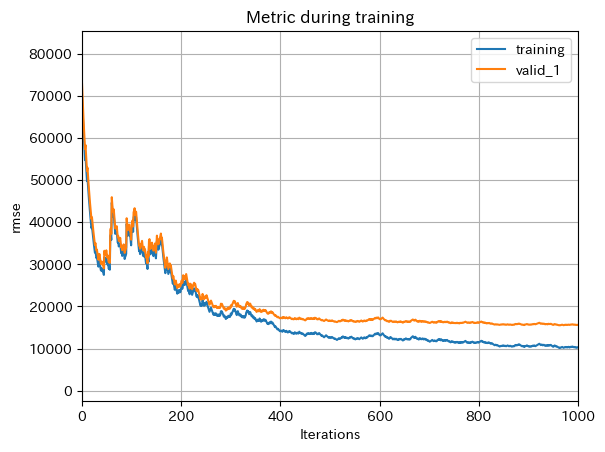

importance
面積               1.375082e+15
L                1.207376e+15
平均地価             7.131085e+14
築年数              2.206532e+14
最寄り駅             1.567856e+14
全体の階数            9.069068e+13
所在地              8.546429e+13
一部屋あたりの面積        8.280665e+13
契約期間             6.513525e+13
所在階              2.690642e+13
所要時間             2.299839e+13
システムキッチン         1.801009e+13
定期借家             7.096050e+12
バス・トイレ別          6.281937e+12
コンロ3口            4.249978e+12
建物構造             3.449632e+12
部屋数              1.978448e+12
コンロ2口            1.915867e+12
IHコンロ            1.885448e+12
D                1.688511e+12
100m^2以上         1.511708e+12
75m^2以上100m^2未満  1.264874e+12
独立キッチン           8.916770e+11
ガスコンロ            5.883543e+11
S                3.539269e+11
給湯               3.368013e+11
50m^2以上75m^2未満   1.121695e+11
電気コンロ            1.131970e+10

In [15]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)
valid_rmses_list = []
valid_GOSS = np.zeros(X_train.shape[0])
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]

    evals_result = {} 
    lgb_train = lgb.Dataset(X_tr, y_tr)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

    params = {
        'objective':'regression',
        'boosting_type':'dart',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 7.68792496009309e-05,
        'max_bin': 356,
        'num_leaves':69
    }

    model = lgb.train(
                        params,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=1000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists,
                        evals_result=evals_result,
                        )

    pred_y_val = model.predict(X_val)
    rmse = mean_squared_error(y_val, pred_y_val, squared=False)
    valid_rmses_list.append(rmse)

valid_rmse = np.mean(valid_rmses_list)
print("whole valid rmse:", valid_rmse)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

print('Start predicting...')
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
print('Plot metrics during training...')
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()
# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(importance_type = "gain"), index=X_train.columns, columns=['importance'])
df_importance = pd.DataFrame(importance)
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)


In [13]:
df = pd.read_csv('../data/outer_data/test.csv')
id = df['id']
y_pred = pd.DataFrame(y_pred)
result = pd.concat([id, y_pred],axis=1)
result.to_csv('../data/result_data/DART_cv_result.csv',index=False)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import lightgbm as lgb
import category_encoders as ce
# import mojimoji
import re
from cmath import nan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import optuna
from sklearn.metrics import mean_squared_error
import japanize_matplotlib
from sklearn.model_selection import KFold
import xgboost
from catboost import CatBoostRegressor
from catboost import Pool

###訓練データの読み込み
house_age = pd.read_csv('../data/handmade_data/house_age.csv')
area_size = pd.read_csv('../data/handmade_data/area_size.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
contract_span = pd.read_csv('../data/handmade_data/contract_span.csv')#欠損値をゼロ埋めした契約期間
contract_span2 = pd.read_csv('../data/handmade_data/contract_span2.csv')#欠損値を欠損値のままにした契約期間
reg_rent = pd.read_csv('../data/handmade_data/reg_rent.csv')
floor_scores = pd.read_csv('../data/handmade_data/floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「所在階」
floor_scores2 = pd.read_csv('../data/handmade_data/floor_scores2.csv')#「所在階」と「全体の階数」が独立している「所在階」
Floor_scores = pd.read_csv('../data/handmade_data/capital_floor_scores.csv')#「所在階」と「全体の階数」が連動して欠損値になる場合のある「全体の階数」
Floor_scores2 = pd.read_csv('../data/handmade_data/capital_floor_scores2.csv')#「所在階」と「全体の階数」が独立している「全体の階数」
stations = pd.read_csv('../data/handmade_data/stations.csv')
minits = pd.read_csv('../data/handmade_data/minits.csv')
addresses = pd.read_csv('../data/handmade_data/addresses.csv')
room_arrange = pd.read_csv('../data/handmade_data/room_arrange.csv')
building = pd.read_csv('../data/handmade_data/building.csv')
buildings = pd.read_csv('../data/handmade_data/buildings.csv')
land_aveprice = pd.read_csv('../data/handmade_data/land_aveprice.csv')
land_aveprice.columns = ['平均地価']
over110m2 = pd.read_csv('../data/handmade_data/over110m2.csv')
over100m2 = pd.read_csv('../data/handmade_data/over100m2.csv')
over90m2 = pd.read_csv('../data/handmade_data/over90m2.csv')
bt75and100m2 = pd.read_csv('../data/handmade_data/bt75and100m2.csv')
bt50and75m2 = pd.read_csv('../data/handmade_data/bt50and75m2.csv')
sepa_bath_toilets = pd.read_csv('../data/handmade_data/sepa_bath_toilets.csv')
sepa_bath_toilets.columns = ['バス・トイレ別']
washlets = pd.read_csv('../data/handmade_data/washlets.csv')
area_per_rooms = pd.read_csv('../data/handmade_data/area_per_rooms.csv')
kitchen_points = pd.read_csv('../data/handmade_data/kitchen_points.csv')
equipments = pd.read_csv('../data/handmade_data/equipments.csv')
latitude_longitude = pd.read_csv('../data/handmade_data/latitude_longitude.csv')
broadcasts = pd.read_csv('../data/handmade_data/broadcasts.csv')
stations_te = pd.read_csv('../data/handmade_data/stations_te.csv')
age_x_minits = pd.read_csv('../data/handmade_data/age_x_minits.csv')
area_x_landprice = pd.read_csv('../data/handmade_data/area_x_landprice.csv')

rent = pd.read_csv('../data/handmade_data/rent.csv')


##テストデータの読み込み
test_house_age = pd.read_csv('../data/test_data/test_house_age.csv')
test_area_size = pd.read_csv('../data/test_data/test_area_size.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_contract_span = pd.read_csv('../data/test_data/test_contract_span.csv')
test_contract_span2 = pd.read_csv('../data/test_data/test_contract_span2.csv')
test_contract_span2.columns = ['契約期間']
test_reg_rent = pd.read_csv('../data/test_data/test_reg_rent.csv')
test_floor_scores = pd.read_csv('../data/test_data/test_floor_scores.csv')
test_floor_scores2 = pd.read_csv('../data/test_data/test_floor_scores2.csv')
test_Floor_scores = pd.read_csv('../data/test_data/test_capital_floor_scores.csv')
test_Floor_scores2 = pd.read_csv('../data/test_data/test_capital_floor_scores2.csv')
test_stations = pd.read_csv('../data/test_data/test_stations.csv')
test_minits = pd.read_csv('../data/test_data/test_minits.csv')
test_addresses = pd.read_csv('../data/test_data/test_addresses.csv')
test_room_arrange = pd.read_csv('../data/test_data/test_room_arrange.csv')
test_building = pd.read_csv('../data/test_data/test_building.csv')
test_buildings = pd.read_csv('../data/test_data/test_buildings.csv')
test_land_aveprice = pd.read_csv('../data/test_data/test_land_aveprice.csv')
test_land_aveprice.columns = ['平均地価']
test_over110m2 = pd.read_csv('../data/test_data/test_over110m2.csv')
test_over100m2 = pd.read_csv('../data/test_data/test_over100m2.csv')
test_over90m2 = pd.read_csv('../data/test_data/test_over90m2.csv')
test_bt75and100m2 = pd.read_csv('../data/test_data/test_bt75and100m2.csv')
test_bt50and75m2 = pd.read_csv('../data/test_data/test_bt50and75m2.csv')
test_sepa_bath_toilets = pd.read_csv('../data/test_data/test_sepa_bath_toilets.csv')
test_sepa_bath_toilets.columns = ['バス・トイレ別']
test_washlets = pd.read_csv('../data/test_data/test_washlets.csv')
test_area_per_rooms = pd.read_csv('../data/test_data/test_area_per_rooms.csv')
test_kitchen_points = pd.read_csv('../data/test_data/test_kitchen_points.csv')
test_equipments = pd.read_csv('../data/test_data/test_equipments.csv')
test_latitude_longitude = pd.read_csv('../data/test_data/test_latitude_longitude.csv')
test_broadcasts = pd.read_csv('../data/test_data/test_broadcasts.csv')
test_stations_te = pd.read_csv('../data/test_data/test_stations_te.csv')
test_age_x_minits = pd.read_csv('../data/test_data/test_age_x_minits.csv')
test_area_x_landprice = pd.read_csv('../data/test_data/test_area_x_landprice.csv')


X_train = pd.concat([house_age, area_size, contract_span2, reg_rent, floor_scores2, Floor_scores2, stations_te, age_x_minits,minits, land_aveprice, room_arrange[["部屋数","L","D","S"]], sepa_bath_toilets, buildings, over100m2, bt75and100m2, area_per_rooms, 
kitchen_points[['コンロ2口']], latitude_longitude[['平均緯度', '平均経度']]], axis=1)
y_train = pd.read_csv('../data/handmade_data/rent.csv')
y_train.loc[[5775], '賃料'] = y_train.loc[[5775], '賃料']/10
X_test = pd.concat([test_house_age, test_area_size,test_contract_span2, test_reg_rent, test_floor_scores2, test_Floor_scores2, test_stations_te, test_age_x_minits, test_minits, test_land_aveprice, test_room_arrange[["部屋数","L","D",'S']],test_sepa_bath_toilets,test_buildings, test_over100m2, test_bt75and100m2, test_area_per_rooms, 
test_kitchen_points[['コンロ2口']], test_latitude_longitude[['平均緯度','平均経度']]], axis=1)
category_lists = ['定期借家', 'L', 'D','S', 'バス・トイレ別','建物構造','100m^2以上', '75m^2以上100m^2未満', 'コンロ2口']

Duplicate key in file PosixPath('/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : IPAexGothic')


/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument ins

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3873
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 23
[LightGBM] [Info] Start training from score 118516.069987
[10]	training's rmse: 51326.2	valid_1's rmse: 52542.2
[20]	training's rmse: 37340.8	valid_1's rmse: 40597.2
[30]	training's rmse: 29592.2	valid_1's rmse: 34115.6
[40]	training's rmse: 26449.3	valid_1's rmse: 31539.4
[50]	training's rmse: 30082.9	valid_1's rmse: 34557.2
[60]	training's rmse: 34437.7	valid_1's rmse: 38422.4
[70]	training's rmse: 36306.3	valid_1's rmse: 40177.9
[80]	training's rmse: 31175.8	valid_1's rmse: 35687.7
[90]	training's rmse: 31056.7	valid_1's rmse: 35532.4
[100]	training's rmse: 33116.6	valid_1's rmse: 37407.4
[110]	training's rmse: 40094.9	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument ins

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3876
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 23
[LightGBM] [Info] Start training from score 118435.786702
[10]	training's rmse: 51373.3	valid_1's rmse: 52131.6
[20]	training's rmse: 37639.8	valid_1's rmse: 39055.9
[30]	training's rmse: 30087.2	valid_1's rmse: 32166.5
[40]	training's rmse: 27055.7	valid_1's rmse: 29513.7
[50]	training's rmse: 30603.8	valid_1's rmse: 32758.4
[60]	training's rmse: 34907.4	valid_1's rmse: 36888.4
[70]	training's rmse: 36744	valid_1's rmse: 38672.1
[80]	training's rmse: 31678.3	valid_1's rmse: 34024.9
[90]	training's rmse: 31559.8	valid_1's rmse: 33980.6
[100]	training's rmse: 33571.5	valid_1's rmse: 35900.1
[110]	training's rmse: 40427.2	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument ins

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3875
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 23
[LightGBM] [Info] Start training from score 117892.049333
[10]	training's rmse: 51210.5	valid_1's rmse: 51345.1
[20]	training's rmse: 37459.4	valid_1's rmse: 37205.8
[30]	training's rmse: 30136.7	valid_1's rmse: 29940.8
[40]	training's rmse: 27214.4	valid_1's rmse: 27244.3
[50]	training's rmse: 30743.7	valid_1's rmse: 30948.1
[60]	training's rmse: 34994.5	valid_1's rmse: 35279.7
[70]	training's rmse: 36771.4	valid_1's rmse: 37091.8
[80]	training's rmse: 31748.5	valid_1's rmse: 32112.5
[90]	training's rmse: 31603.8	valid_1's rmse: 31945.3
[100]	training's rmse: 33564.6	valid_1's rmse: 33967.4
[110]	training's rmse: 40370.1	valid_1's rmse

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument ins

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3873
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 23
[LightGBM] [Info] Start training from score 118280.850532
[10]	training's rmse: 51808.5	valid_1's rmse: 50146.2
[20]	training's rmse: 37768.6	valid_1's rmse: 37829.1
[30]	training's rmse: 30206.9	valid_1's rmse: 31465.9
[40]	training's rmse: 27160.6	valid_1's rmse: 28896.6
[50]	training's rmse: 30662.3	valid_1's rmse: 32064.4
[60]	training's rmse: 34919.8	valid_1's rmse: 36391.4
[70]	training's rmse: 36715.2	valid_1's rmse: 38216
[80]	training's rmse: 31653.4	valid_1's rmse: 33606.3
[90]	training's rmse: 31576.6	valid_1's rmse: 33307.3
[100]	training's rmse: 33555.1	valid_1's rmse: 35314.5
[110]	training's rmse: 40411.5	valid_1's rmse: 

/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['100m^2以上', '75m^2以上100m^2未満', 'D', 'L', 'S', 'コンロ2口', 'バス・トイレ別', '定期借家', '建物構造']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/Users/koshidatatsuo/python/signate/mynabi/venv/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument ins

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3871
[LightGBM] [Info] Number of data points in the train set: 25176, number of used features: 23
[LightGBM] [Info] Start training from score 118154.683071
[10]	training's rmse: 51073.6	valid_1's rmse: 53388.6
[20]	training's rmse: 37408.9	valid_1's rmse: 39368.3
[30]	training's rmse: 30210	valid_1's rmse: 32132.2
[40]	training's rmse: 27321.5	valid_1's rmse: 29256.8
[50]	training's rmse: 30846.3	valid_1's rmse: 32608
[60]	training's rmse: 35119	valid_1's rmse: 36642.9
[70]	training's rmse: 36905.8	valid_1's rmse: 38357
[80]	training's rmse: 31895.5	valid_1's rmse: 33522.2
[90]	training's rmse: 31771.3	valid_1's rmse: 33508.9
[100]	training's rmse: 33762.1	valid_1's rmse: 35333.2
[110]	training's rmse: 40545.3	valid_1's rmse: 41948.

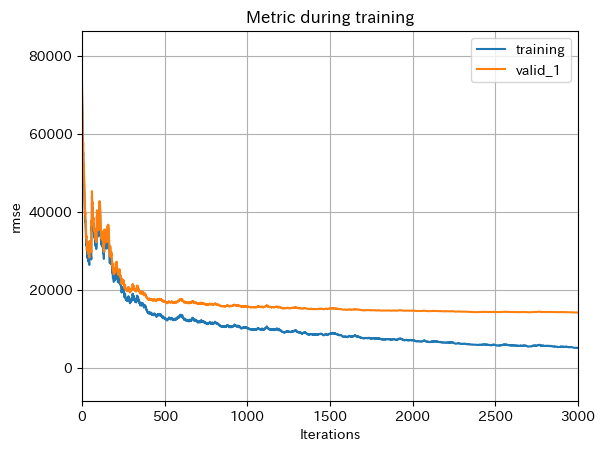

importance
面積               1.473353e+15
L                1.410951e+15
holdout_ts       7.528476e+14
平均地価             3.717903e+14
築年数              2.164601e+14
全体の階数            7.917539e+13
築年数＊所要時間         6.976035e+13
平均緯度             6.726575e+13
平均経度             6.107810e+13
一部屋あたりの面積        5.594490e+13
契約期間             4.643660e+13
所在階              2.585654e+13
最寄り駅             1.709902e+13
所要時間             9.172695e+12
バス・トイレ別          6.863611e+12
建物構造             4.819481e+12
コンロ2口            3.390393e+12
定期借家             3.381047e+12
部屋数              3.076307e+12
D                2.405685e+12
75m^2以上100m^2未満  1.328597e+12
100m^2以上         1.050354e+12
S                1.354884e+11

In [2]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)
valid_rmses_list = []
valid_GOSS = np.zeros(X_train.shape[0])
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index,:]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train.loc[train_index]
    y_val = y_train.loc[valid_index]

    evals_result = {} 
    lgb_train = lgb.Dataset(X_tr, y_tr)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

    params = {
        'objective':'regression',
        'boosting_type':'dart',
        'metrics':'rmse',
        'learning_rate':0.05,
        'reg_lambda': 2.4973286104060585e-05,
        'max_bin': 414,
        'num_leaves':111
    }

    model = lgb.train(
                        params,
                        lgb_train, 
                        valid_sets=[lgb_train, lgb_eval], 
                        verbose_eval=10, 
                        num_boost_round=3000, 
                        early_stopping_rounds=10,
                        categorical_feature = category_lists,
                        evals_result=evals_result,
                        )

    pred_y_val = model.predict(X_val)
    rmse = mean_squared_error(y_val, pred_y_val, squared=False)
    valid_rmses_list.append(rmse)

valid_rmse = np.mean(valid_rmses_list)
print("whole valid rmse:", valid_rmse)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

print('Start predicting...')
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
print('Plot metrics during training...')
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()
# feature importanceを表示
importance = pd.DataFrame(model.feature_importance(importance_type = "gain"), index=X_train.columns, columns=['importance'])
df_importance = pd.DataFrame(importance)
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)


In [42]:
df = pd.read_csv('../data/outer_data/test.csv')
id = df['id']
y_pred = pd.DataFrame(y_pred)
result = pd.concat([id, y_pred],axis=1)
result.to_csv('../data/result_data/DART_cv_result.csv',index=False)